In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 674.69it/s]
100%|██████████| 700/700 [00:07<00:00, 94.57it/s] 
8280it [00:00, 243834.34it/s]
7920it [00:00, 229872.59it/s]
720it [00:01, 694.86it/s]
100%|██████████| 720/720 [00:08<00:00, 89.76it/s] 
8280it [00:00, 249599.94it/s]
720it [00:00, 778.27it/s]
100%|██████████| 720/720 [00:07<00:00, 92.22it/s] 
8280it [00:00, 81118.83it/s]
700it [00:00, 815.53it/s]
100%|██████████| 700/700 [00:07<00:00, 97.64it/s] 
8280it [00:00, 239555.48it/s]
509it [00:00, 1132.72it/s]
100%|██████████| 509/509 [00:02<00:00, 191.49it/s]
3664it [00:00, 230493.59it/s]
700it [00:00, 835.74it/s]
100%|██████████| 700/700 [00:07<00:00, 97.65it/s] 
8280it [00:00, 237494.61it/s]
700it [00:00, 746.19it/s]
100%|██████████| 700/700 [00:07<00:00, 97.91it/s] 
8280it [00:00, 232593.96it/s]
710it [00:01, 390.48it/s]
100%|██████████| 710/710 [00:07<00:00, 93.82it/s] 
8280it [00:00, 240316.35it/s]
710it [00:01, 394.75it/s]
100%|██████████| 710/710 [00:07<00:00, 92.93it/s] 
8280it [00:00, 240499.42it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.24675


100%|██████████| 248/248 [00:19<00:00, 12.51it/s]


Mean val loss: 0.083527


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082193


100%|██████████| 248/248 [00:19<00:00, 12.44it/s]


Mean val loss: 0.074614


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076892


100%|██████████| 248/248 [00:19<00:00, 12.46it/s]


Mean val loss: 0.056014


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074938


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.055532


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074376


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.076633
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073338


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.063065
EarlyStopping counter: 2 out of 10
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0722


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.053574


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07171


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.056338
EarlyStopping counter: 1 out of 10
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071368


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.056234
EarlyStopping counter: 2 out of 10
Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070481


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.053054


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070951


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.054479
EarlyStopping counter: 1 out of 10
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069967


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.057848
EarlyStopping counter: 2 out of 10
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069381


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.069655
EarlyStopping counter: 3 out of 10
Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068396


100%|██████████| 248/248 [00:19<00:00, 12.41it/s]


Mean val loss: 0.052784


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069279


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.044493


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068216


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.055056
EarlyStopping counter: 1 out of 10
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.061889
EarlyStopping counter: 2 out of 10
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068507


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.044608
EarlyStopping counter: 3 out of 10
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067296


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.045756
EarlyStopping counter: 4 out of 10
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066673


100%|██████████| 248/248 [00:19<00:00, 12.40it/s]


Mean val loss: 0.041256


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066822


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.046494
EarlyStopping counter: 1 out of 10
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066182


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.043815
EarlyStopping counter: 2 out of 10
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066252


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.045656
EarlyStopping counter: 3 out of 10
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066986


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.043058
EarlyStopping counter: 4 out of 10
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.046068
EarlyStopping counter: 5 out of 10
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065151


100%|██████████| 248/248 [00:19<00:00, 12.42it/s]


Mean val loss: 0.039942


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066439


100%|██████████| 248/248 [00:20<00:00, 12.40it/s]


Mean val loss: 0.039815


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065854


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.048596
EarlyStopping counter: 1 out of 10
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065346


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.038541


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065158


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041399
EarlyStopping counter: 1 out of 10
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065171


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.042598
EarlyStopping counter: 2 out of 10
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065282
Epoch    31: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040841
EarlyStopping counter: 3 out of 10
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064638


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.042603
EarlyStopping counter: 4 out of 10
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06421


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.04422
EarlyStopping counter: 5 out of 10
Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064668


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.038589
EarlyStopping counter: 6 out of 10
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063987


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040186
EarlyStopping counter: 7 out of 10
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064019


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041748
EarlyStopping counter: 8 out of 10
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063532


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040479
EarlyStopping counter: 9 out of 10
Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063


100%|██████████| 248/248 [00:20<00:00, 12.37it/s]


Mean val loss: 0.037499


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063797


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039144
EarlyStopping counter: 1 out of 10
Epoch 40...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063959


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037809
EarlyStopping counter: 2 out of 10
Epoch 41...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063521


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039015
EarlyStopping counter: 3 out of 10
Epoch 42...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063479


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.037503


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 43...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06444


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041406
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063885
Epoch    44: reducing learning rate of group 0 to 2.5000e-05.


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.036895


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 45...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0636


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03771
EarlyStopping counter: 1 out of 10
Epoch 46...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063232


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039443
EarlyStopping counter: 2 out of 10
Epoch 47...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063523


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039251
EarlyStopping counter: 3 out of 10
Epoch 48...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062661


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0391
EarlyStopping counter: 4 out of 10
Epoch 49...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063441


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036685


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 50...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063378


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037131
EarlyStopping counter: 1 out of 10
Epoch 51...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063774


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.040201
EarlyStopping counter: 2 out of 10
Epoch 52...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063333


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037192
EarlyStopping counter: 3 out of 10
Epoch 53...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062821


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037089
EarlyStopping counter: 4 out of 10
Epoch 54...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063702
Epoch    54: reducing learning rate of group 0 to 1.2500e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037011
EarlyStopping counter: 5 out of 10
Epoch 55...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063004


100%|██████████| 248/248 [00:20<00:00, 12.40it/s]


Mean val loss: 0.036577


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 56...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062769


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03716
EarlyStopping counter: 1 out of 10
Epoch 57...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062588


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036784
EarlyStopping counter: 2 out of 10
Epoch 58...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062465


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037466
EarlyStopping counter: 3 out of 10
Epoch 59...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062453


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037621
EarlyStopping counter: 4 out of 10
Epoch 60...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062093


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039036
EarlyStopping counter: 5 out of 10
Epoch 61...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062593


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036473


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062865


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039108
EarlyStopping counter: 1 out of 10
Epoch 63...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062215


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037202
EarlyStopping counter: 2 out of 10
Epoch 64...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062964


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03653
EarlyStopping counter: 3 out of 10
Epoch 65...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06264


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036812
EarlyStopping counter: 4 out of 10
Epoch 66...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062172
Epoch    66: reducing learning rate of group 0 to 6.2500e-06.


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036342


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 67...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062392


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037429
EarlyStopping counter: 1 out of 10
Epoch 68...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063186


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036527
EarlyStopping counter: 2 out of 10
Epoch 69...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062222


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03645
EarlyStopping counter: 3 out of 10
Epoch 70...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063025


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037322
EarlyStopping counter: 4 out of 10
Epoch 71...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062755


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036748
EarlyStopping counter: 5 out of 10
Epoch 72...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063131
Epoch    72: reducing learning rate of group 0 to 3.1250e-06.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036356
EarlyStopping counter: 6 out of 10
Epoch 73...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062243


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036198


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 74...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062358


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036345
EarlyStopping counter: 1 out of 10
Epoch 75...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063011


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036467
EarlyStopping counter: 2 out of 10
Epoch 76...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06199


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036388
EarlyStopping counter: 3 out of 10
Epoch 77...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062432


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036239
EarlyStopping counter: 4 out of 10
Epoch 78...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062542


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036248
EarlyStopping counter: 5 out of 10
Epoch 79...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.061734


100%|██████████| 248/248 [00:19<00:00, 15.06it/s]


Mean val loss: 0.036193


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062829


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.037128
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062131


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036313
EarlyStopping counter: 2 out of 10
Epoch 82...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062943


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03645
EarlyStopping counter: 3 out of 10
Epoch 83...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062522


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036267
EarlyStopping counter: 4 out of 10
Epoch 84...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062318


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036681
EarlyStopping counter: 5 out of 10
Epoch 85...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062338
Epoch    85: reducing learning rate of group 0 to 1.5625e-06.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036248
EarlyStopping counter: 6 out of 10
Epoch 86...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062103


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03632
EarlyStopping counter: 7 out of 10
Epoch 87...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062404


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036429
EarlyStopping counter: 8 out of 10
Epoch 88...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062593


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036371
EarlyStopping counter: 9 out of 10
Epoch 89...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.061943


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.036678
EarlyStopping counter: 10 out of 10


100%|██████████| 259/259 [02:31<00:00,  1.89it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [17]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [14]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

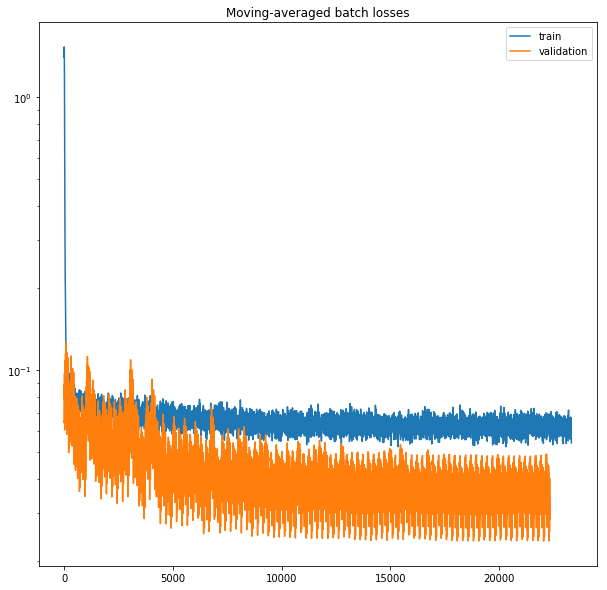

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

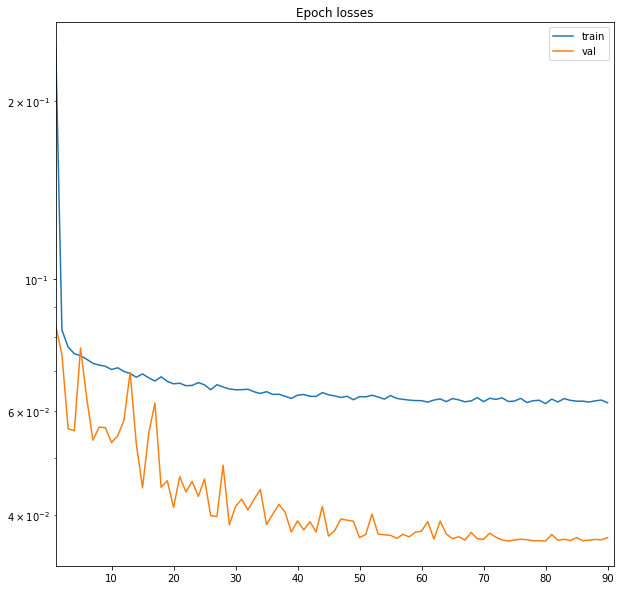

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [15]:
import os

In [16]:
import torch

In [78]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [18]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

Prediction fro carb96558:


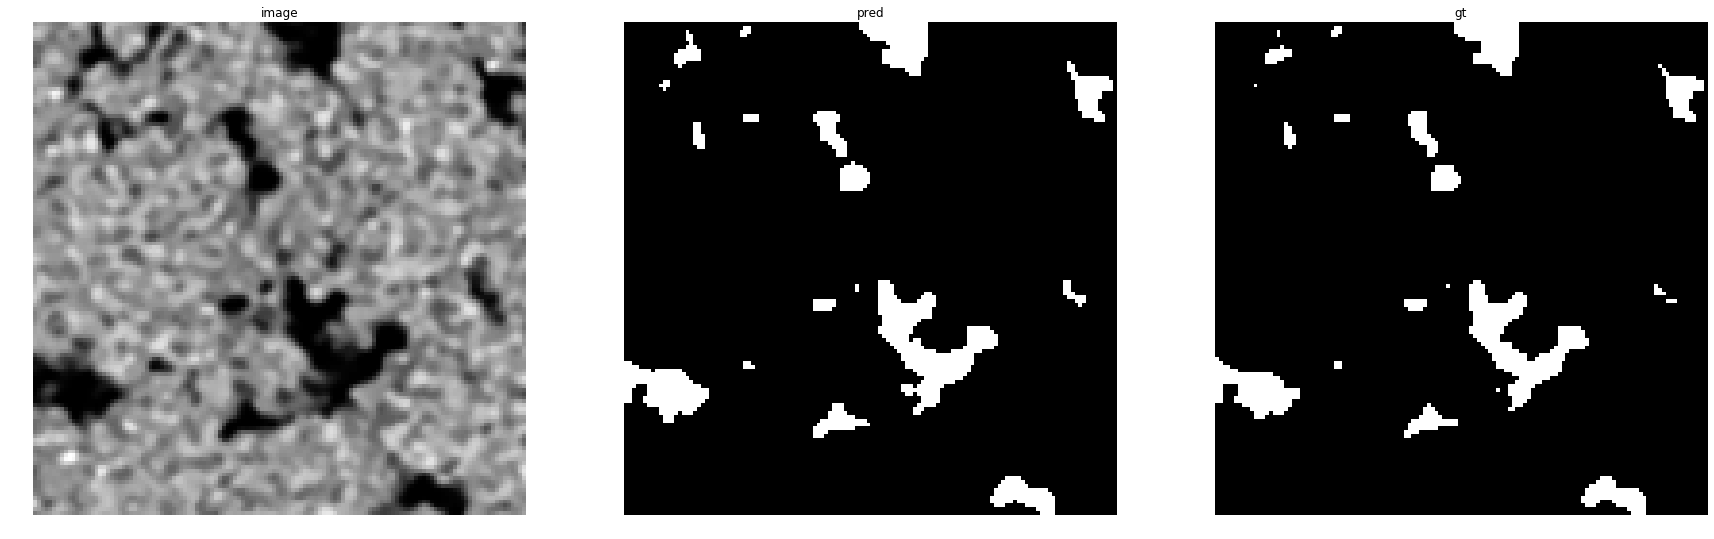

accuracy    : 0.9923095703125
precision   : 0.8982912937347437
recall      : 0.9990950226244344
f1          : 0.9460154241645244
pr_auc      : 0.9972345563088186
iou         : 0.8975609756097561


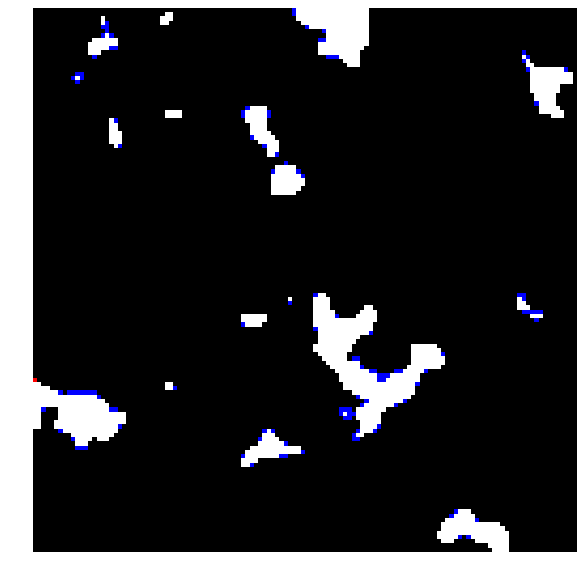

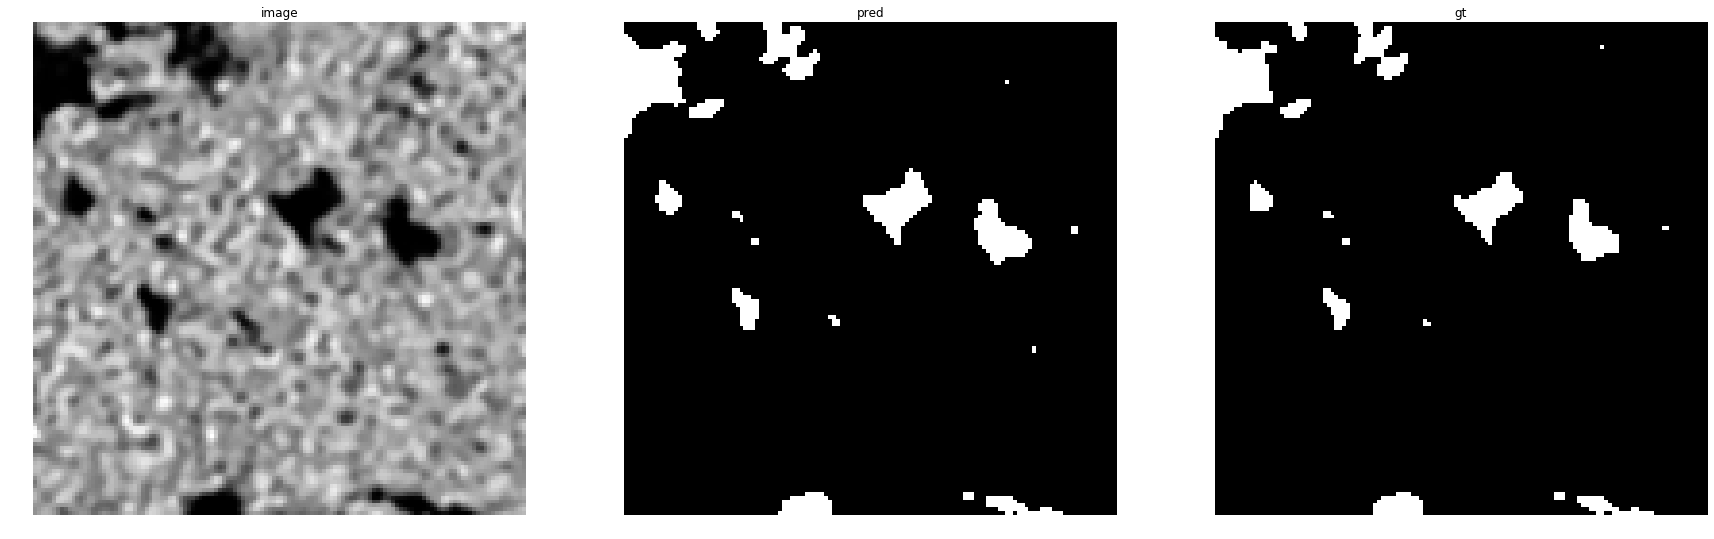

accuracy    : 0.99383544921875
precision   : 0.8981481481481481
recall      : 0.9977142857142857
f1          : 0.9453167298321603
pr_auc      : 0.9987821931298342
iou         : 0.8963039014373717


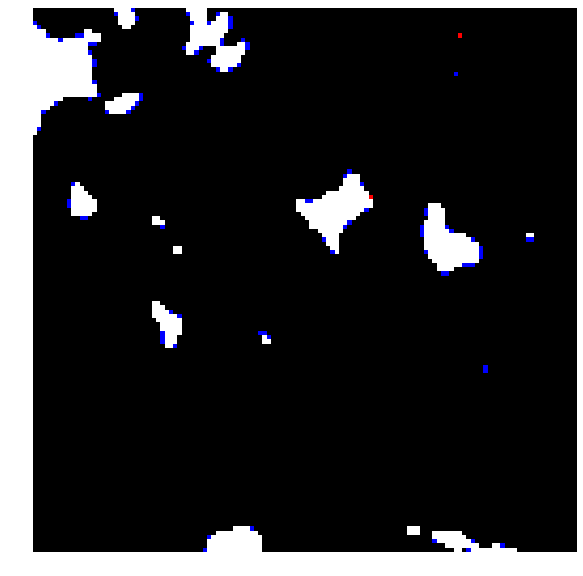

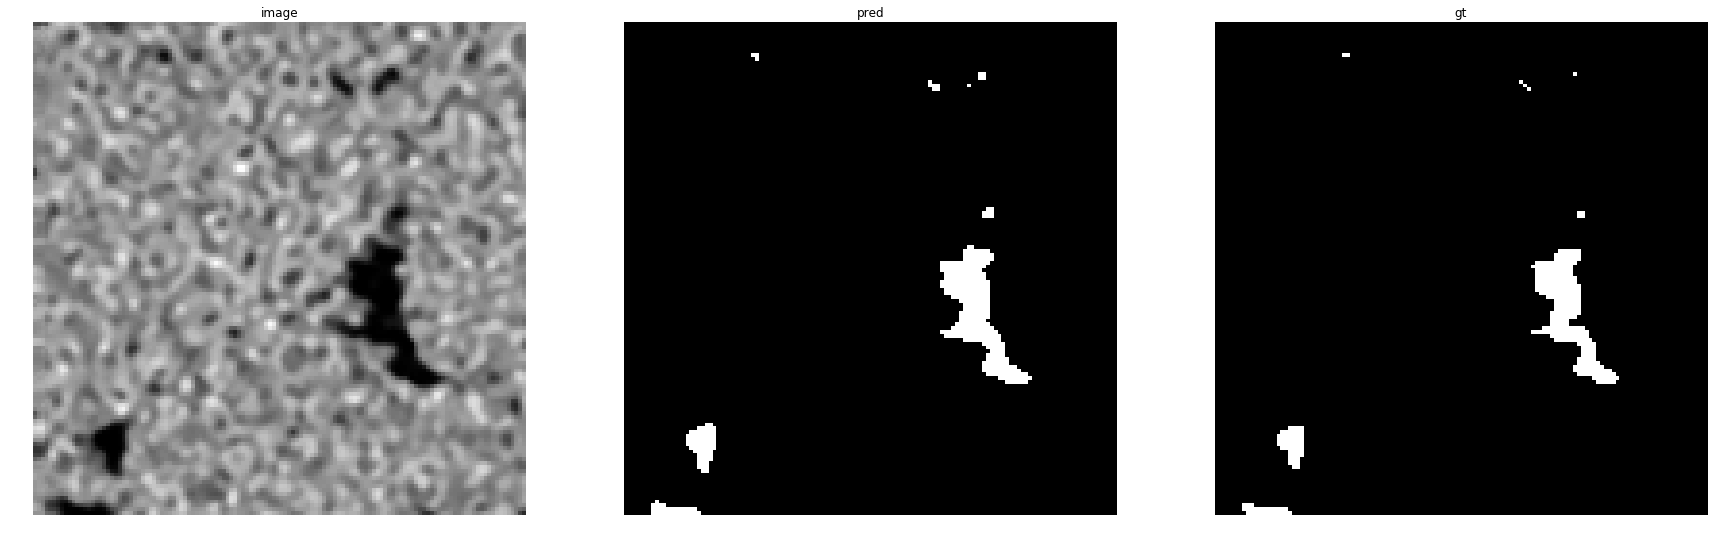

accuracy    : 0.9959716796875
precision   : 0.8513513513513513
recall      : 1.0
f1          : 0.9197080291970803
pr_auc      : 0.9988099814435696
iou         : 0.8513513513513513


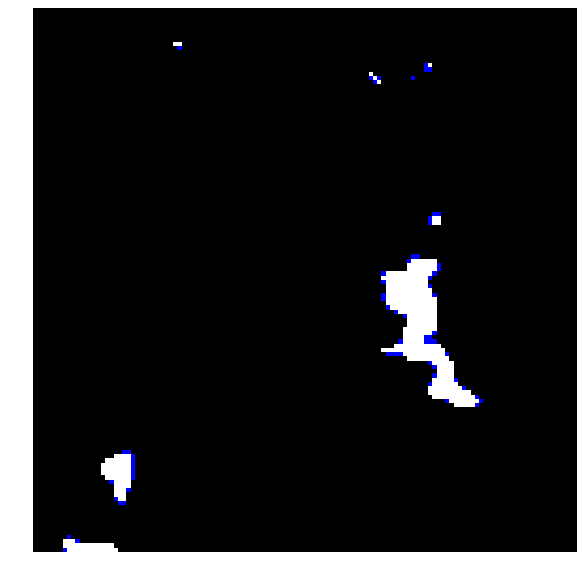

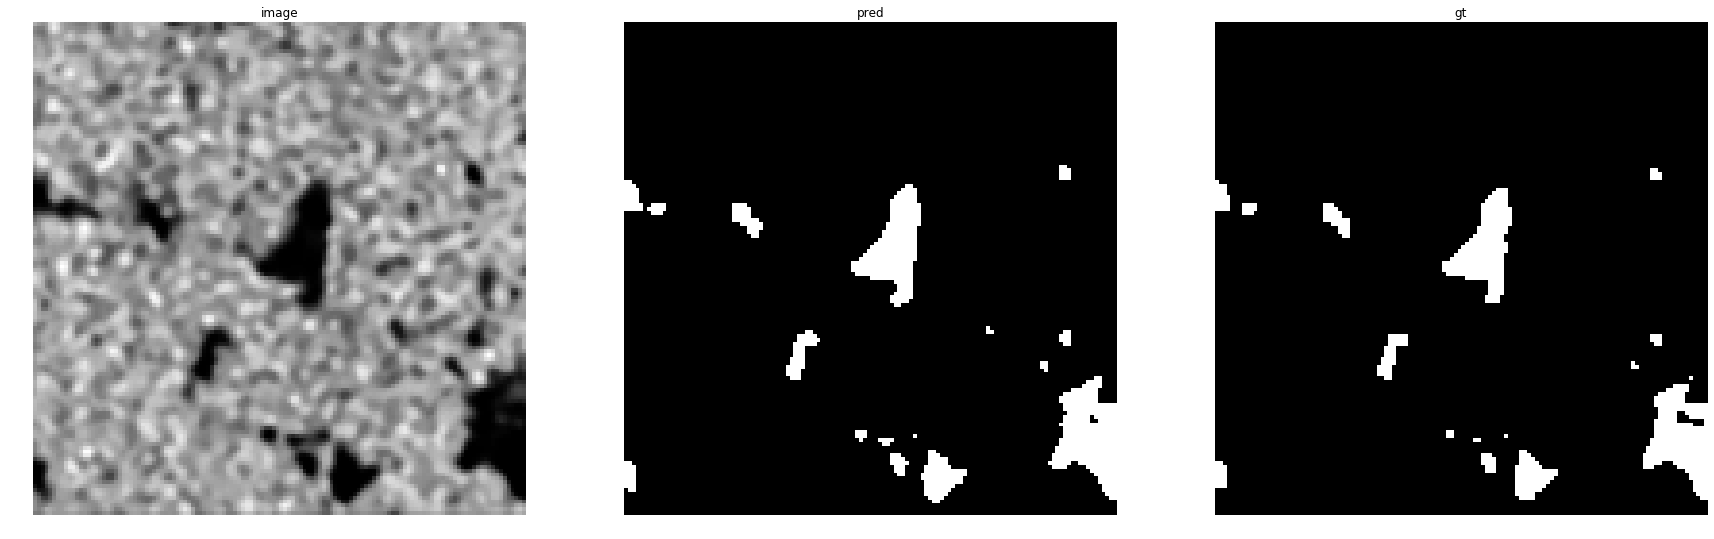

accuracy    : 0.993896484375
precision   : 0.8916576381365113
recall      : 1.0
f1          : 0.9427262313860252
pr_auc      : 0.9979171314495943
iou         : 0.8916576381365113


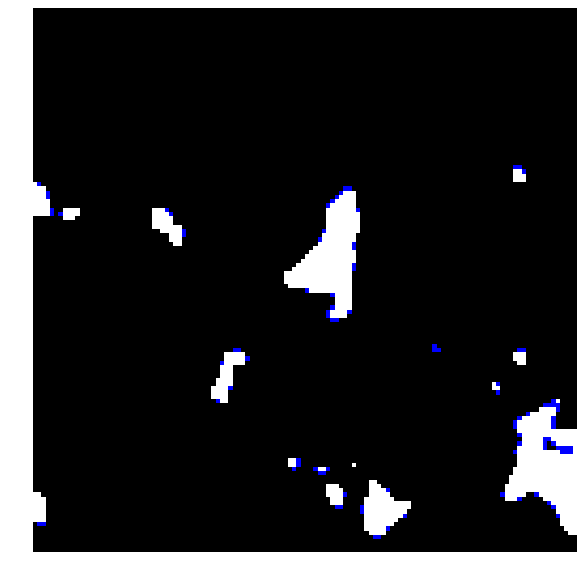

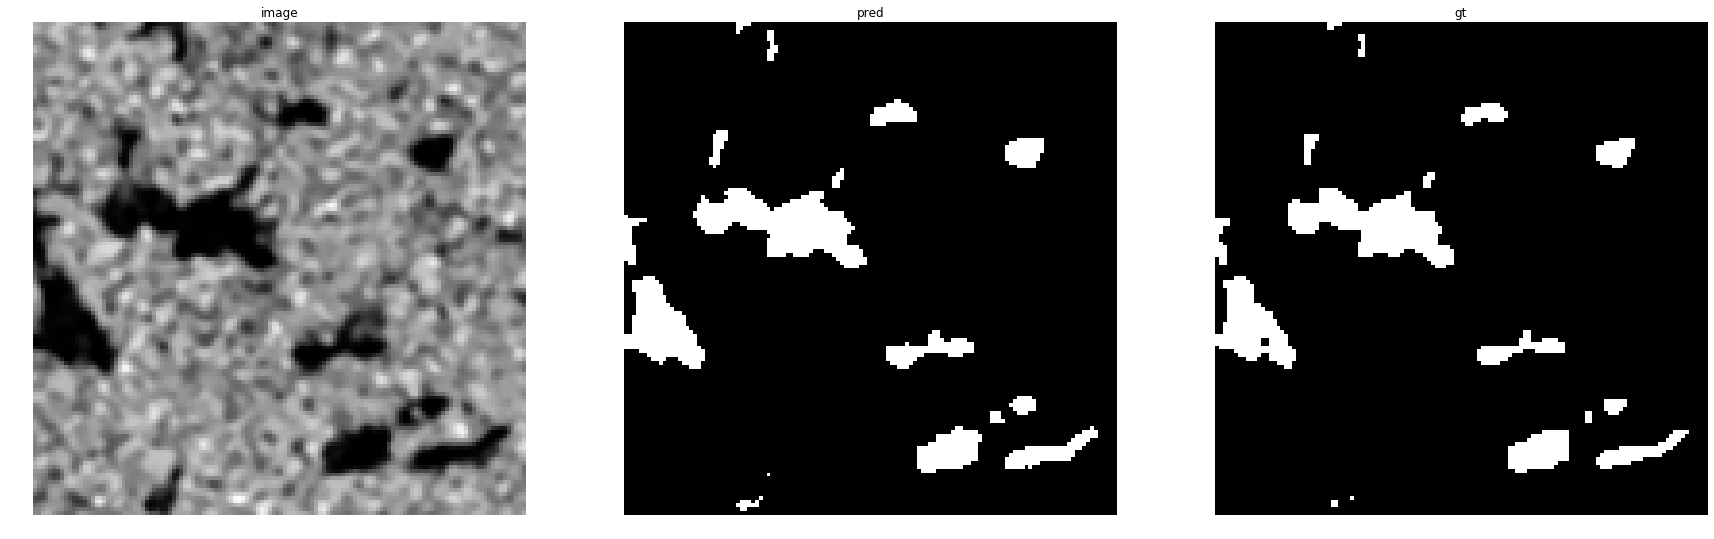

accuracy    : 0.99176025390625
precision   : 0.902046783625731
recall      : 0.9991902834008097
f1          : 0.9481367652708413
pr_auc      : 0.9982918293726042
iou         : 0.9013878743608473


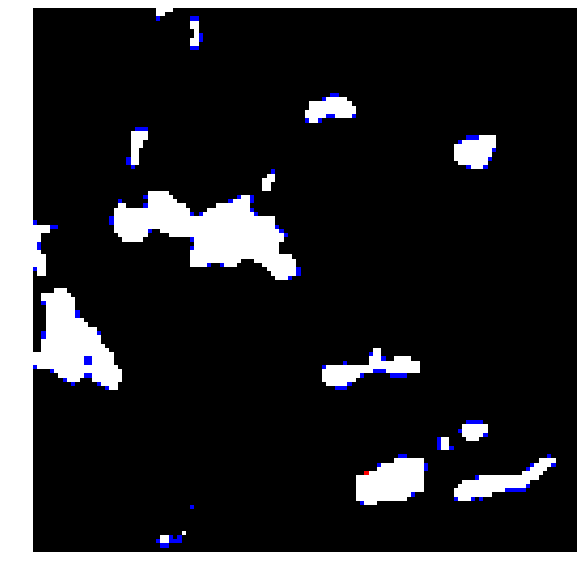

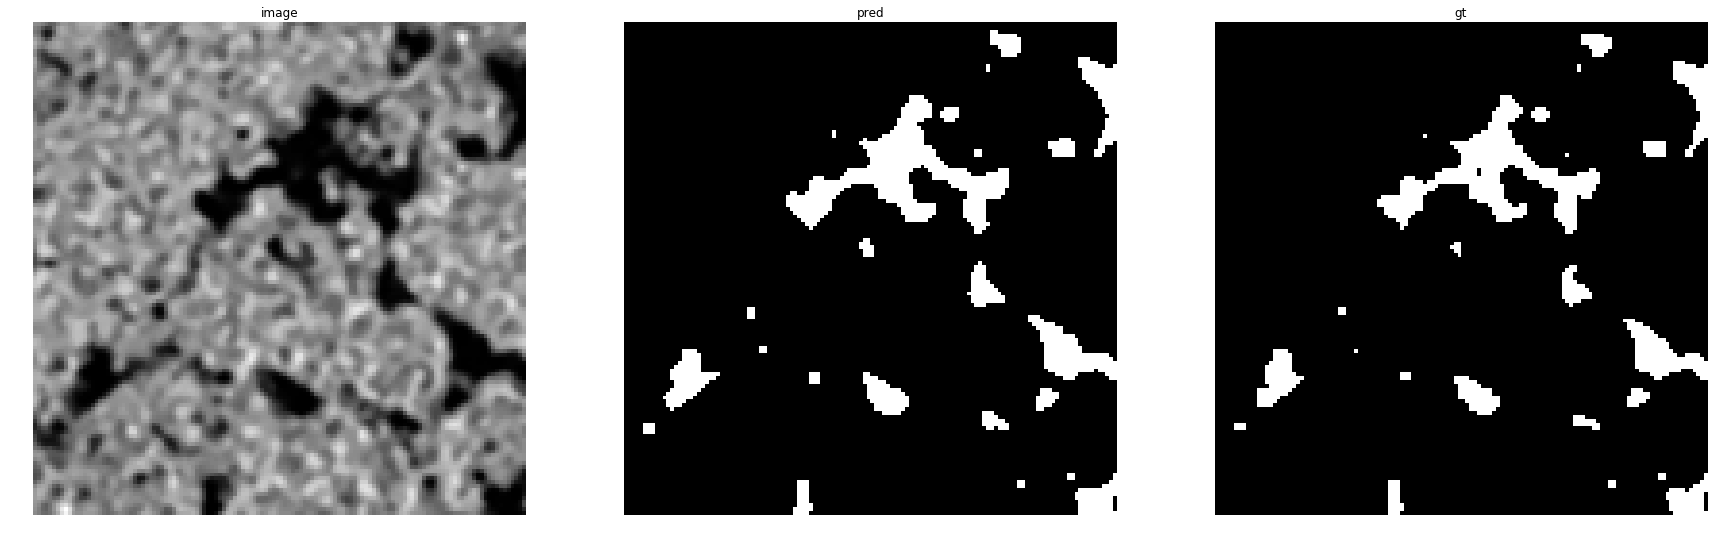

accuracy    : 0.98980712890625
precision   : 0.8896276595744681
recall      : 0.9992531740104555
f1          : 0.9412592332043617
pr_auc      : 0.9971192077001905
iou         : 0.8890365448504983


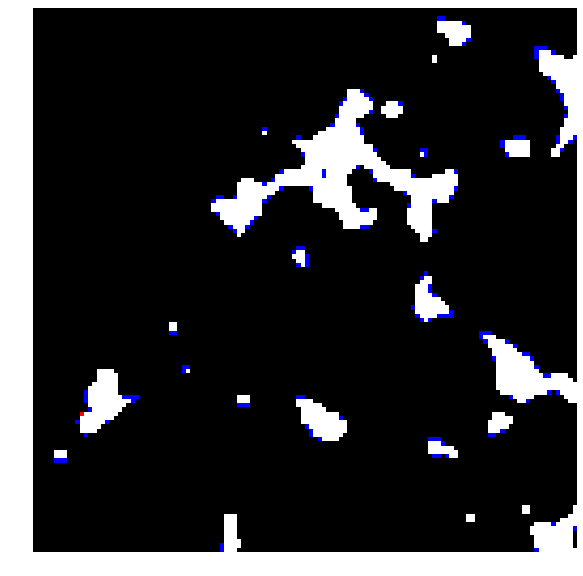

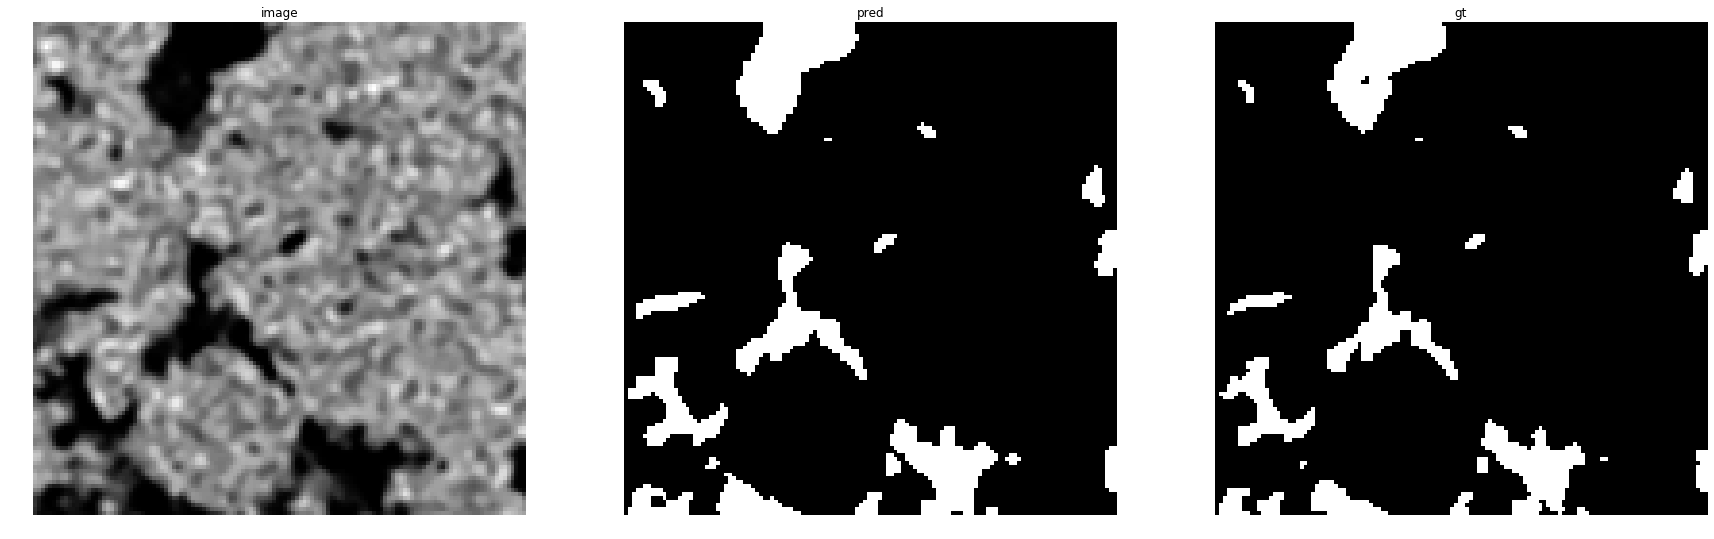

accuracy    : 0.98565673828125
precision   : 0.880306905370844
recall      : 0.9994192799070848
f1          : 0.9360892031547458
pr_auc      : 0.997379054634729
iou         : 0.8798568507157464


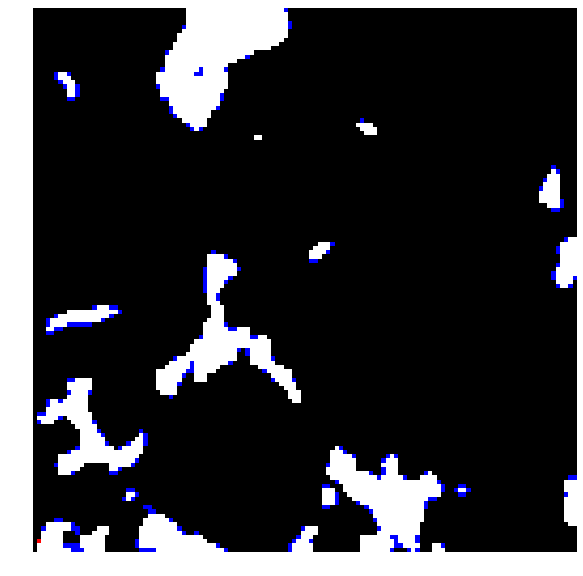

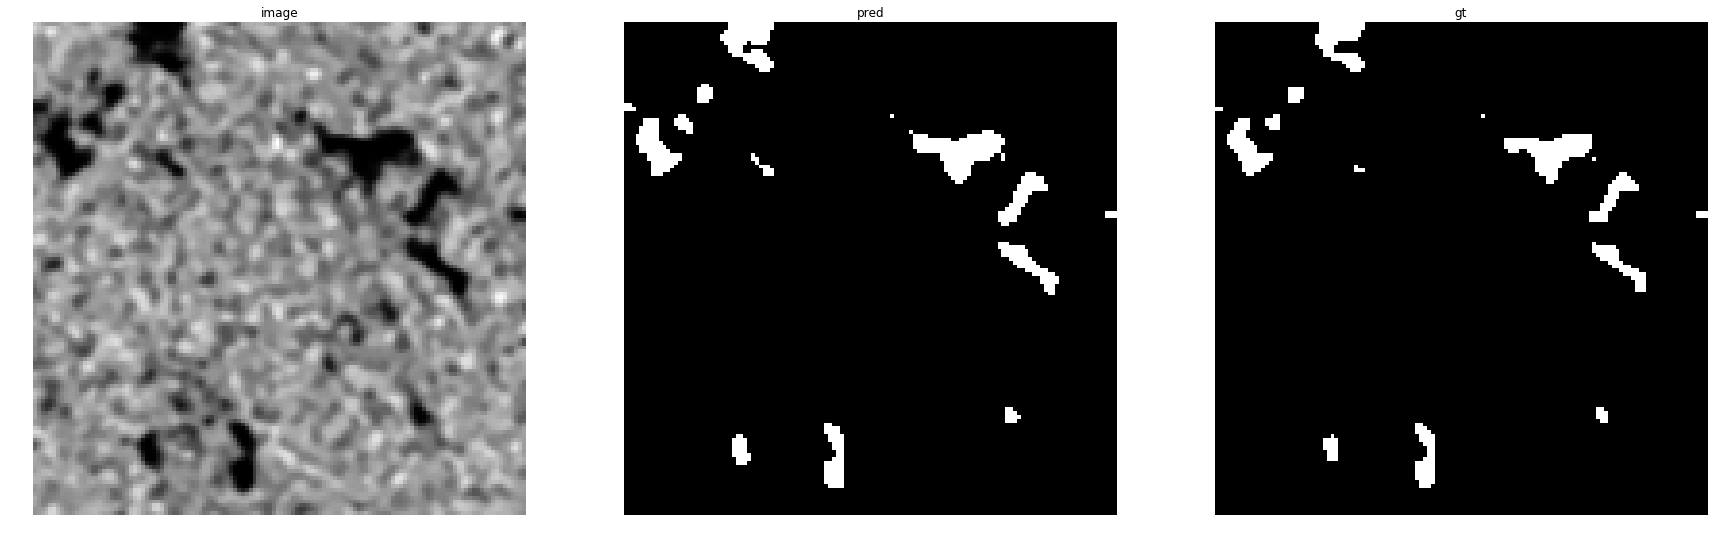

accuracy    : 0.99365234375
precision   : 0.8508771929824561
recall      : 0.9965753424657534
f1          : 0.9179810725552051
pr_auc      : 0.9953919710426002
iou         : 0.8483965014577259


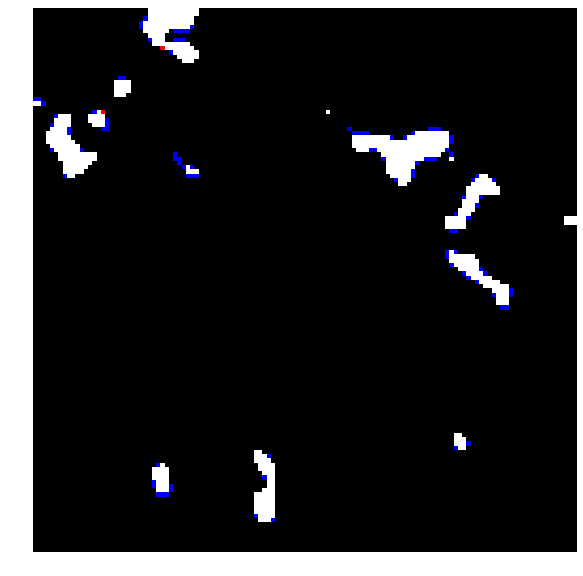

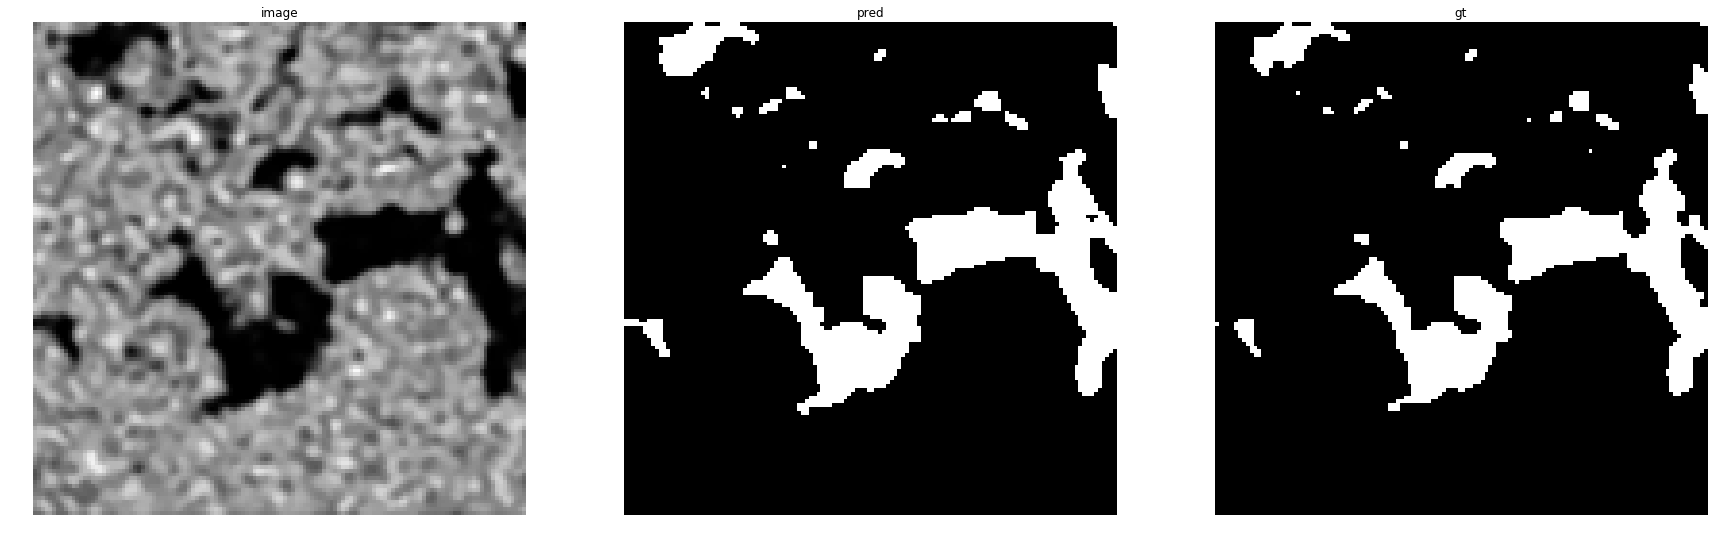

accuracy    : 0.98638916015625
precision   : 0.9072208228379512
recall      : 0.9990753582986592
f1          : 0.9509350935093509
pr_auc      : 0.9986765851137182
iou         : 0.9064597315436241


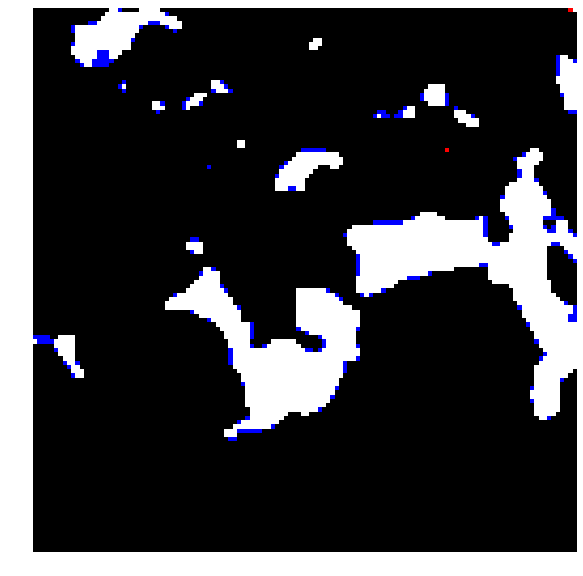

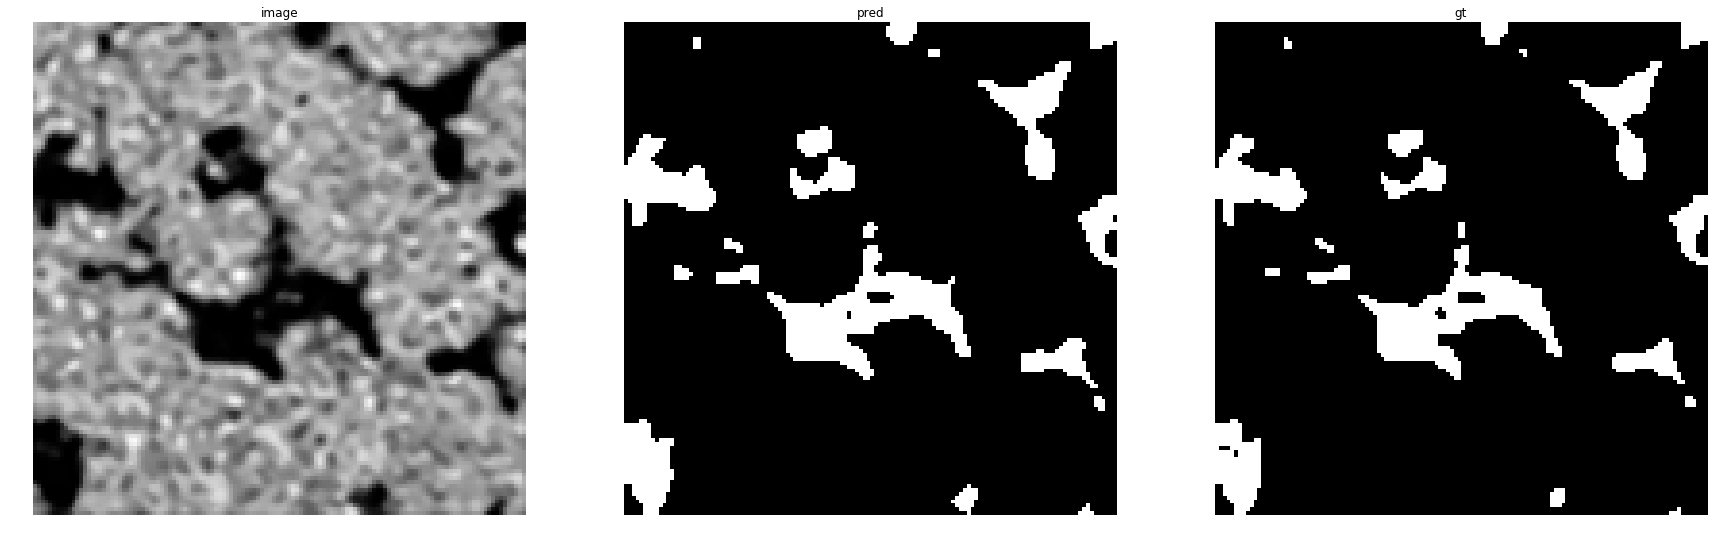

accuracy    : 0.98834228515625
precision   : 0.9081289081289081
recall      : 1.0
f1          : 0.9518527854802118
pr_auc      : 0.9985241289280915
iou         : 0.9081289081289081
Prediction fro carb71:


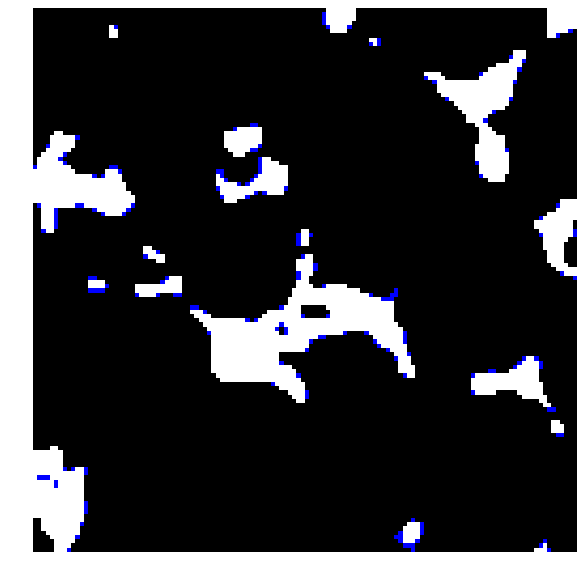

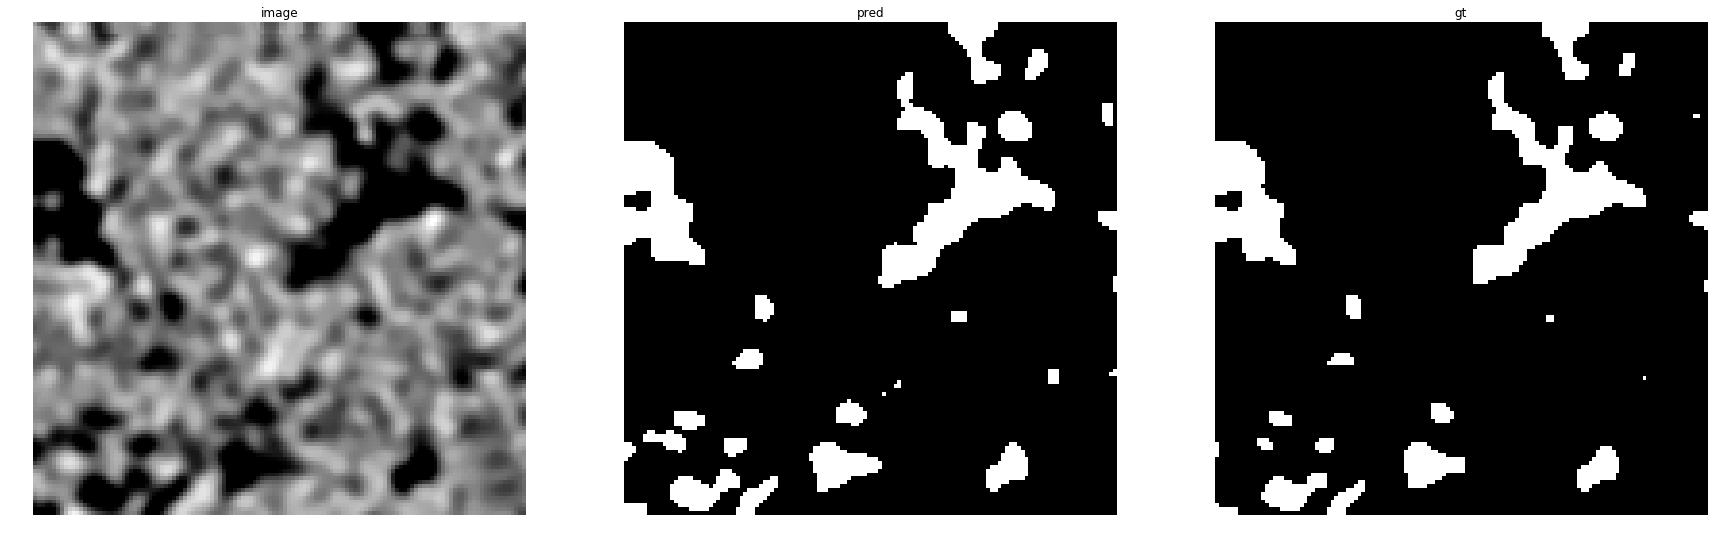

accuracy    : 0.98187255859375
precision   : 0.8585271317829457
recall      : 0.9971862689926843
f1          : 0.9226763863577192
pr_auc      : 0.9886932392965331
iou         : 0.8564523924601256


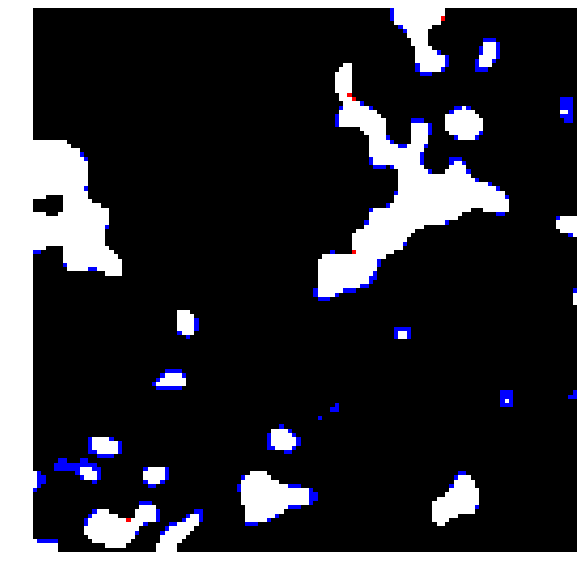

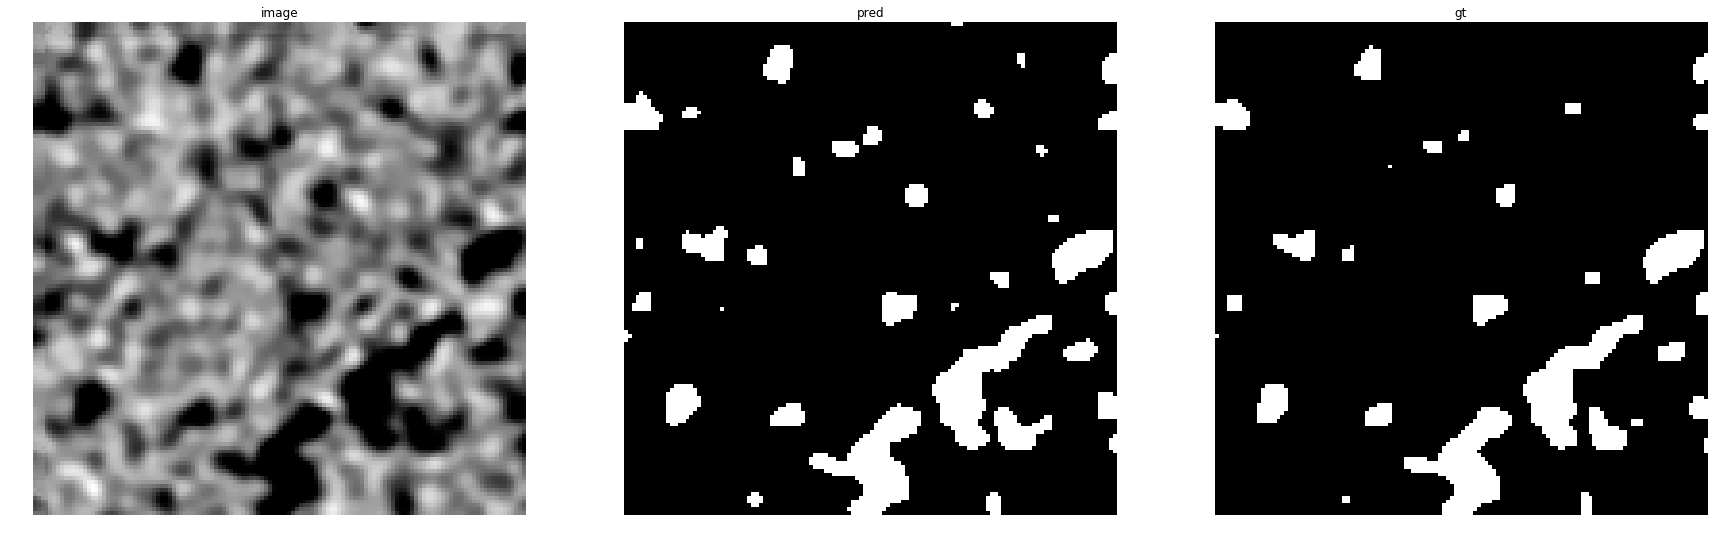

accuracy    : 0.98284912109375
precision   : 0.8433048433048433
recall      : 0.9959623149394348
f1          : 0.9132983647022523
pr_auc      : 0.9907607997904315
iou         : 0.8404315729699035


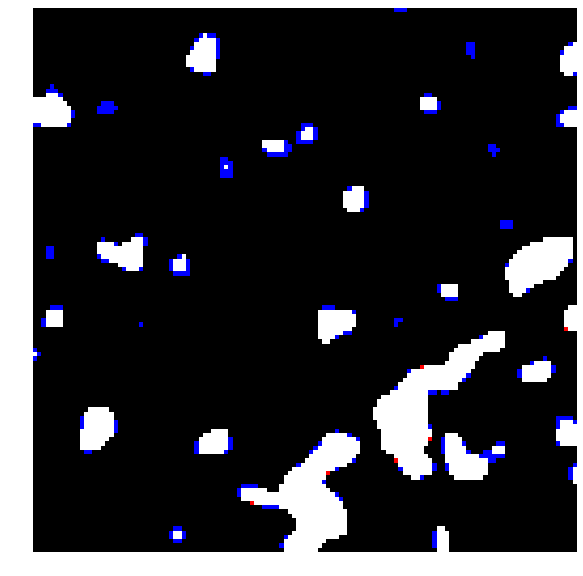

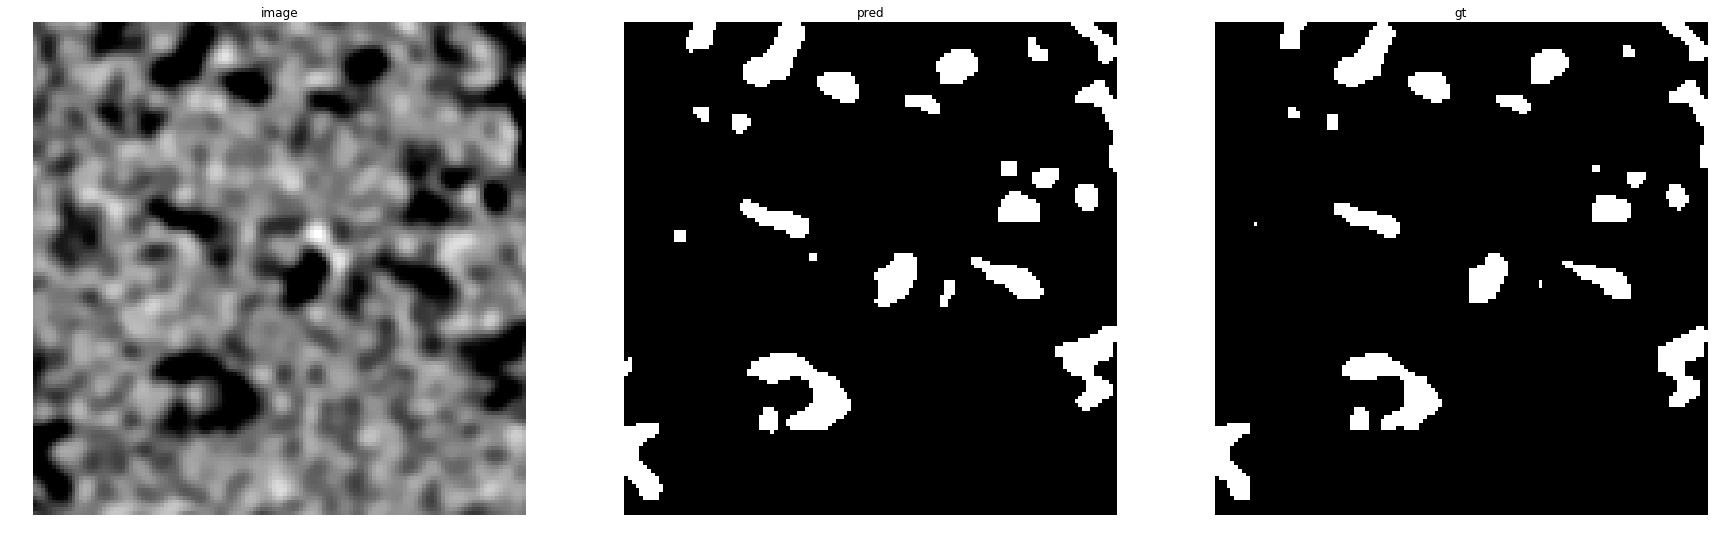

accuracy    : 0.9844970703125
precision   : 0.8453038674033149
recall      : 0.9985496736765772
f1          : 0.9155585106382977
pr_auc      : 0.9886459846885804
iou         : 0.8442673206621705


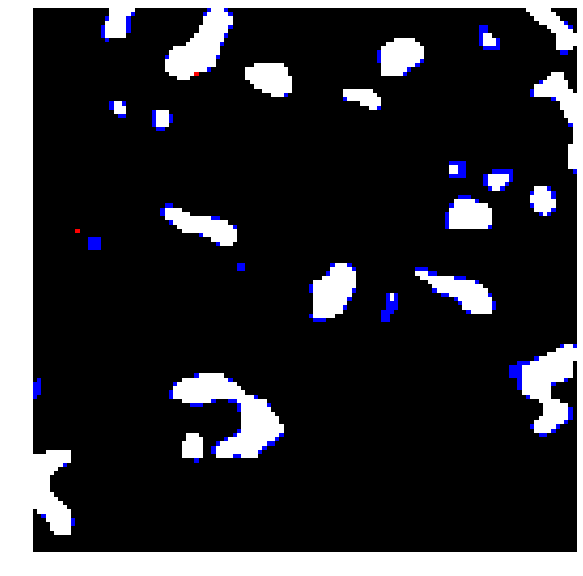

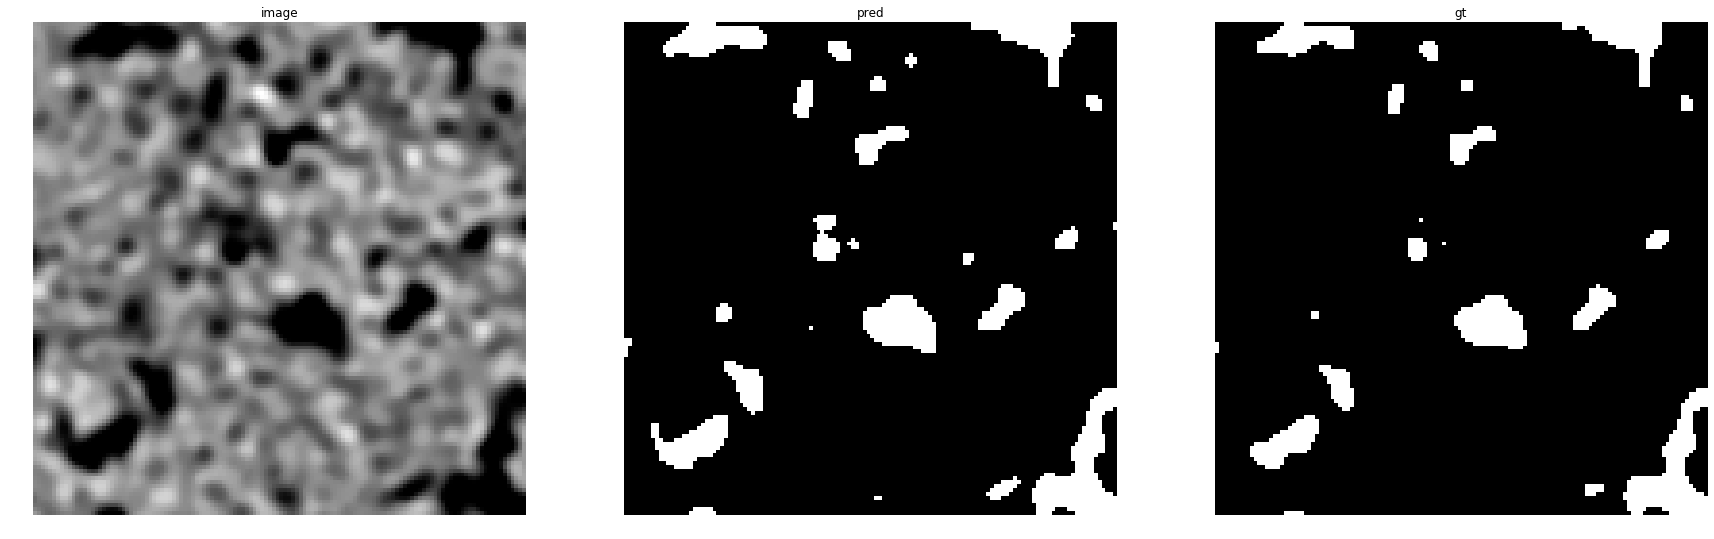

accuracy    : 0.98492431640625
precision   : 0.8384766907419566
recall      : 0.9992175273865415
f1          : 0.91181720813995
pr_auc      : 0.9920192071325261
iou         : 0.8379265091863517


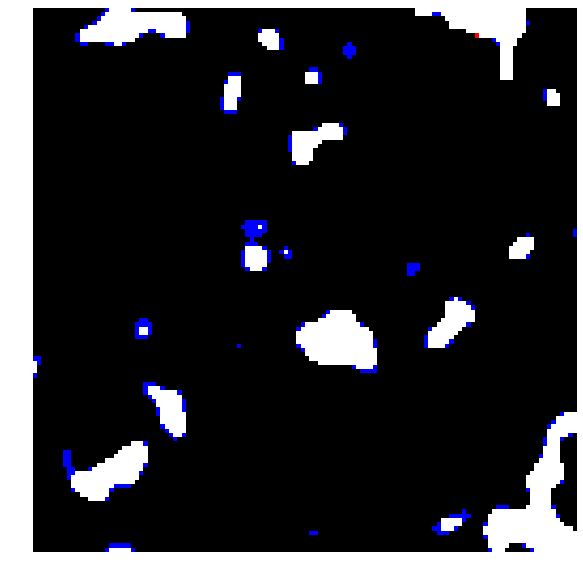

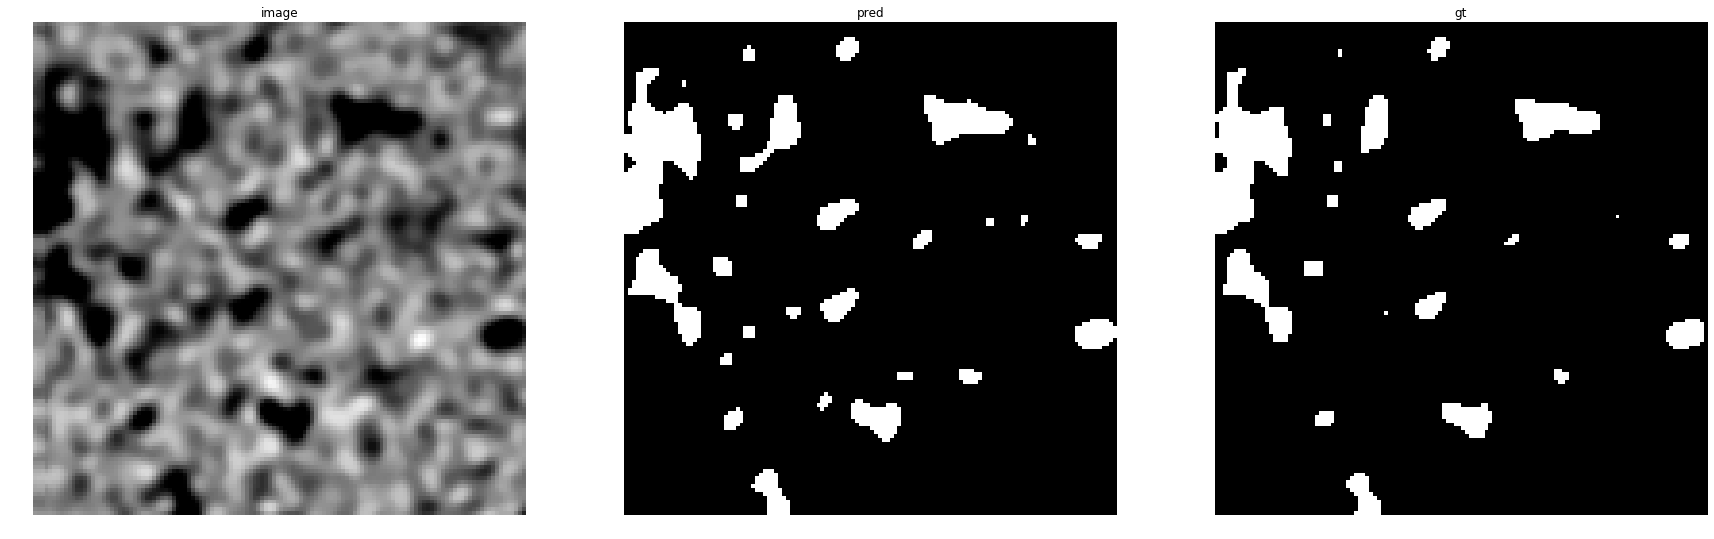

accuracy    : 0.98468017578125
precision   : 0.8409240924092409
recall      : 0.9922118380062306
f1          : 0.9103251161128975
pr_auc      : 0.9885913282516998
iou         : 0.8354098360655737


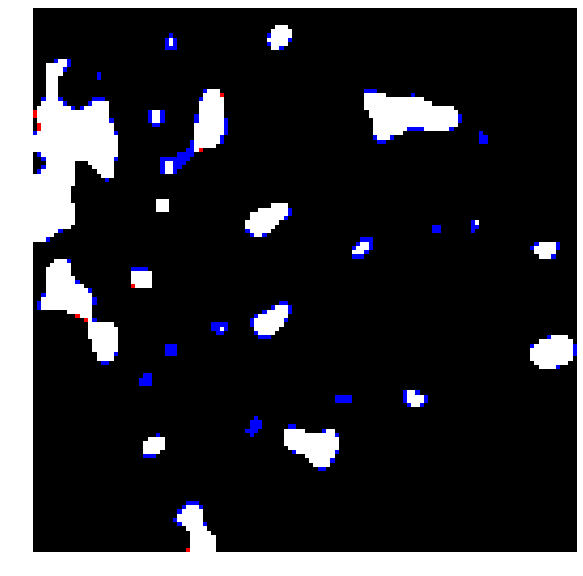

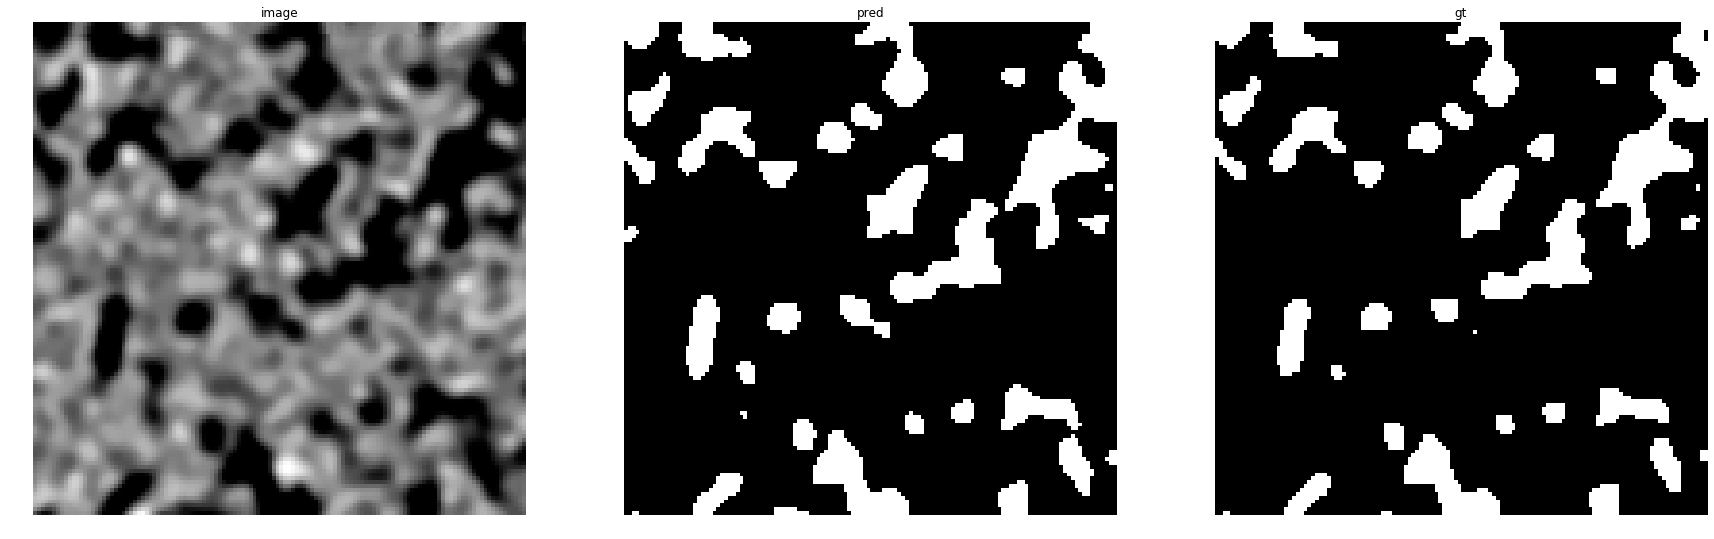

accuracy    : 0.97894287109375
precision   : 0.8887795275590551
recall      : 0.9977900552486187
f1          : 0.9401353461738677
pr_auc      : 0.9942940310388859
iou         : 0.8870333988212181


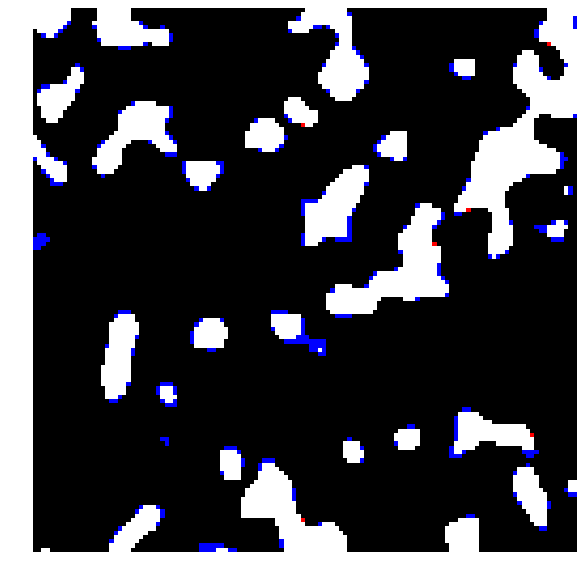

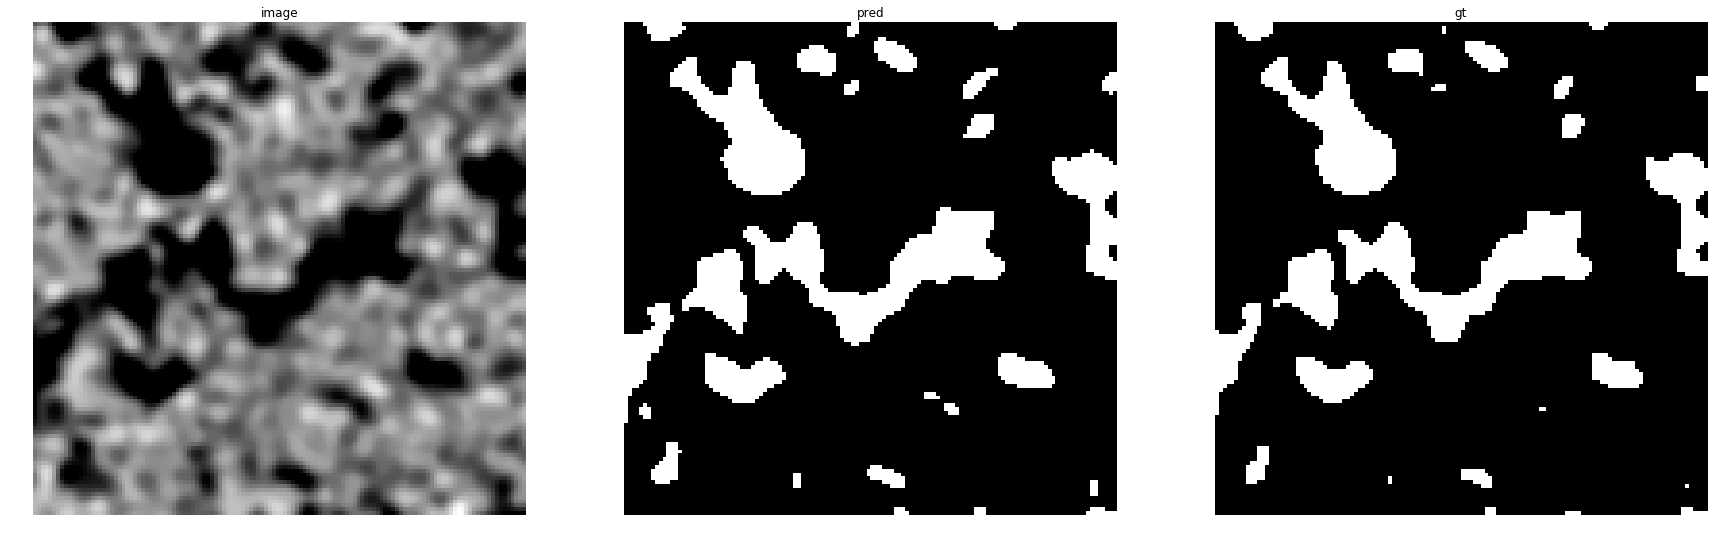

accuracy    : 0.98223876953125
precision   : 0.8986272439281943
recall      : 0.9988262910798122
f1          : 0.9460811561978878
pr_auc      : 0.9962892743725436
iou         : 0.8976793248945147


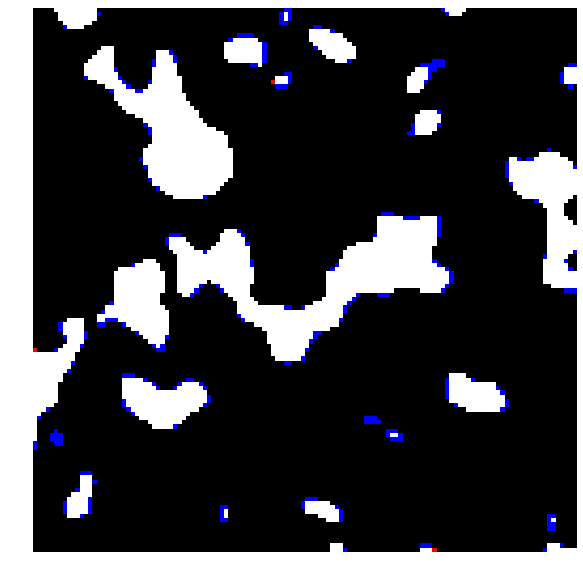

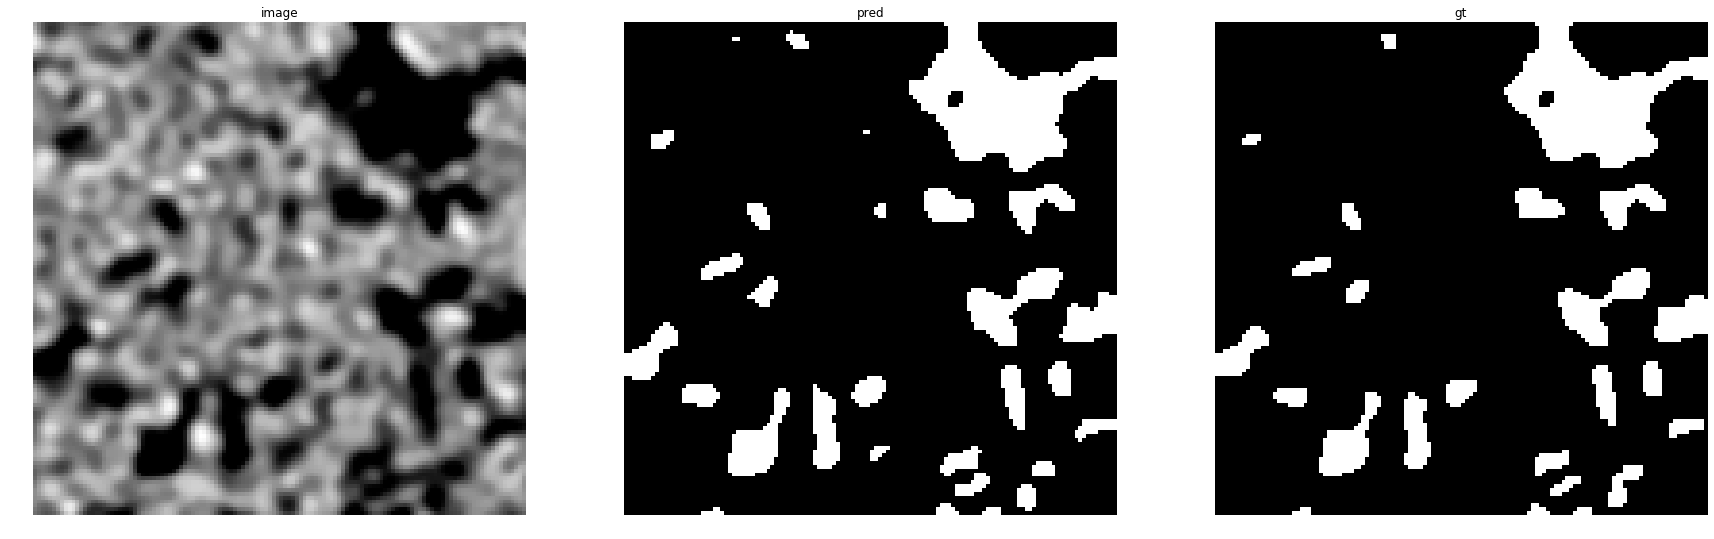

accuracy    : 0.98394775390625
precision   : 0.9037095501183899
recall      : 0.9917713295799048
f1          : 0.9456948172620278
pr_auc      : 0.9937194017095882
iou         : 0.8969839404622013


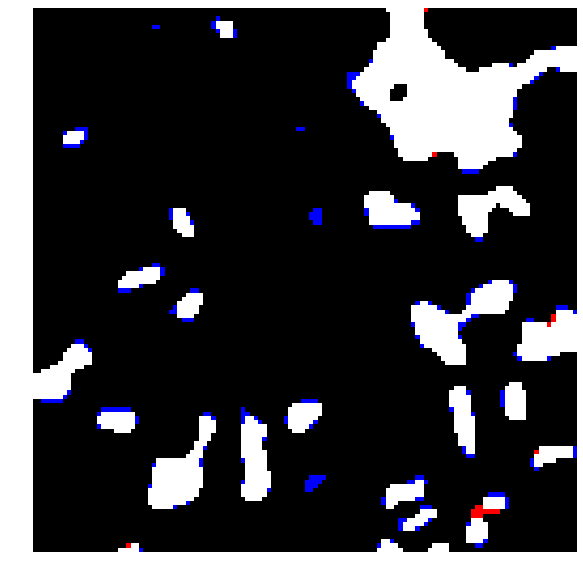

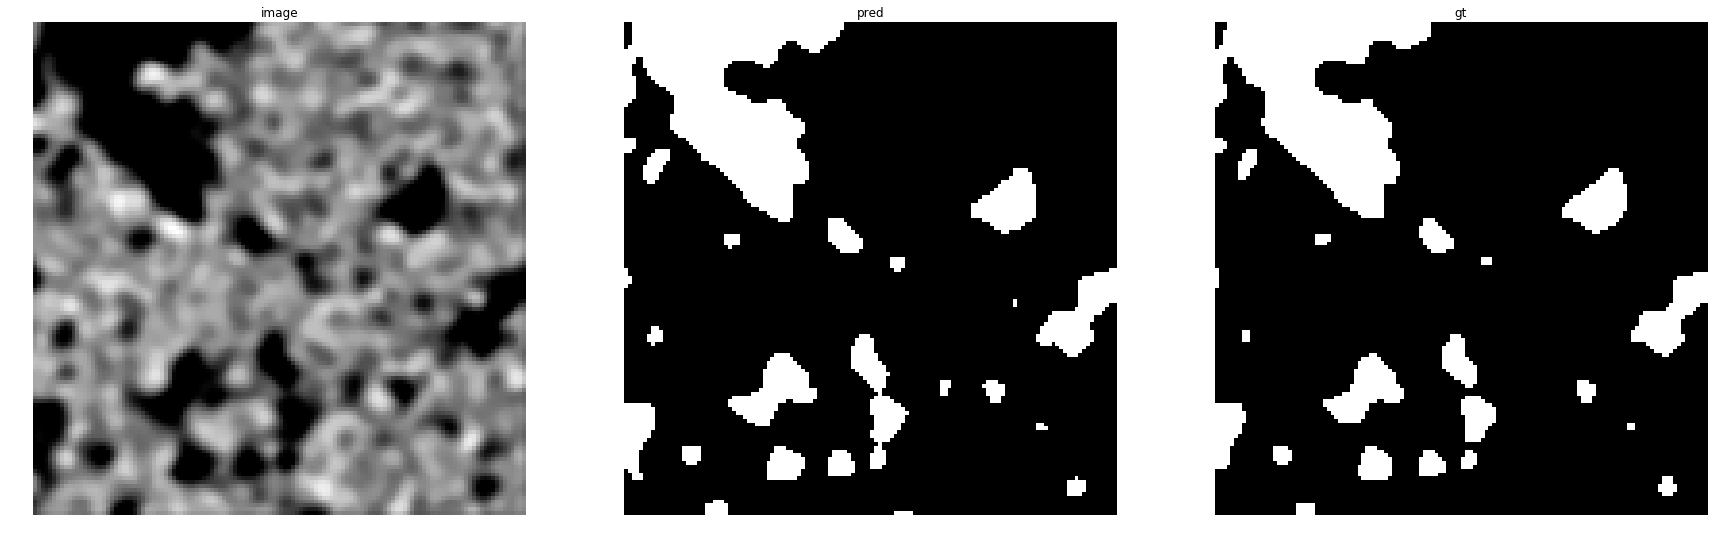

accuracy    : 0.98760986328125
precision   : 0.9271402550091075
recall      : 0.9988226059654631
f1          : 0.9616474589079917
pr_auc      : 0.9971438271909343
iou         : 0.9261280931586608


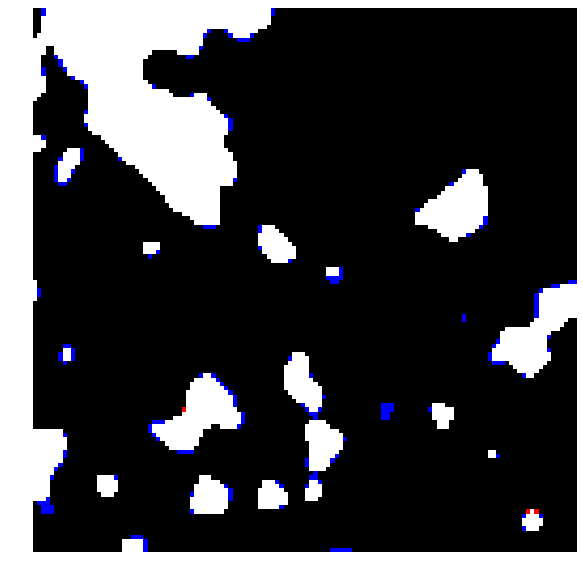

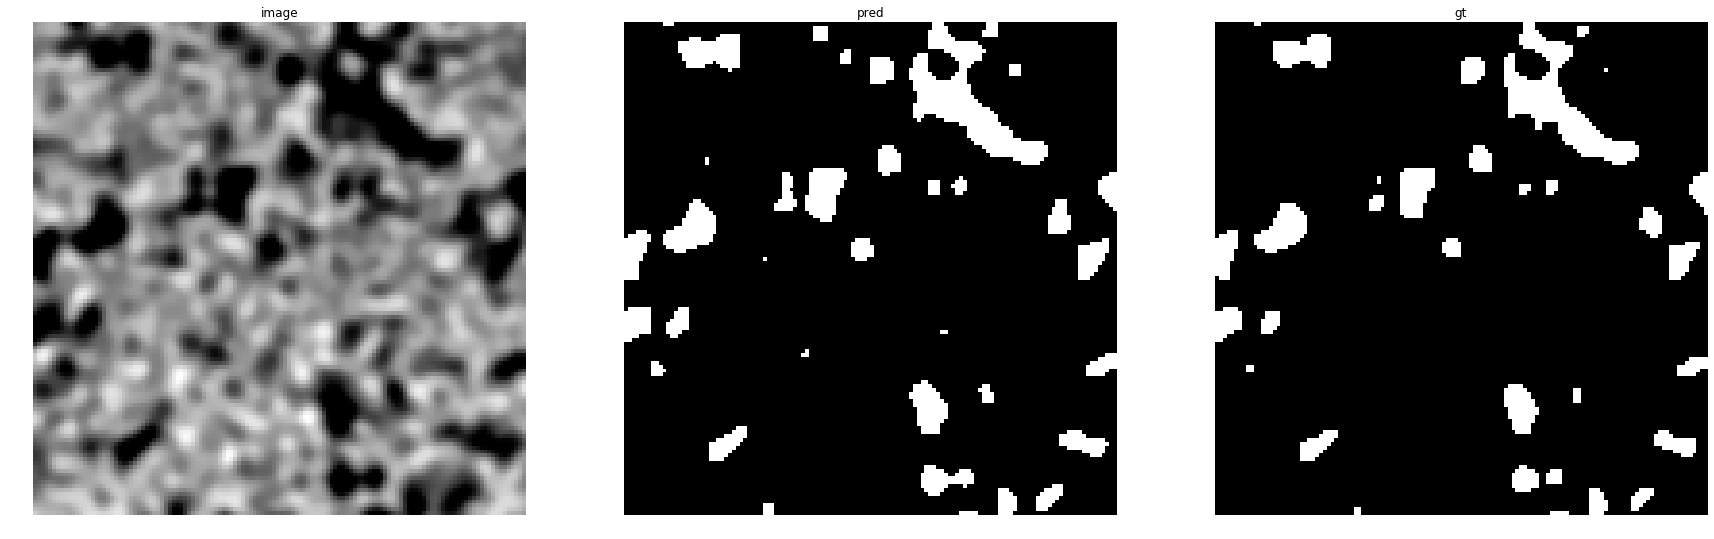

accuracy    : 0.98358154296875
precision   : 0.8475467289719626
recall      : 0.9945167923235092
f1          : 0.9151687164932197
pr_auc      : 0.9871067538957095
iou         : 0.8436046511627907
Prediction fro carbRNF:


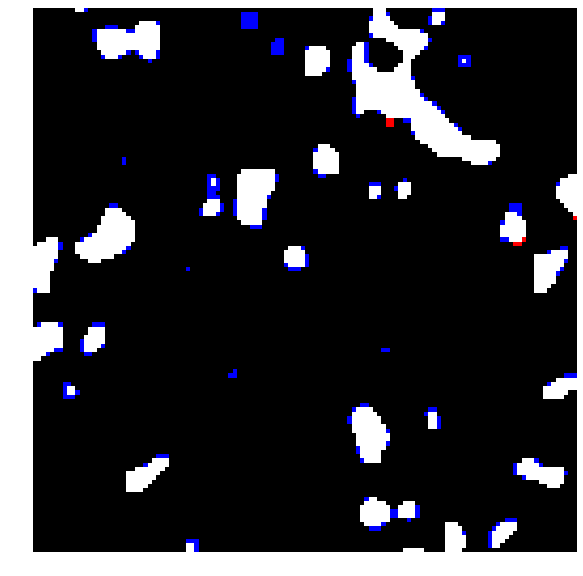

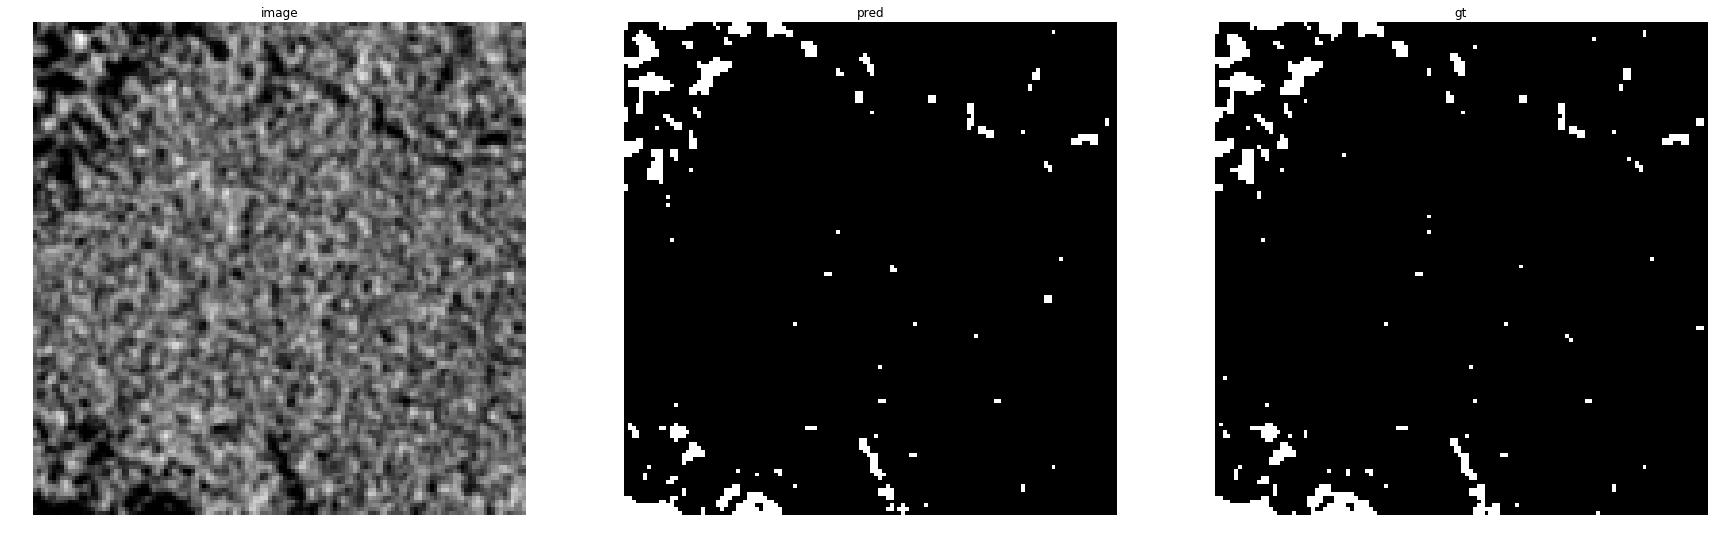

accuracy    : 0.99285888671875
precision   : 0.9686028257456829
recall      : 0.8641456582633054
f1          : 0.91339748334567
pr_auc      : 0.98423239351373
iou         : 0.840599455040872


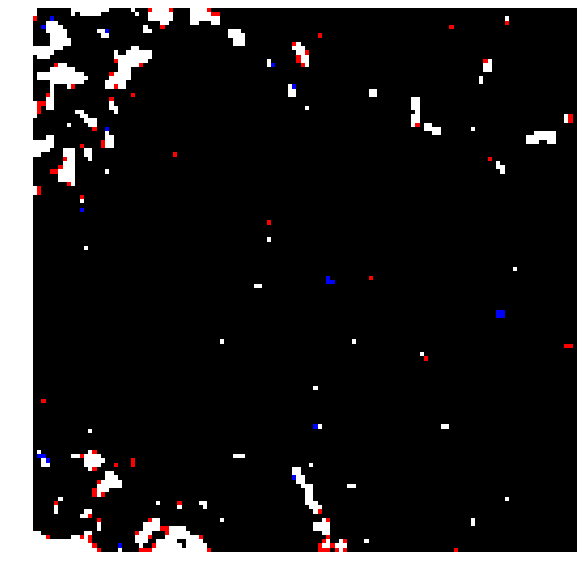

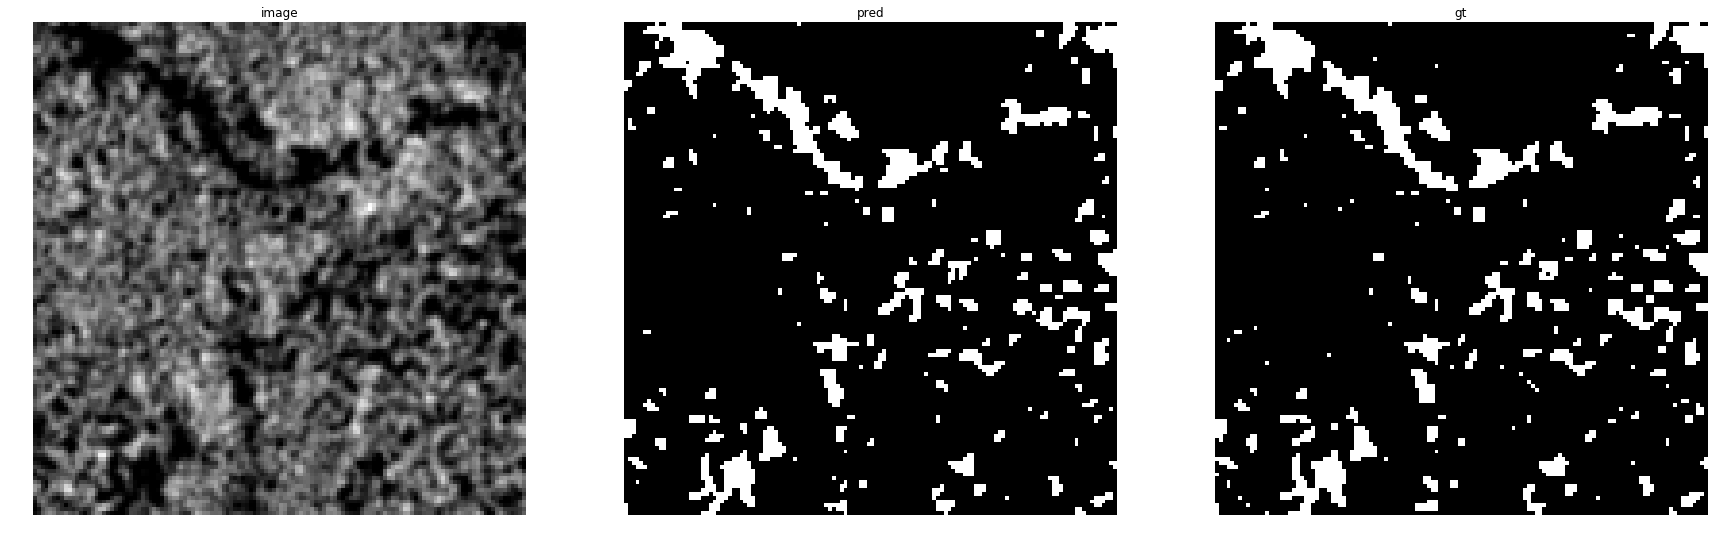

accuracy    : 0.98370361328125
precision   : 0.9588963963963963
recall      : 0.8977332630469161
f1          : 0.9273073781649878
pr_auc      : 0.9857971276046203
iou         : 0.8644670050761422


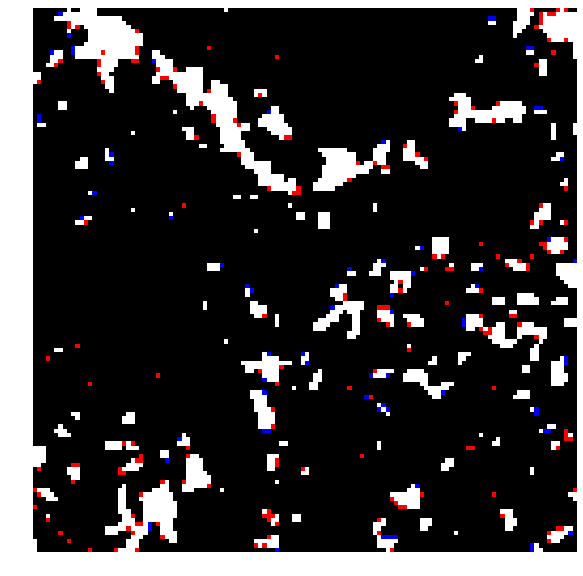

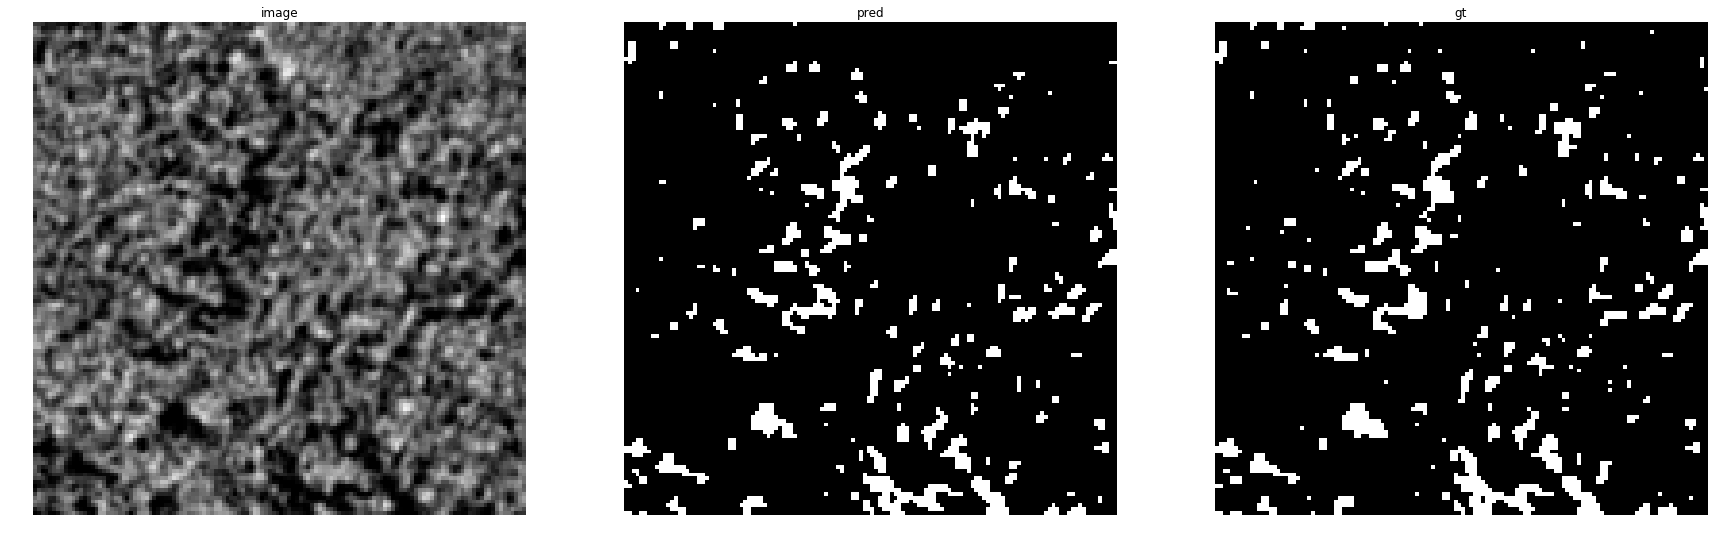

accuracy    : 0.98333740234375
precision   : 0.9328413284132842
recall      : 0.8741355463347165
f1          : 0.9025348089967868
pr_auc      : 0.9742851091421367
iou         : 0.8223812621990891


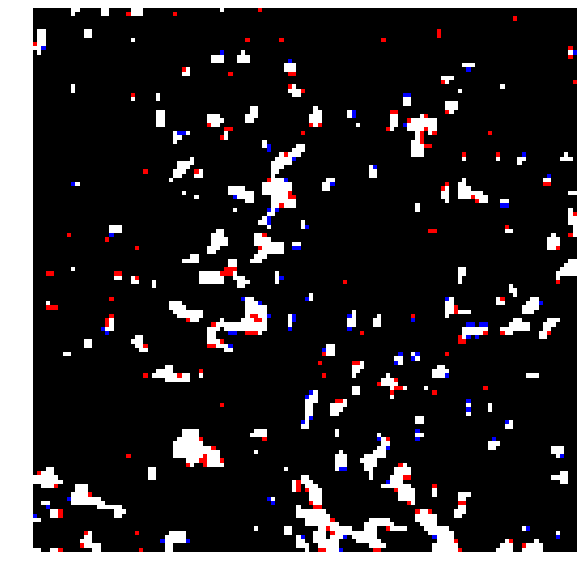

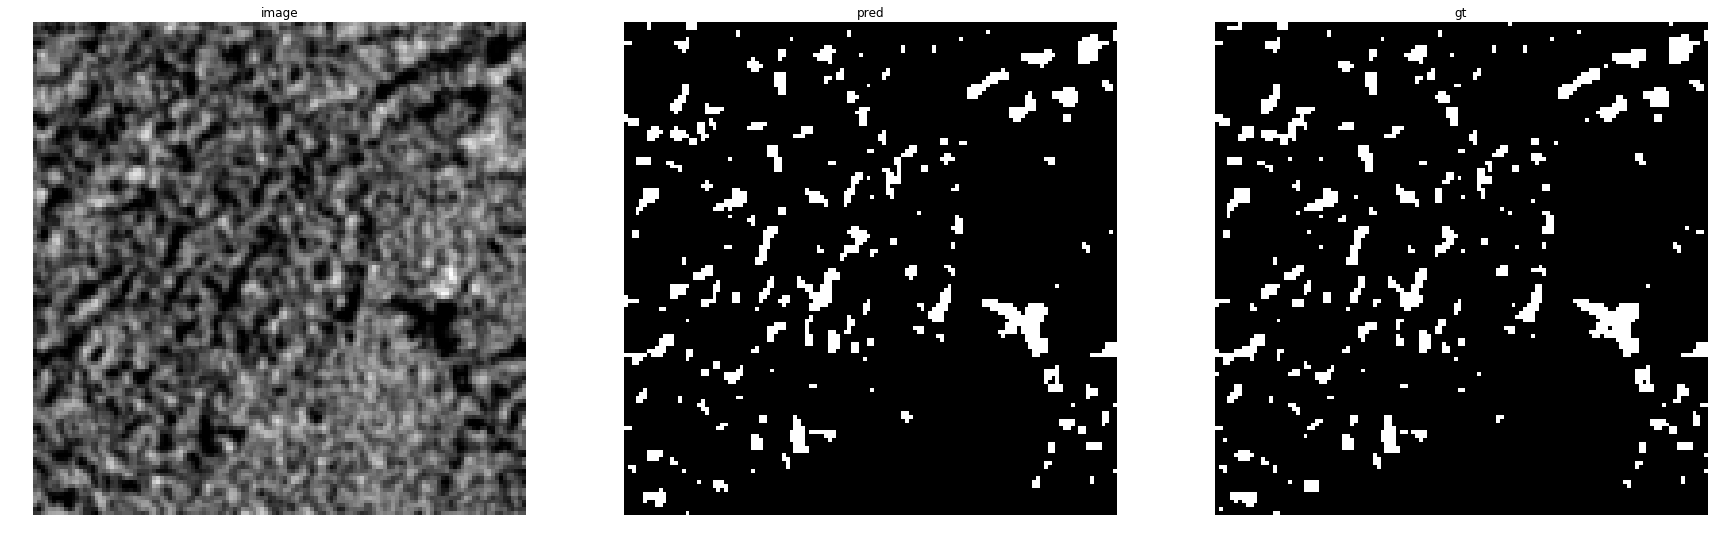

accuracy    : 0.98736572265625
precision   : 0.9424678274034822
recall      : 0.904796511627907
f1          : 0.9232480533926585
pr_auc      : 0.9825162065678236
iou         : 0.8574380165289256


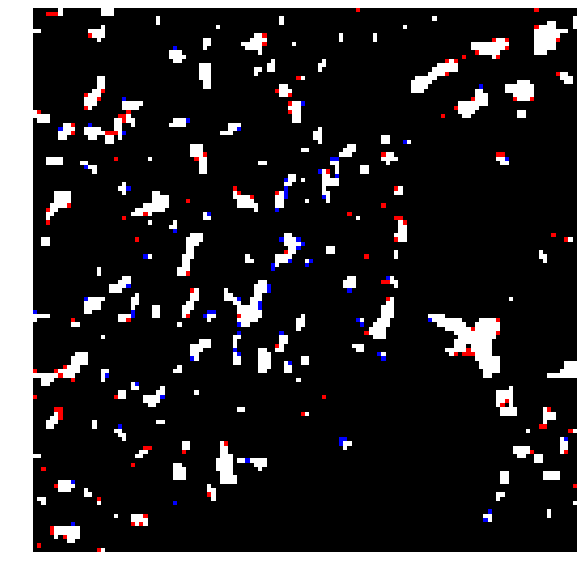

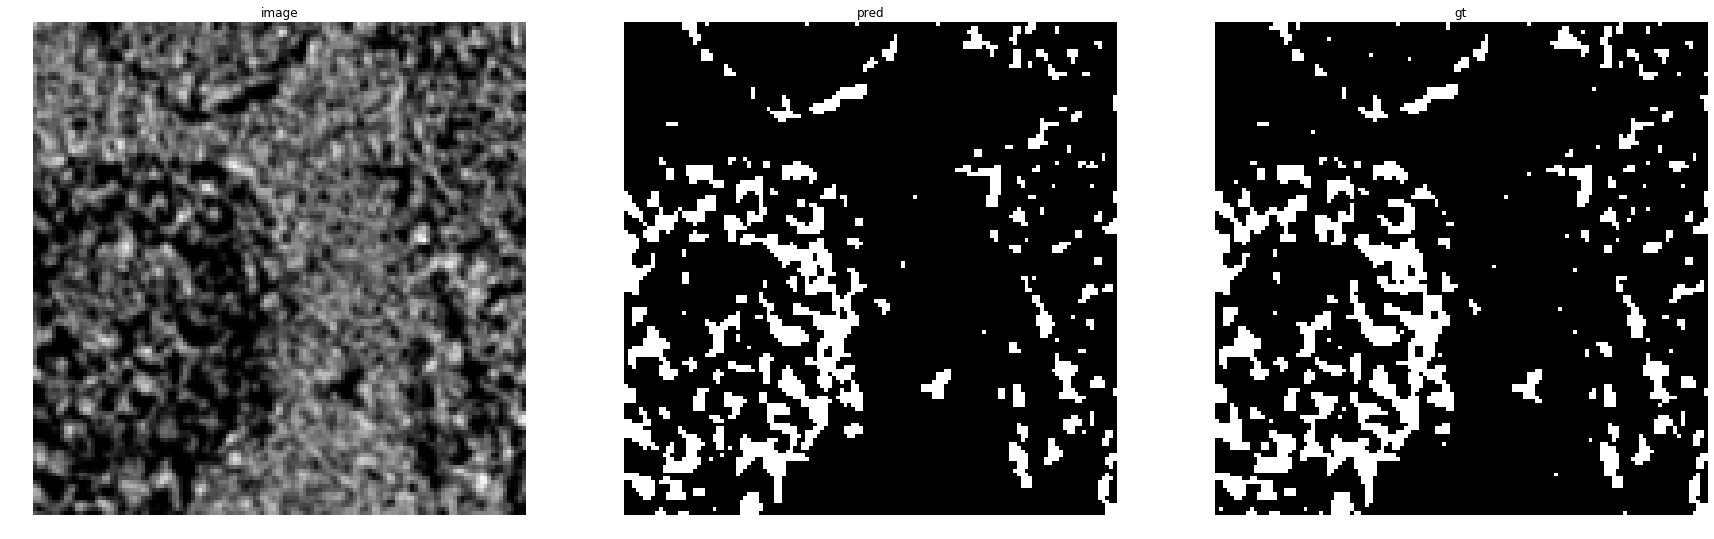

accuracy    : 0.978515625
precision   : 0.9669911129919594
recall      : 0.8929269245799141
f1          : 0.9284843559528647
pr_auc      : 0.988509660021836
iou         : 0.8665149791429655


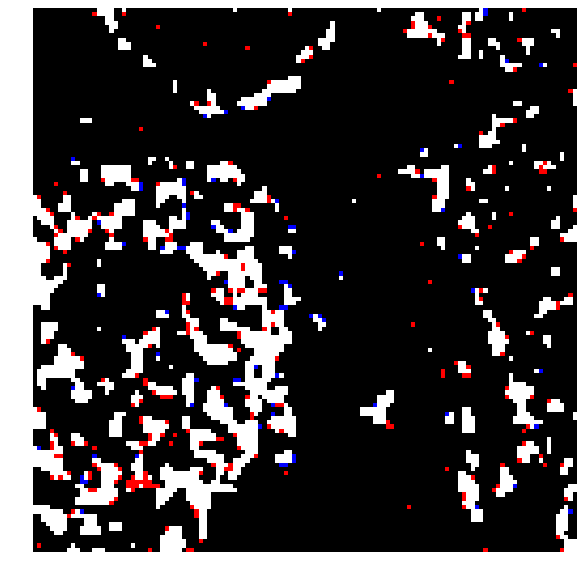

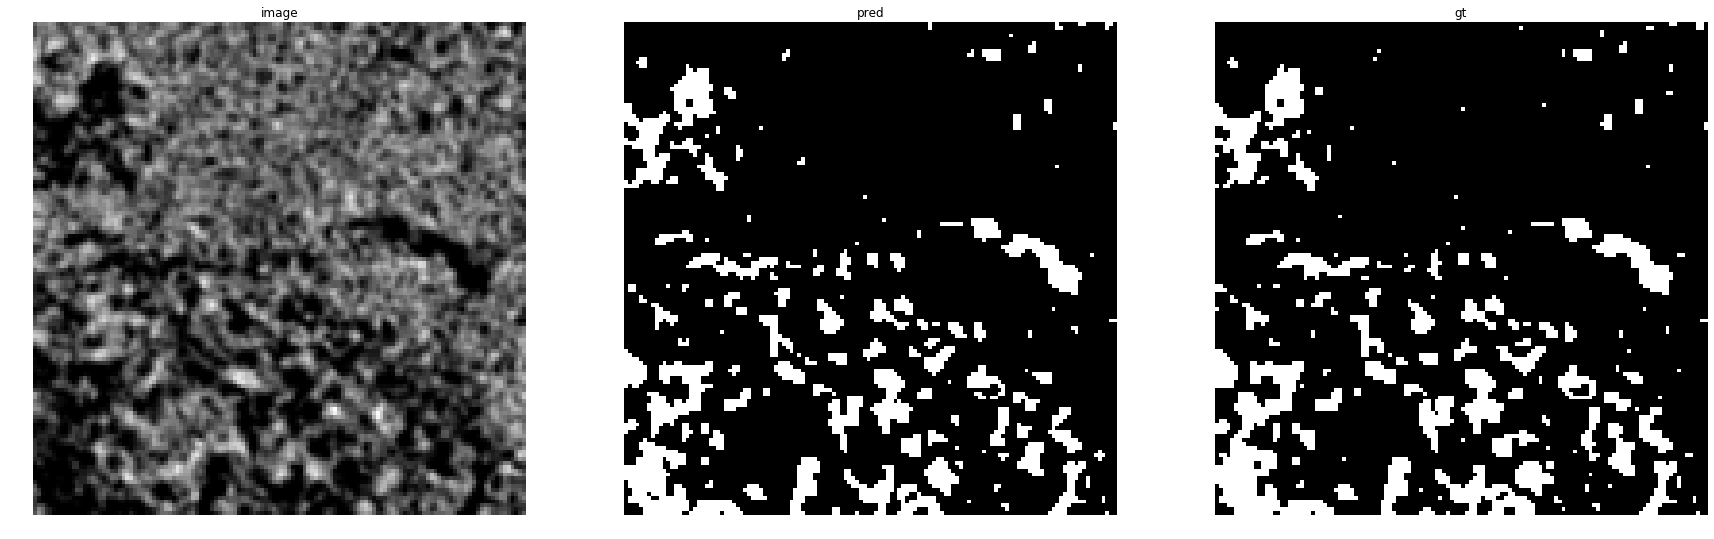

accuracy    : 0.9803466796875
precision   : 0.9637589549093973
recall      : 0.9064605628220372
f1          : 0.9342320261437909
pr_auc      : 0.9888793484232525
iou         : 0.8765810655423534


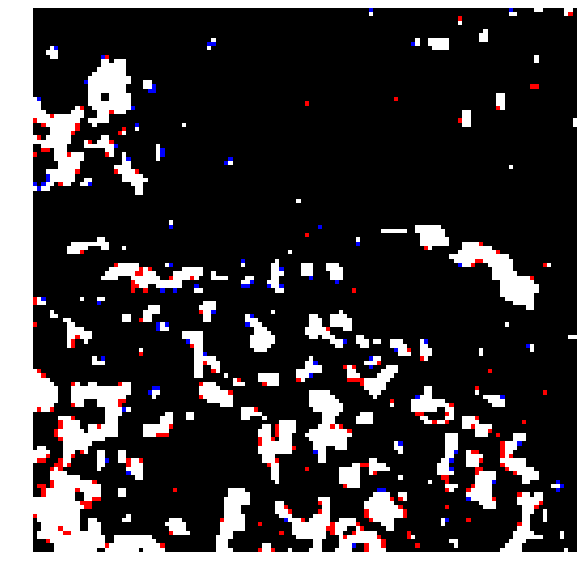

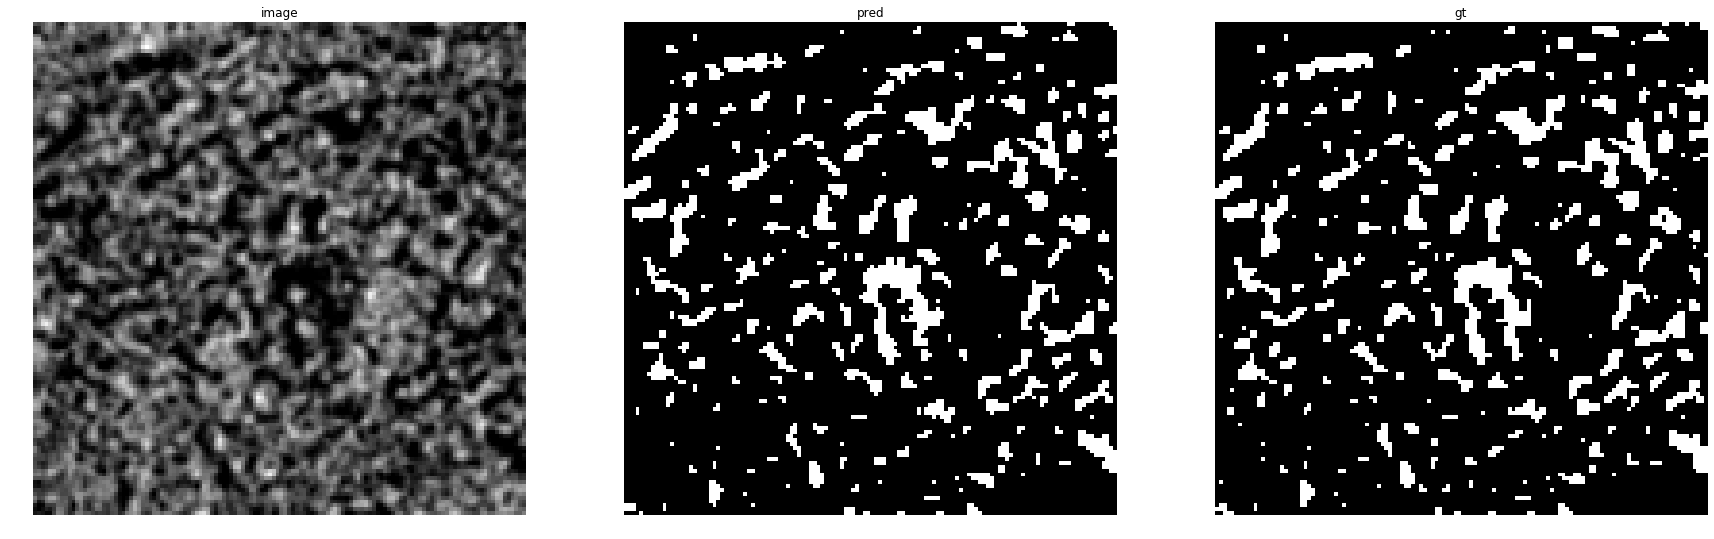

accuracy    : 0.97686767578125
precision   : 0.9523608768971332
recall      : 0.8946534653465347
f1          : 0.9226056769450685
pr_auc      : 0.9840050309903807
iou         : 0.856330553449583


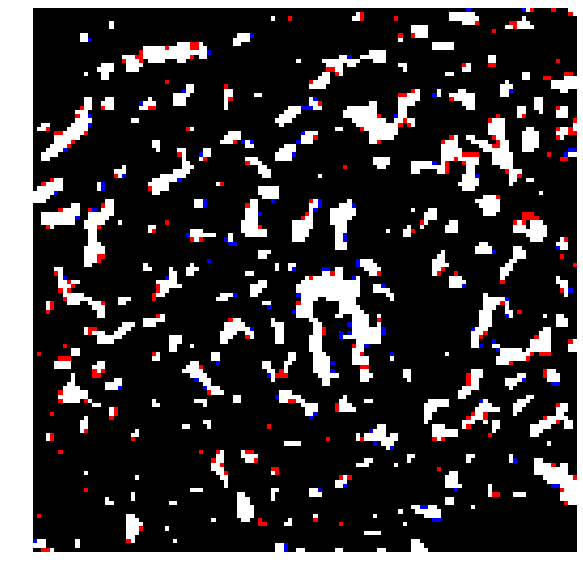

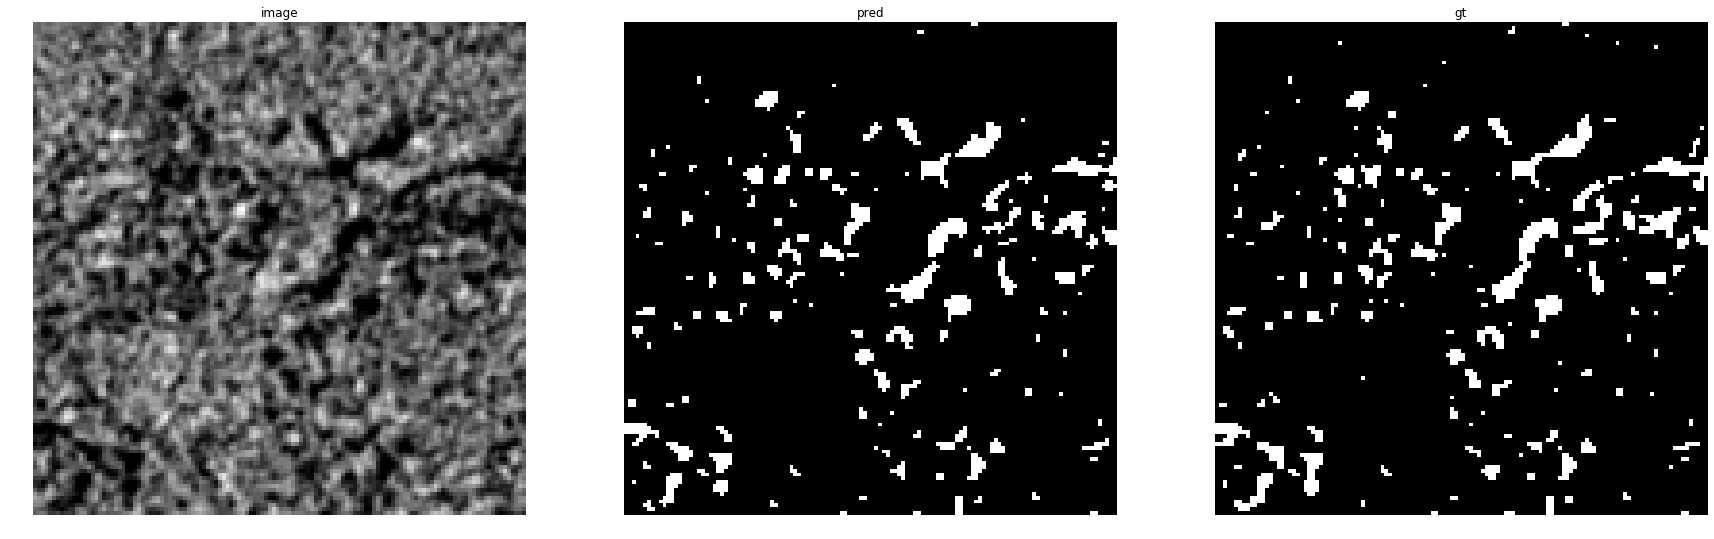

accuracy    : 0.985595703125
precision   : 0.948961937716263
recall      : 0.8610675039246468
f1          : 0.9028806584362141
pr_auc      : 0.9768653202587144
iou         : 0.8229557389347337


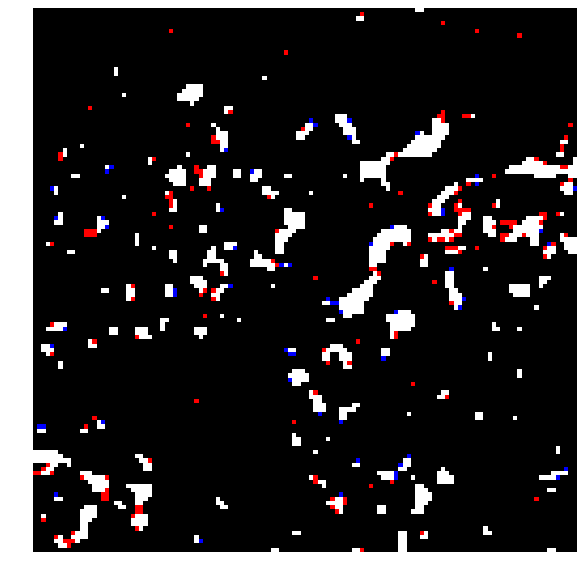

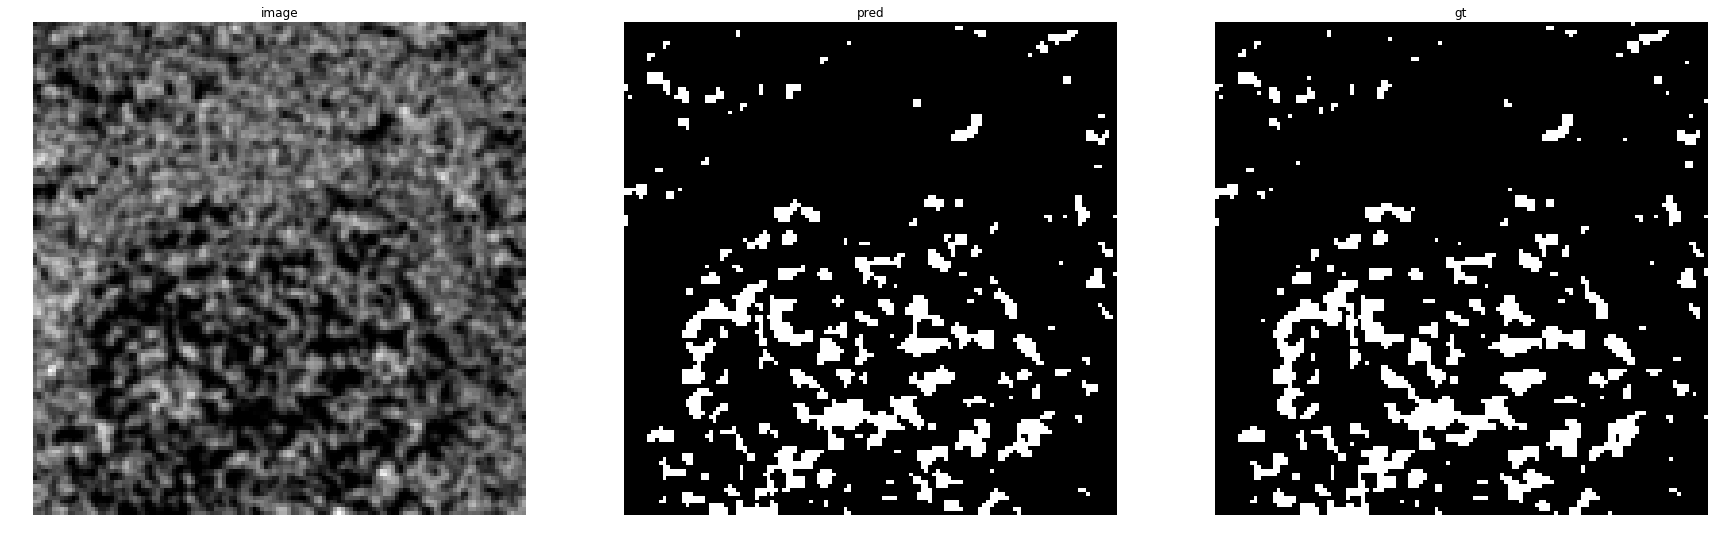

accuracy    : 0.98065185546875
precision   : 0.9529892692897292
recall      : 0.8923444976076556
f1          : 0.9216703731158883
pr_auc      : 0.9841421450951967
iou         : 0.8547204399633364


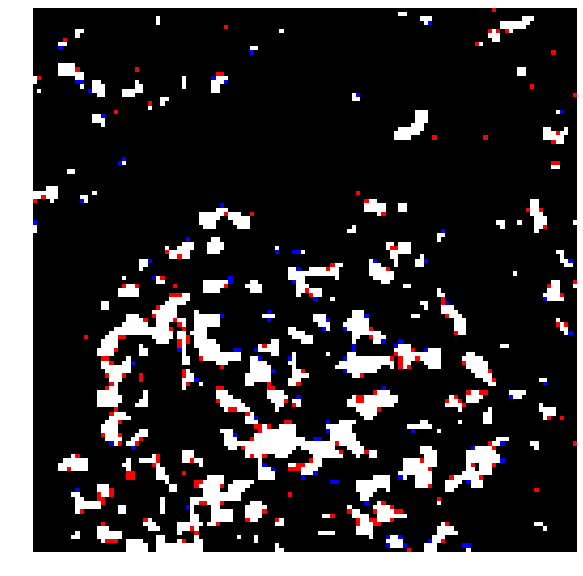

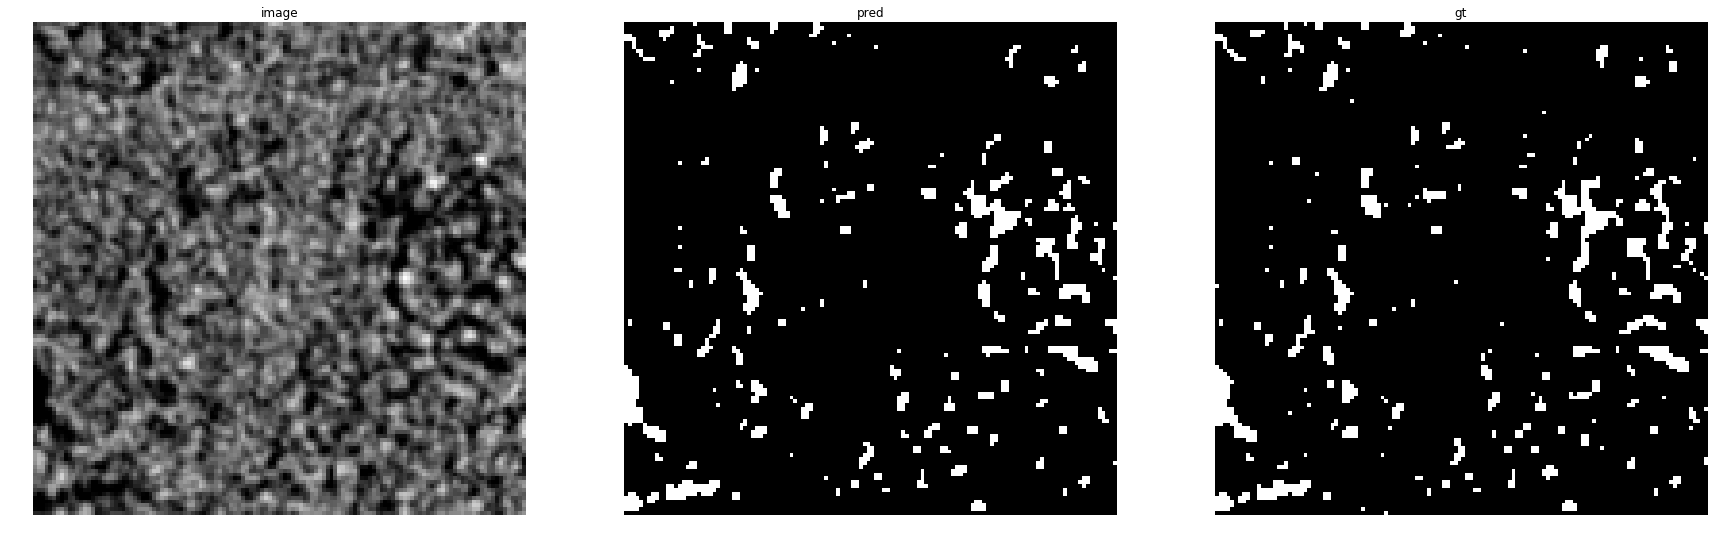

accuracy    : 0.9881591796875
precision   : 0.9492619926199262
recall      : 0.8809931506849316
f1          : 0.9138543516873889
pr_auc      : 0.9782661738700148
iou         : 0.8413736713000818
Prediction fro SPE_carb10_58_box3:


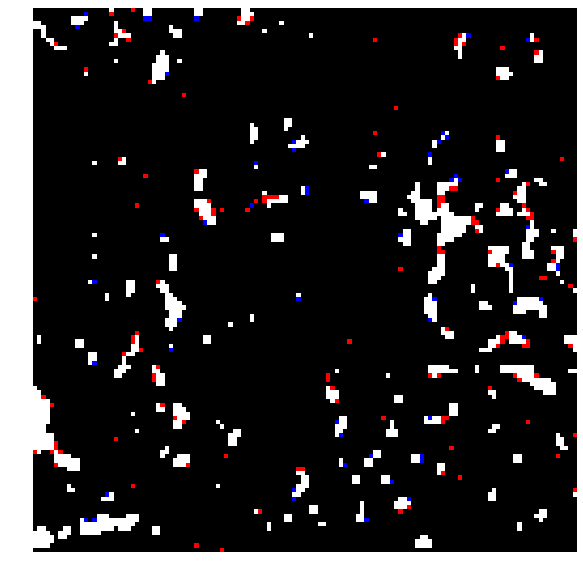

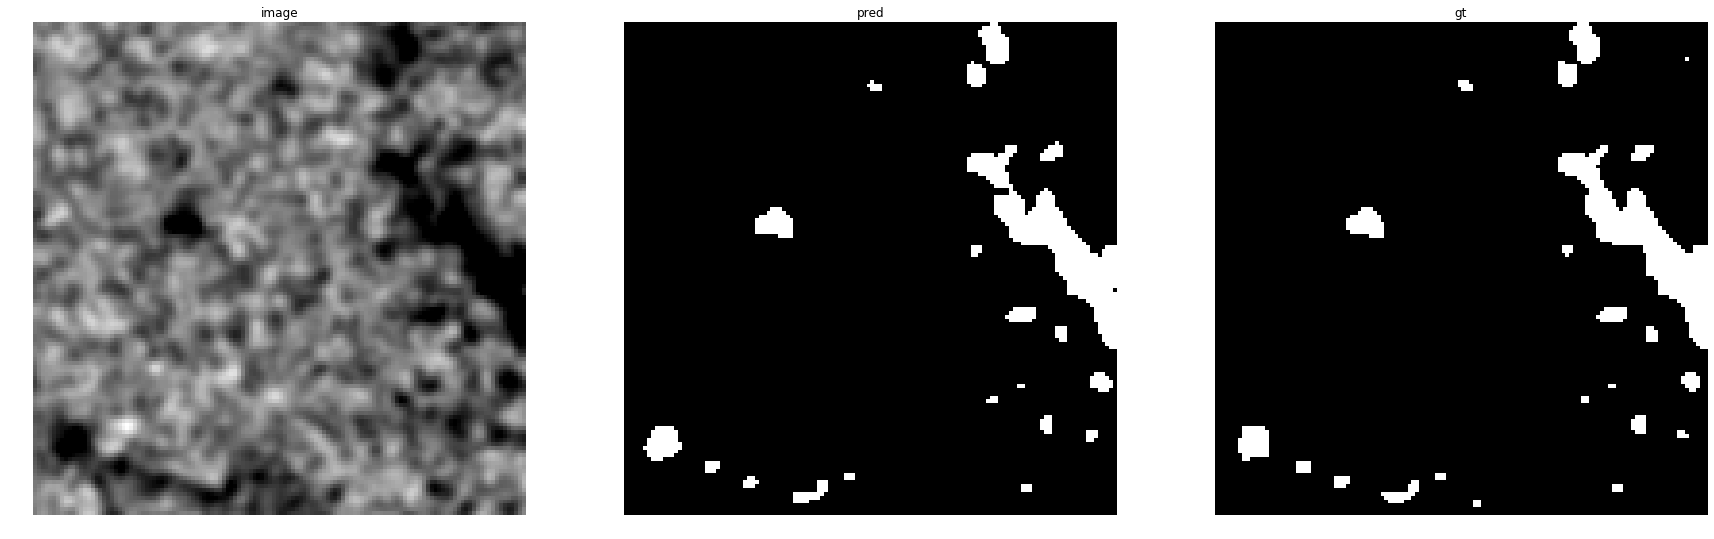

accuracy    : 0.99542236328125
precision   : 0.9739039665970772
recall      : 0.9491353001017294
f1          : 0.9613601236476044
pr_auc      : 0.9947621945042322
iou         : 0.9255952380952381


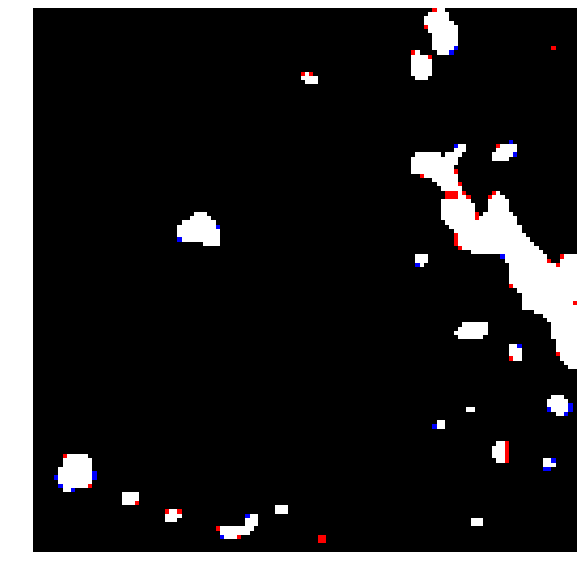

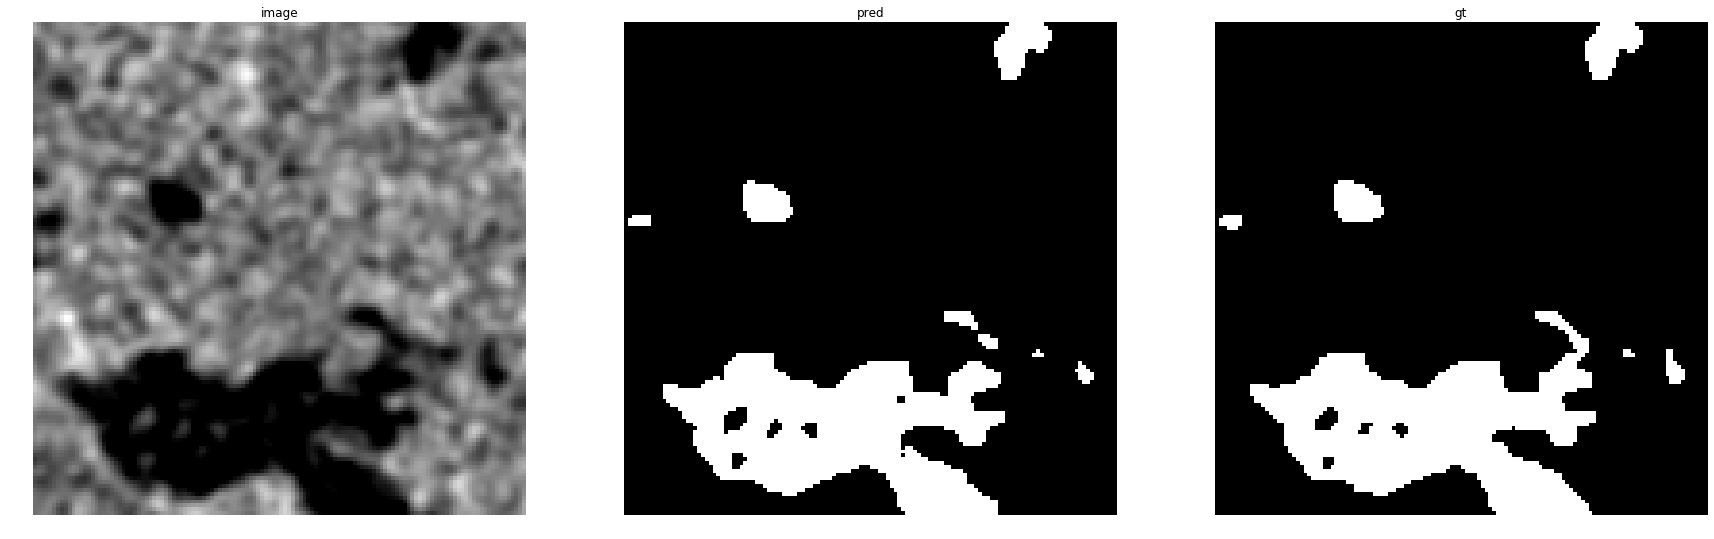

accuracy    : 0.99285888671875
precision   : 0.9967728922952803
recall      : 0.9577519379844961
f1          : 0.9768728997825658
pr_auc      : 0.9988616167167561
iou         : 0.9547913446676971


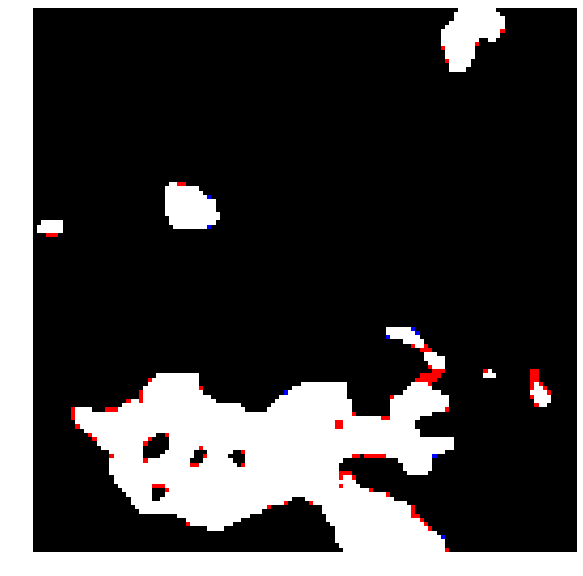

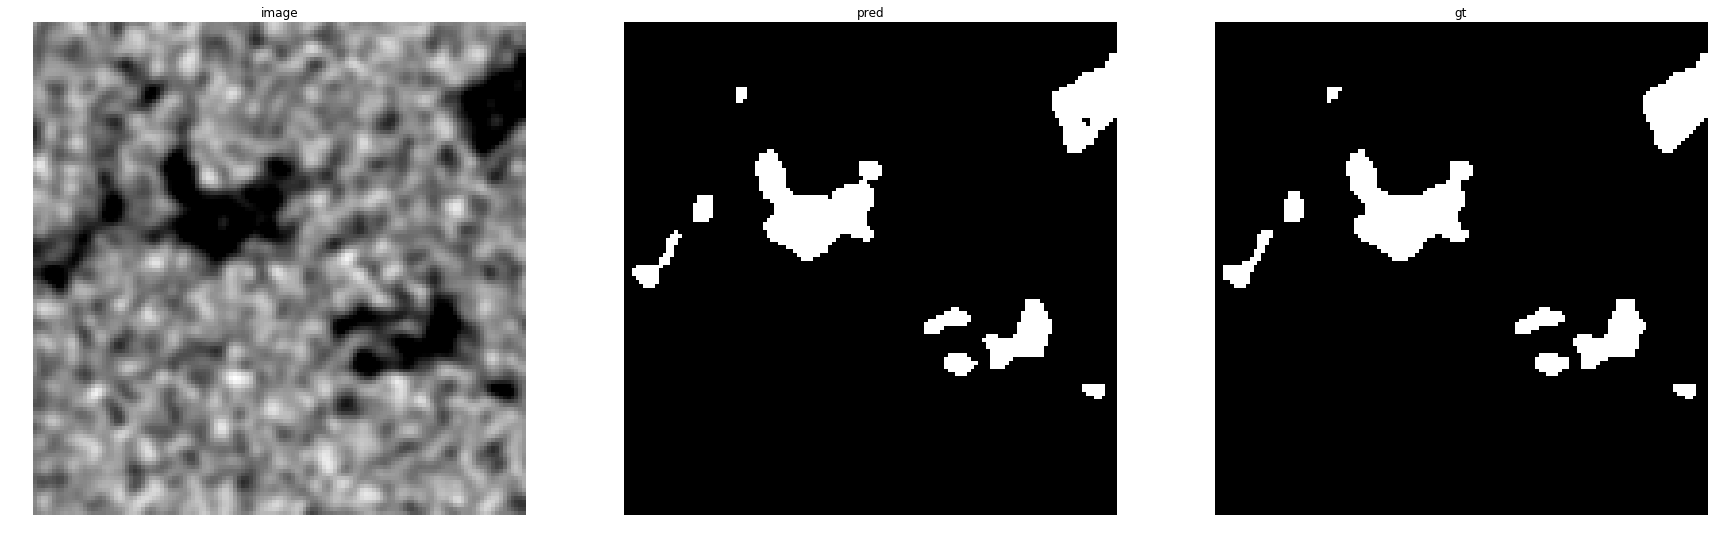

accuracy    : 0.9959716796875
precision   : 0.9911347517730497
recall      : 0.9522998296422487
f1          : 0.9713292788879235
pr_auc      : 0.9983791023266357
iou         : 0.9442567567567568


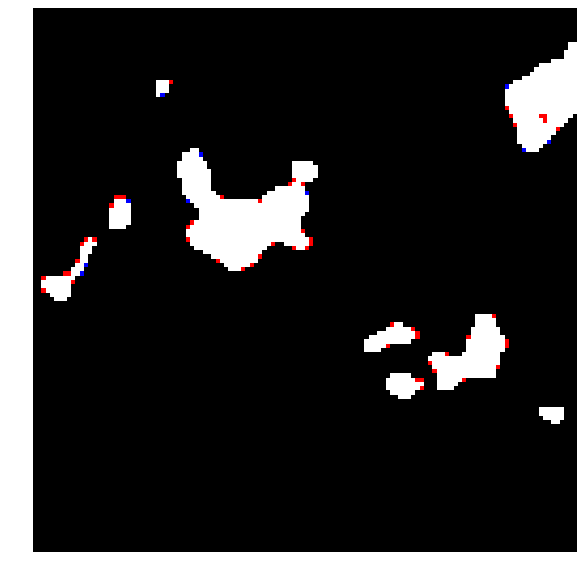

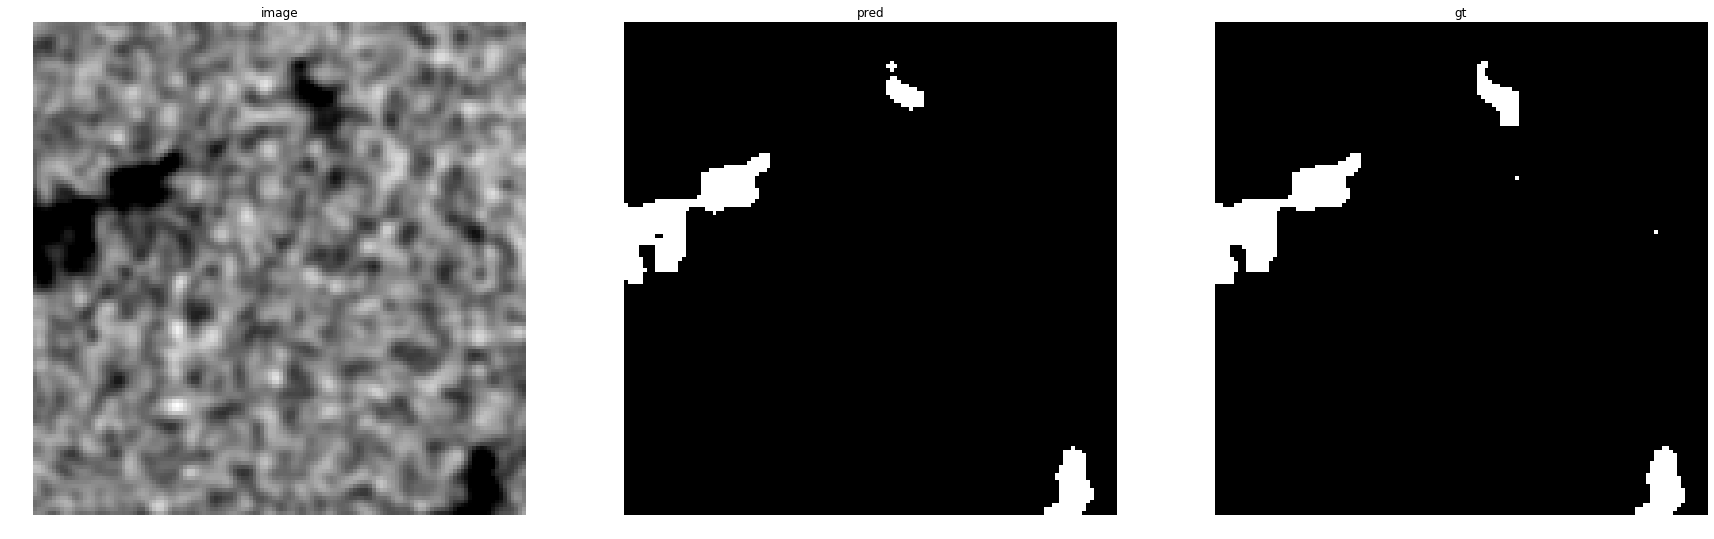

accuracy    : 0.9967041015625
precision   : 0.9969418960244648
recall      : 0.9261363636363636
f1          : 0.9602356406480118
pr_auc      : 0.9957615068533159
iou         : 0.9235127478753541


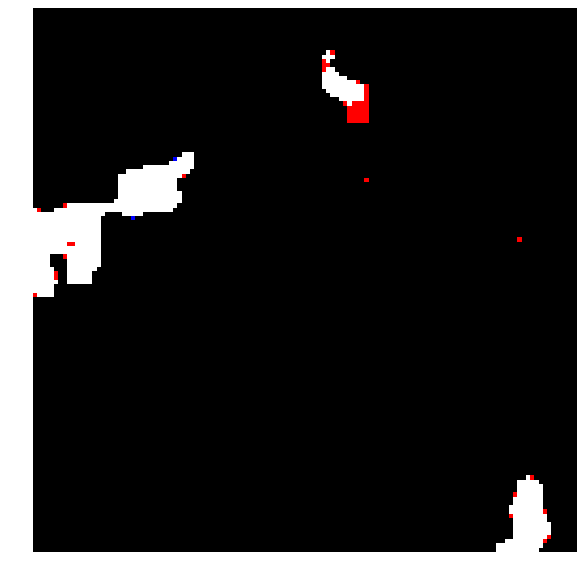

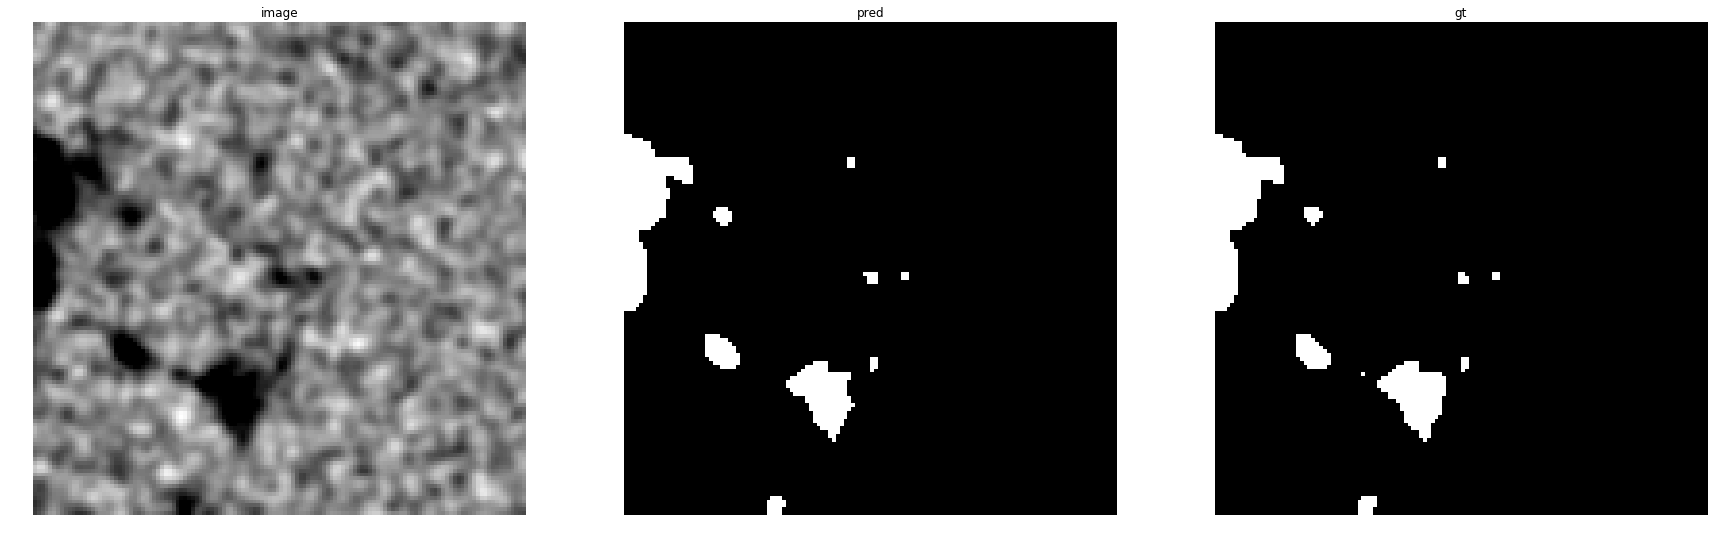

accuracy    : 0.99798583984375
precision   : 0.9847009735744089
recall      : 0.9698630136986301
f1          : 0.9772256728778468
pr_auc      : 0.9972646234827335
iou         : 0.9554655870445344


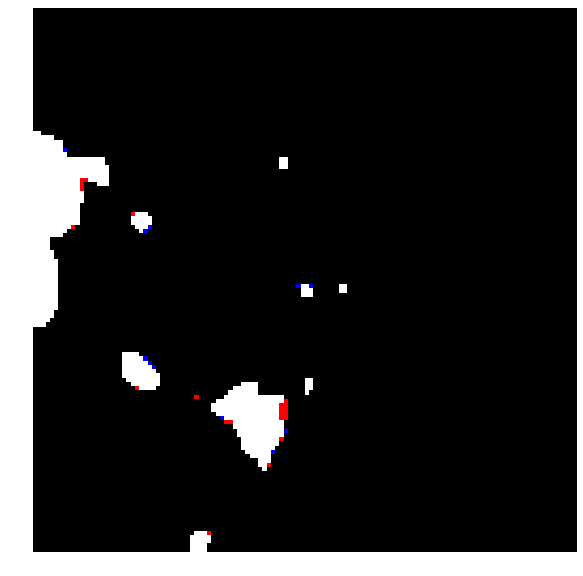

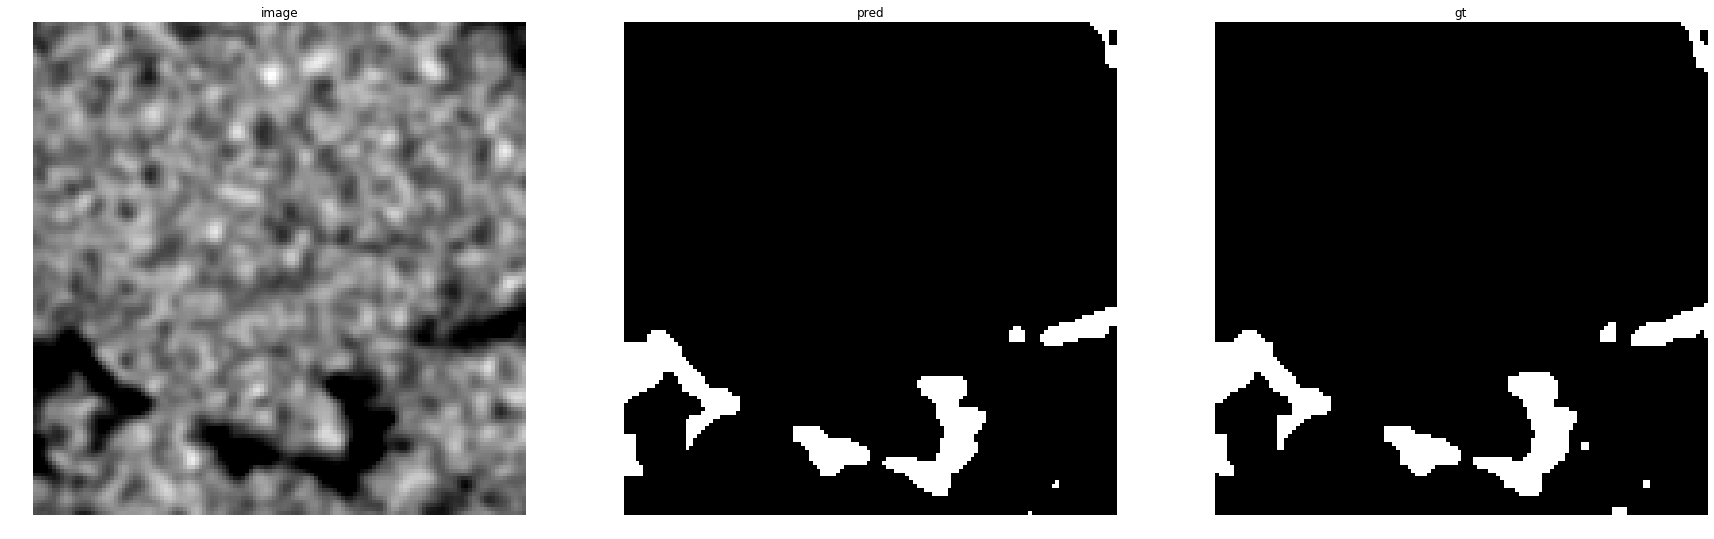

accuracy    : 0.9951171875
precision   : 0.9970986460348162
recall      : 0.9305054151624549
f1          : 0.9626517273576096
pr_auc      : 0.9979782970123293
iou         : 0.927992799279928


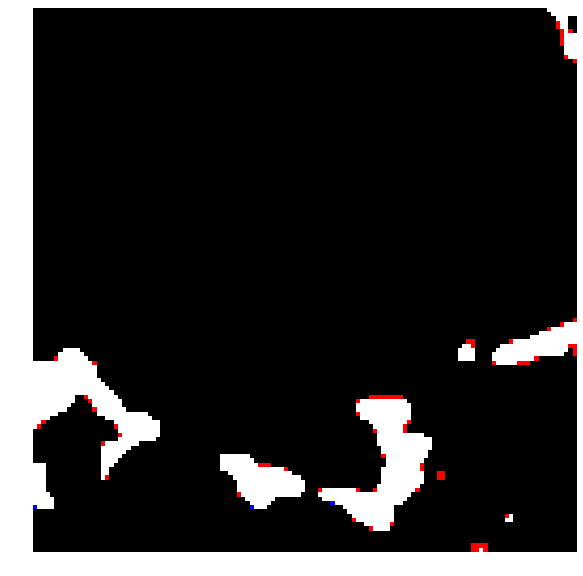

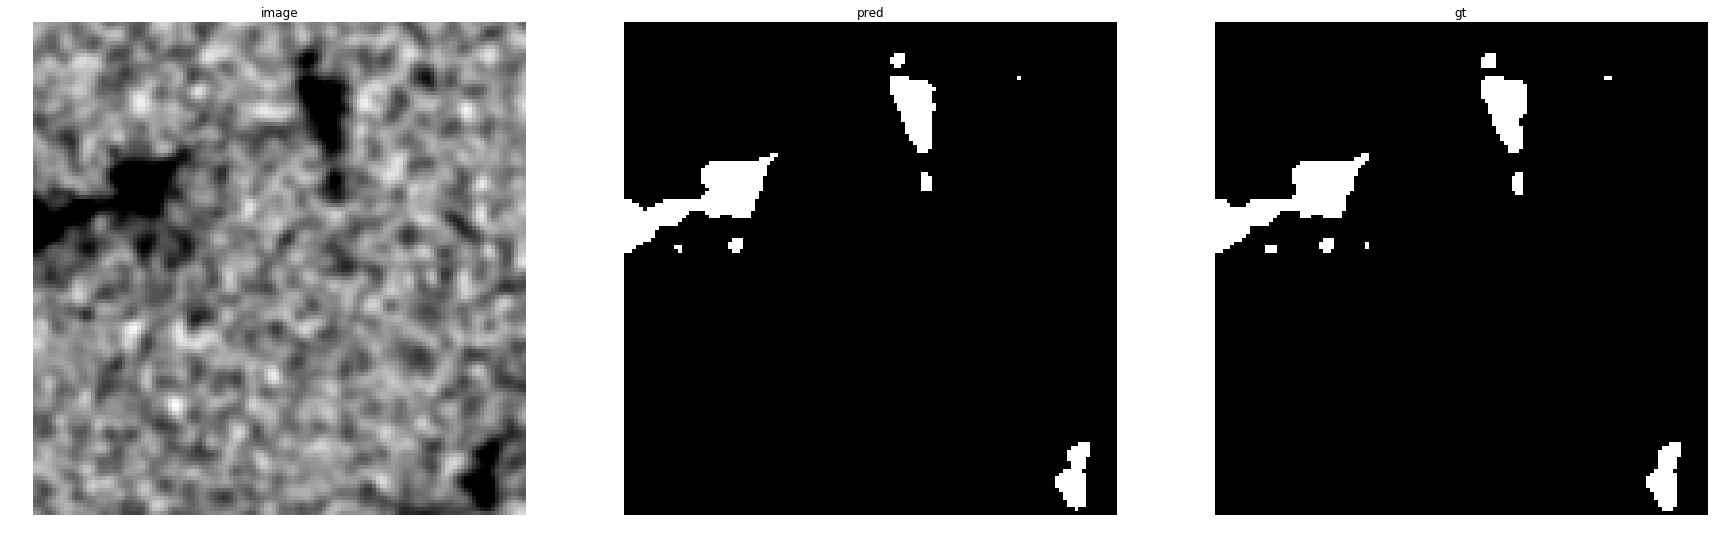

accuracy    : 0.99749755859375
precision   : 0.9896449704142012
recall      : 0.9516358463726885
f1          : 0.9702683103698333
pr_auc      : 0.9987457867643885
iou         : 0.9422535211267605


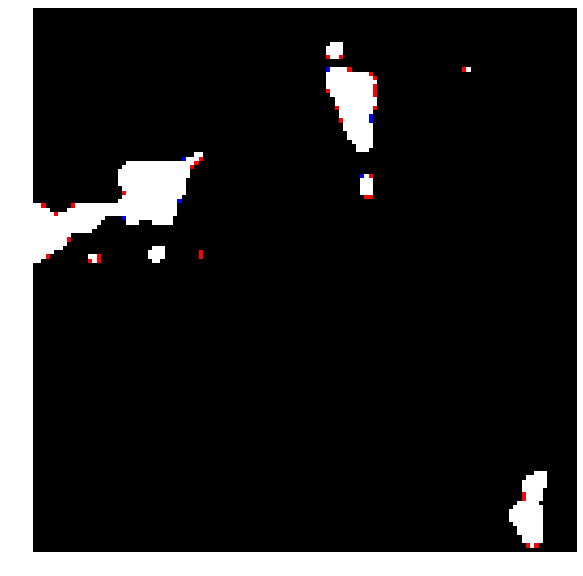

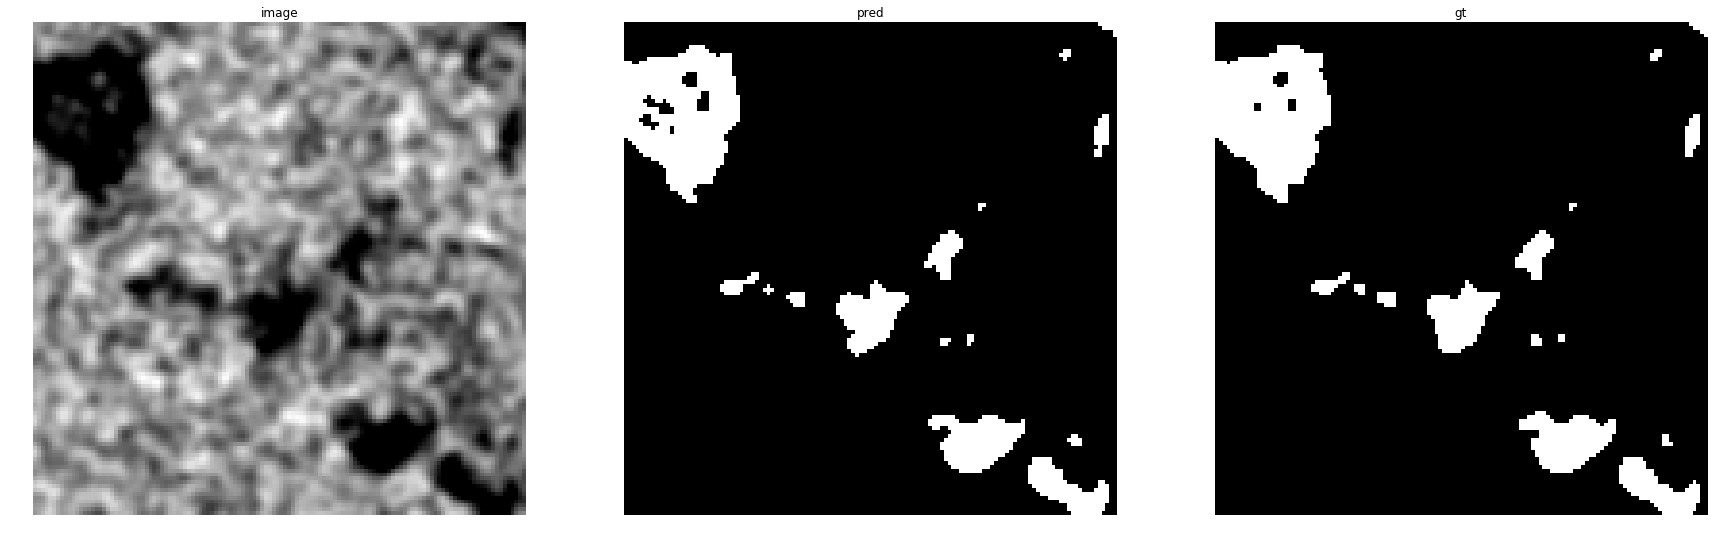

accuracy    : 0.9935302734375
precision   : 0.9875621890547264
recall      : 0.948626045400239
f1          : 0.9677026203534431
pr_auc      : 0.9970910125329668
iou         : 0.9374262101534829


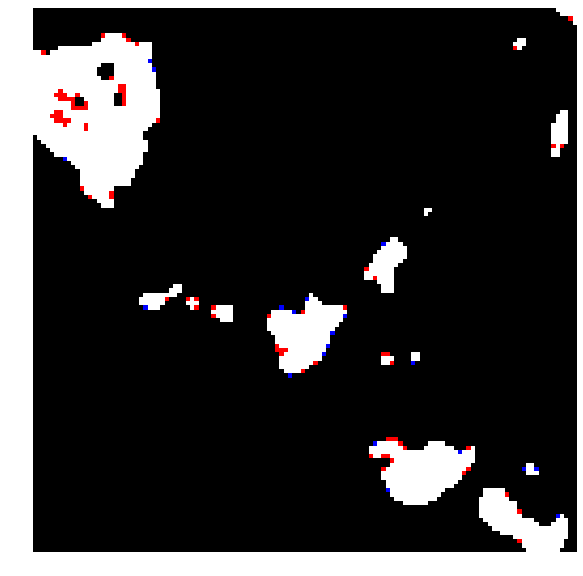

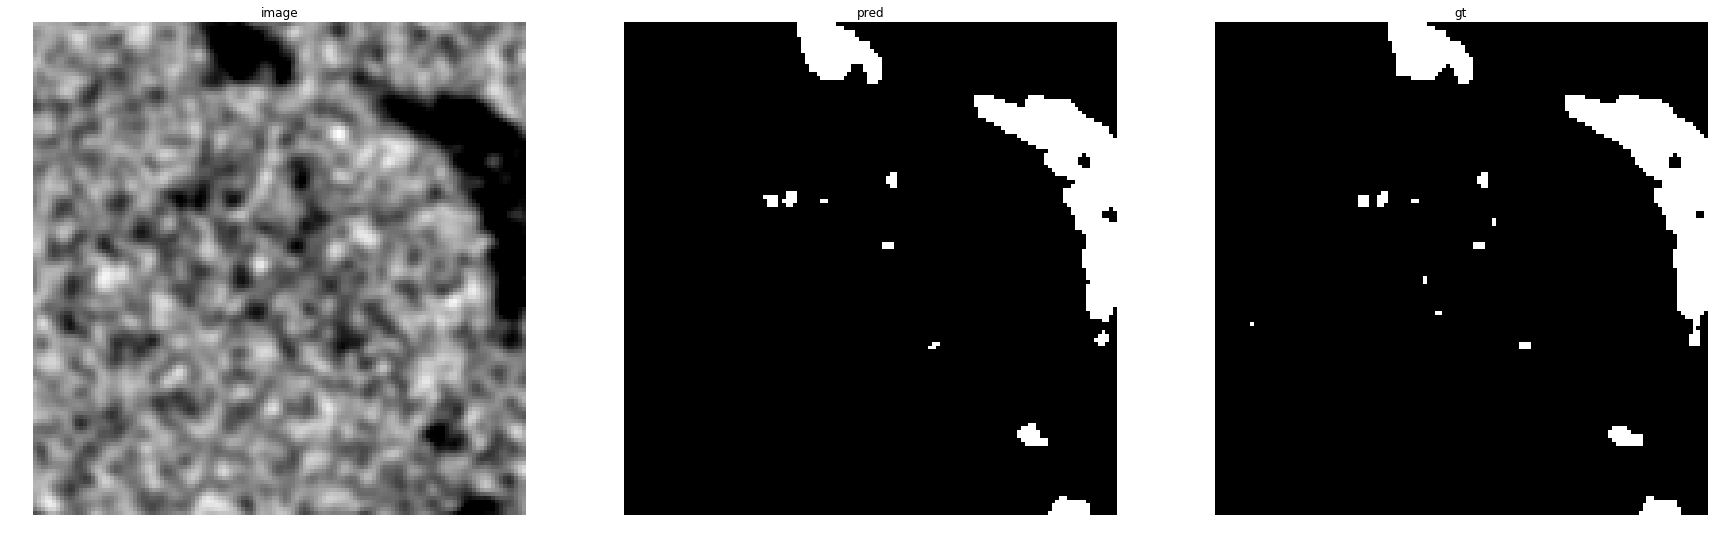

accuracy    : 0.99609375
precision   : 0.9905741216795202
recall      : 0.9561621174524401
f1          : 0.9730639730639732
pr_auc      : 0.9973895409273803
iou         : 0.9475409836065574


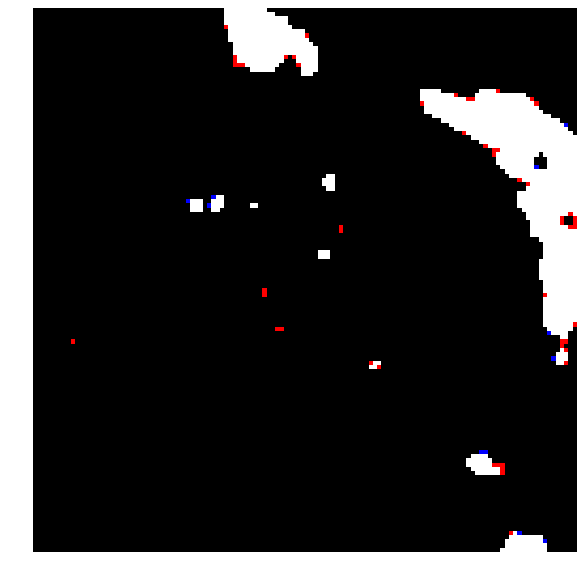

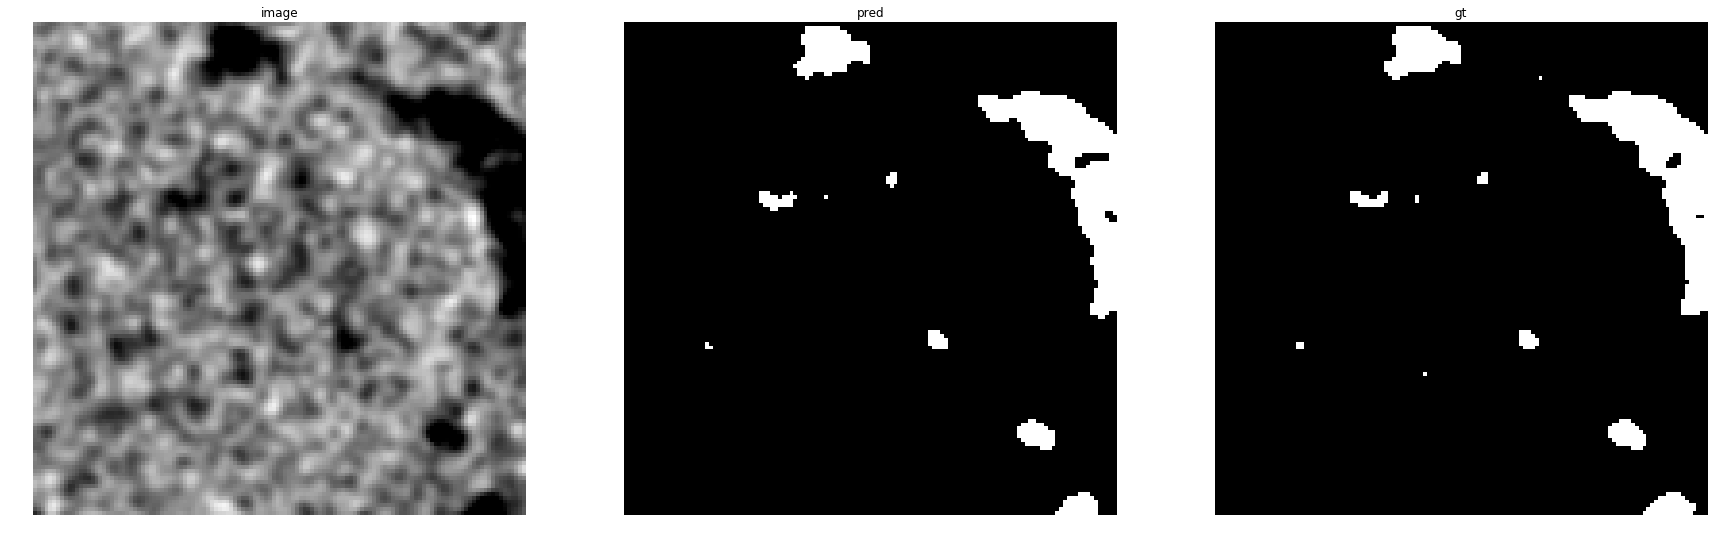

accuracy    : 0.99615478515625
precision   : 0.9850187265917603
recall      : 0.9572338489535942
f1          : 0.9709275496077527
pr_auc      : 0.9970671523570075
iou         : 0.9434977578475336
Prediction fro SoilAh-1:


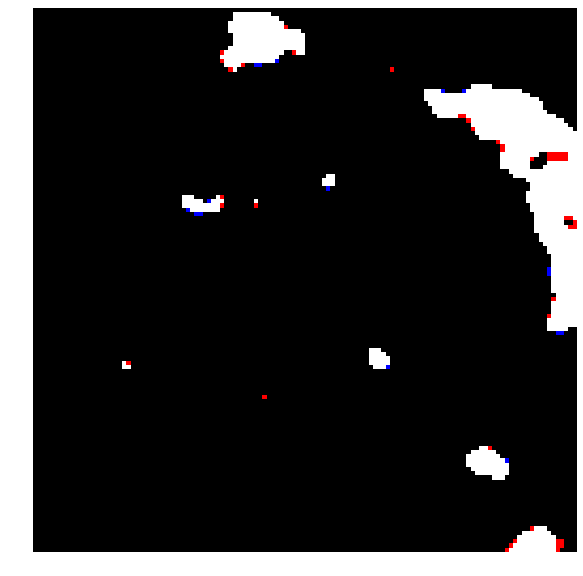

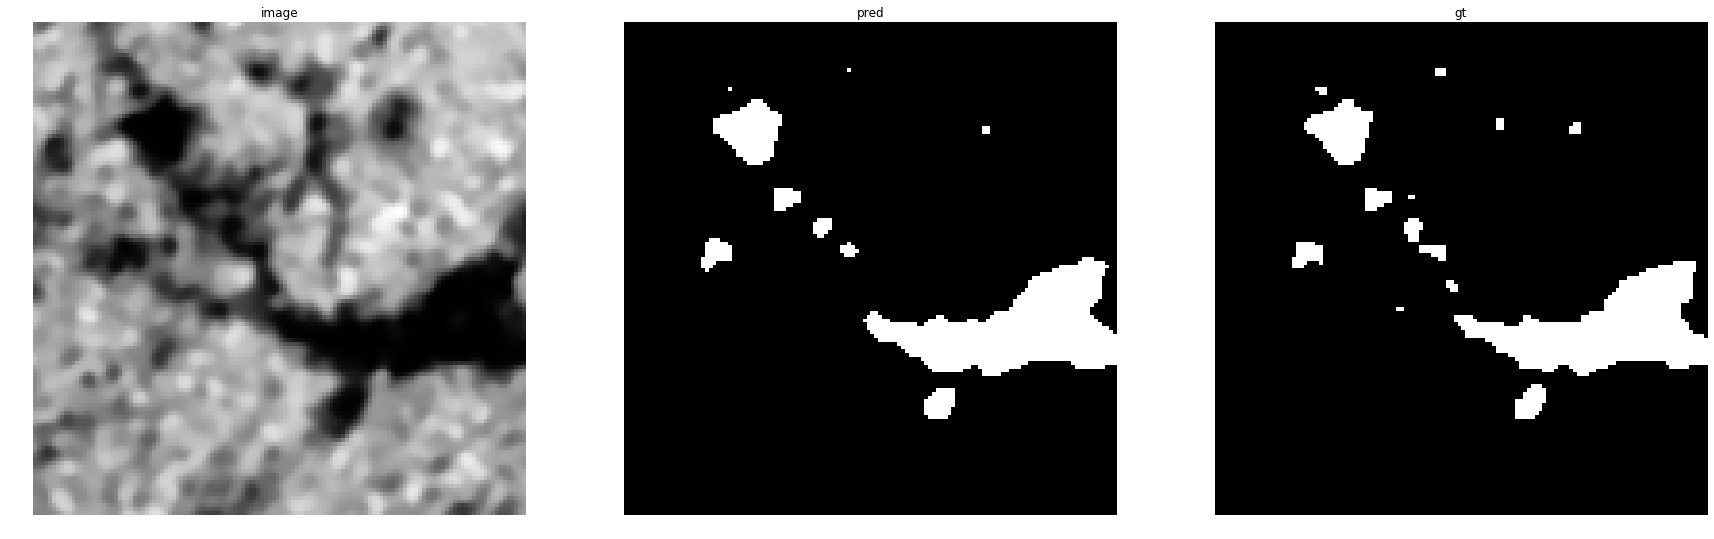

accuracy    : 0.99151611328125
precision   : 0.9363241678726484
recall      : 0.9620817843866171
f1          : 0.949028236156949
pr_auc      : 0.9938028635891484
iou         : 0.9030006978367062


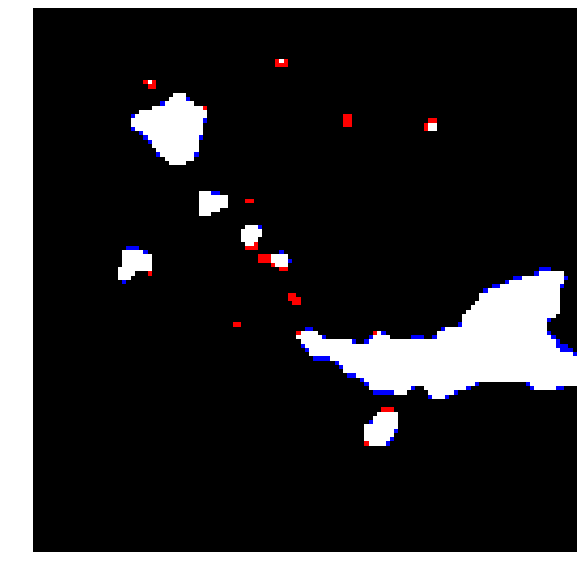

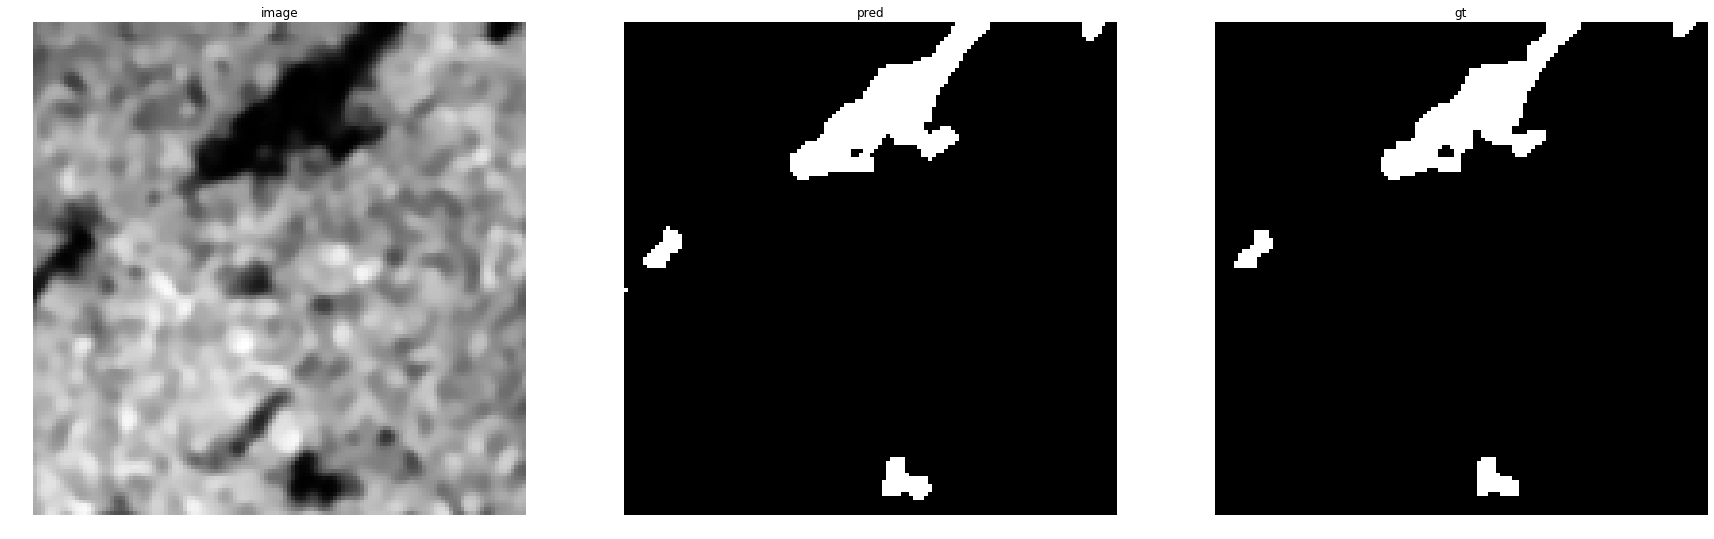

accuracy    : 0.9945068359375
precision   : 0.9105098855359001
recall      : 0.9954493742889647
f1          : 0.9510869565217391
pr_auc      : 0.9976247689480598
iou         : 0.9067357512953368


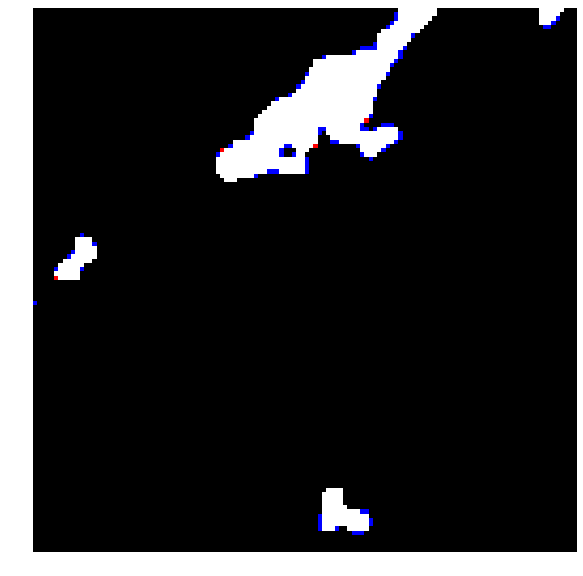

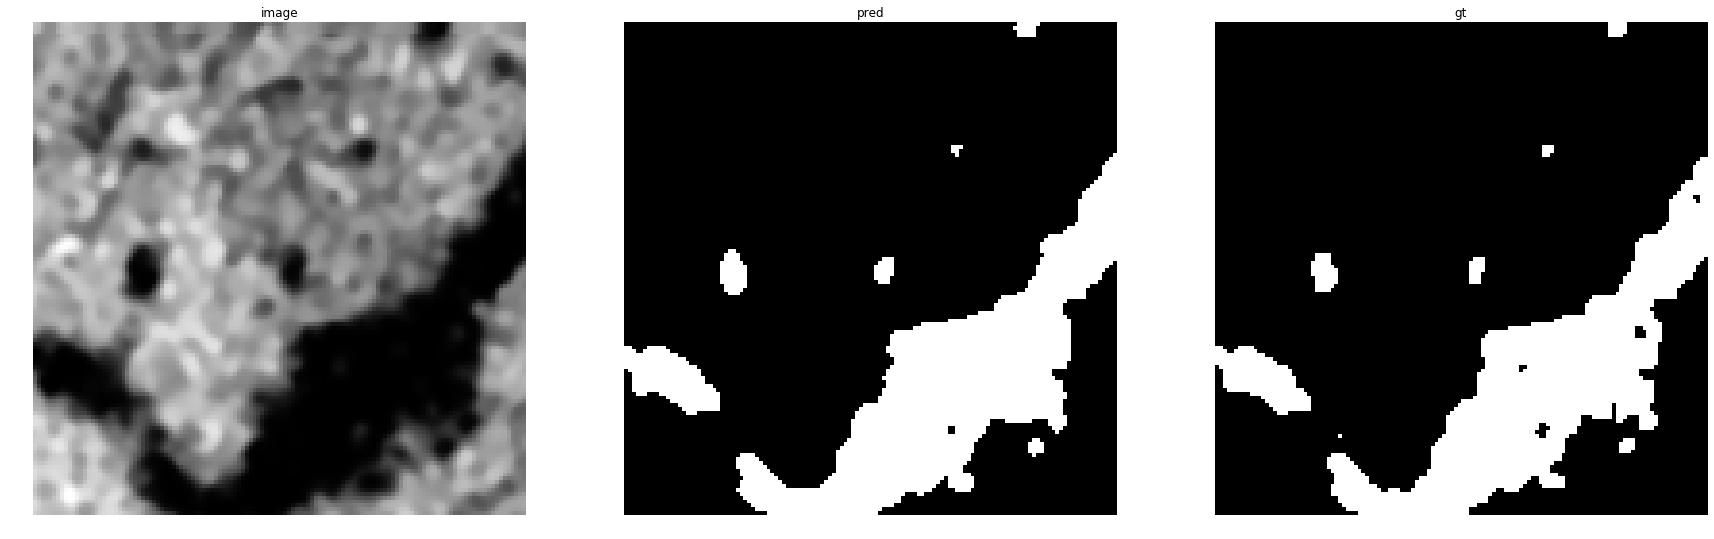

accuracy    : 0.9881591796875
precision   : 0.9415259537210757
recall      : 0.9976805831676607
f1          : 0.9687902187902188
pr_auc      : 0.9989908057880384
iou         : 0.9394695787831513


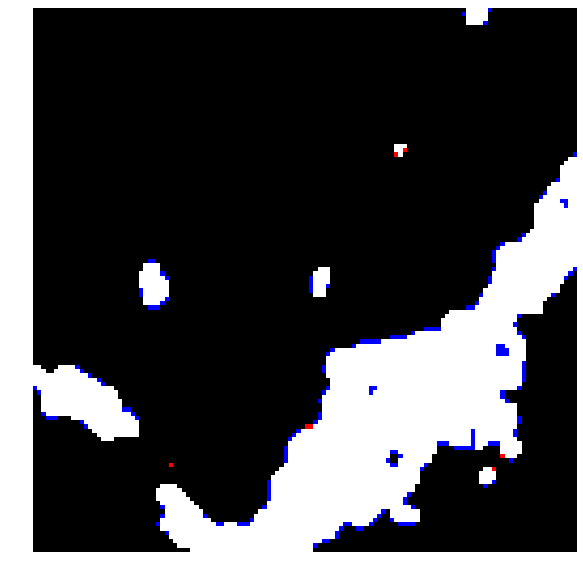

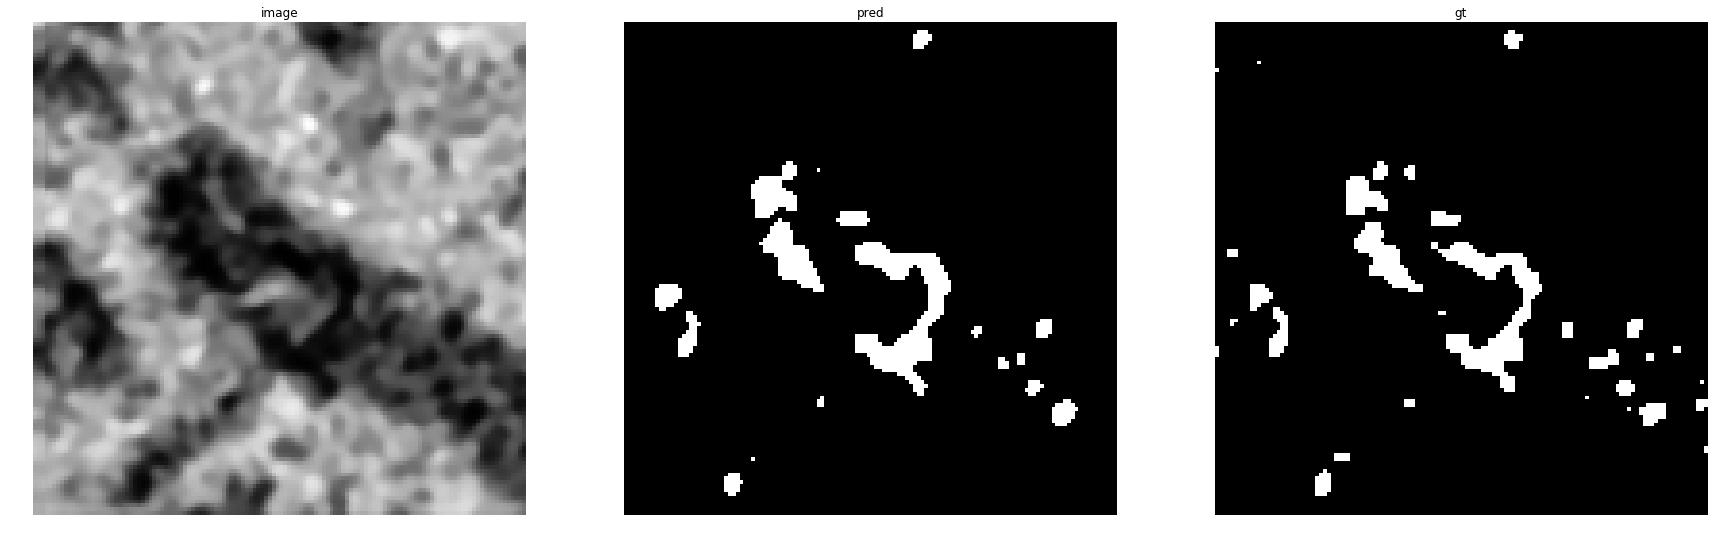

accuracy    : 0.98785400390625
precision   : 0.8878718535469108
recall      : 0.8848346636259977
f1          : 0.8863506567675614
pr_auc      : 0.9626156948343331
iou         : 0.7958974358974359


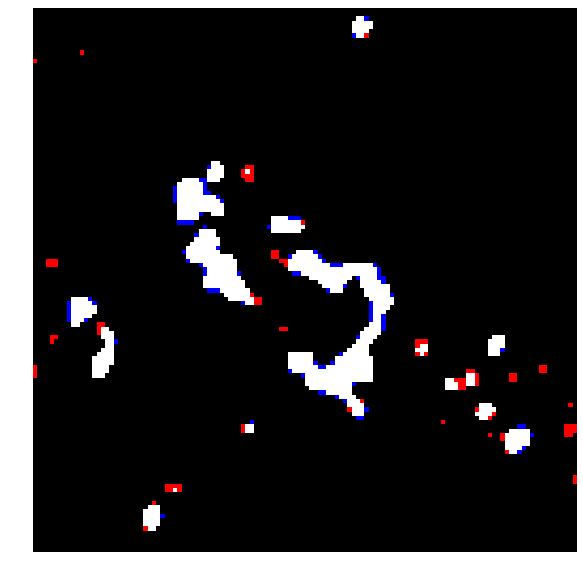

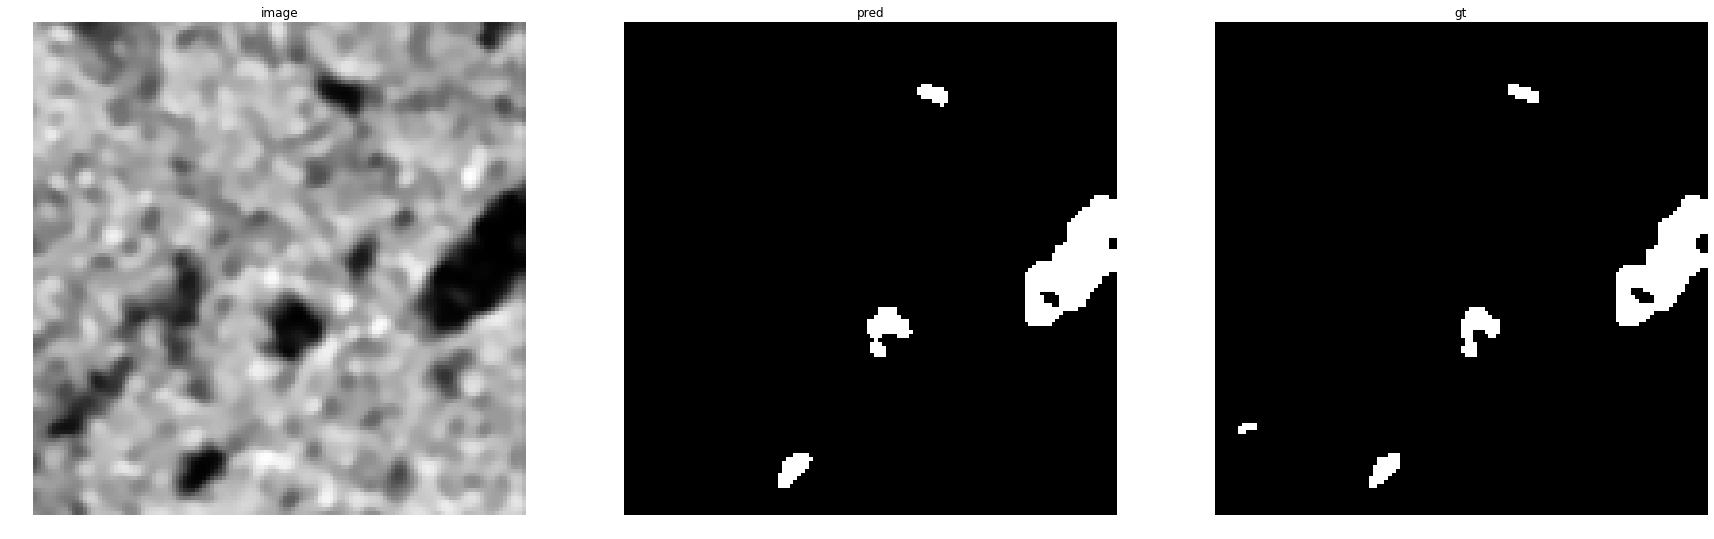

accuracy    : 0.9954833984375
precision   : 0.9104
recall      : 0.969335604770017
f1          : 0.938943894389439
pr_auc      : 0.9907554169004562
iou         : 0.8849144634525661


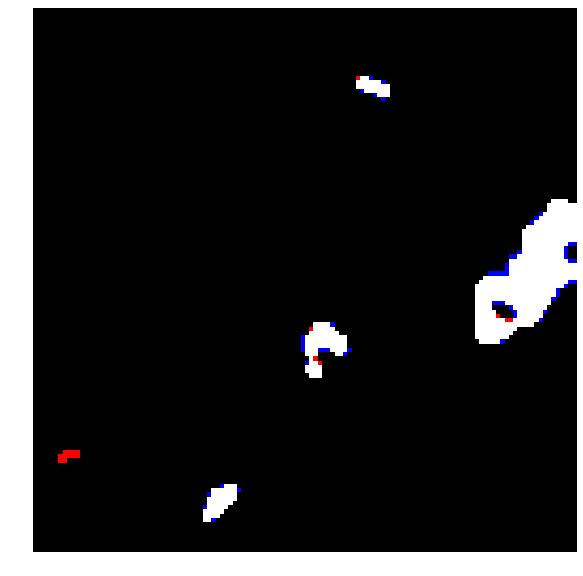

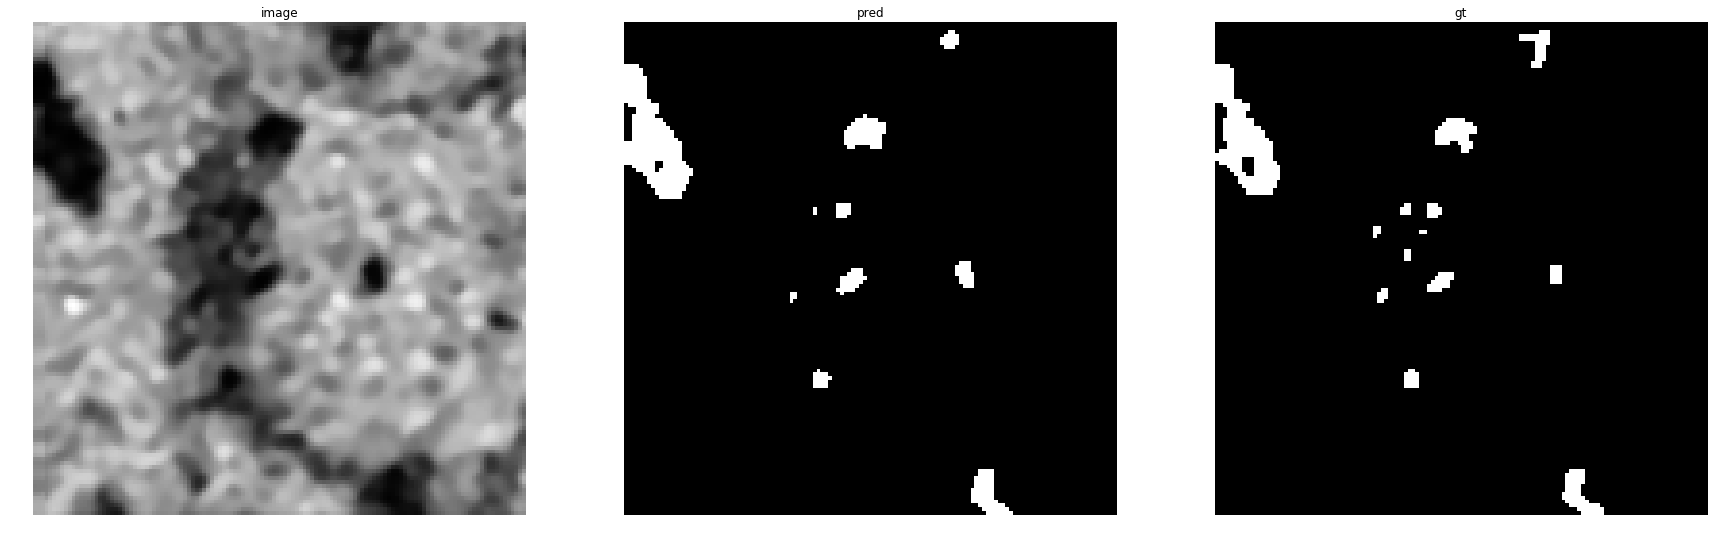

accuracy    : 0.991943359375
precision   : 0.8662092624356775
recall      : 0.9033989266547406
f1          : 0.8844133099824869
pr_auc      : 0.9684000589376692
iou         : 0.792778649921507


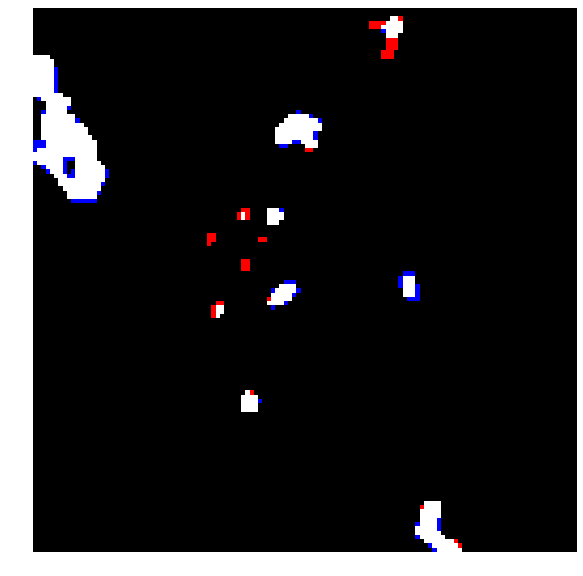

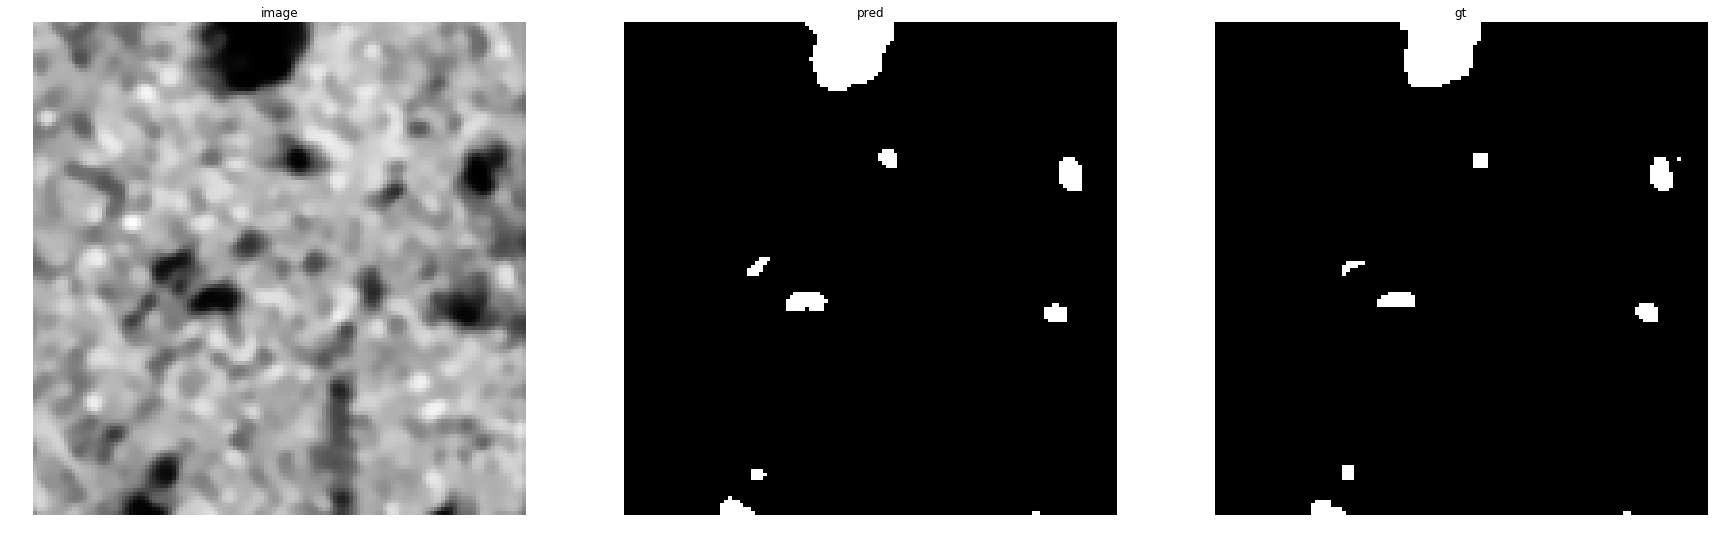

accuracy    : 0.99615478515625
precision   : 0.8950495049504951
recall      : 0.9783549783549783
f1          : 0.9348500517063082
pr_auc      : 0.9929132489155948
iou         : 0.8776699029126214


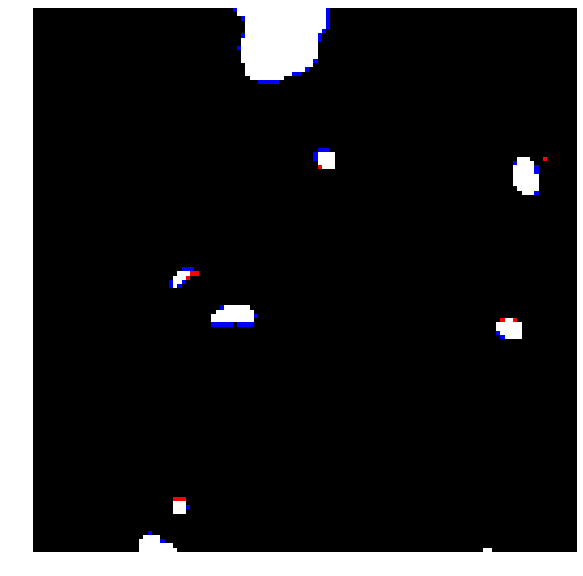

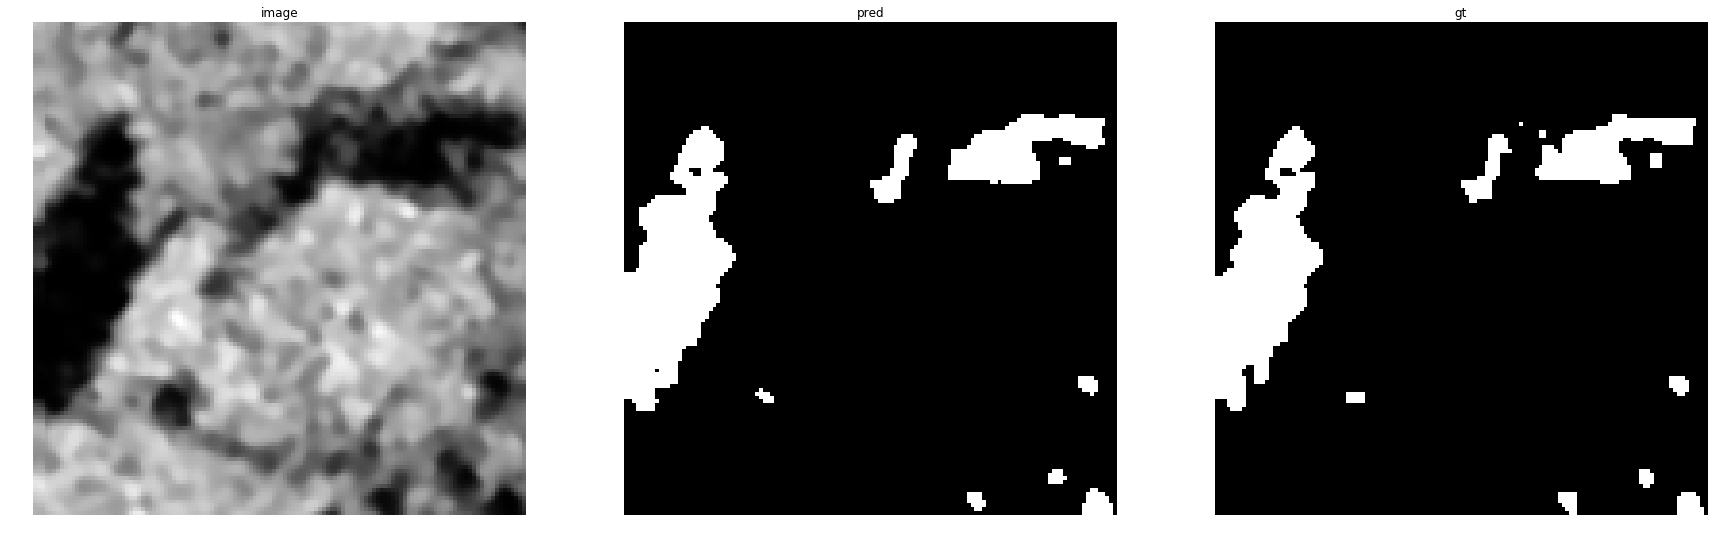

accuracy    : 0.98931884765625
precision   : 0.9219934994582882
recall      : 0.9821119446047317
f1          : 0.9511036602402906
pr_auc      : 0.9950003883839157
iou         : 0.906766116142781


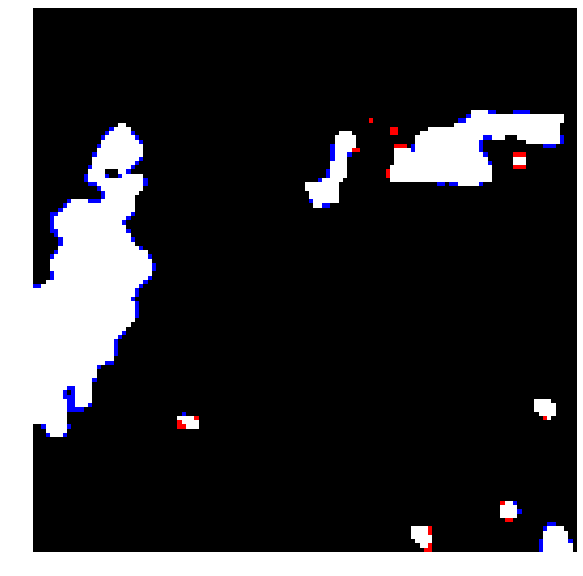

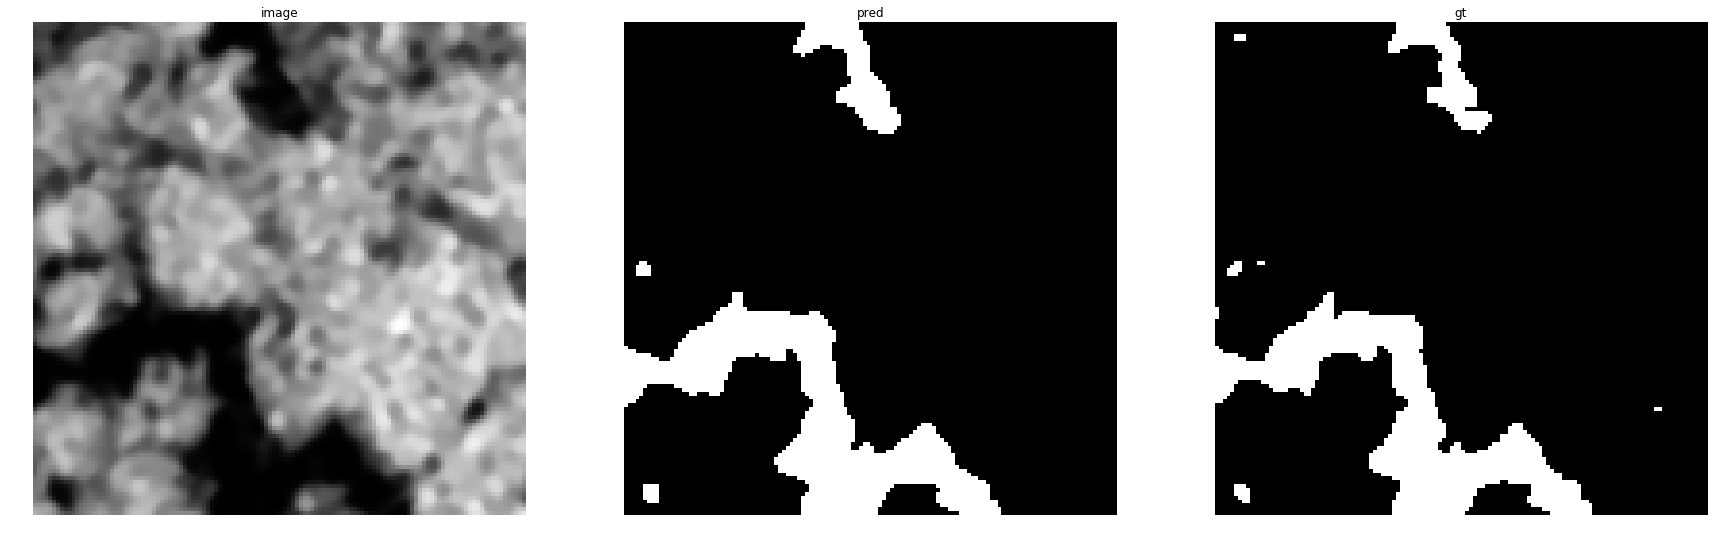

accuracy    : 0.9898681640625
precision   : 0.9280575539568345
recall      : 0.9917990773962071
f1          : 0.9588701684836471
pr_auc      : 0.9978941091325012
iou         : 0.9209900047596382


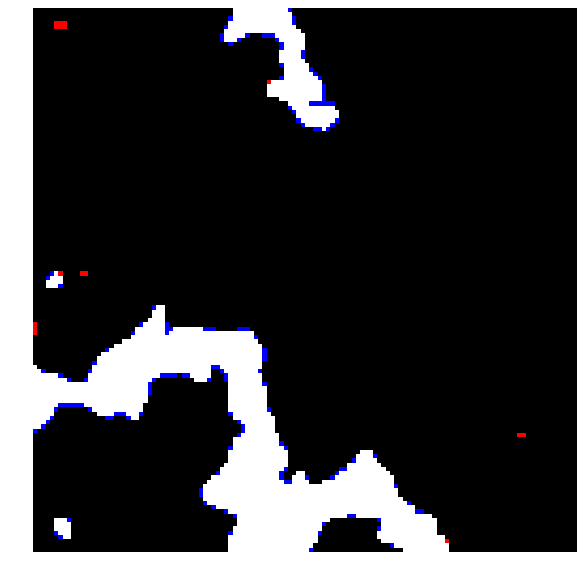

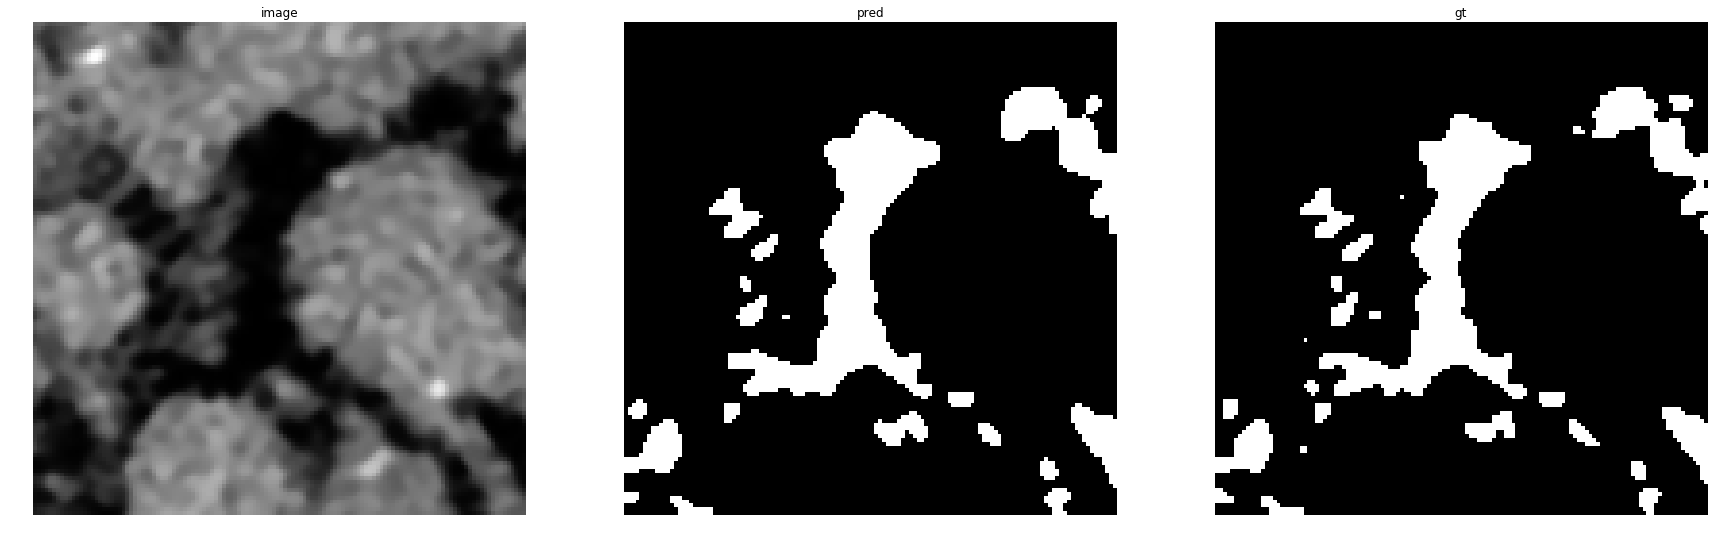

accuracy    : 0.9833984375
precision   : 0.915281718686664
recall      : 0.972856527358897
f1          : 0.9431913116123642
pr_auc      : 0.9925914477605069
iou         : 0.892490118577075
Prediction fro SoilB-2:


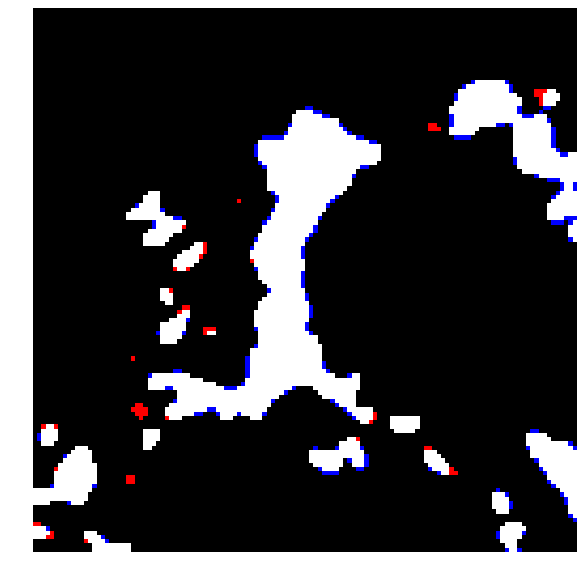

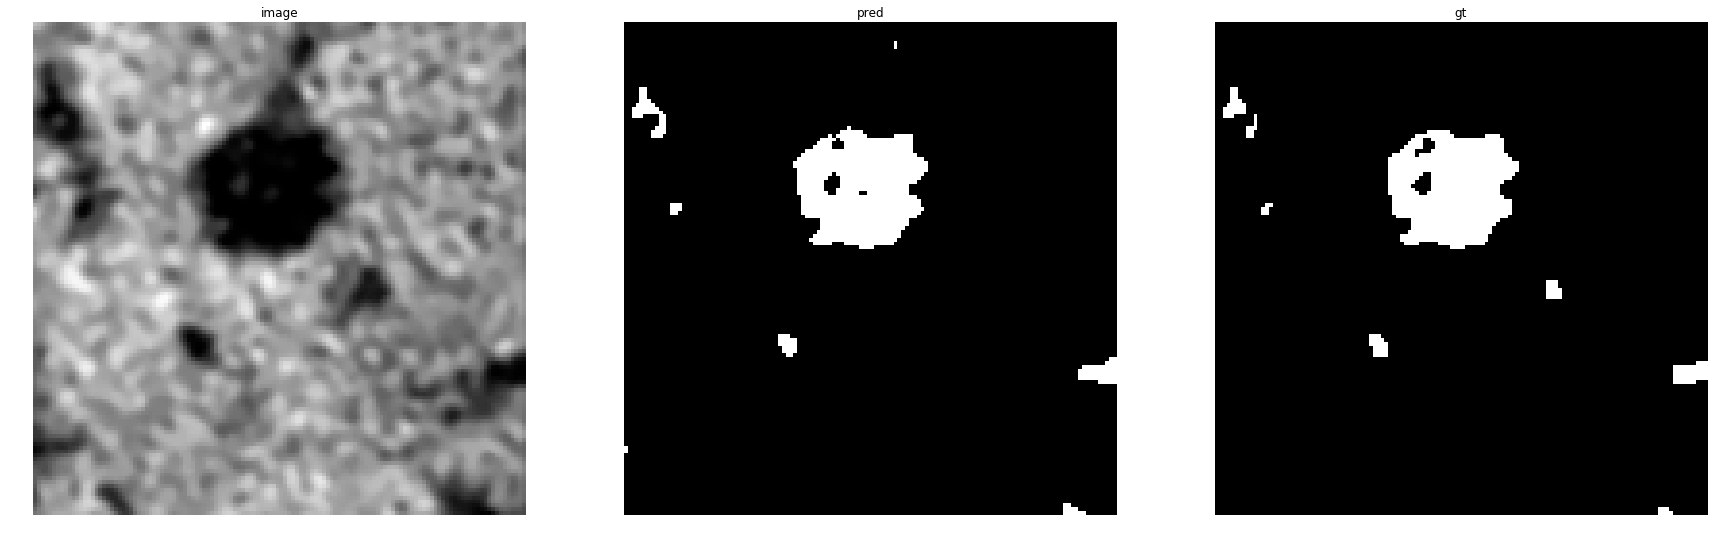

accuracy    : 0.994873046875
precision   : 0.9421841541755889
recall      : 0.967032967032967
f1          : 0.9544468546637743
pr_auc      : 0.9926449235191097
iou         : 0.9128630705394191


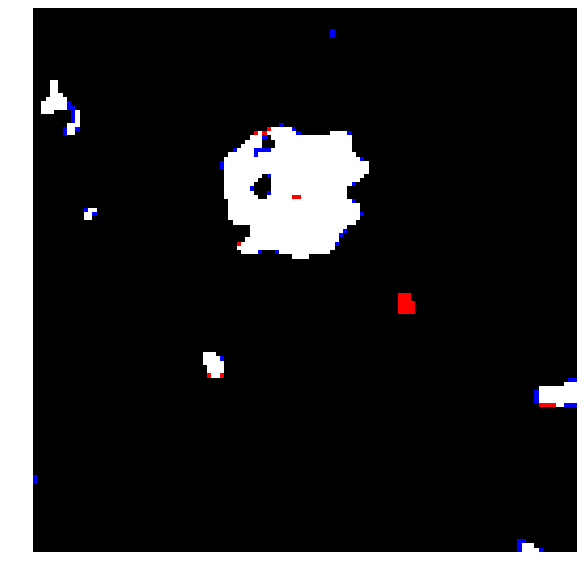

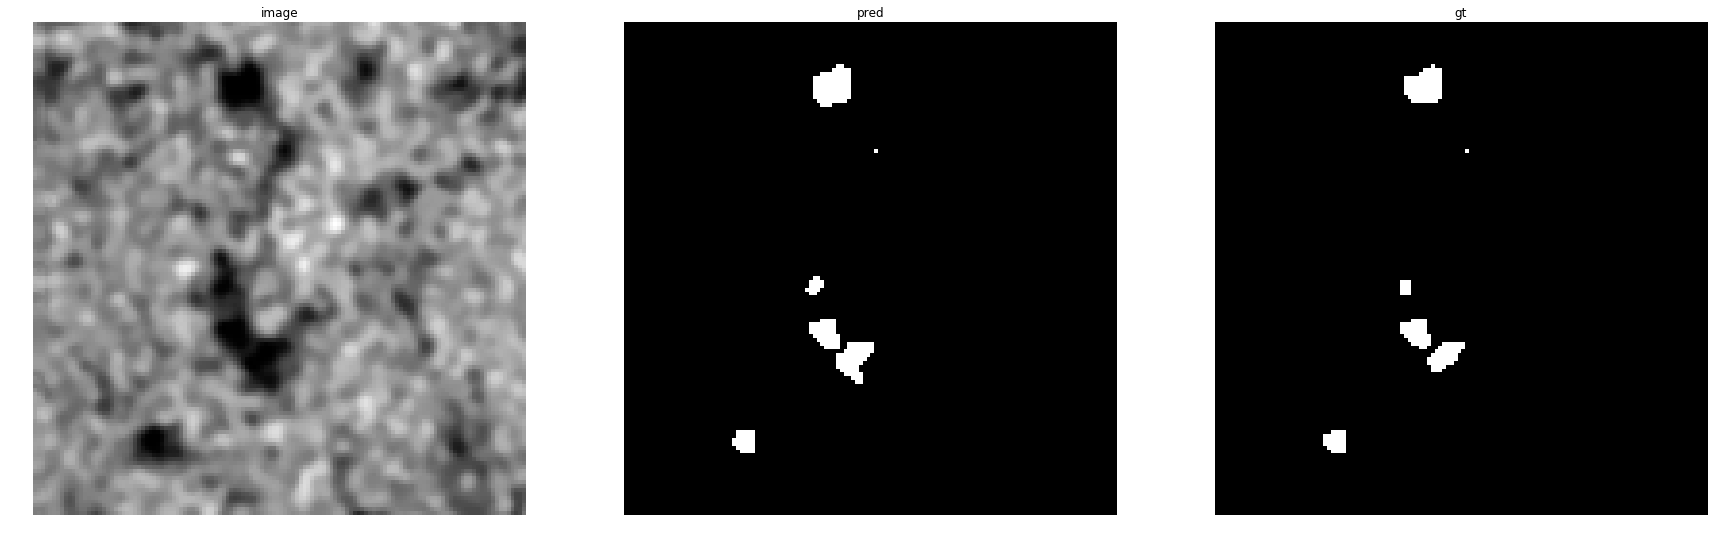

accuracy    : 0.997802734375
precision   : 0.8629032258064516
recall      : 0.9907407407407407
f1          : 0.9224137931034482
pr_auc      : 0.9922483706979857
iou         : 0.856


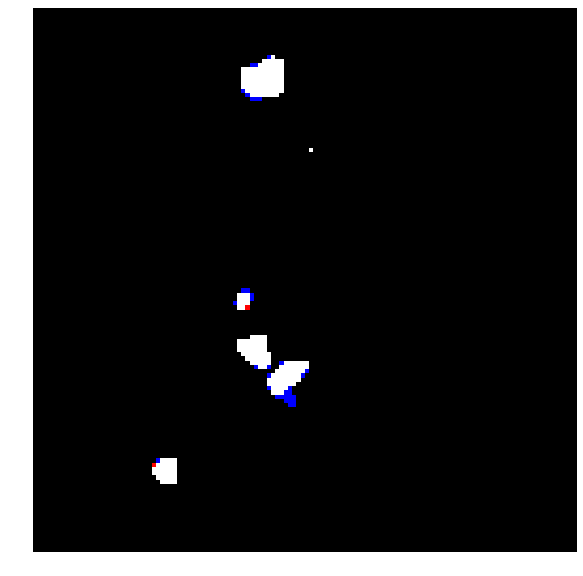

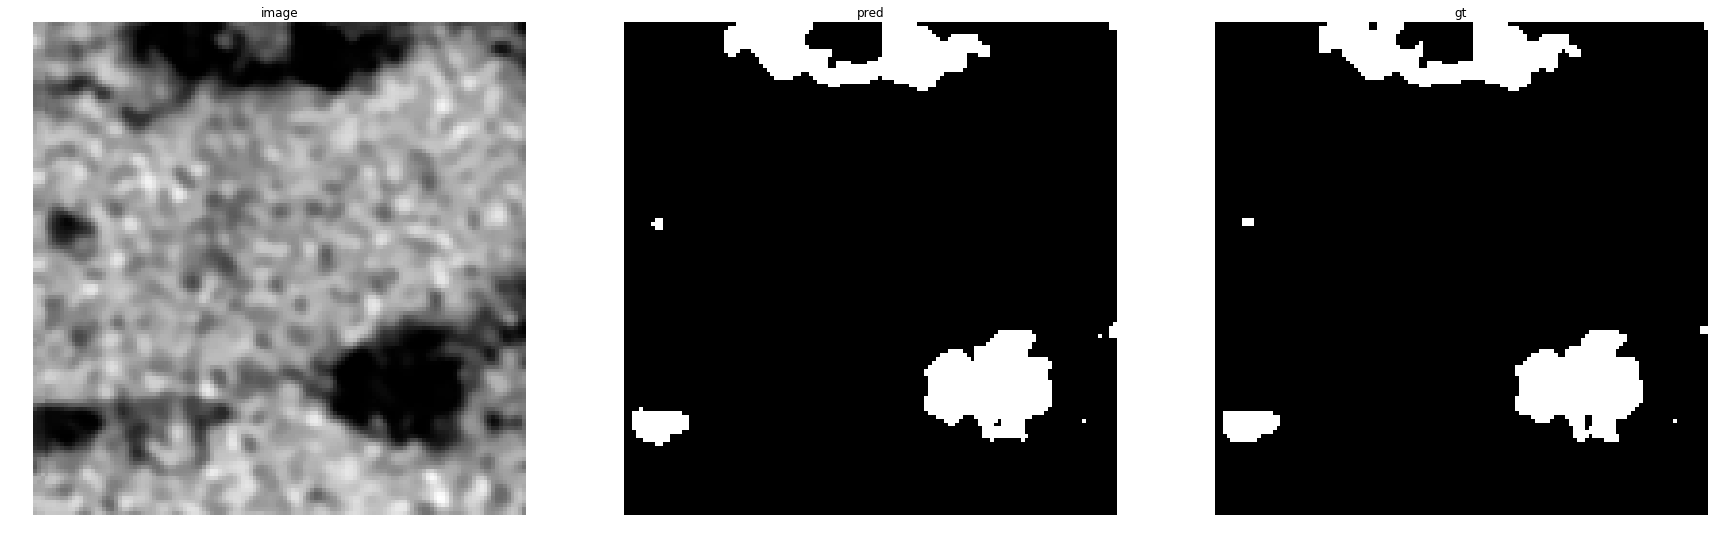

accuracy    : 0.9957275390625
precision   : 0.9639945652173914
recall      : 0.9881615598885793
f1          : 0.9759284731774416
pr_auc      : 0.9983923745812064
iou         : 0.9529885829415715


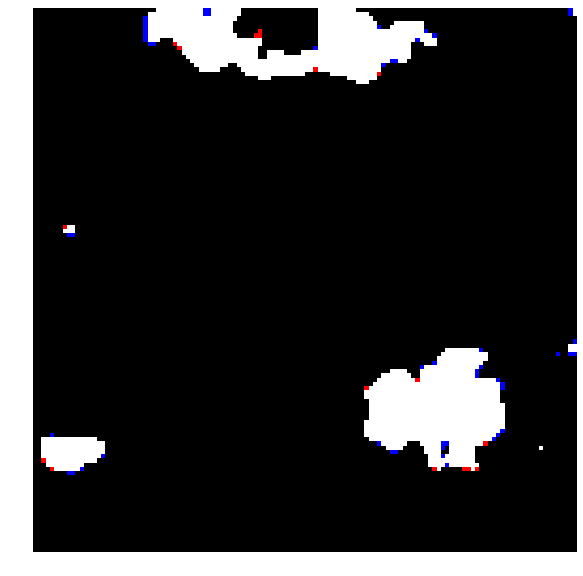

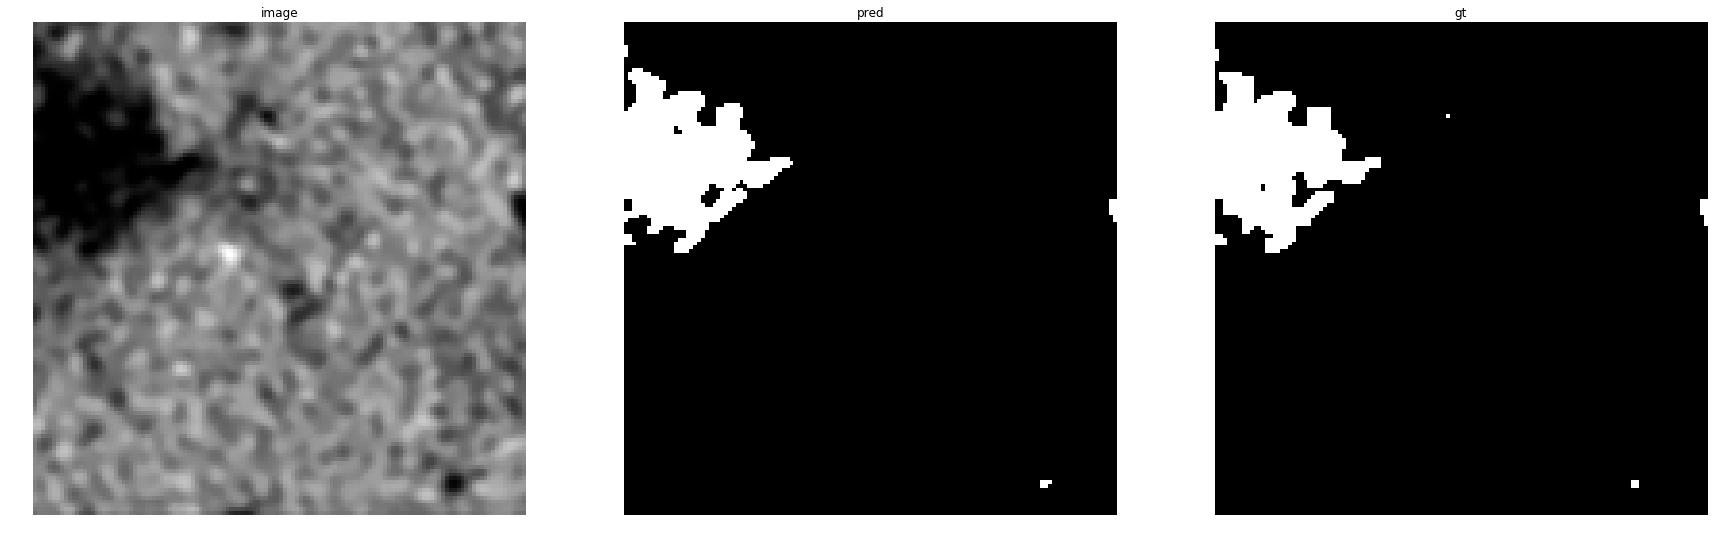

accuracy    : 0.9949951171875
precision   : 0.9467140319715808
recall      : 0.9797794117647058
f1          : 0.9629629629629629
pr_auc      : 0.997199236044488
iou         : 0.9285714285714286


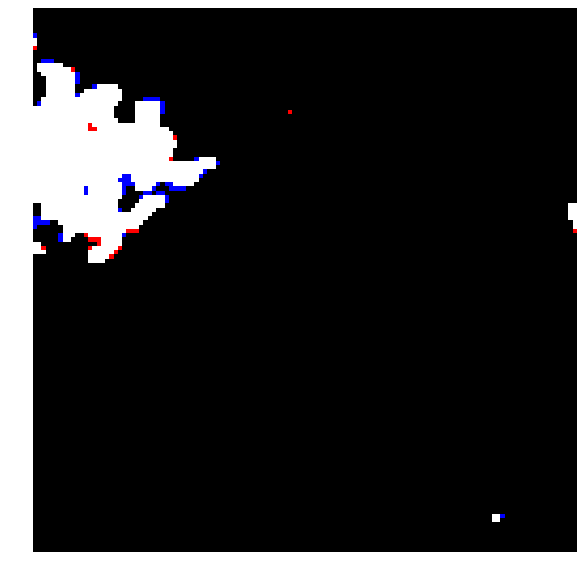

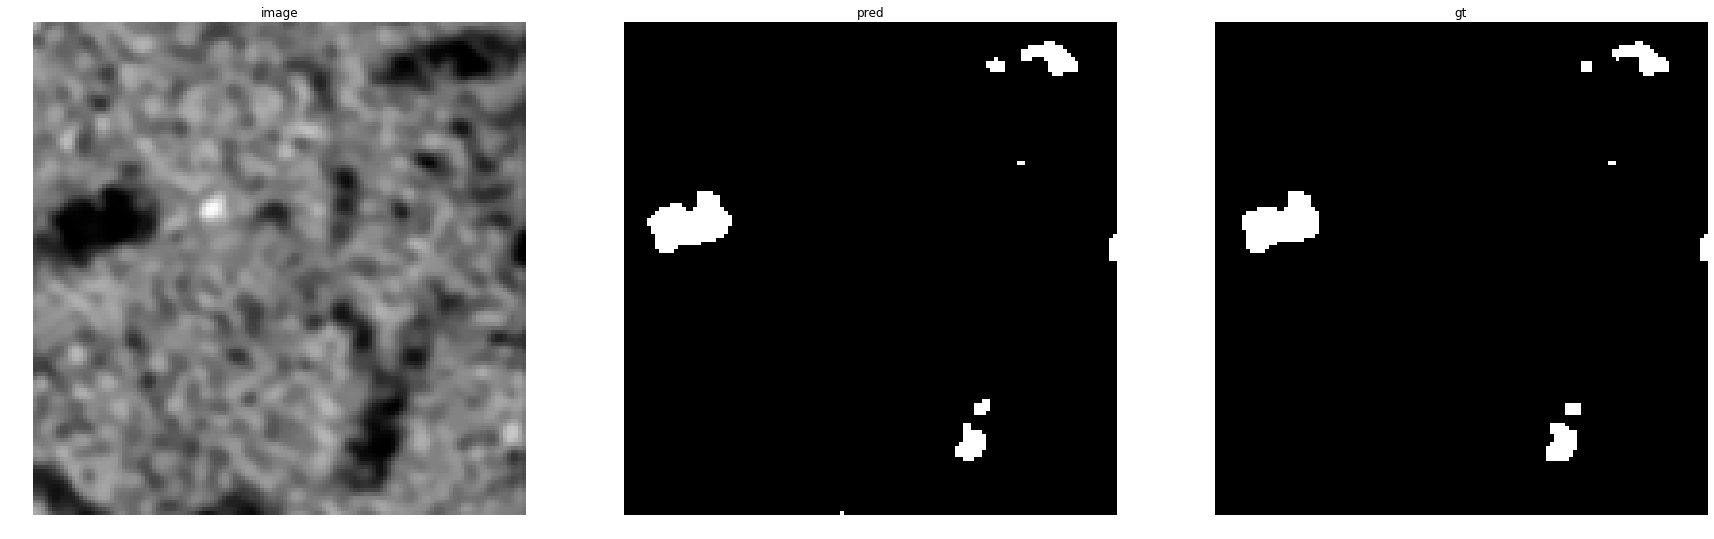

accuracy    : 0.99737548828125
precision   : 0.9183673469387755
recall      : 0.9703504043126685
f1          : 0.943643512450852
pr_auc      : 0.9927643468118178
iou         : 0.8933002481389578


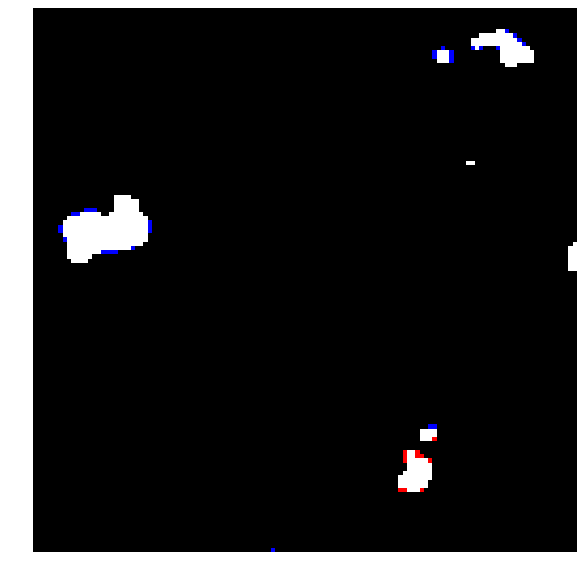

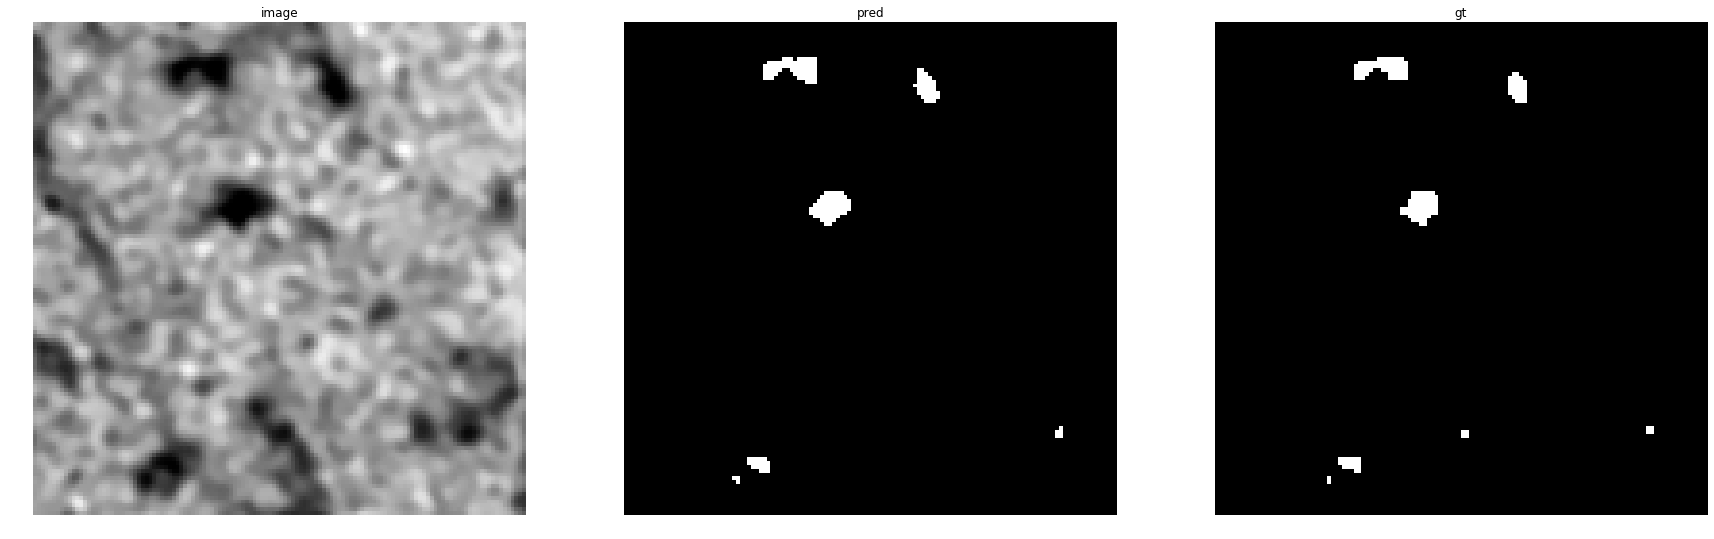

accuracy    : 0.99810791015625
precision   : 0.8894472361809045
recall      : 0.9516129032258065
f1          : 0.9194805194805195
pr_auc      : 0.9858526970753838
iou         : 0.8509615384615384


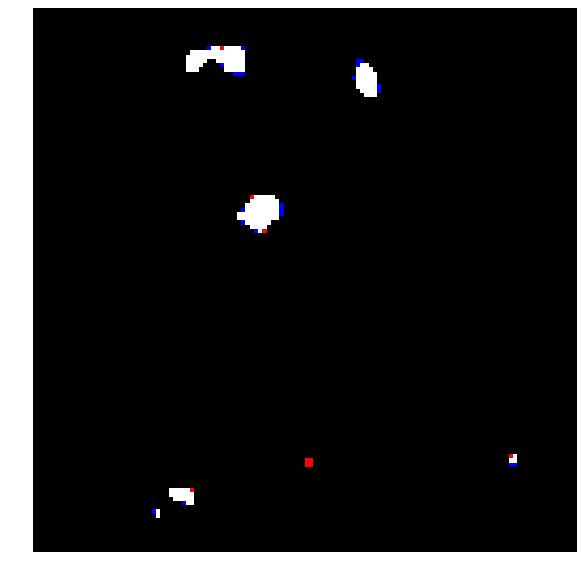

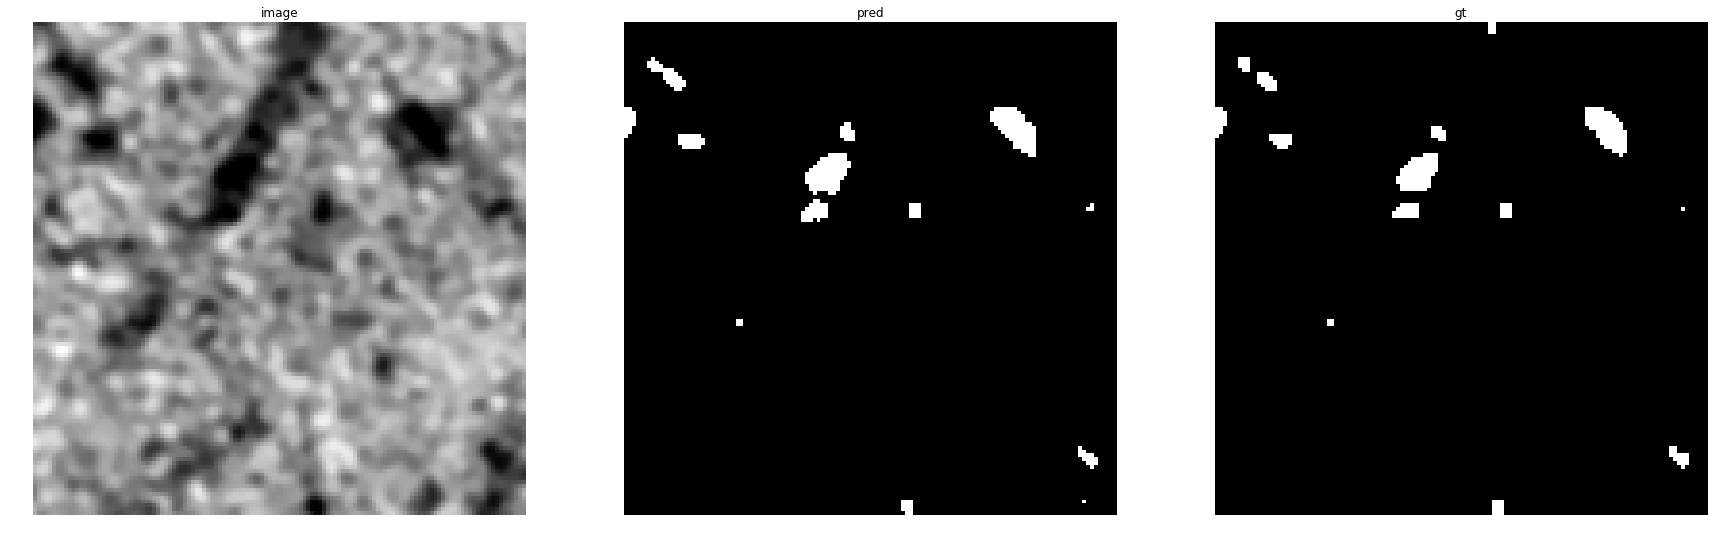

accuracy    : 0.99664306640625
precision   : 0.8845070422535212
recall      : 0.9573170731707317
f1          : 0.9194729136163983
pr_auc      : 0.9847857239205786
iou         : 0.8509485094850948


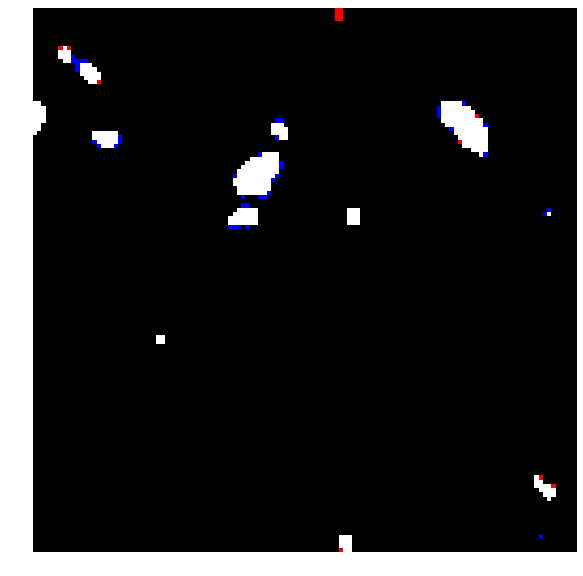

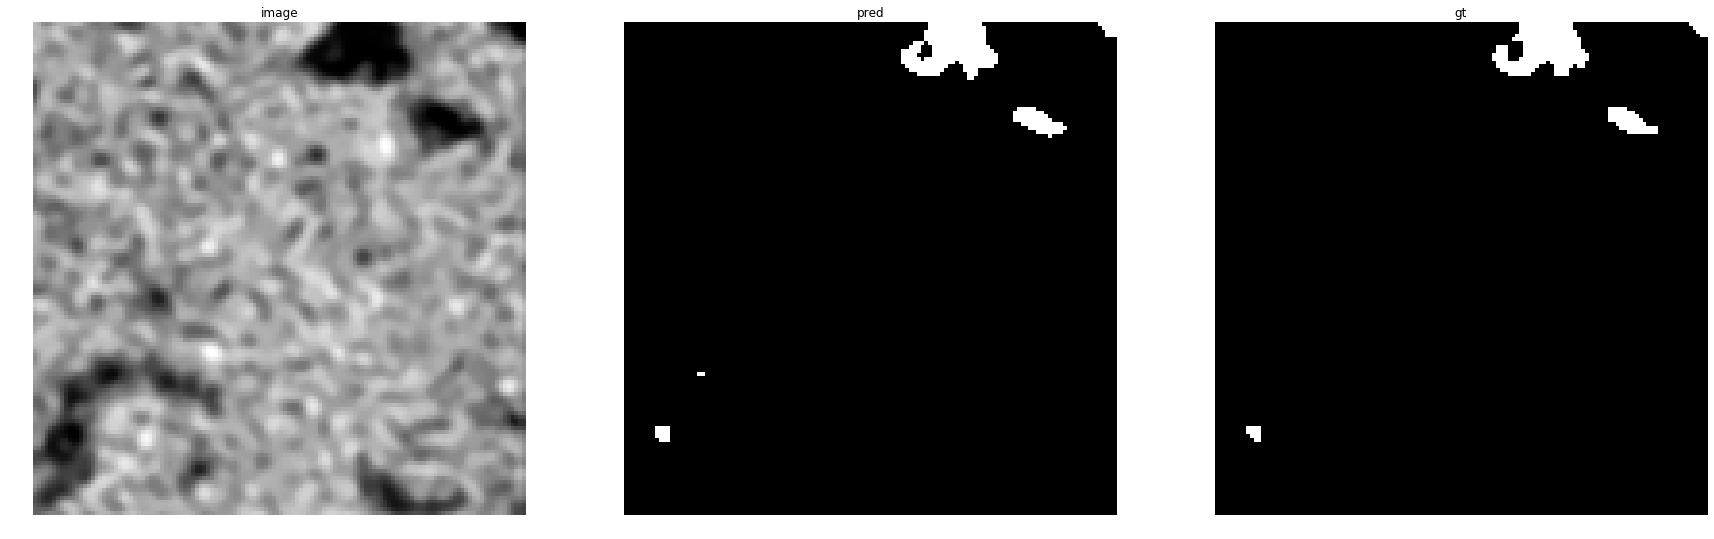

accuracy    : 0.9979248046875
precision   : 0.9174041297935103
recall      : 0.9810725552050473
f1          : 0.9481707317073171
pr_auc      : 0.9949063904846097
iou         : 0.9014492753623189


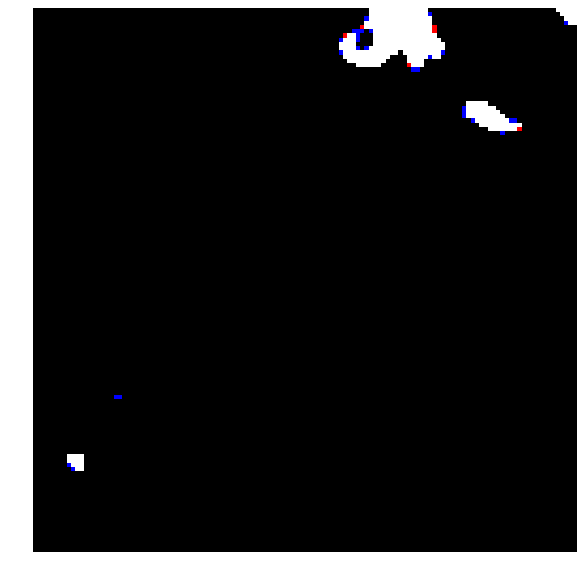

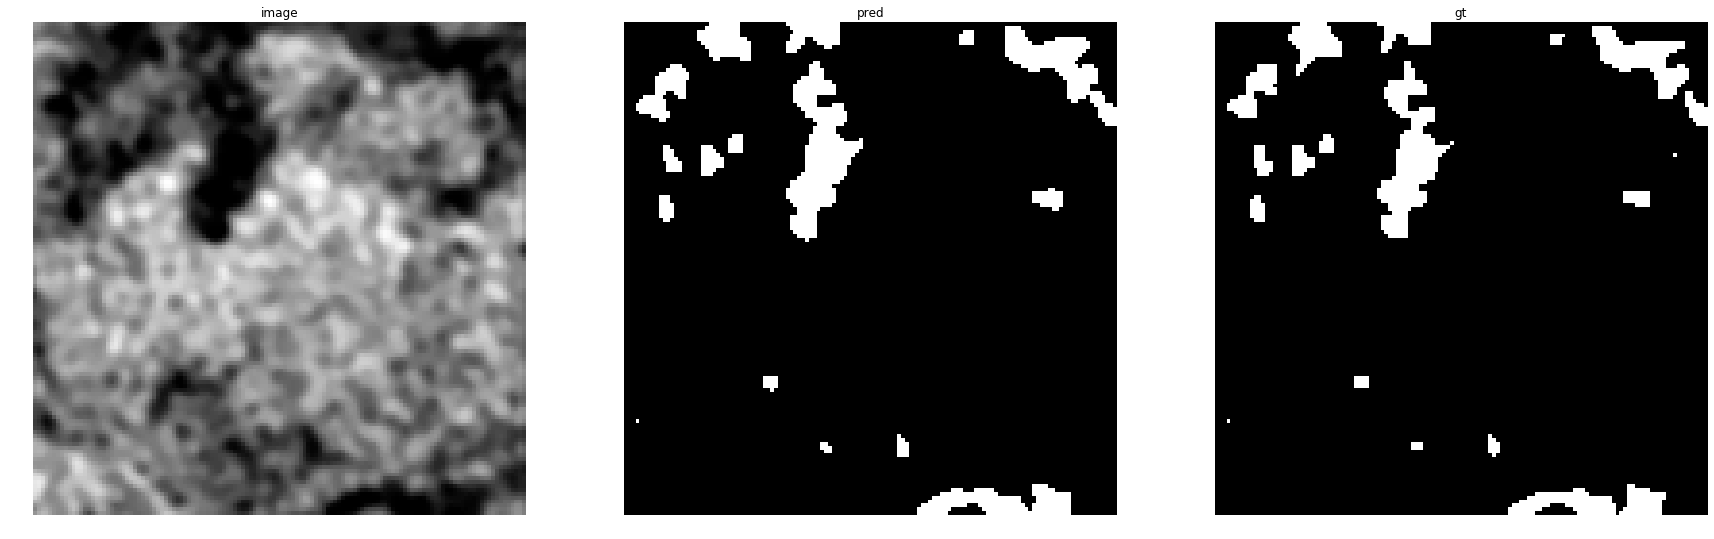

accuracy    : 0.989013671875
precision   : 0.8931967812728603
recall      : 0.9729083665338646
f1          : 0.931350114416476
pr_auc      : 0.9897543387618011
iou         : 0.8715203426124197


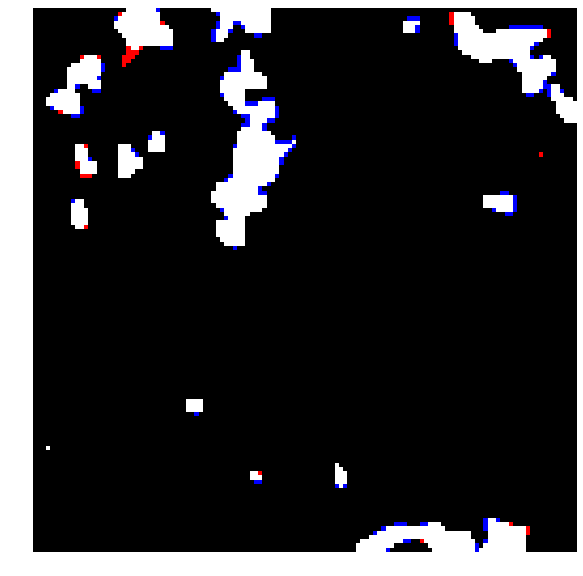

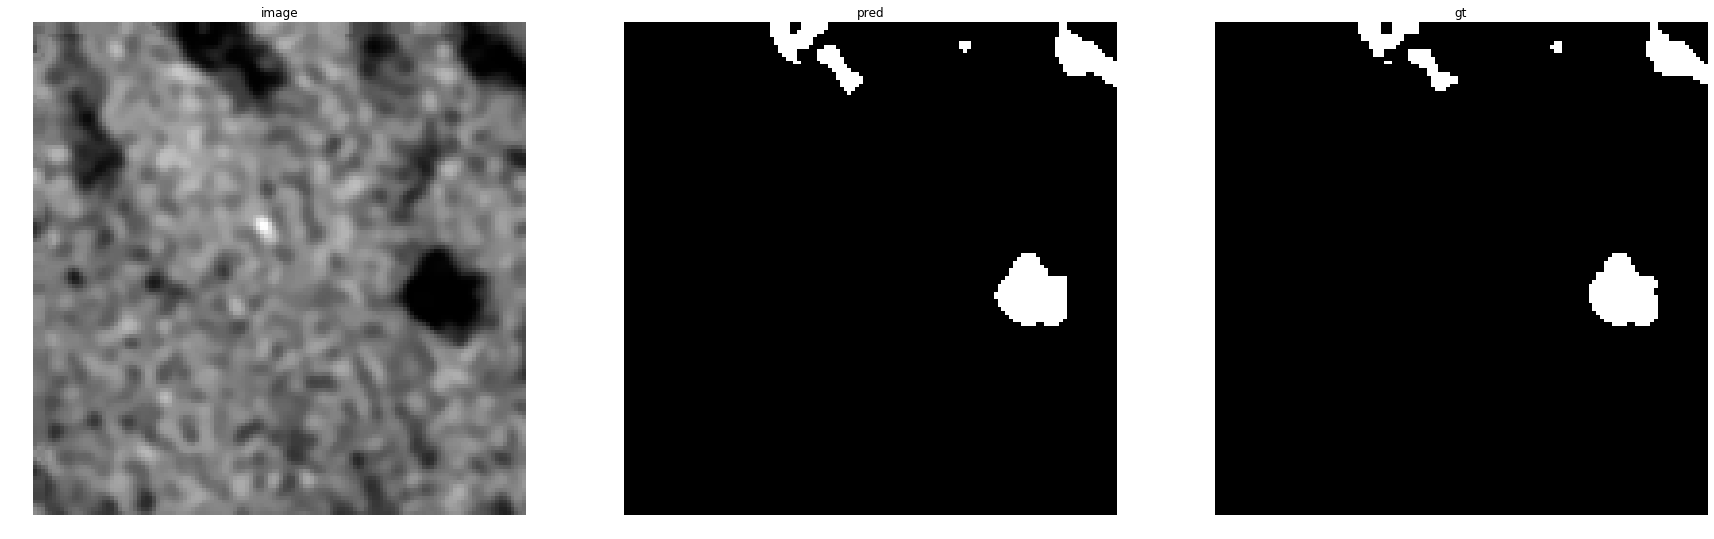

accuracy    : 0.9971923828125
precision   : 0.9376114081996435
recall      : 0.9795158286778398
f1          : 0.9581056466302369
pr_auc      : 0.9963207671925288
iou         : 0.9195804195804196
Prediction fro TeTree_subset1:


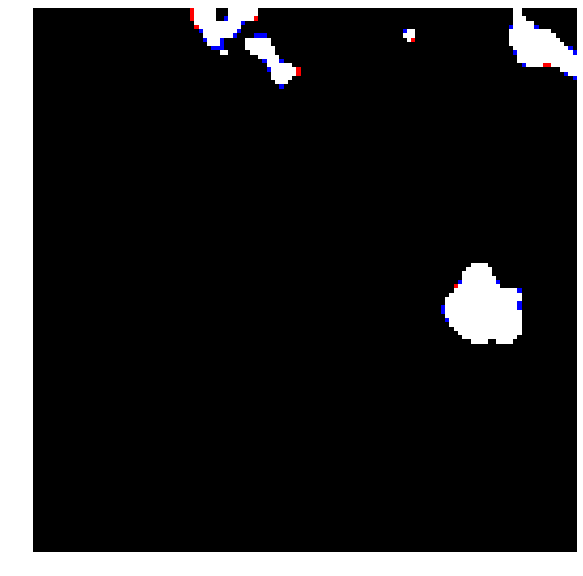

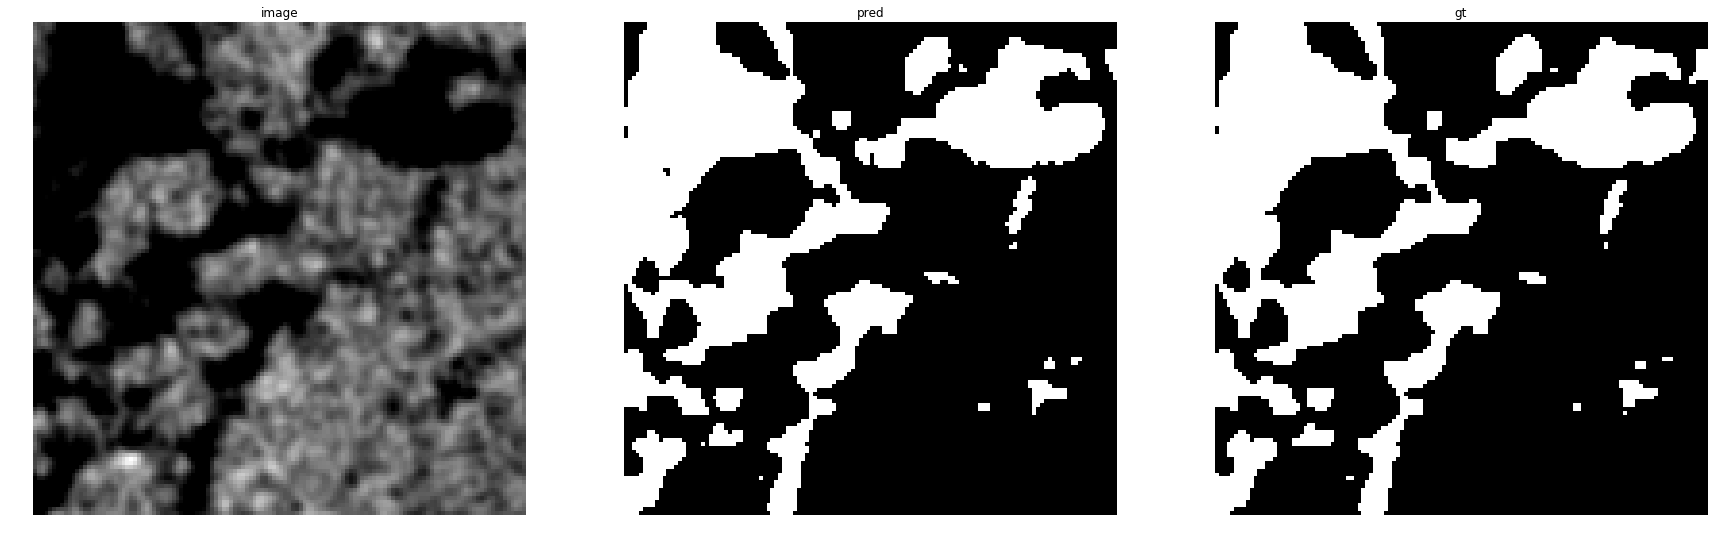

accuracy    : 0.9896240234375
precision   : 0.9868852459016394
recall      : 0.9804560260586319
f1          : 0.9836601307189543
pr_auc      : 0.9990452225340194
iou         : 0.9678456591639871


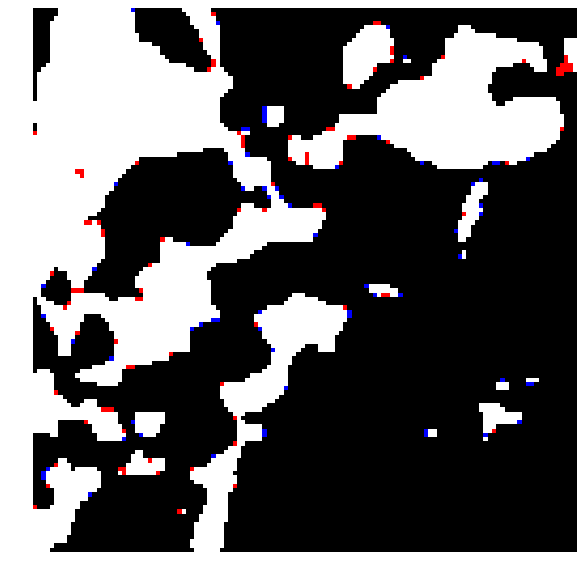

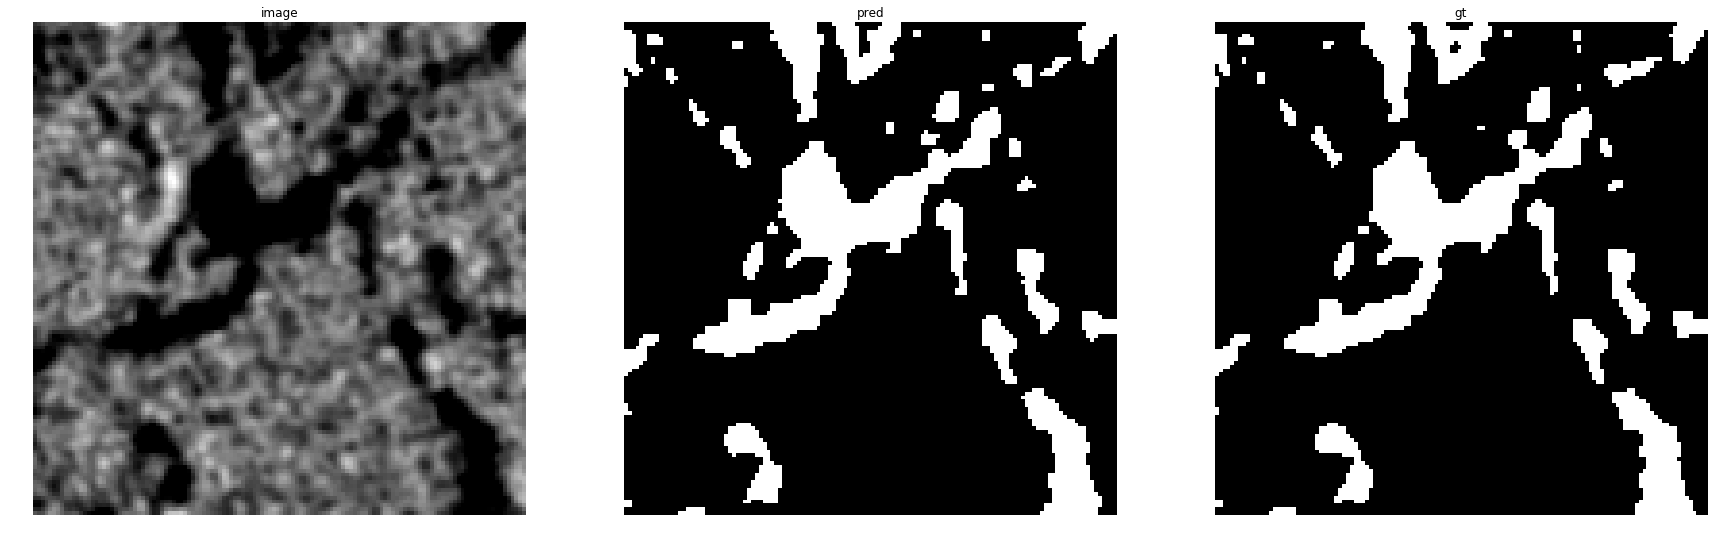

accuracy    : 0.98822021484375
precision   : 0.9654338057379882
recall      : 0.9677754677754677
f1          : 0.966603218549922
pr_auc      : 0.9966403501759261
iou         : 0.9353650368385801


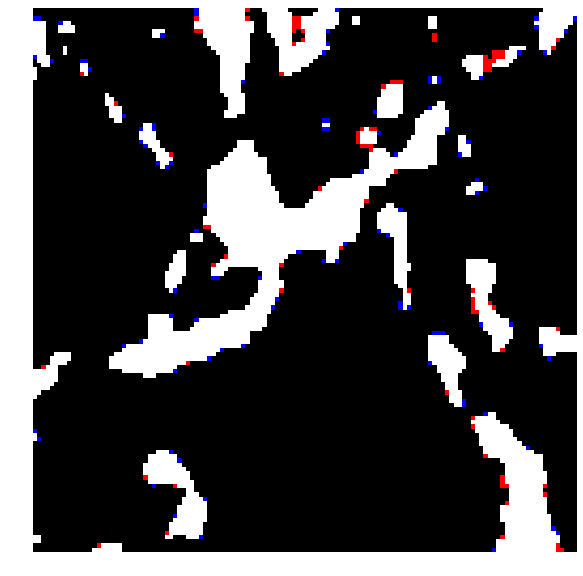

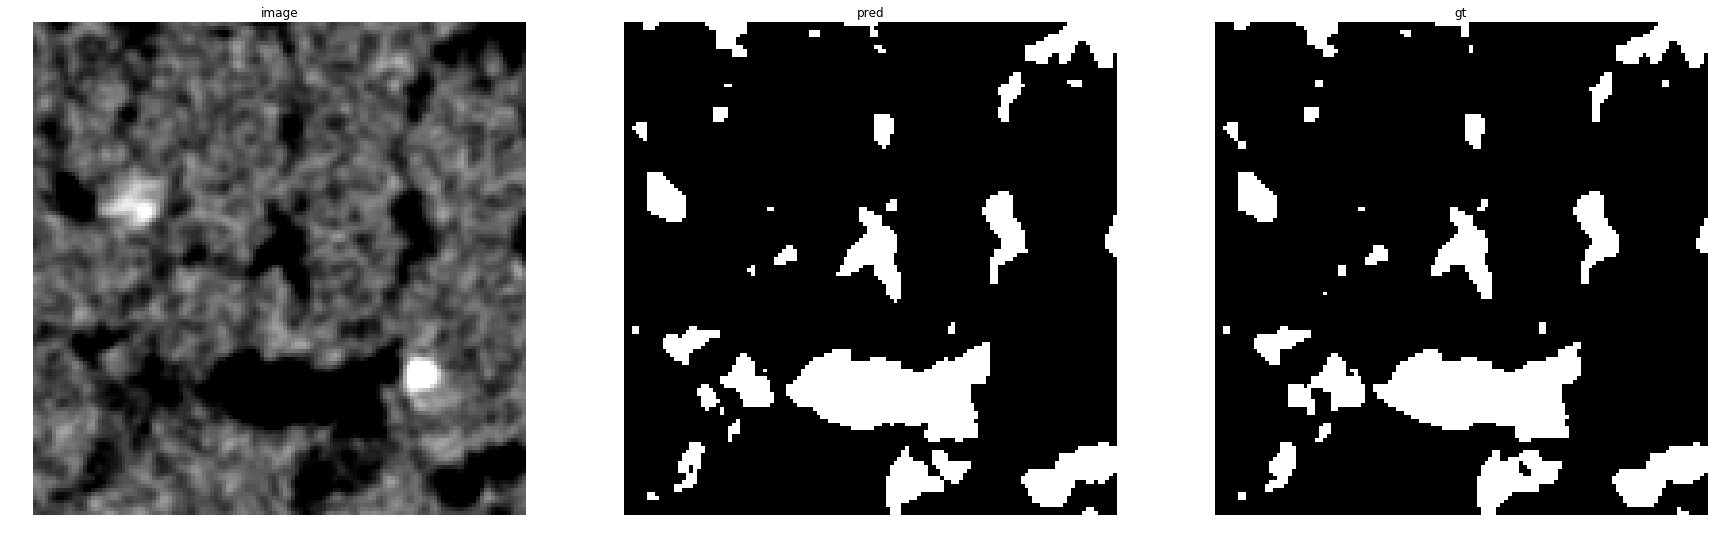

accuracy    : 0.99005126953125
precision   : 0.9750511247443763
recall      : 0.9589702333065165
f1          : 0.9669438247819915
pr_auc      : 0.9962979361402287
iou         : 0.9360031409501374


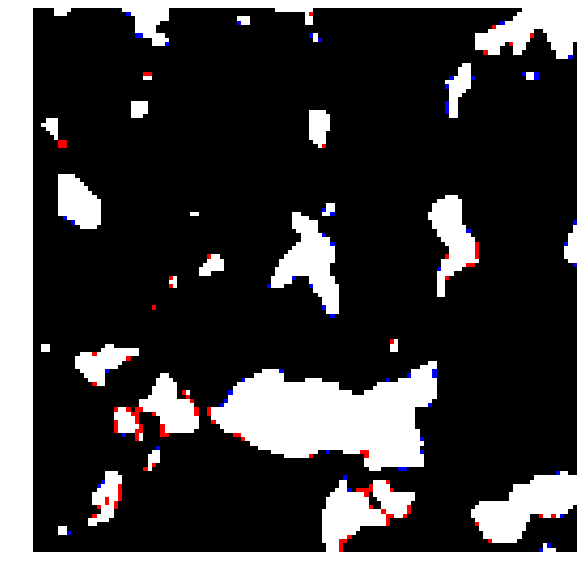

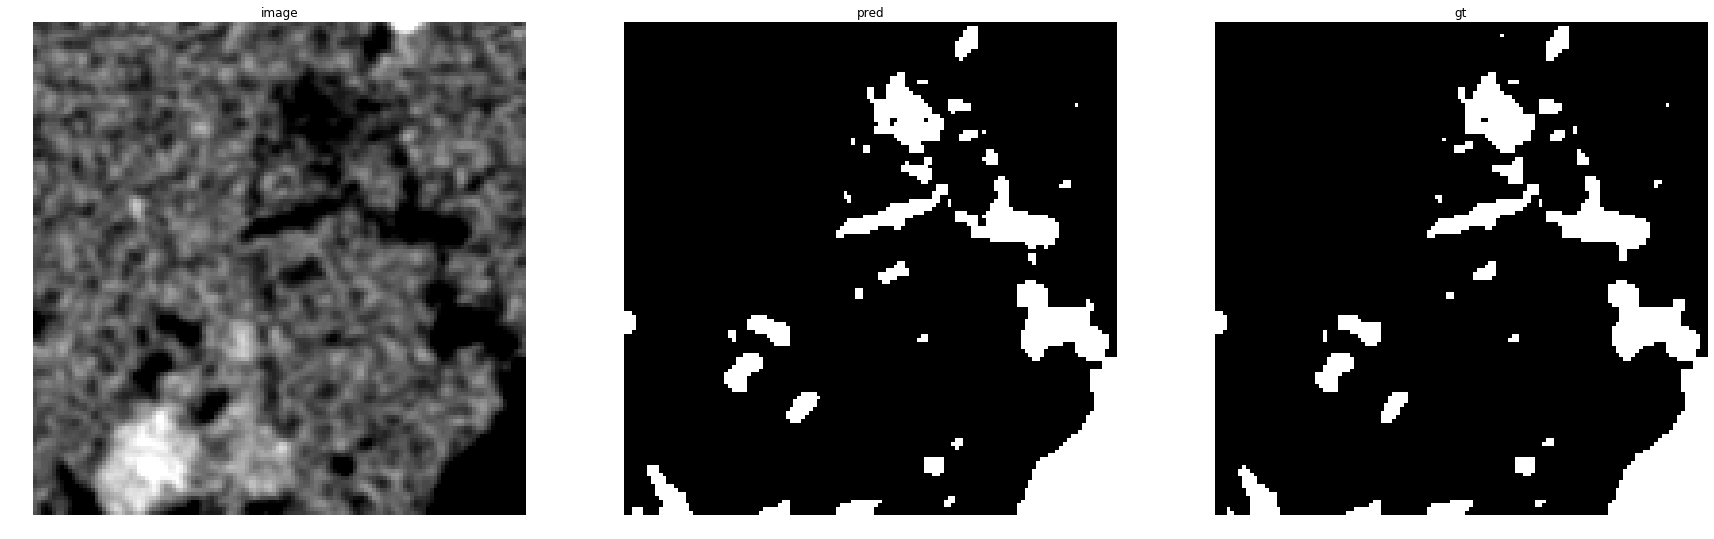

accuracy    : 0.9931640625
precision   : 0.9737789203084833
recall      : 0.9687979539641943
f1          : 0.9712820512820513
pr_auc      : 0.9977536295035289
iou         : 0.9441674975074775


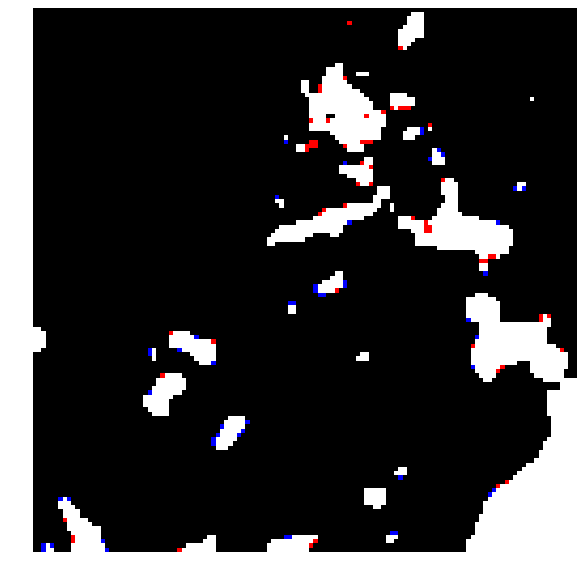

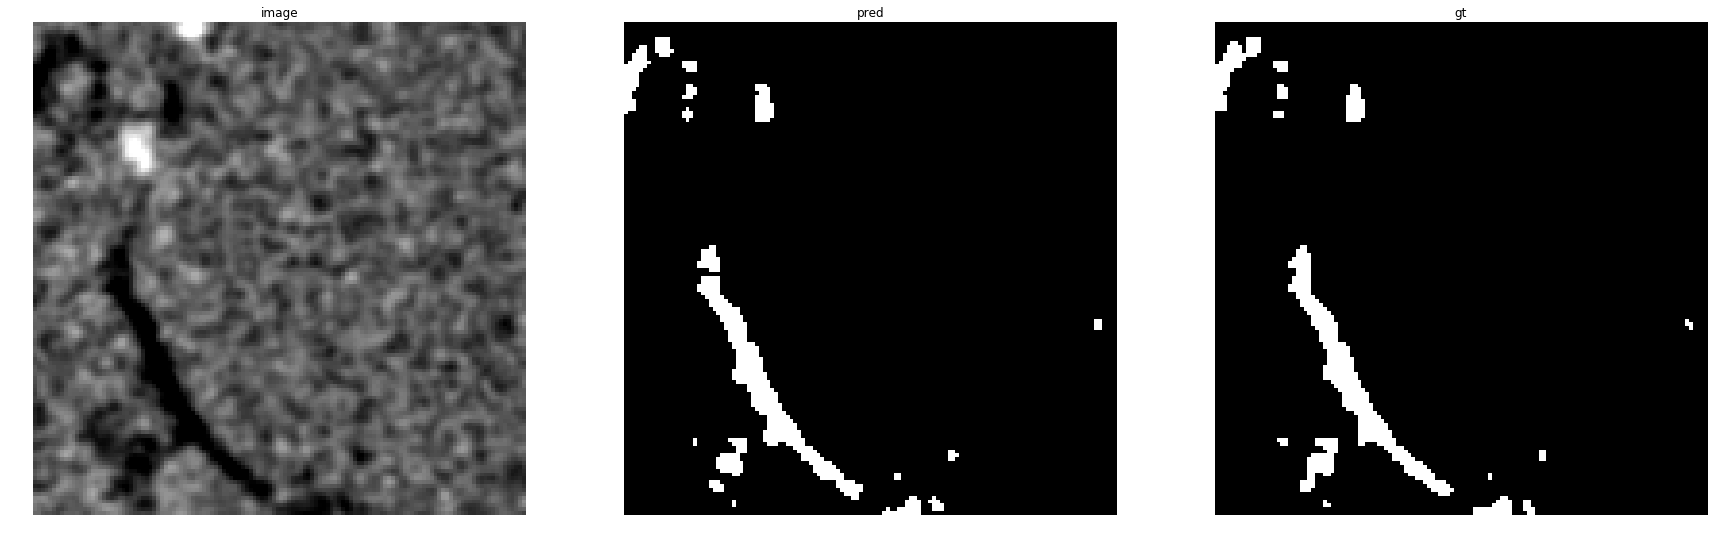

accuracy    : 0.99517822265625
precision   : 0.9528023598820059
recall      : 0.9321789321789322
f1          : 0.9423778264040846
pr_auc      : 0.9901262102944324
iou         : 0.8910344827586207


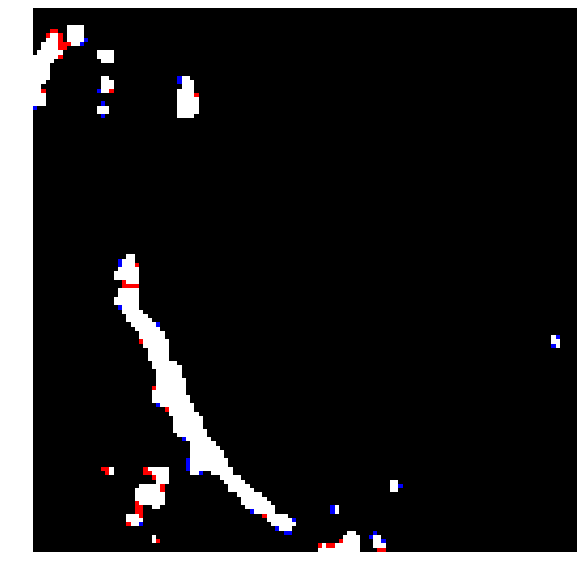

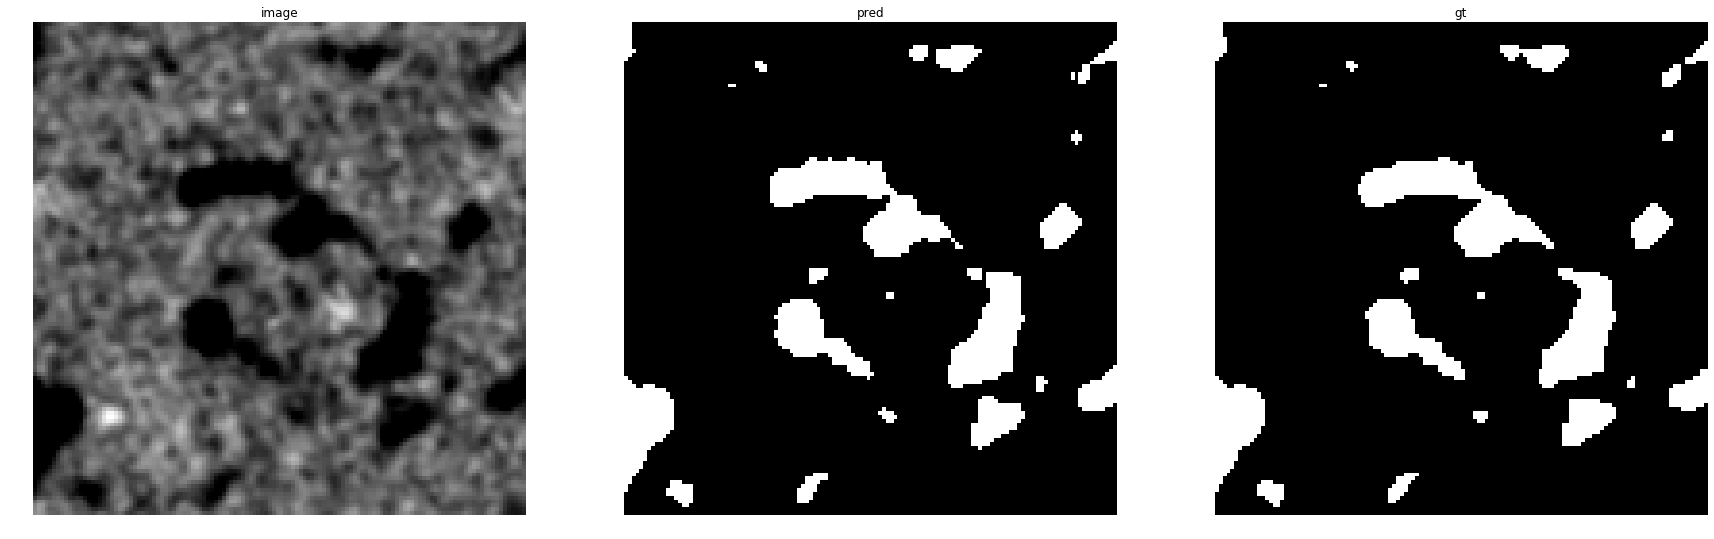

accuracy    : 0.99371337890625
precision   : 0.9732334047109208
recall      : 0.9716729021913415
f1          : 0.972452527413747
pr_auc      : 0.9973806422537501
iou         : 0.9463820926600729


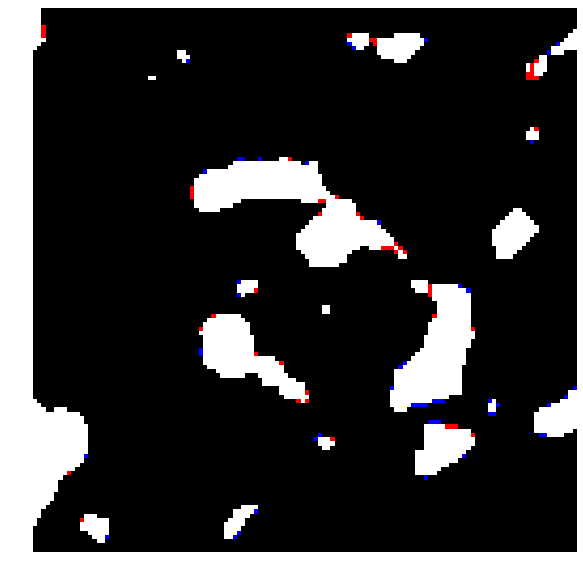

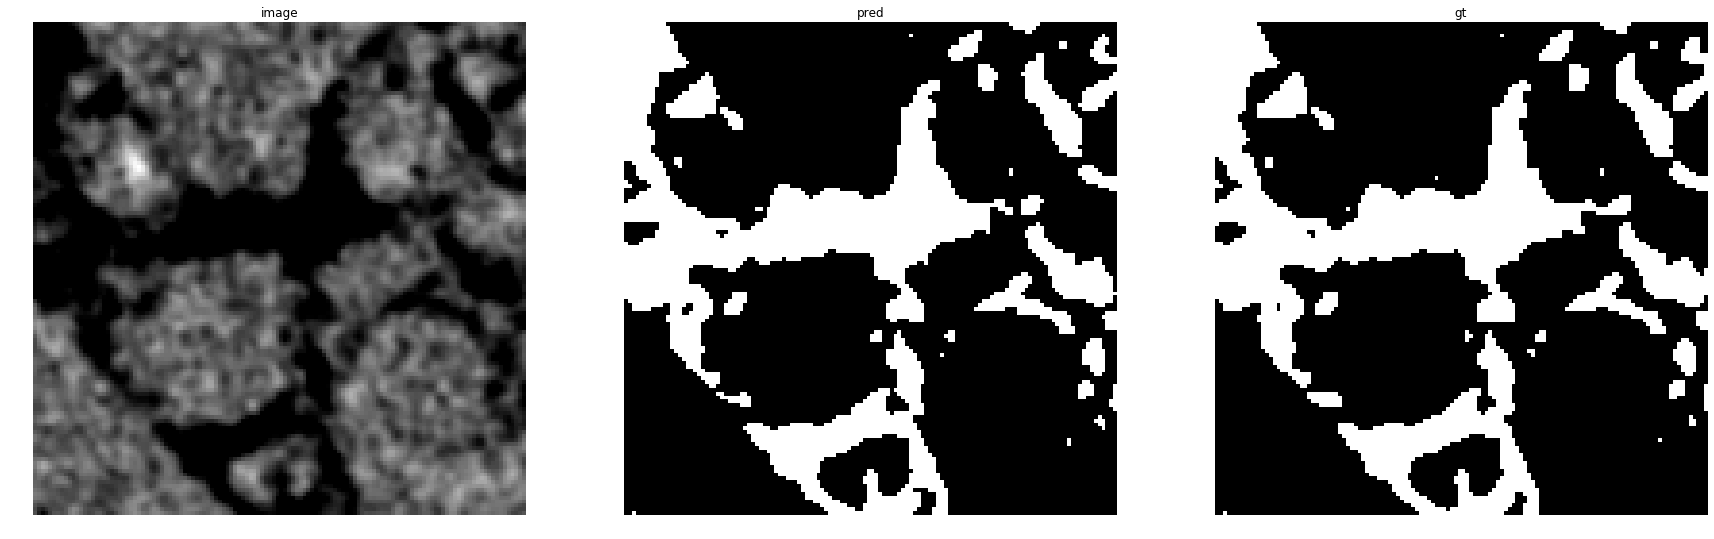

accuracy    : 0.98785400390625
precision   : 0.9838202247191011
recall      : 0.9718091009988902
f1          : 0.9777777777777779
pr_auc      : 0.9984713005367978
iou         : 0.9565217391304348


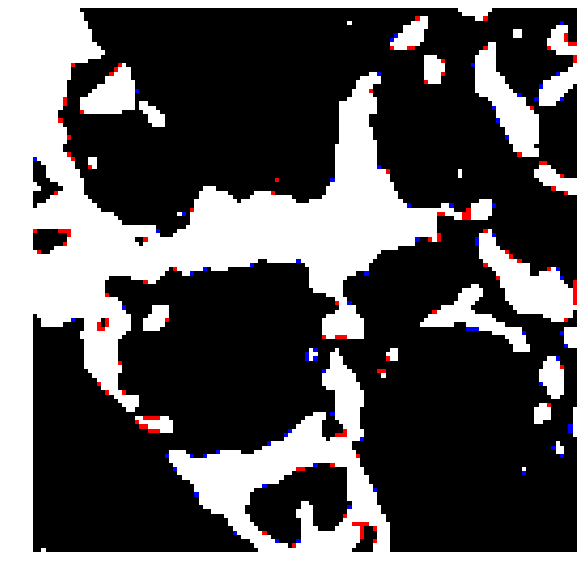

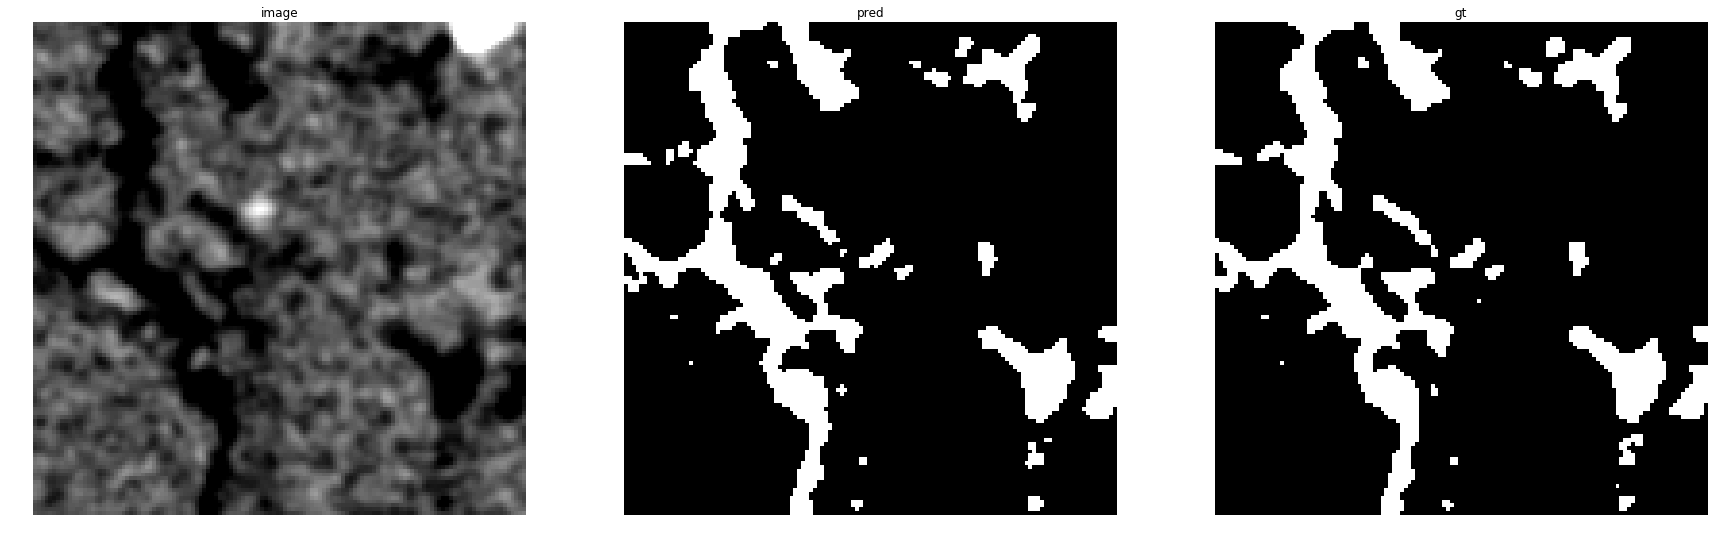

accuracy    : 0.9891357421875
precision   : 0.9803921568627451
recall      : 0.9512937595129376
f1          : 0.9656237929702588
pr_auc      : 0.9965109504037379
iou         : 0.9335324869305451


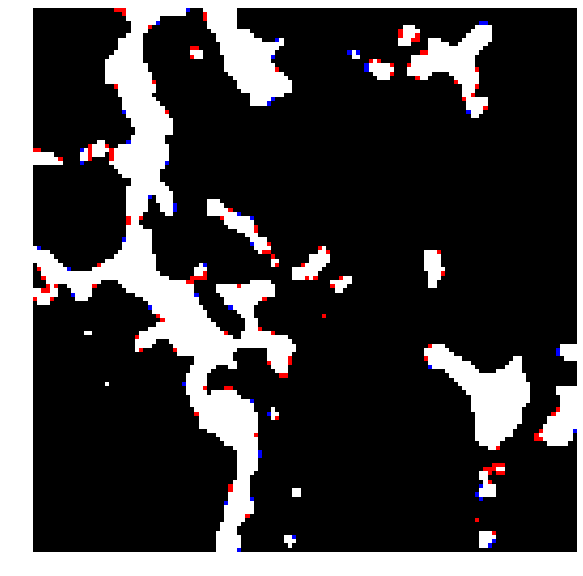

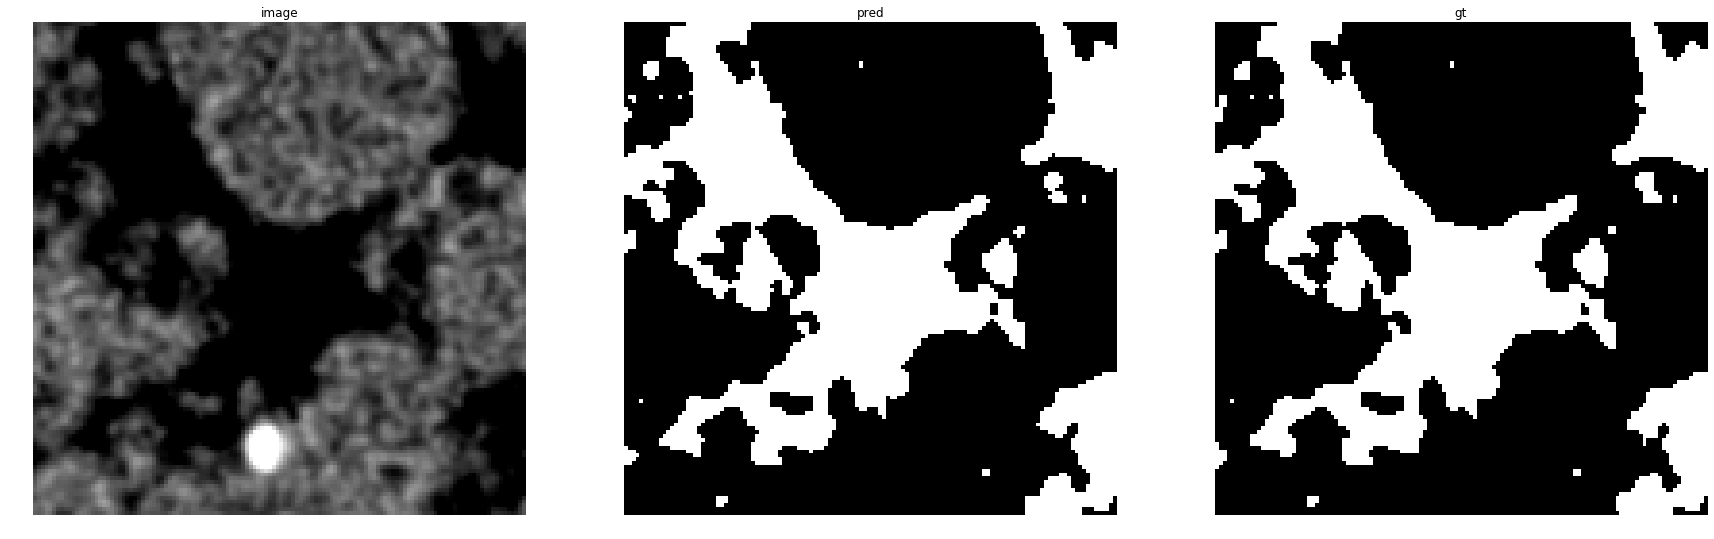

accuracy    : 0.989501953125
precision   : 0.9883398112159911
recall      : 0.9799963296017618
f1          : 0.9841503870254331
pr_auc      : 0.9992183971659712
iou         : 0.9687953555878084


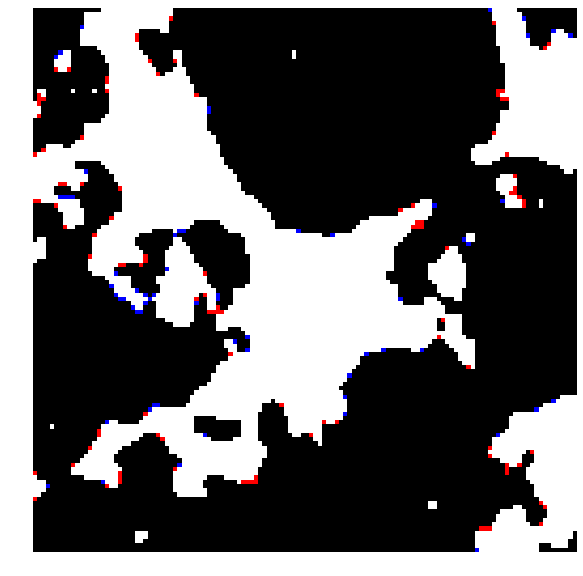

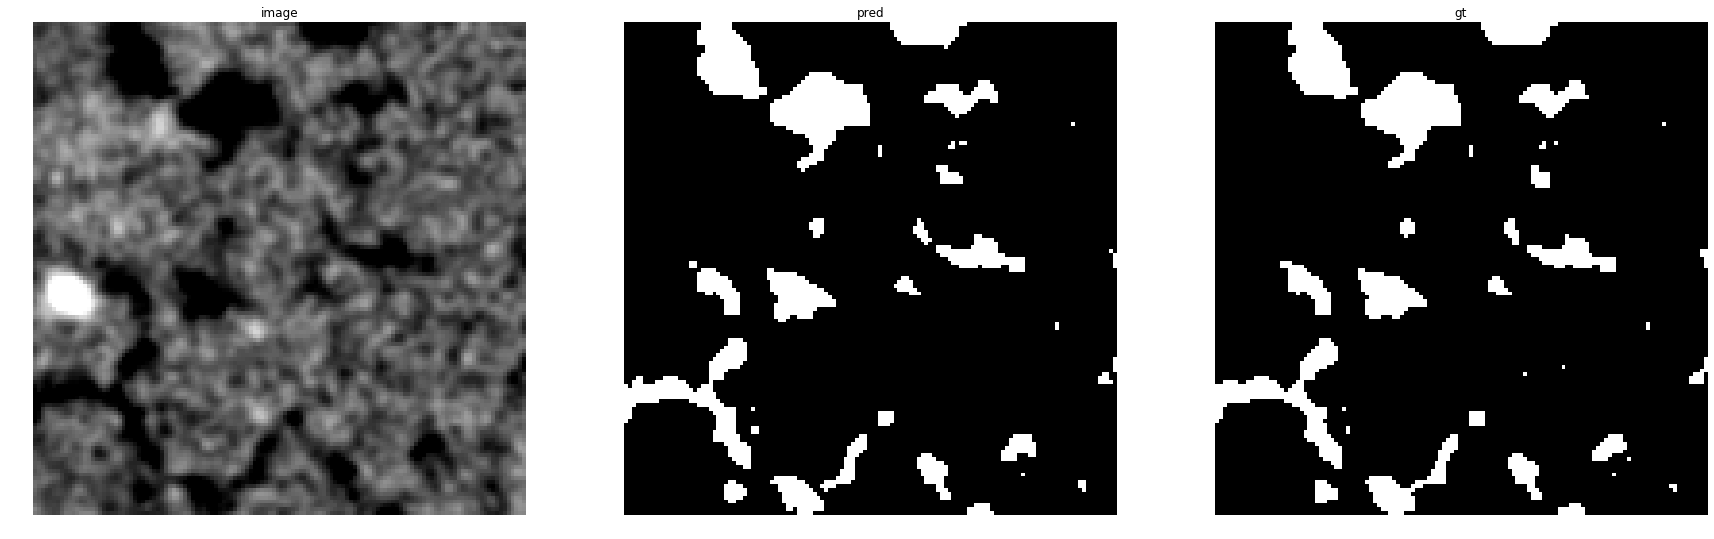

accuracy    : 0.9932861328125
precision   : 0.965964343598055
recall      : 0.9743869209809264
f1          : 0.9701573521432446
pr_auc      : 0.9966131148452113
iou         : 0.9420442571127503
Prediction fro TiTree_subset2:


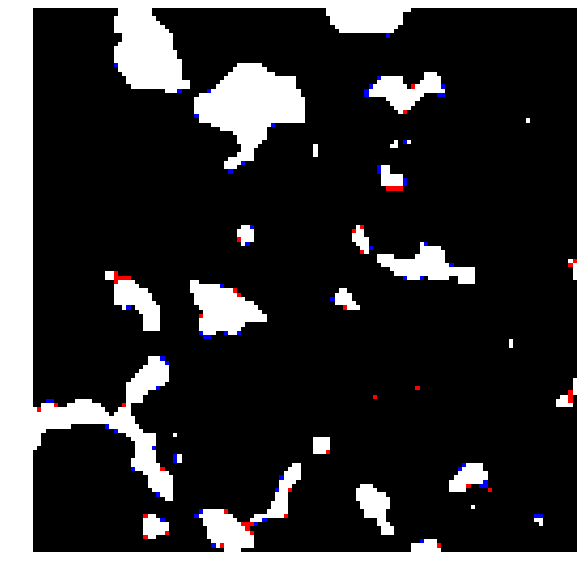

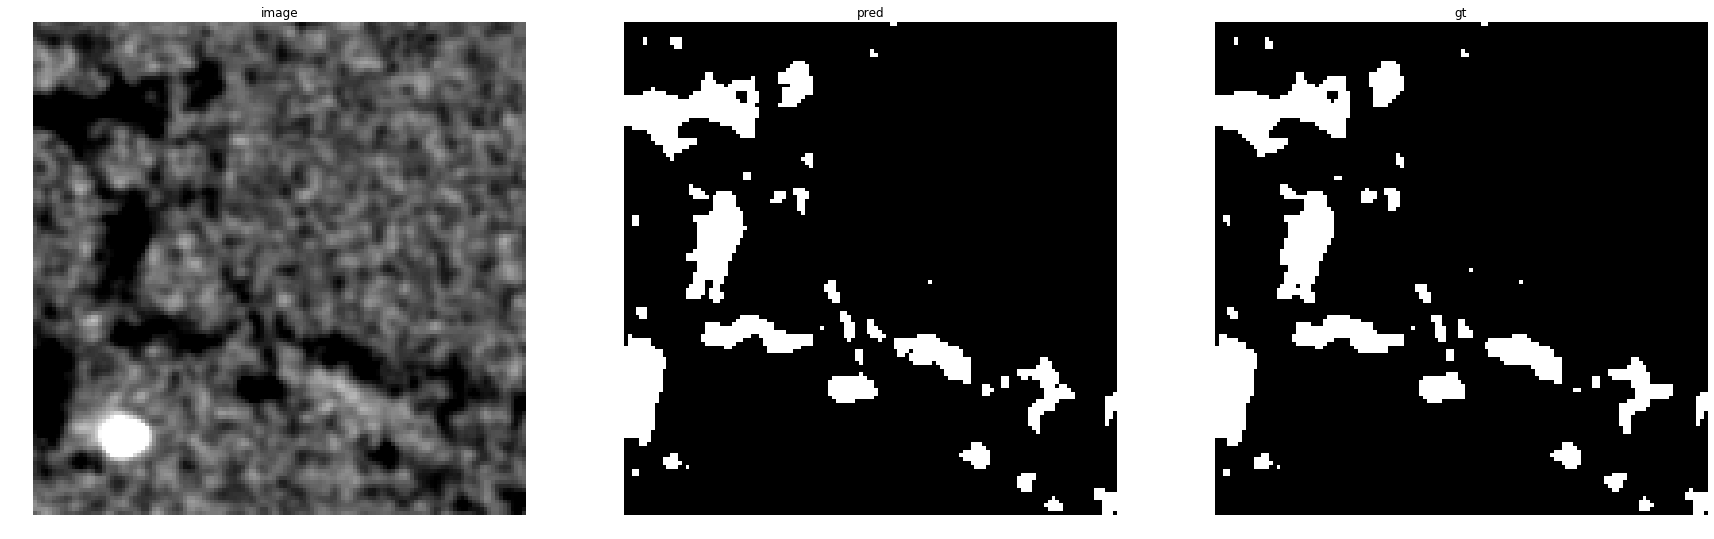

accuracy    : 0.9920654296875
precision   : 0.9719036697247706
recall      : 0.9543918918918919
f1          : 0.9630681818181818
pr_auc      : 0.9951310407637539
iou         : 0.9287671232876712


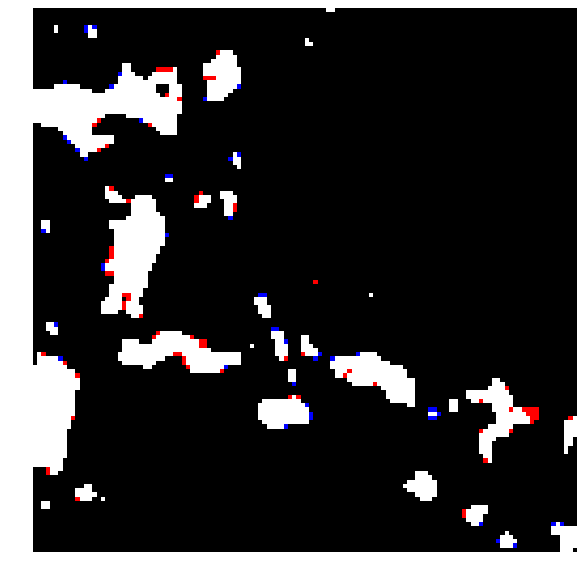

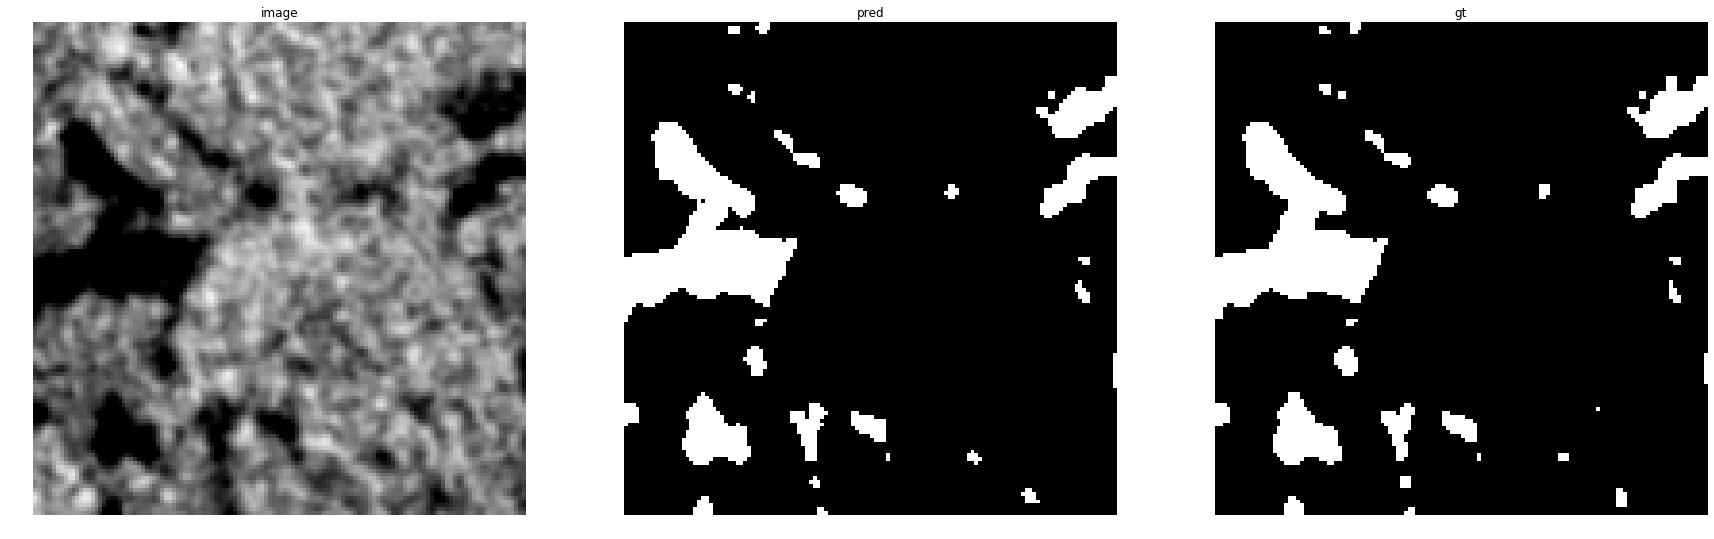

accuracy    : 0.99346923828125
precision   : 0.9749739311783108
recall      : 0.9694142042509072
f1          : 0.9721861190538081
pr_auc      : 0.997716151381784
iou         : 0.9458775923115832


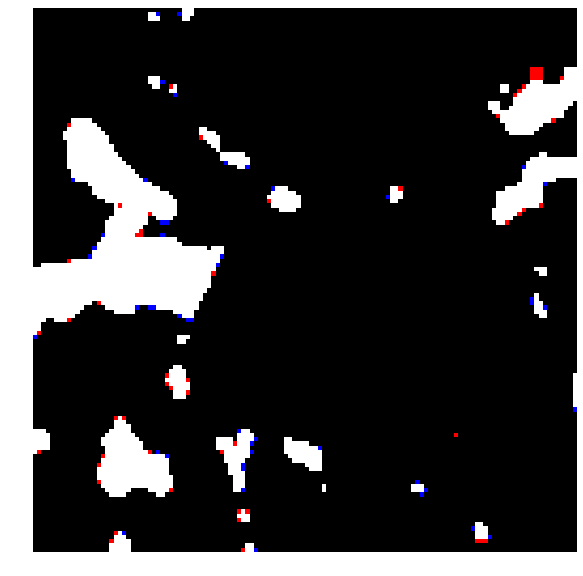

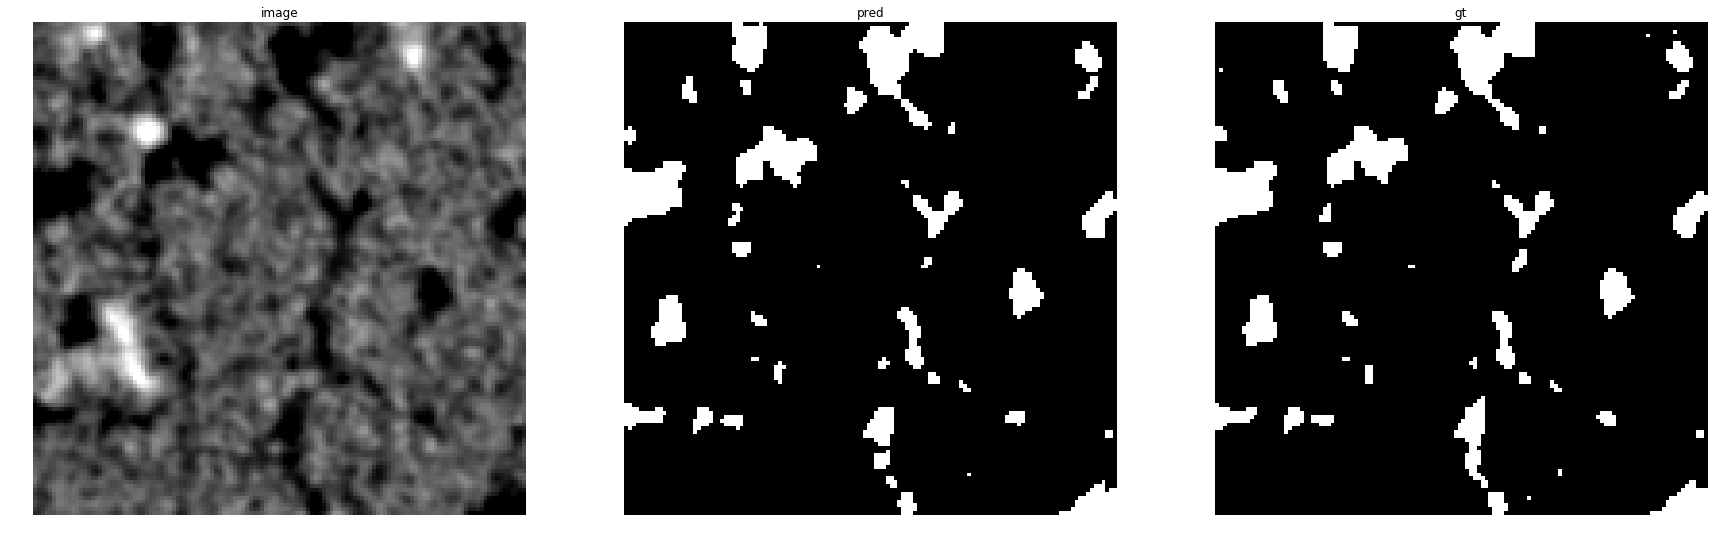

accuracy    : 0.9920654296875
precision   : 0.9715009499683344
recall      : 0.9474984558369364
f1          : 0.959349593495935
pr_auc      : 0.9948406359830474
iou         : 0.921875


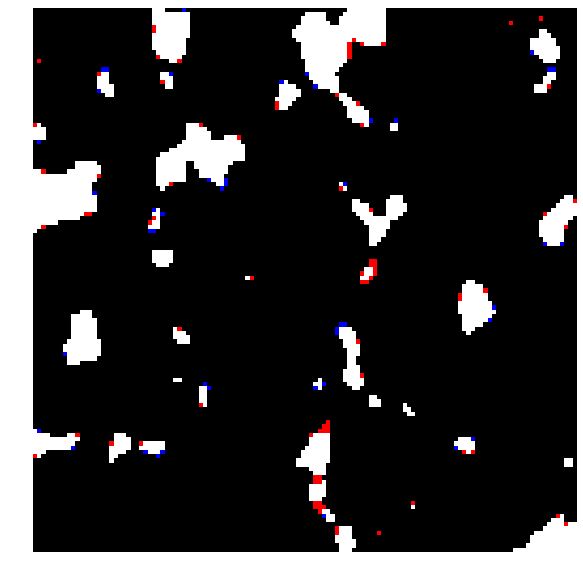

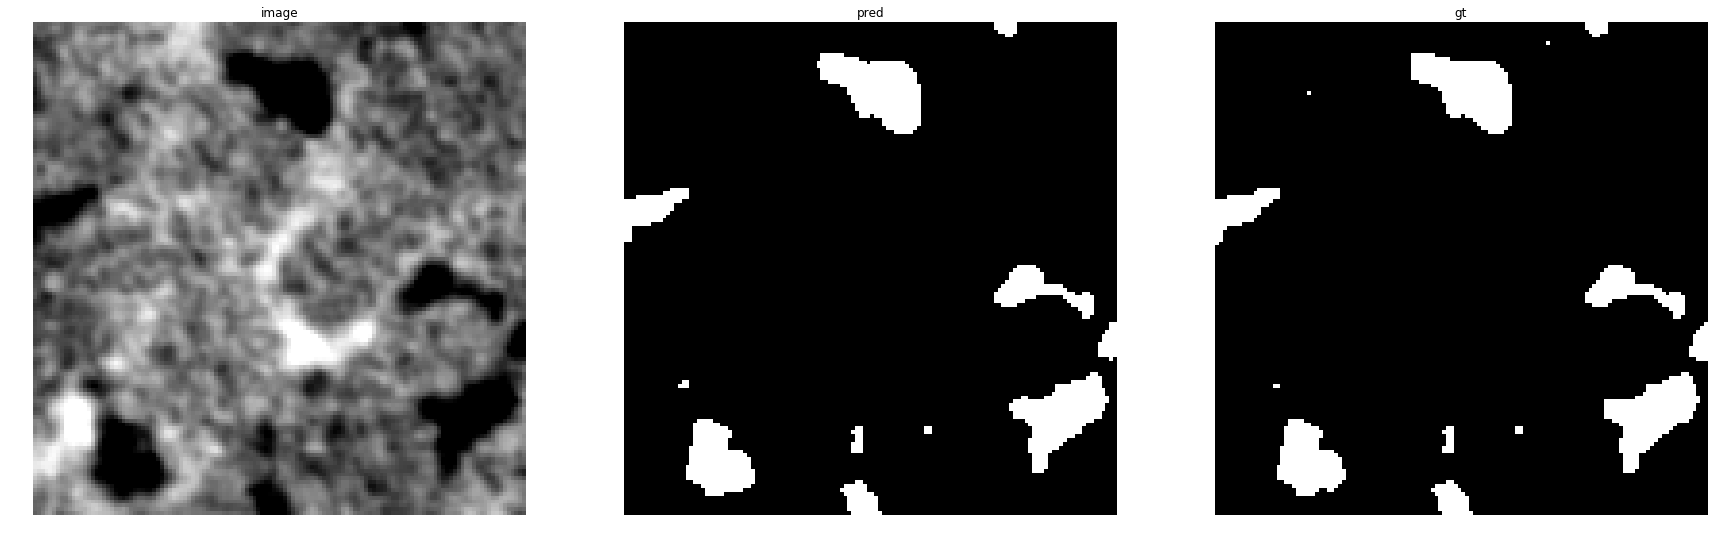

accuracy    : 0.99713134765625
precision   : 0.979560938682816
recall      : 0.984779299847793
f1          : 0.9821631878557875
pr_auc      : 0.9987605163055442
iou         : 0.964951528709918


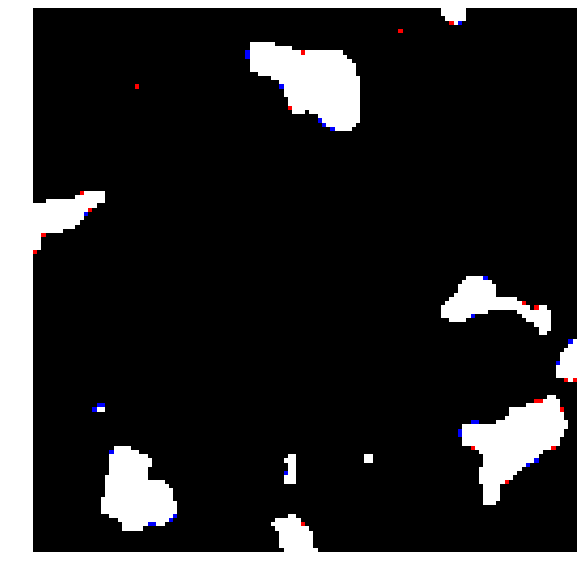

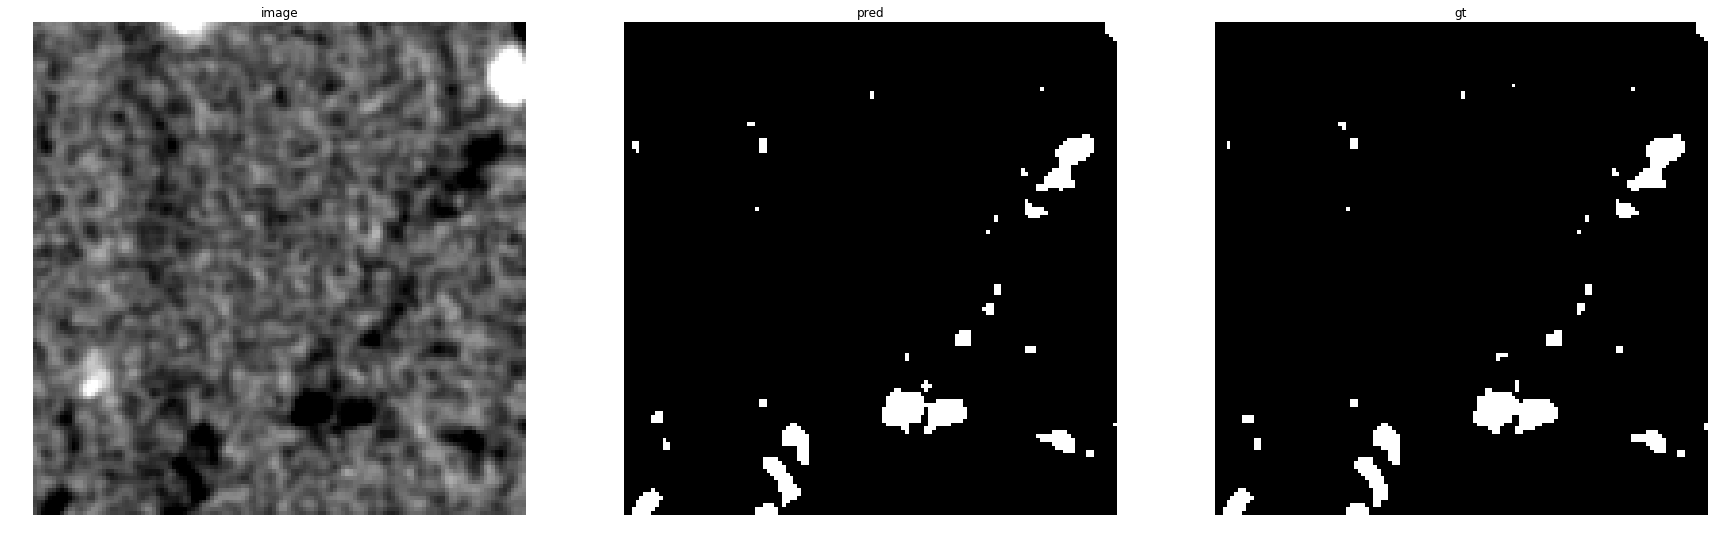

accuracy    : 0.99639892578125
precision   : 0.9485815602836879
recall      : 0.9469026548672567
f1          : 0.9477413640389726
pr_auc      : 0.9922451877990056
iou         : 0.9006734006734006


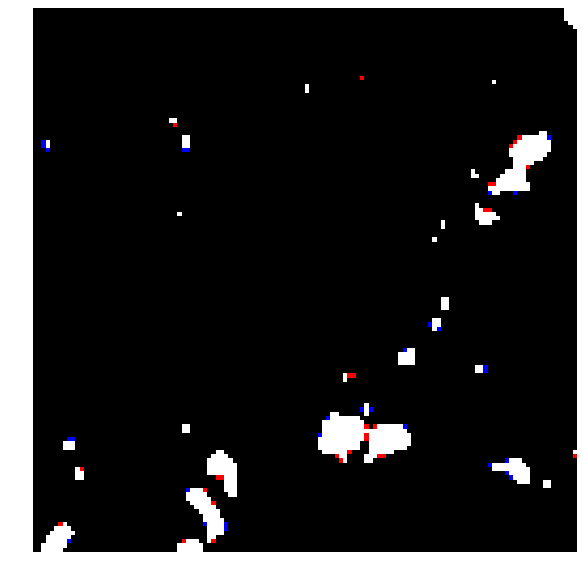

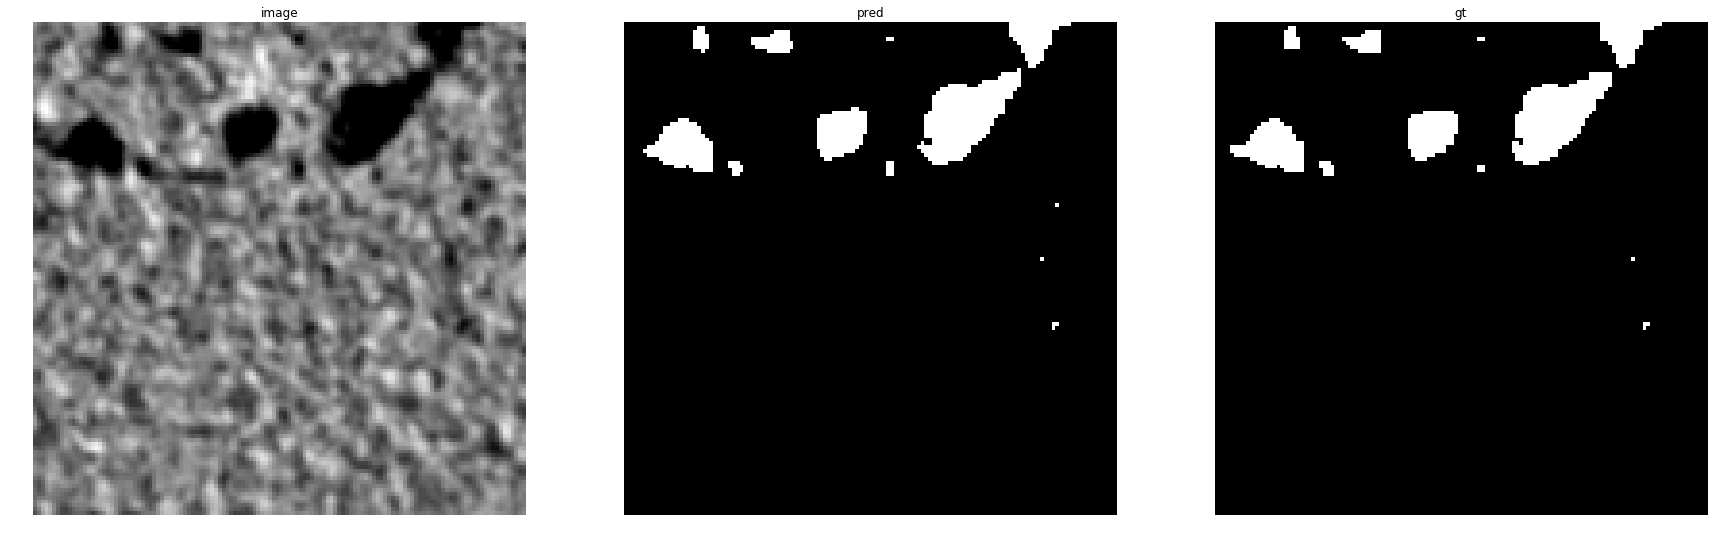

accuracy    : 0.99761962890625
precision   : 0.9695193434935522
recall      : 0.9845238095238096
f1          : 0.9769639692852924
pr_auc      : 0.9983904211644552
iou         : 0.9549653579676675


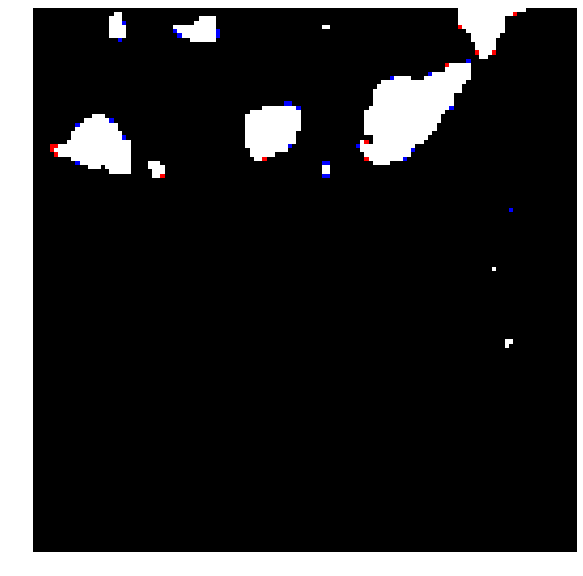

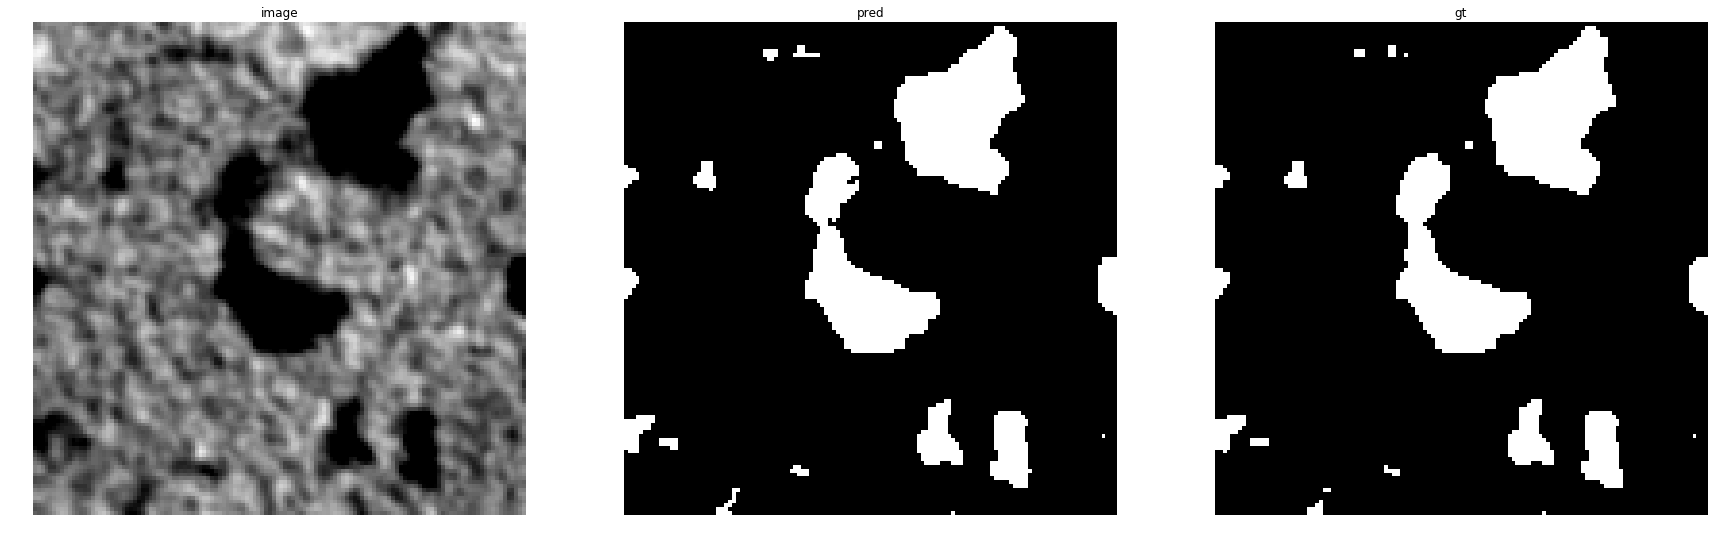

accuracy    : 0.9959716796875
precision   : 0.9856308935788056
recall      : 0.9847465231045311
f1          : 0.9851885098743267
pr_auc      : 0.9991667232289683
iou         : 0.9708093763821318


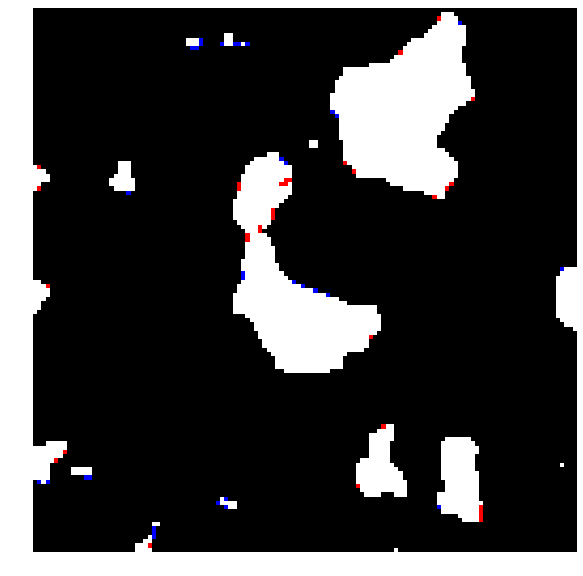

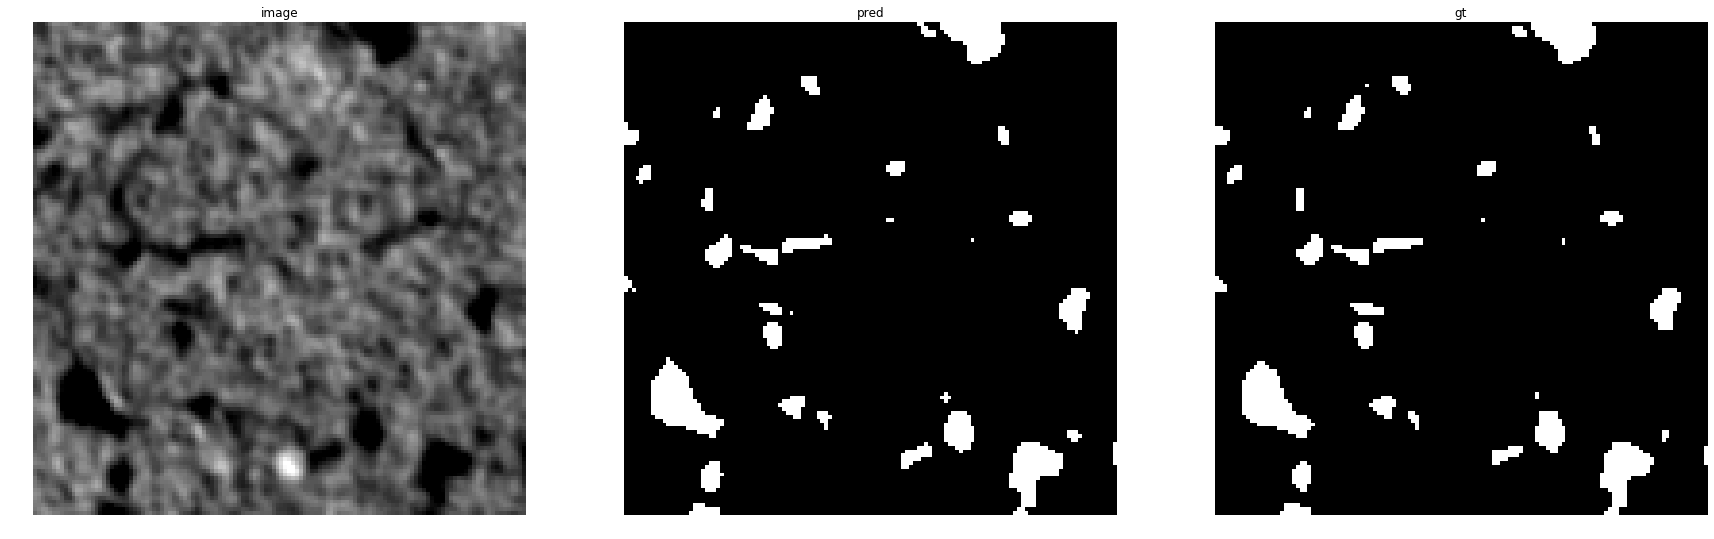

accuracy    : 0.99468994140625
precision   : 0.9500941619585688
recall      : 0.9674017257909875
f1          : 0.9586698337292161
pr_auc      : 0.9952656613666078
iou         : 0.9206204379562044


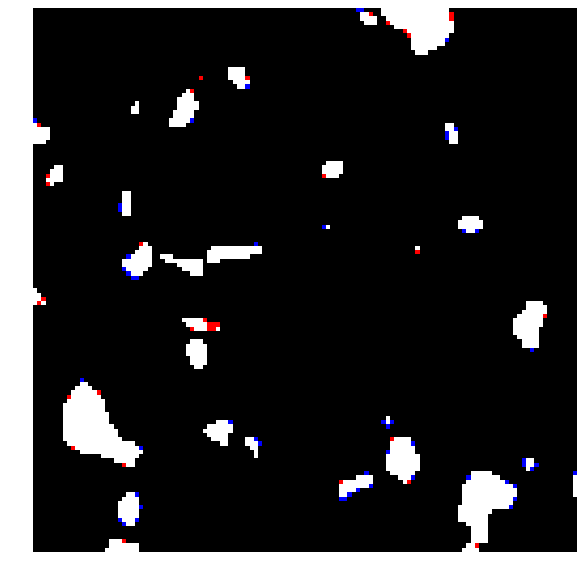

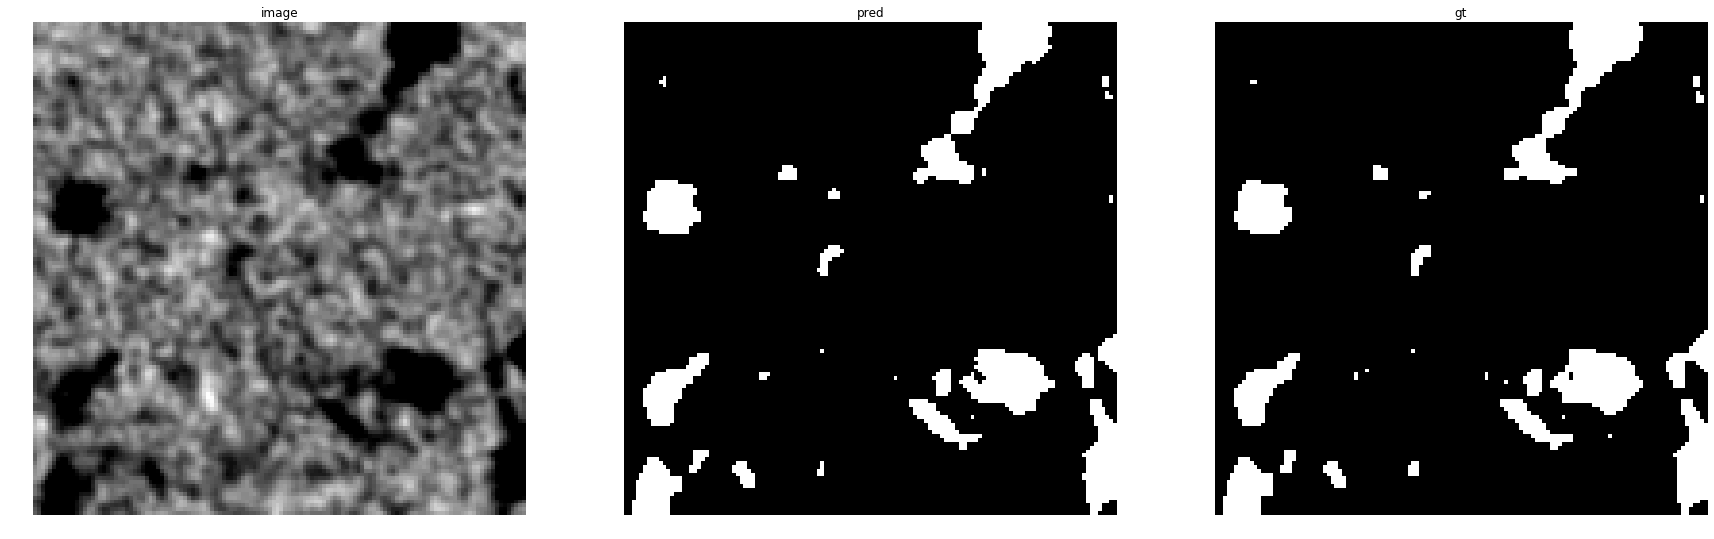

accuracy    : 0.993896484375
precision   : 0.9783683559950557
recall      : 0.9605582524271845
f1          : 0.9693815064298837
pr_auc      : 0.9971989789176566
iou         : 0.94058229352347


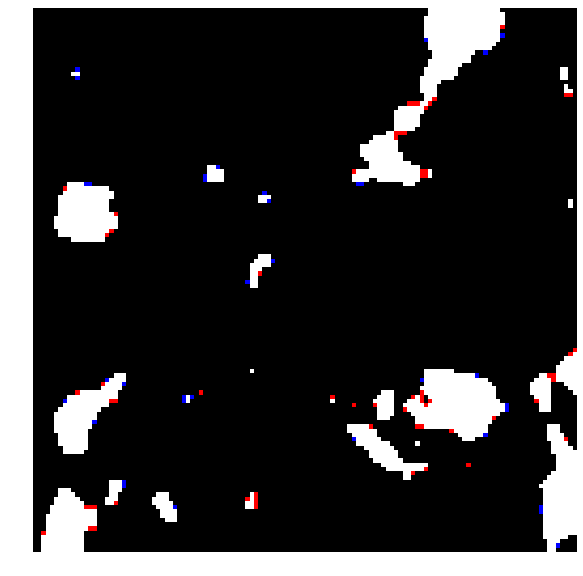

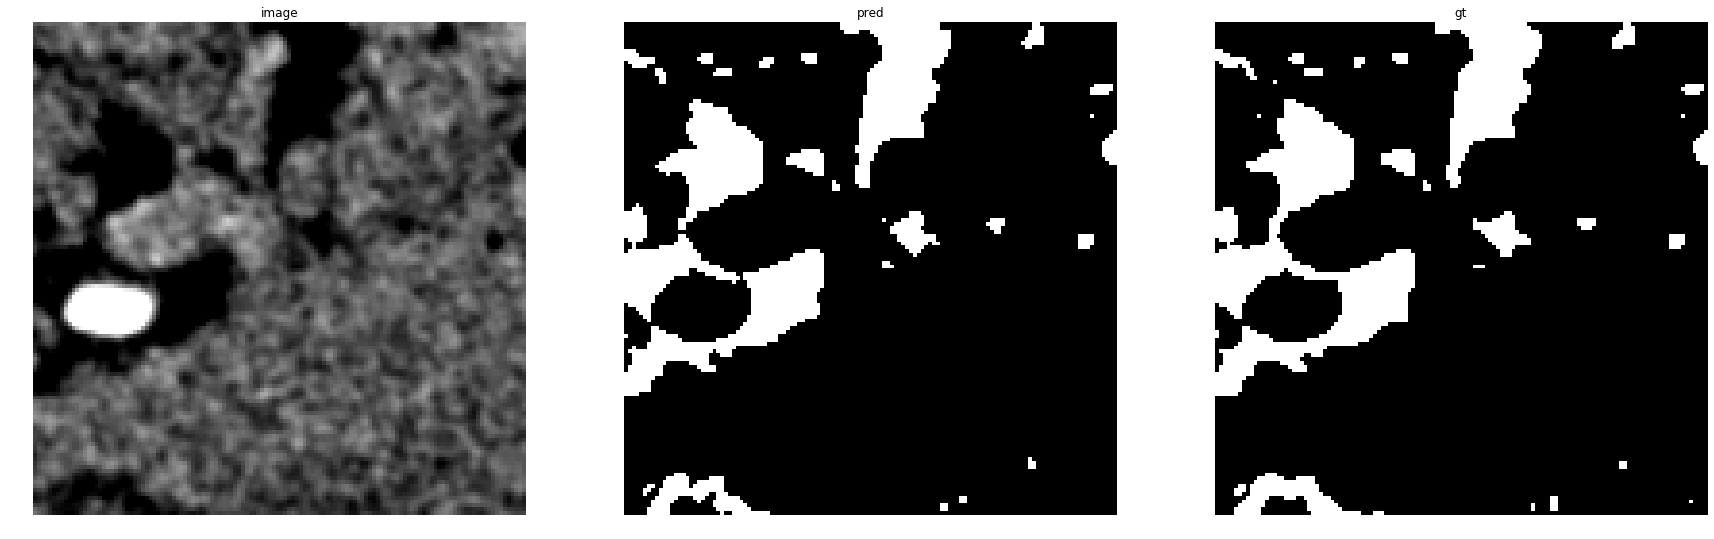

accuracy    : 0.99151611328125
precision   : 0.9806607574536664
recall      : 0.9639603960396039
f1          : 0.9722388655881766
pr_auc      : 0.9975213461342912
iou         : 0.9459774582199767
Prediction fro Urna_22:


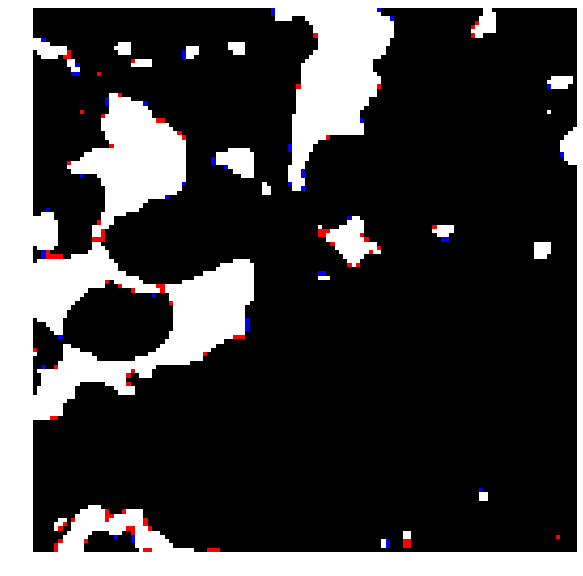

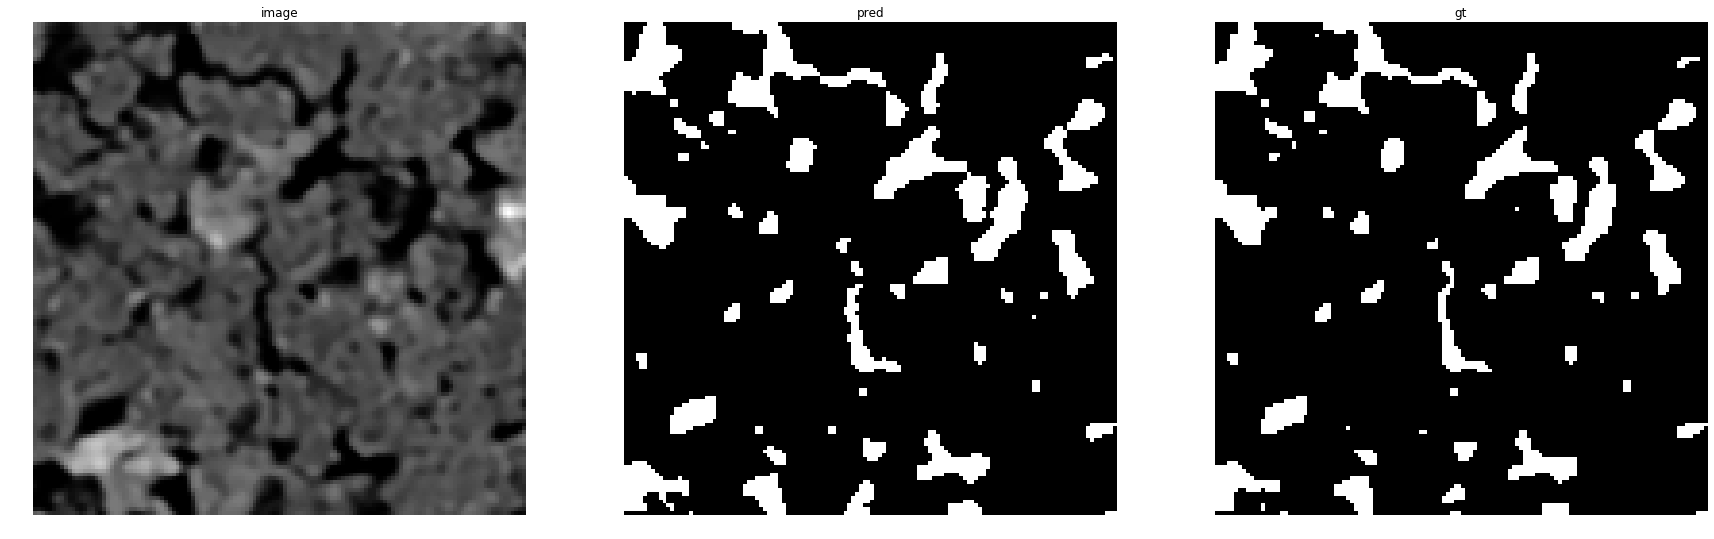

accuracy    : 0.98486328125
precision   : 0.8974031502767135
recall      : 0.9966903073286052
f1          : 0.9444444444444444
pr_auc      : 0.9968941981242203
iou         : 0.8947368421052632


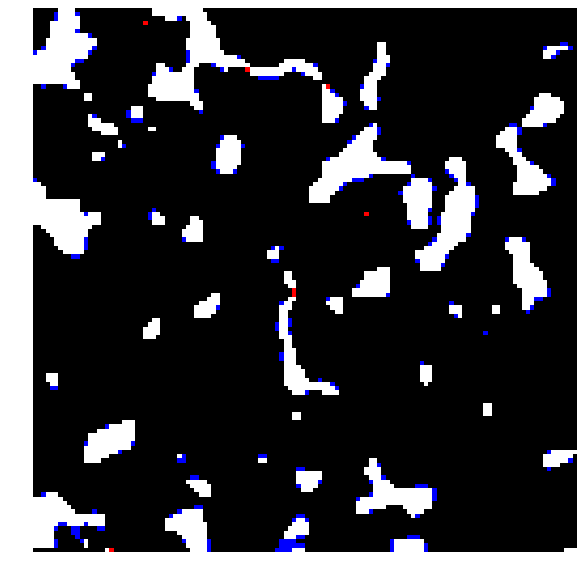

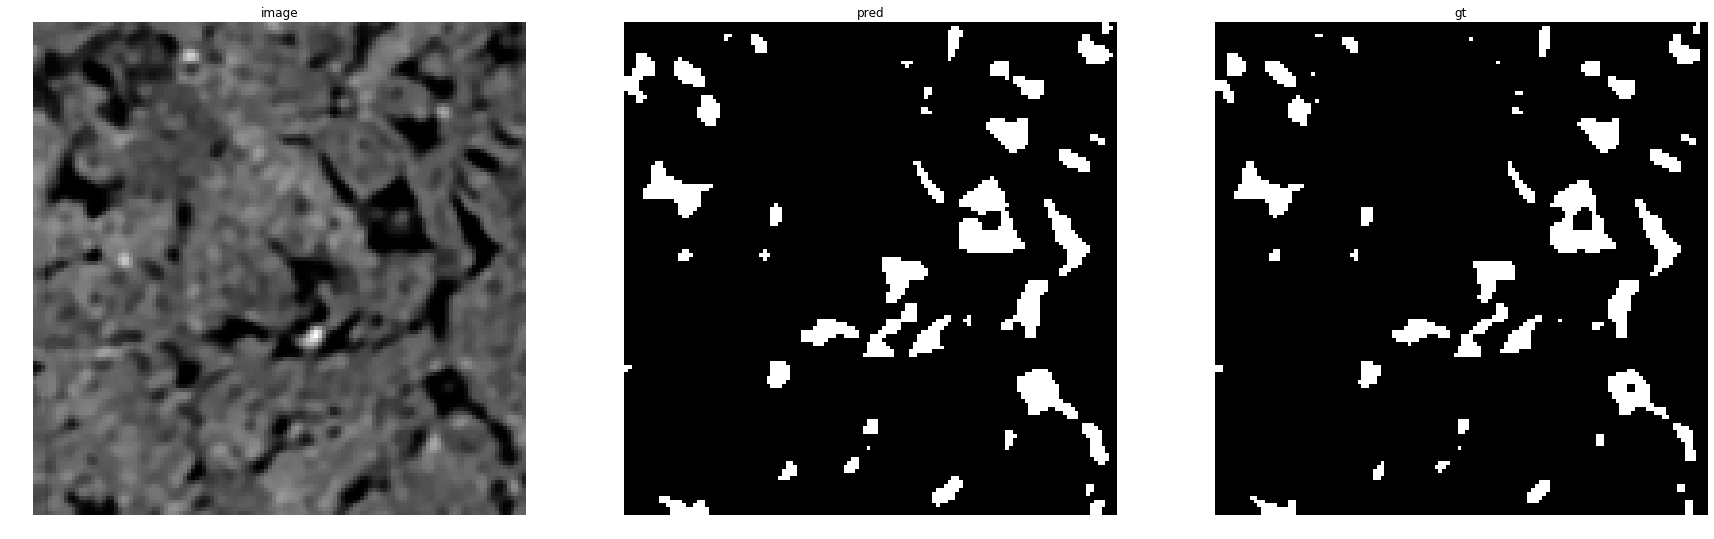

accuracy    : 0.9871826171875
precision   : 0.8712998712998713
recall      : 0.9926686217008798
f1          : 0.9280328992460589
pr_auc      : 0.9951503858333175
iou         : 0.8657289002557544


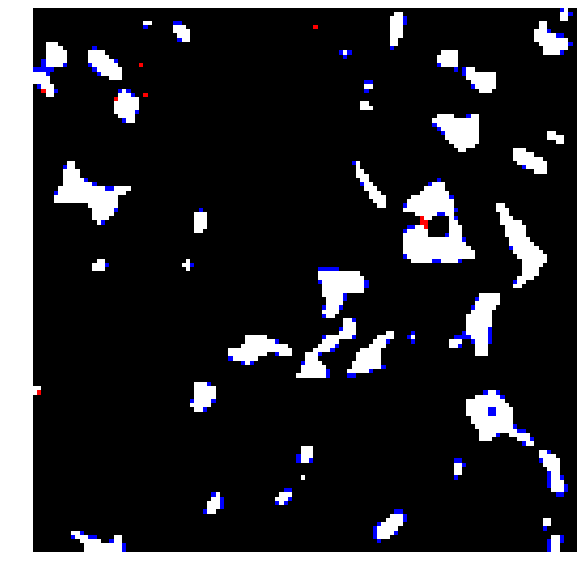

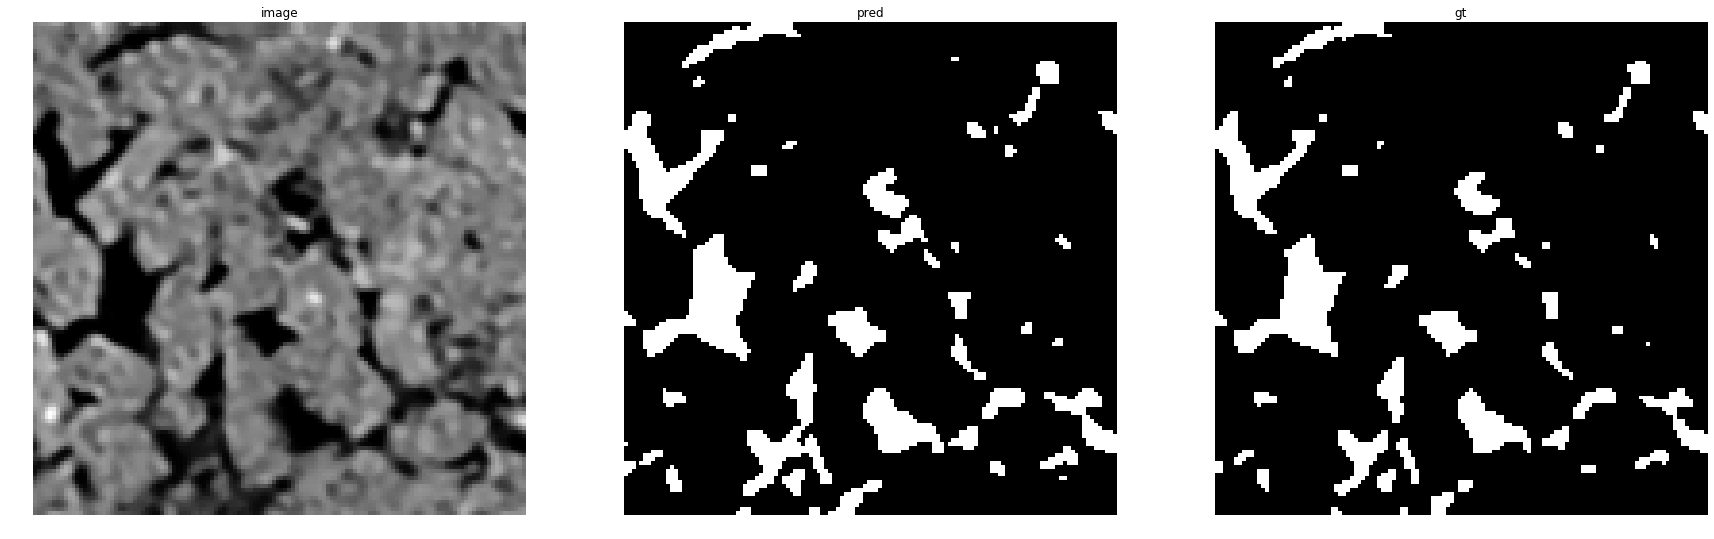

accuracy    : 0.98162841796875
precision   : 0.8639890460976722
recall      : 0.9984177215189873
f1          : 0.9263518473207731
pr_auc      : 0.9965287984119817
iou         : 0.8628076572470373


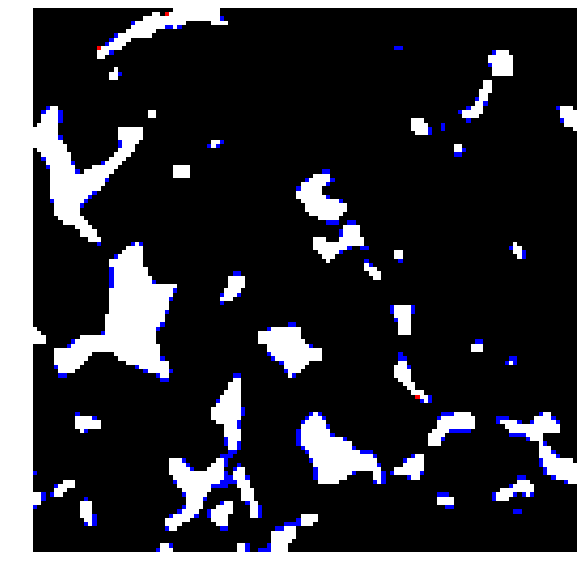

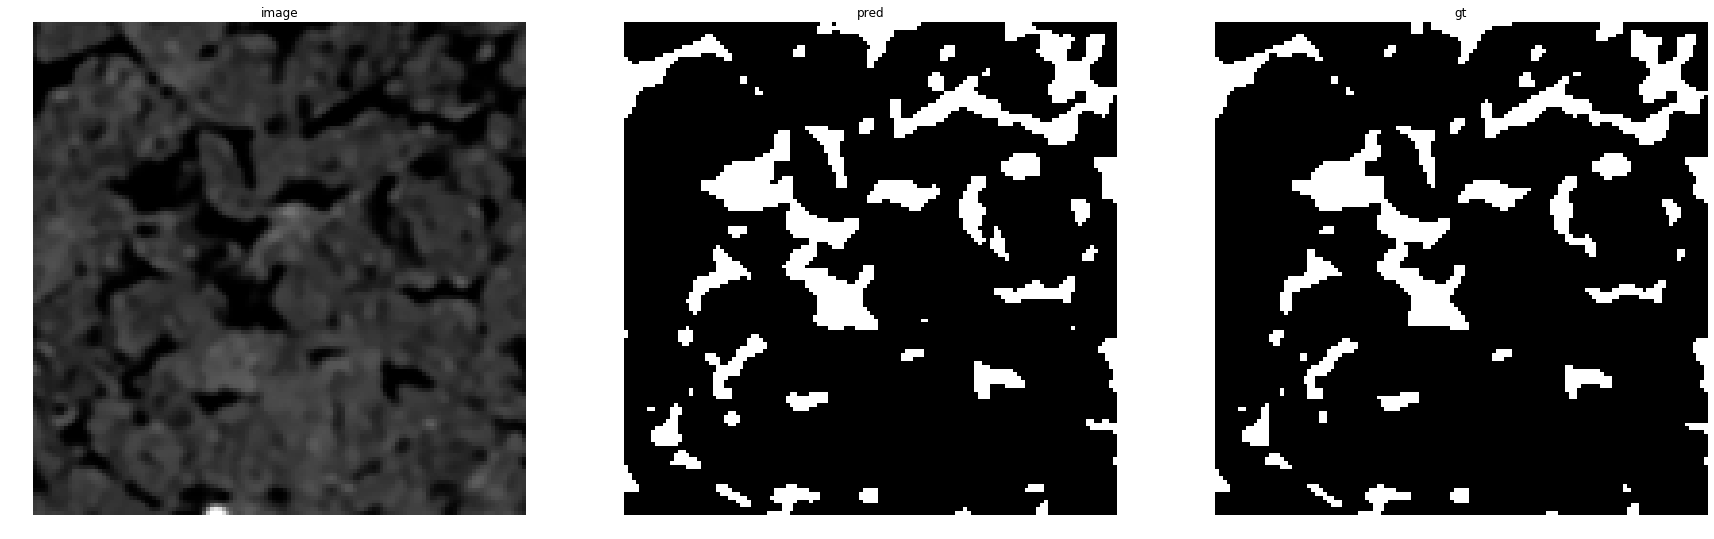

accuracy    : 0.98052978515625
precision   : 0.8835719668425018
recall      : 0.9957537154989384
f1          : 0.9363146336594129
pr_auc      : 0.9964066336999085
iou         : 0.8802552552552553


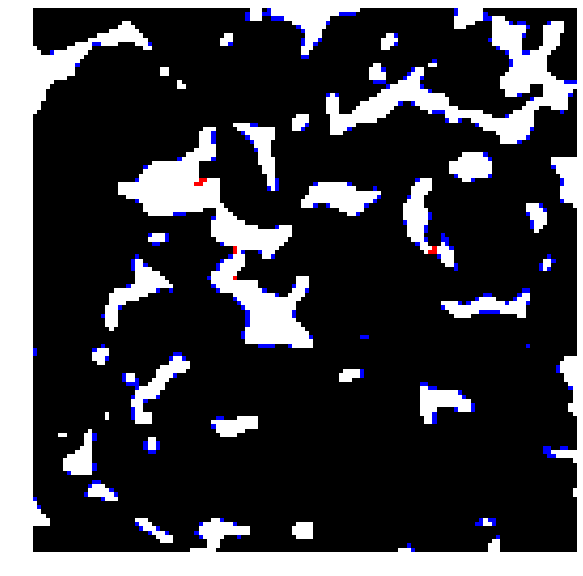

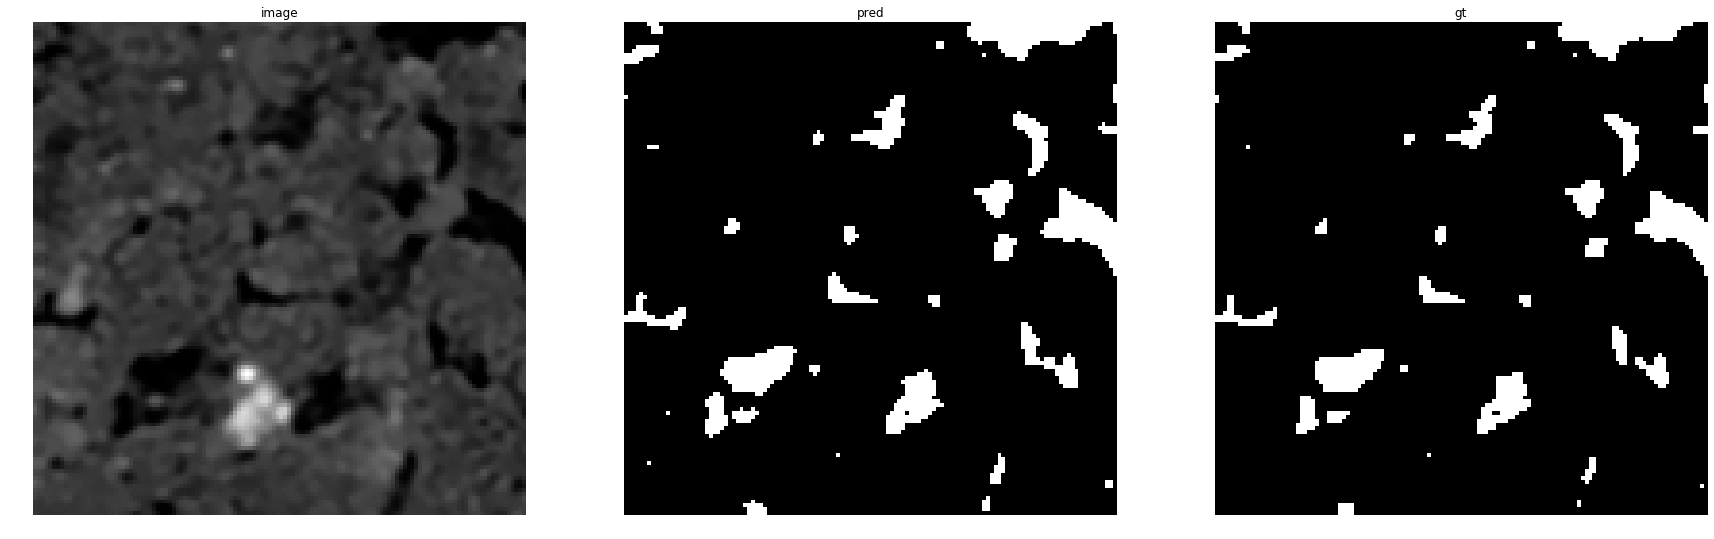

accuracy    : 0.98931884765625
precision   : 0.8735380116959064
recall      : 0.9983291562238931
f1          : 0.9317738791423003
pr_auc      : 0.996461541768888
iou         : 0.8722627737226277


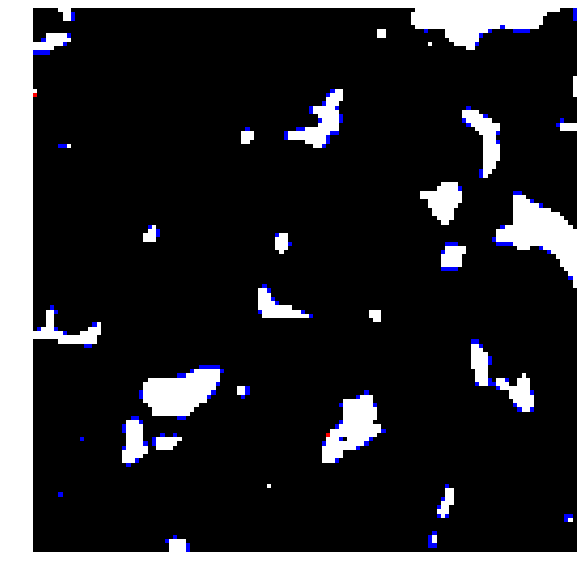

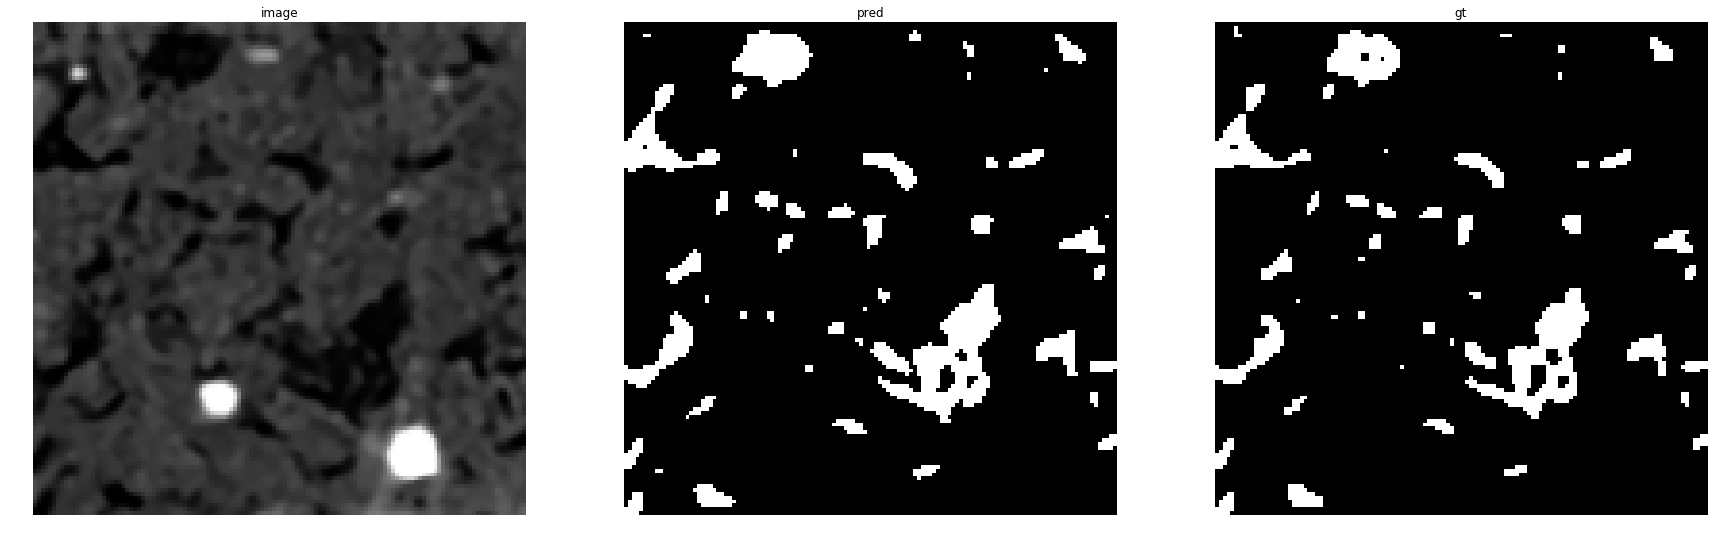

accuracy    : 0.9844970703125
precision   : 0.8541912632821723
recall      : 0.9951856946354883
f1          : 0.9193138500635324
pr_auc      : 0.994833817308695
iou         : 0.8506760728982952


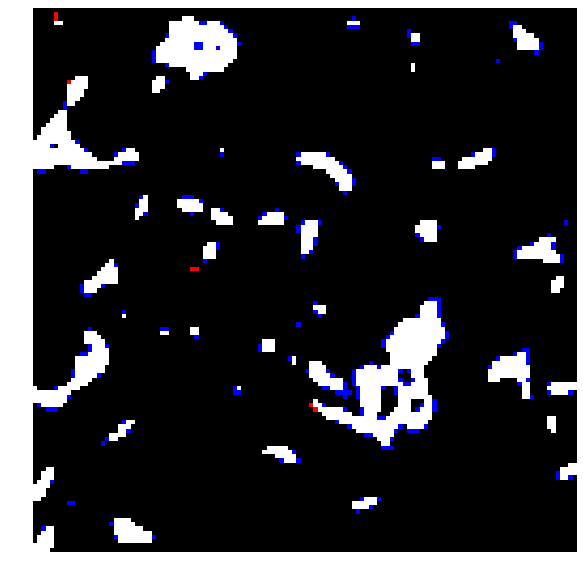

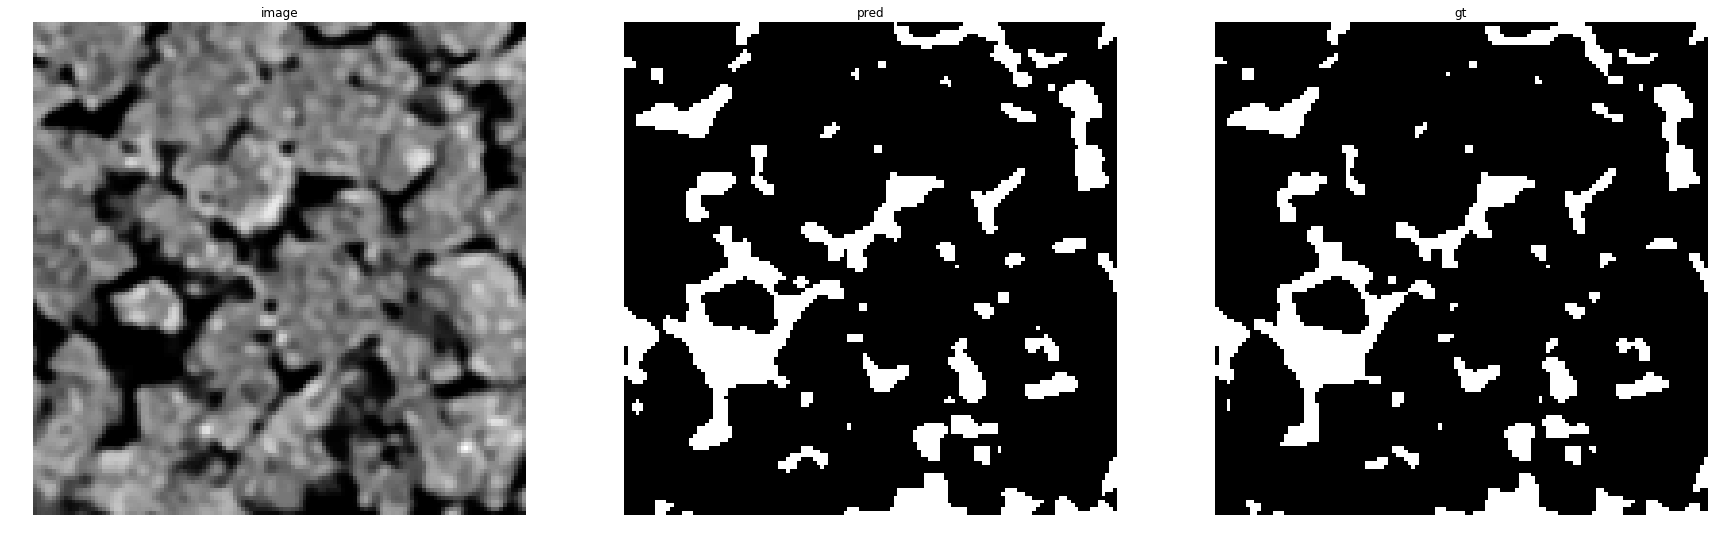

accuracy    : 0.97821044921875
precision   : 0.879874651810585
recall      : 0.9952737298148877
f1          : 0.9340232858990944
pr_auc      : 0.9964278217141964
iou         : 0.8762135922330098


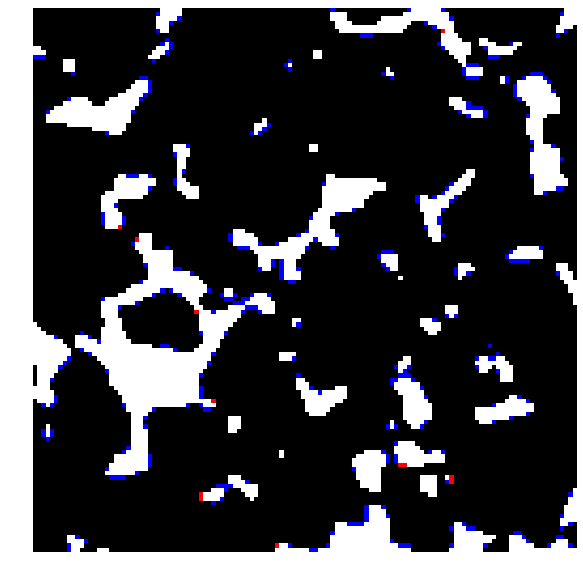

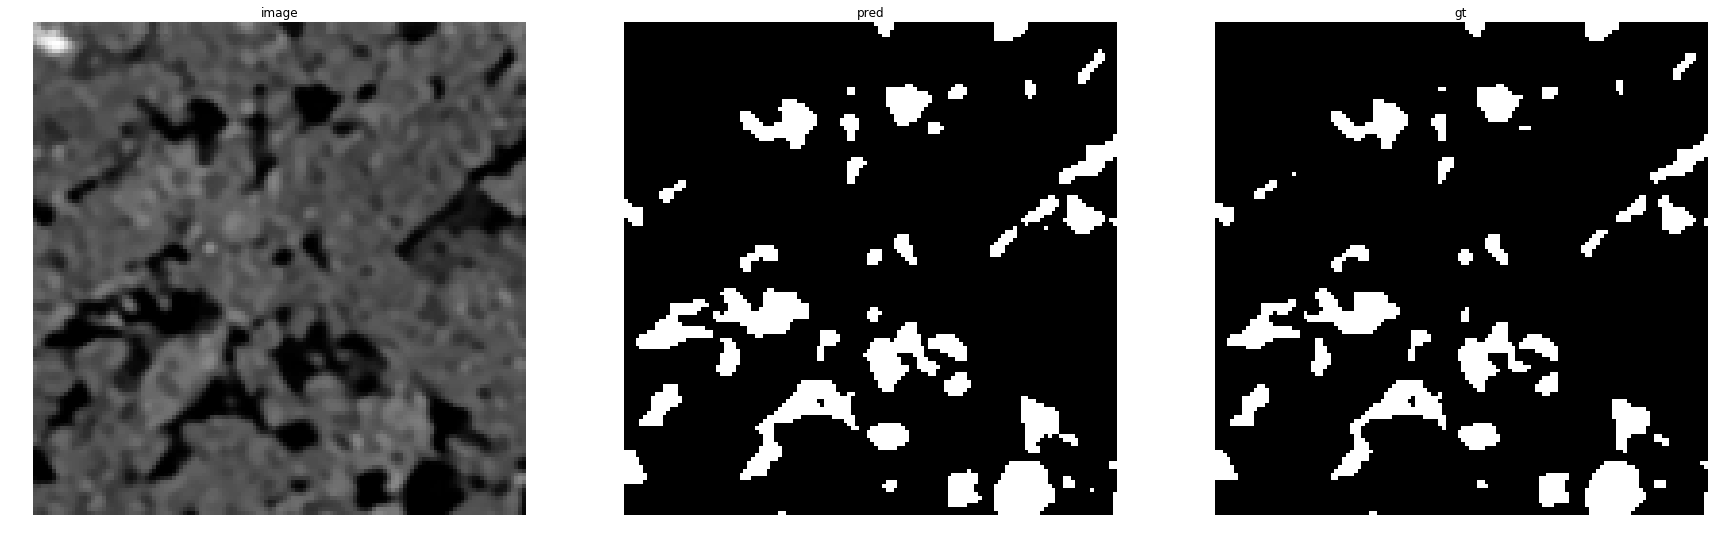

accuracy    : 0.98406982421875
precision   : 0.8798882681564246
recall      : 0.9984152139461173
f1          : 0.9354120267260579
pr_auc      : 0.9970745791571272
iou         : 0.8786610878661087


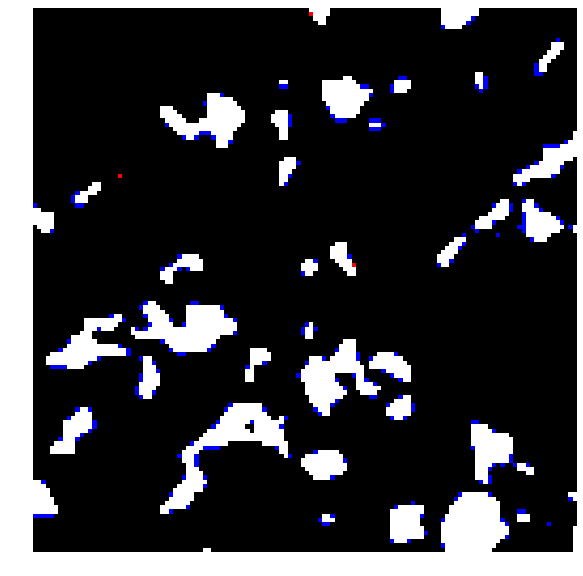

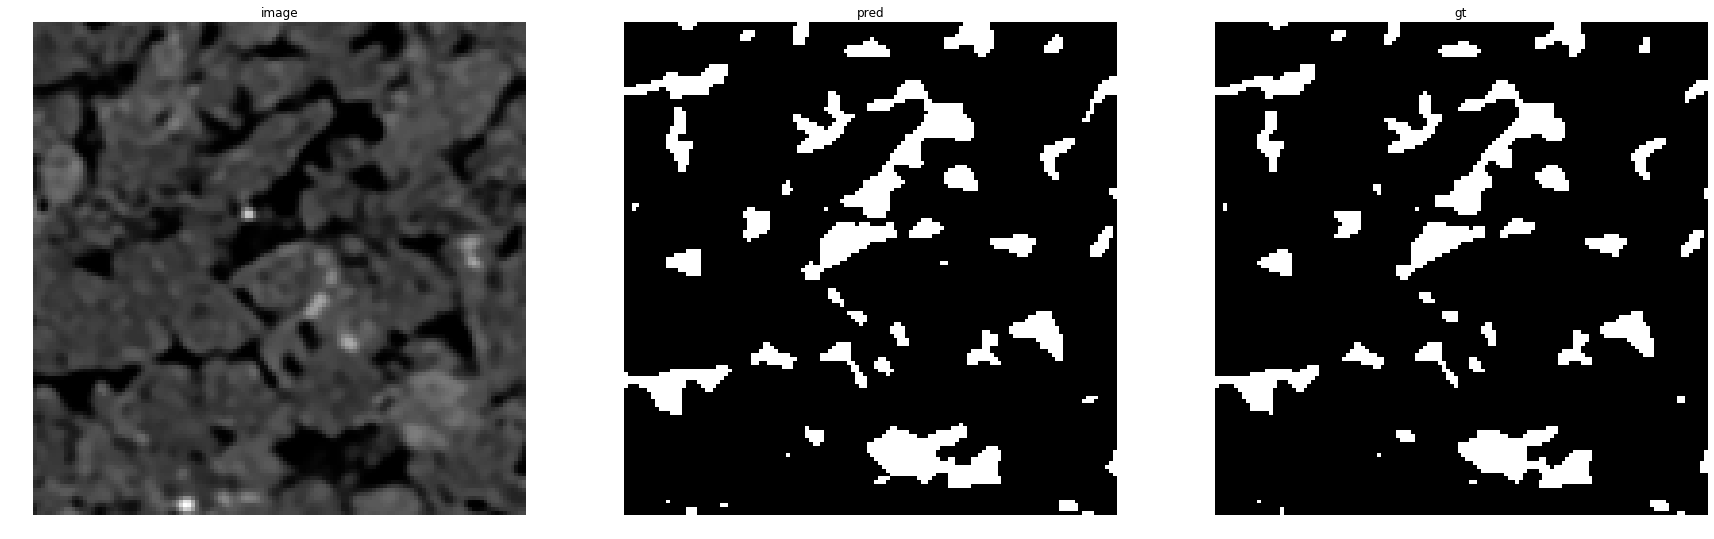

accuracy    : 0.98492431640625
precision   : 0.8865882352941177
recall      : 0.9968253968253968
f1          : 0.938480697384807
pr_auc      : 0.9965835661252752
iou         : 0.8840919755983107


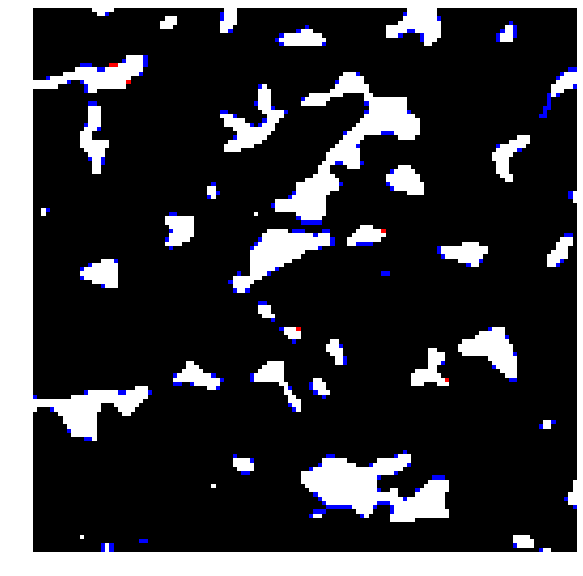

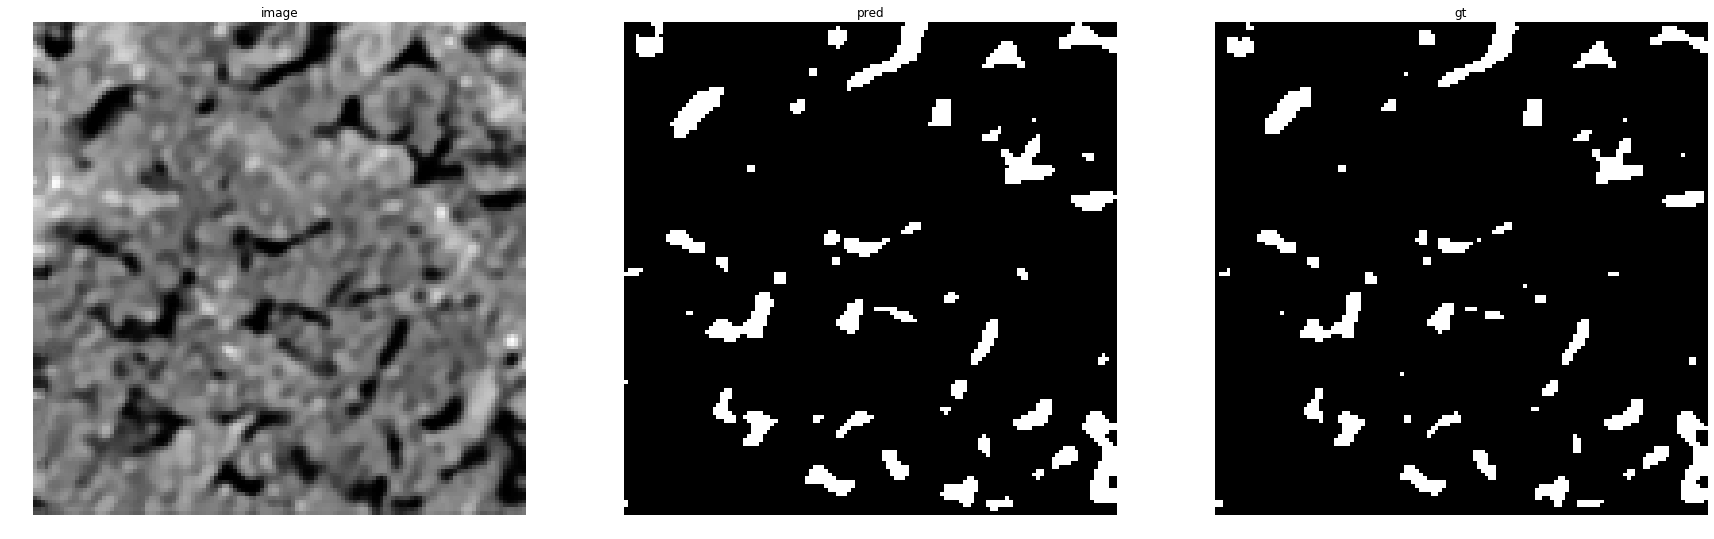

accuracy    : 0.9862060546875
precision   : 0.8430397727272727
recall      : 0.9958053691275168
f1          : 0.9130769230769231
pr_auc      : 0.993465669965611
iou         : 0.8400566171266808
Prediction fro Urna_30:


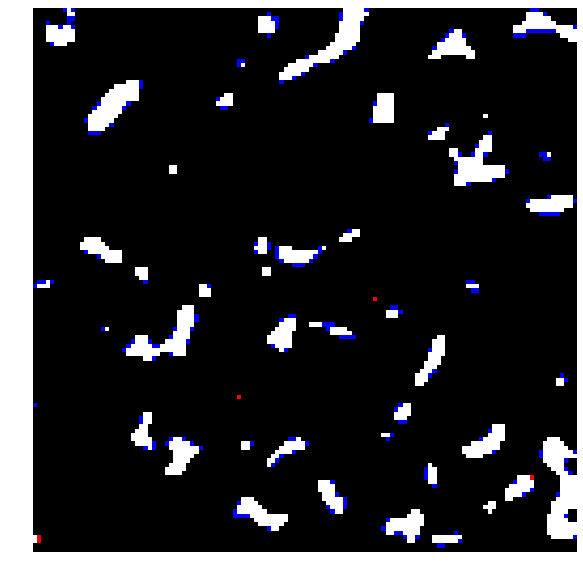

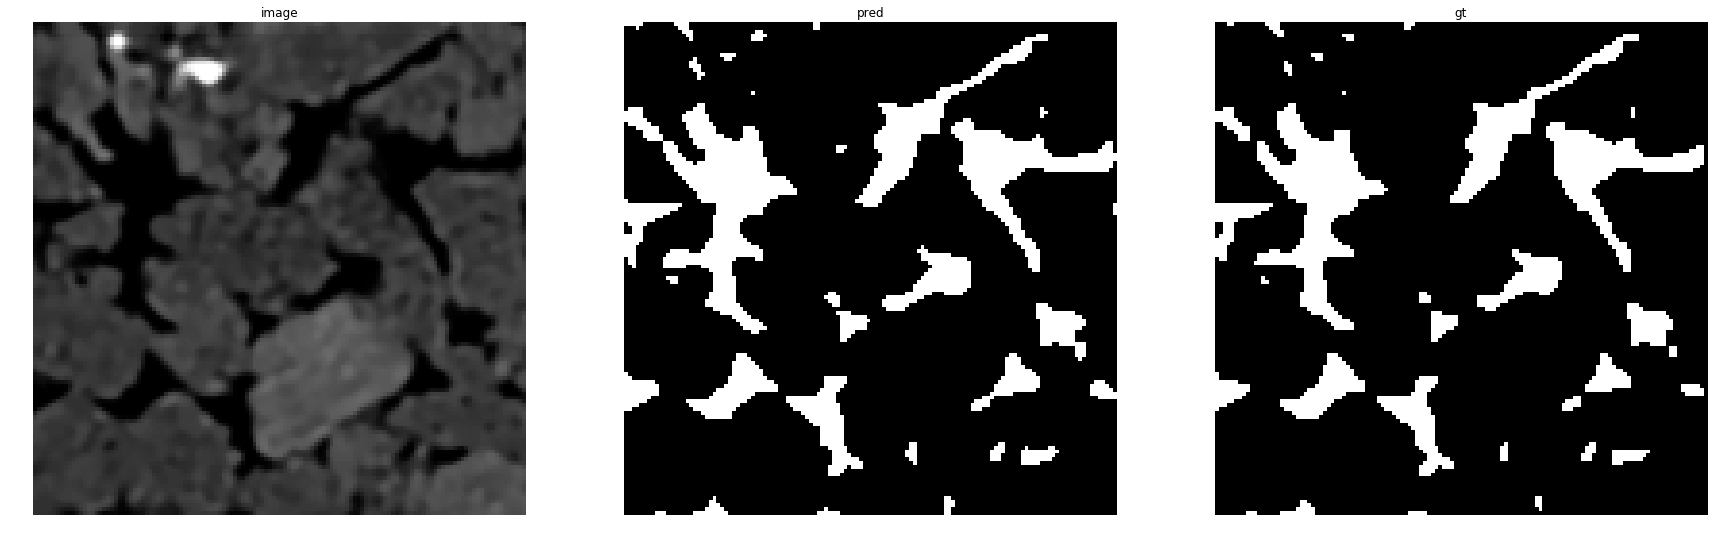

accuracy    : 0.9854736328125
precision   : 0.916011436740529
recall      : 0.9988308651597818
f1          : 0.9556301267710664
pr_auc      : 0.9980805319835122
iou         : 0.9150303463048911


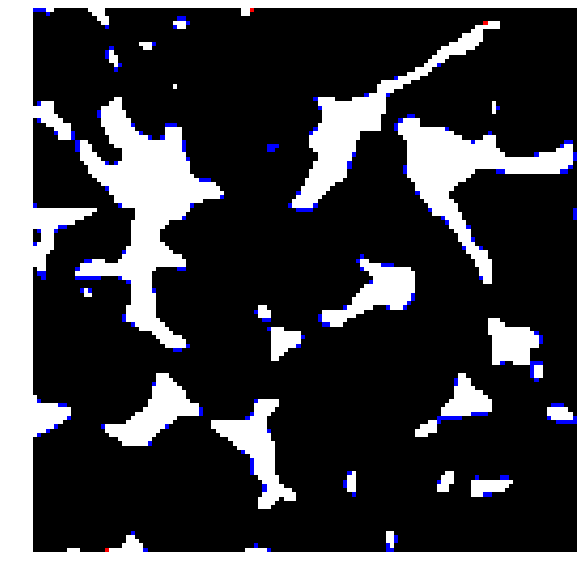

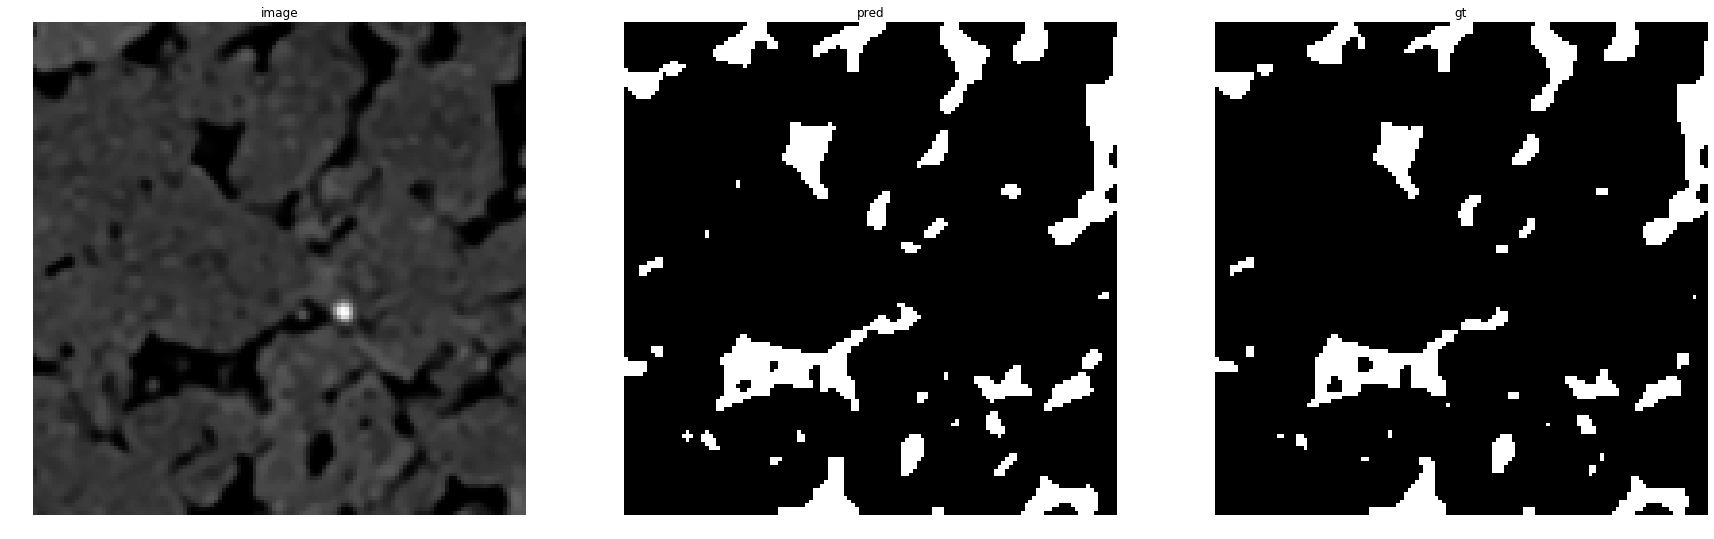

accuracy    : 0.98370361328125
precision   : 0.8746478873239436
recall      : 1.0
f1          : 0.9331329827197595
pr_auc      : 0.9974390626480205
iou         : 0.8746478873239436


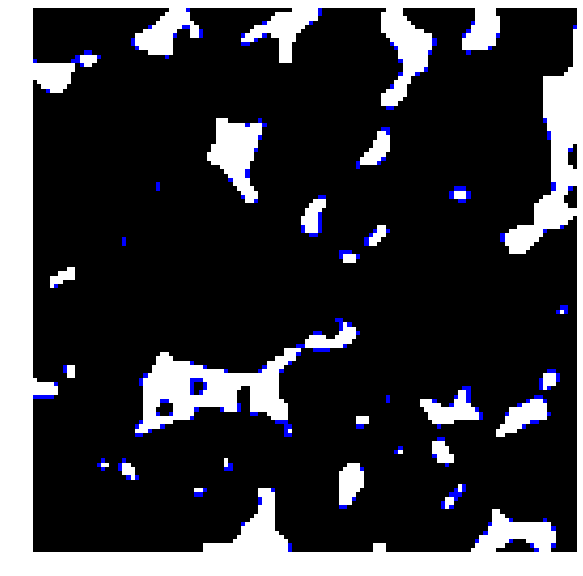

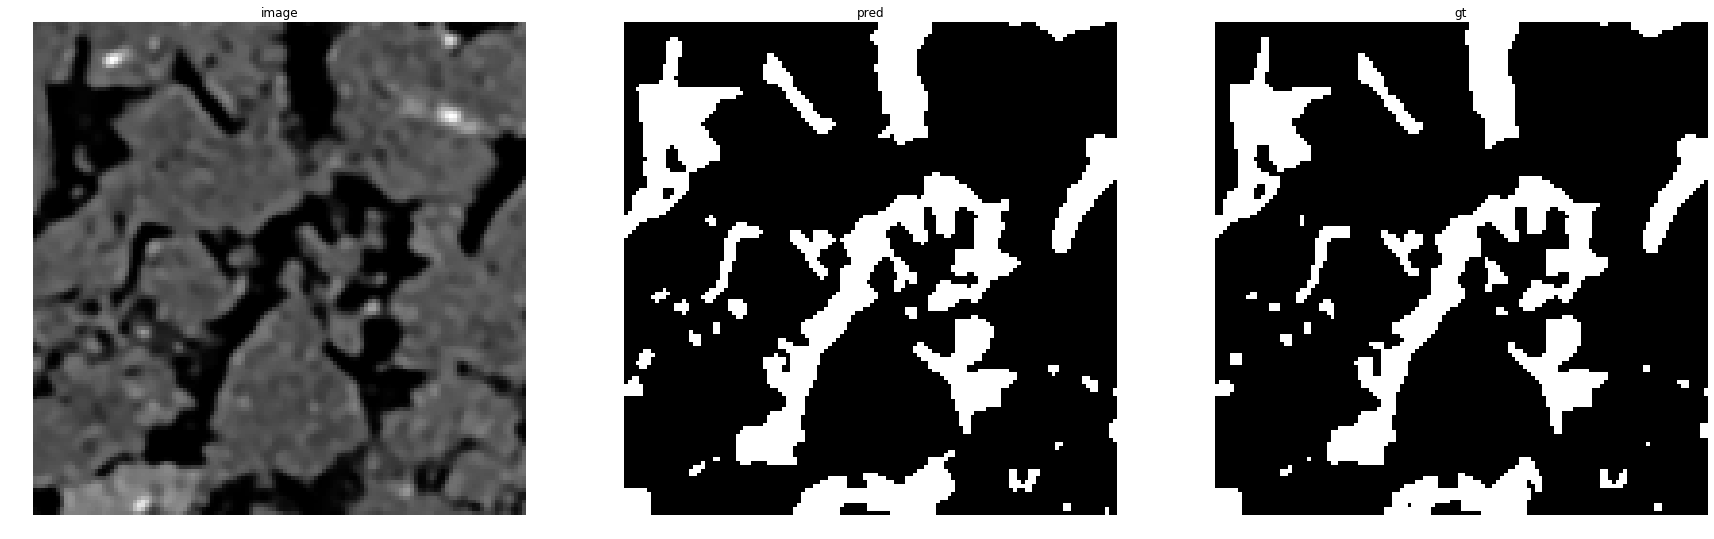

accuracy    : 0.9796142578125
precision   : 0.909567135373587
recall      : 0.9981845688350983
f1          : 0.9518176572417772
pr_auc      : 0.9980443836418073
iou         : 0.9080649600880815


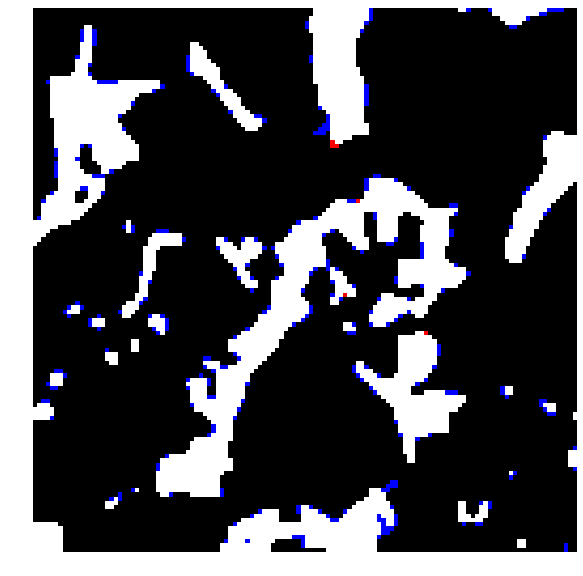

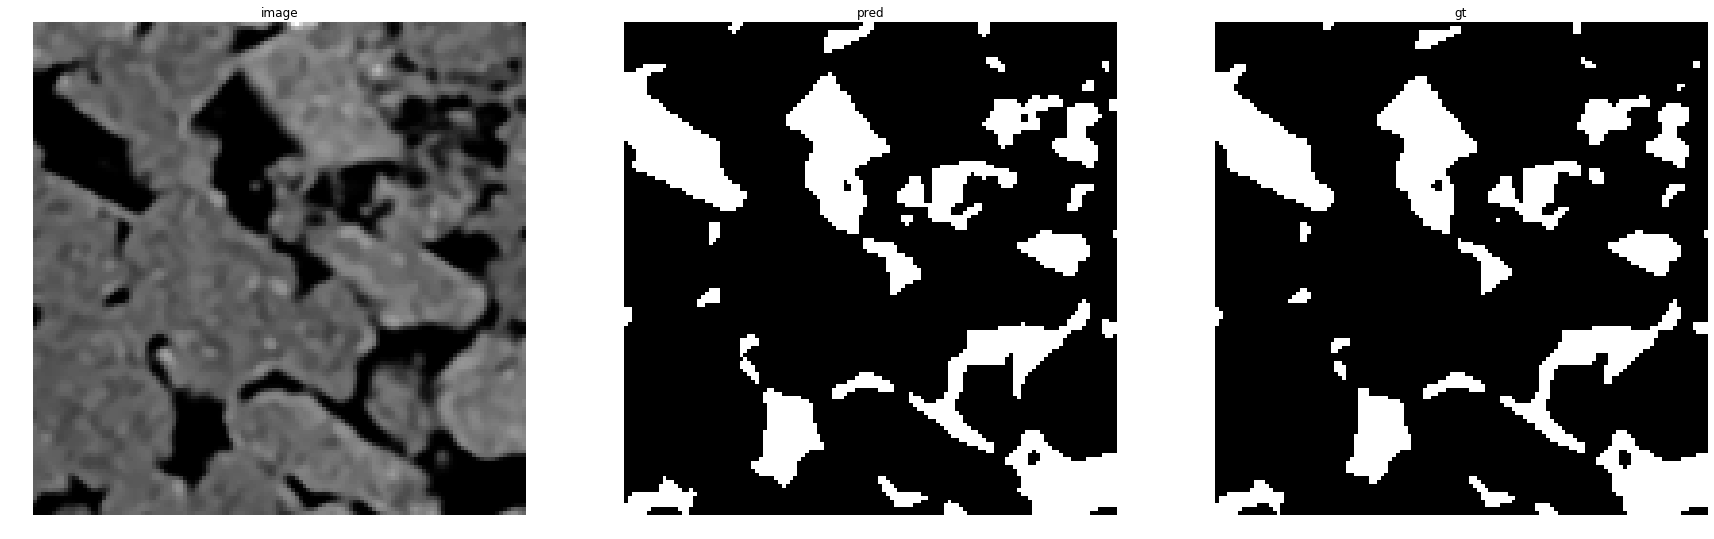

accuracy    : 0.9822998046875
precision   : 0.9171788118232368
recall      : 0.9977714103788602
f1          : 0.9557792009759074
pr_auc      : 0.9982791928934723
iou         : 0.915303738317757


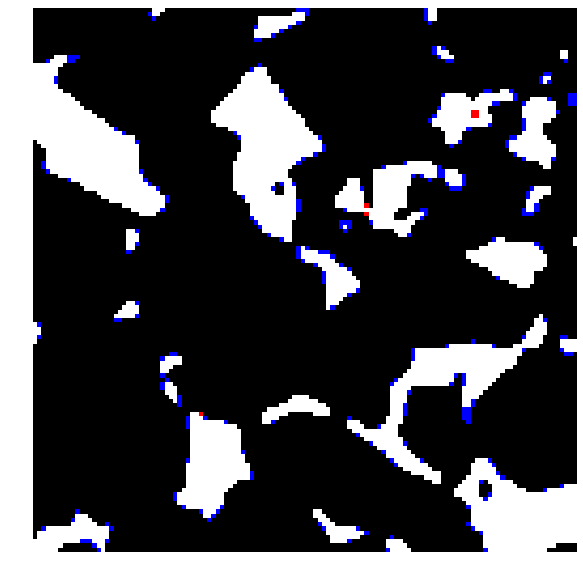

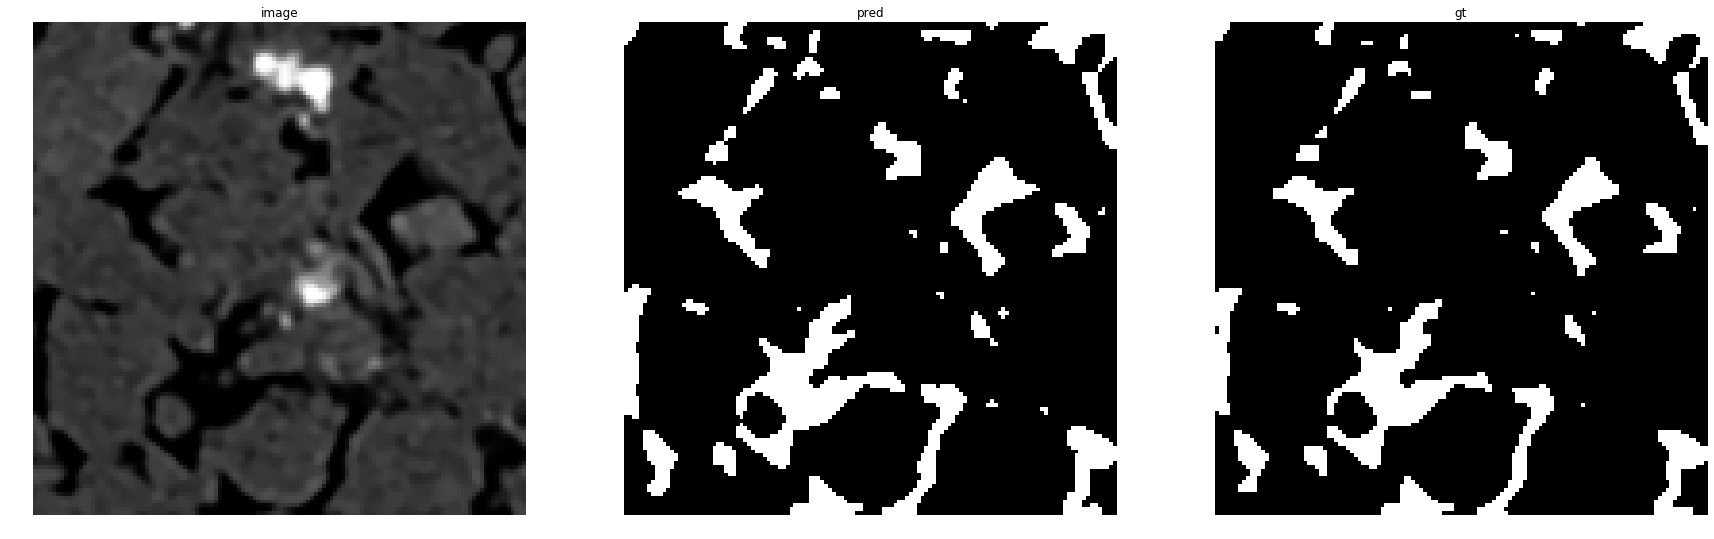

accuracy    : 0.98199462890625
precision   : 0.884006334125099
recall      : 0.9991051454138703
f1          : 0.93803822726318
pr_auc      : 0.9970711437437666
iou         : 0.8833069620253164


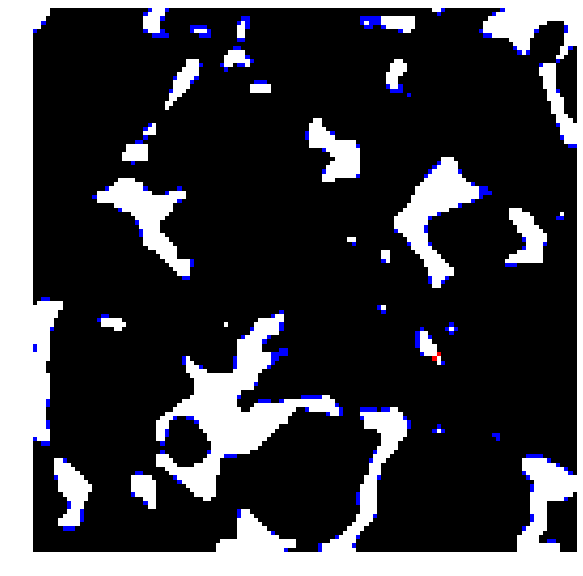

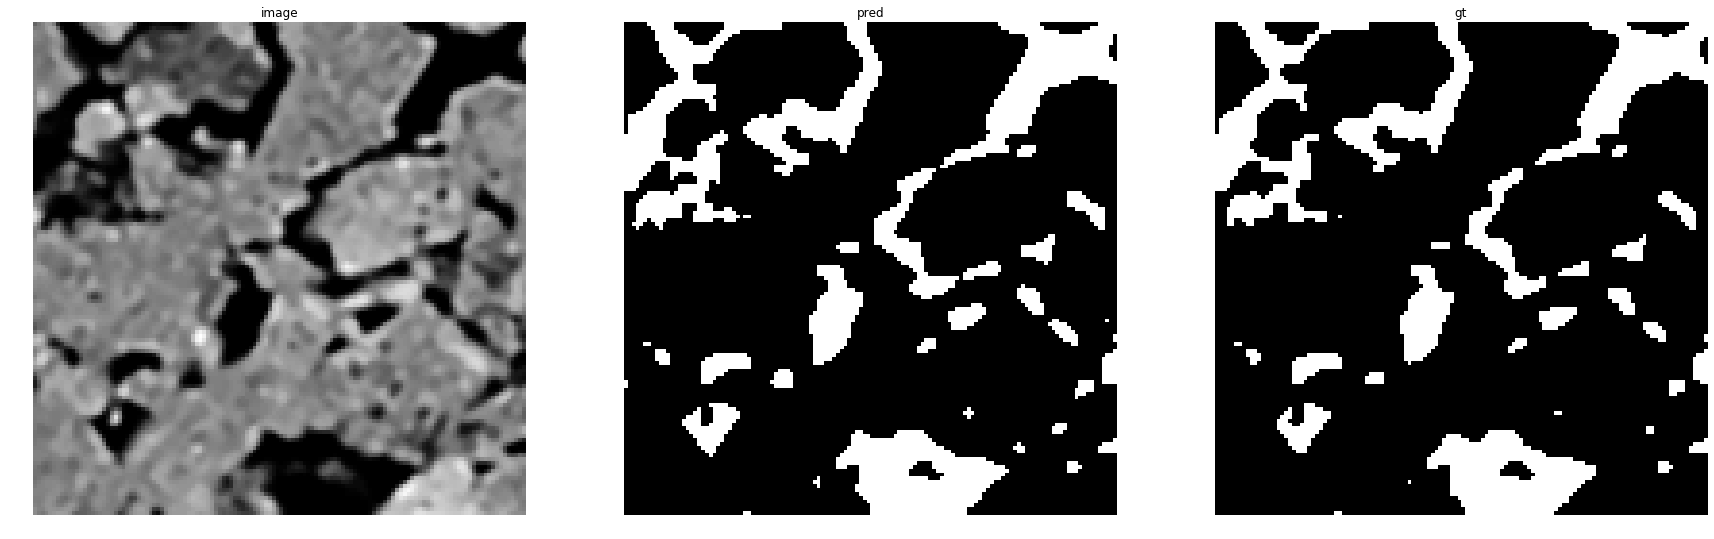

accuracy    : 0.98358154296875
precision   : 0.920997920997921
recall      : 0.9990335051546392
f1          : 0.9584299180961212
pr_auc      : 0.9978253835009745
iou         : 0.9201780415430267


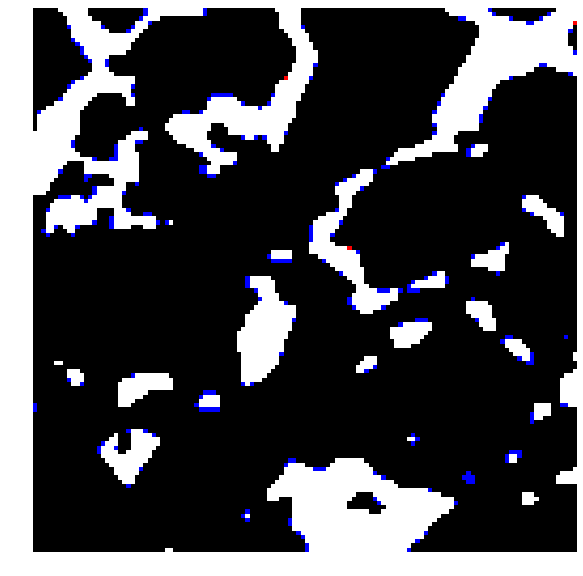

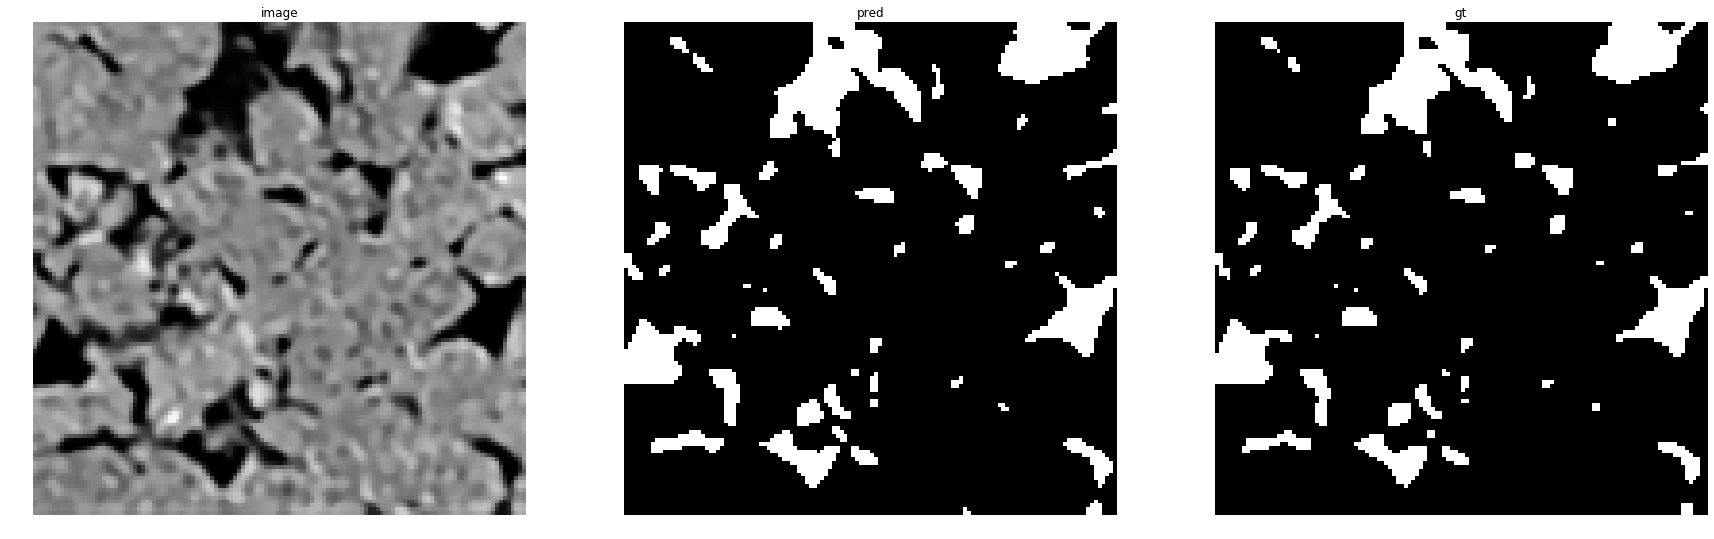

accuracy    : 0.9853515625
precision   : 0.8998705222270177
recall      : 0.9961777353081701
f1          : 0.9455782312925171
pr_auc      : 0.9969523256598949
iou         : 0.896774193548387


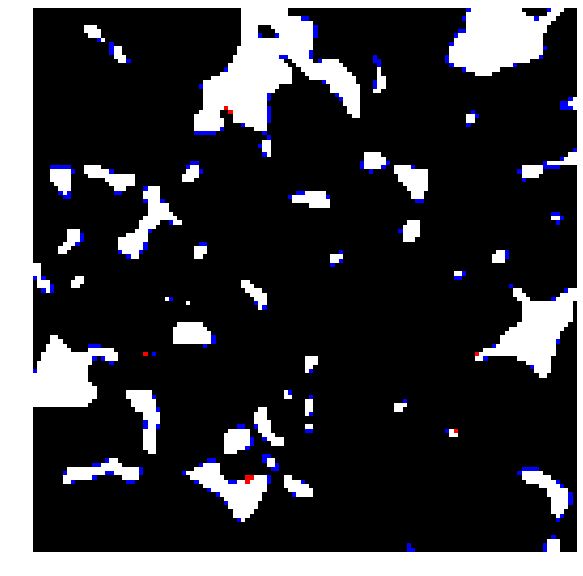

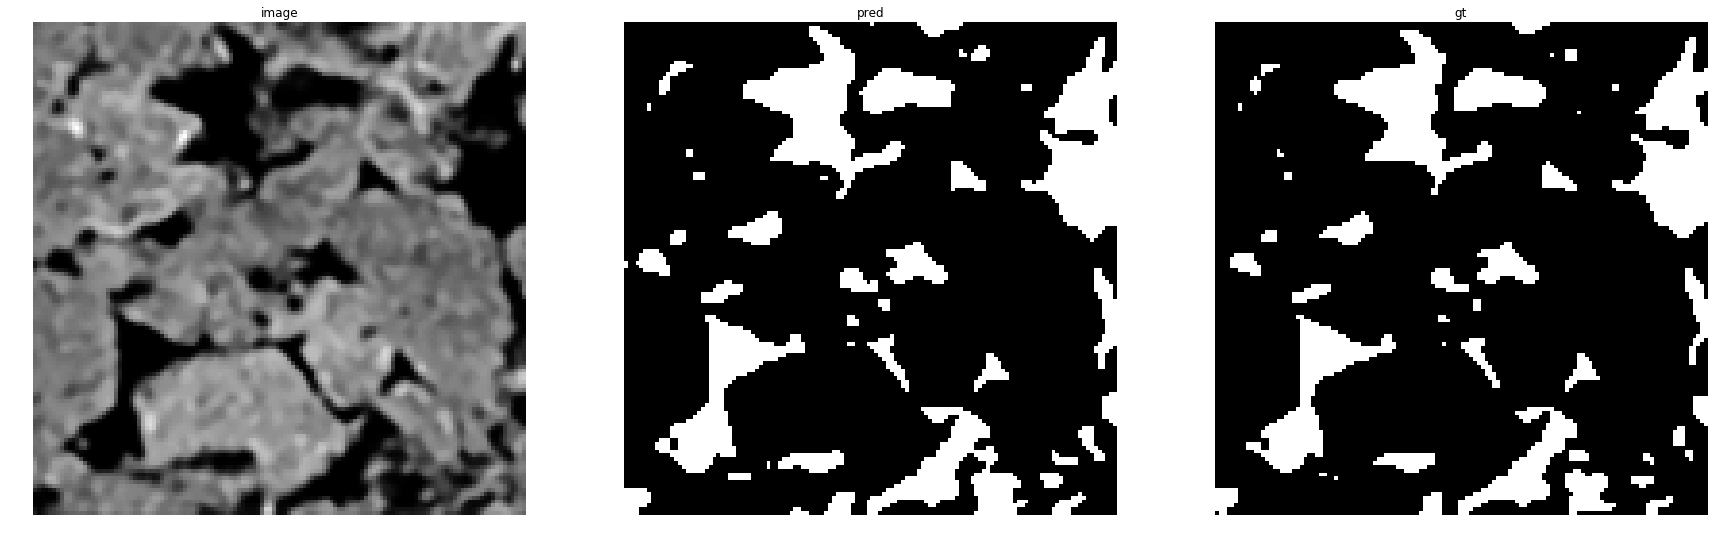

accuracy    : 0.97613525390625
precision   : 0.8872290568248389
recall      : 0.9980230642504119
f1          : 0.9393704450302373
pr_auc      : 0.9969565490396156
iou         : 0.8856725146198831


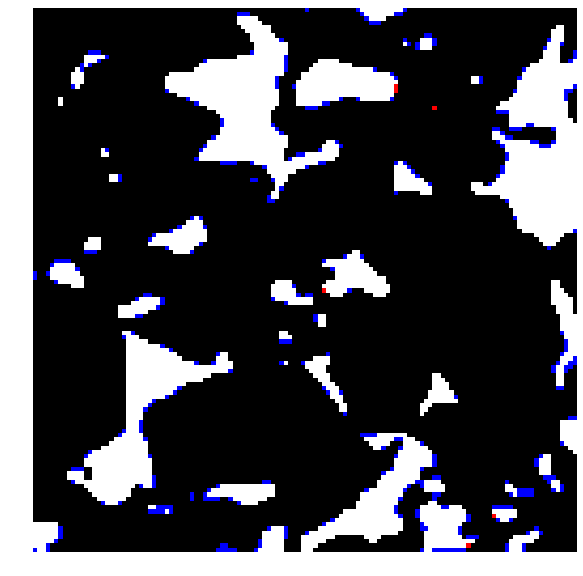

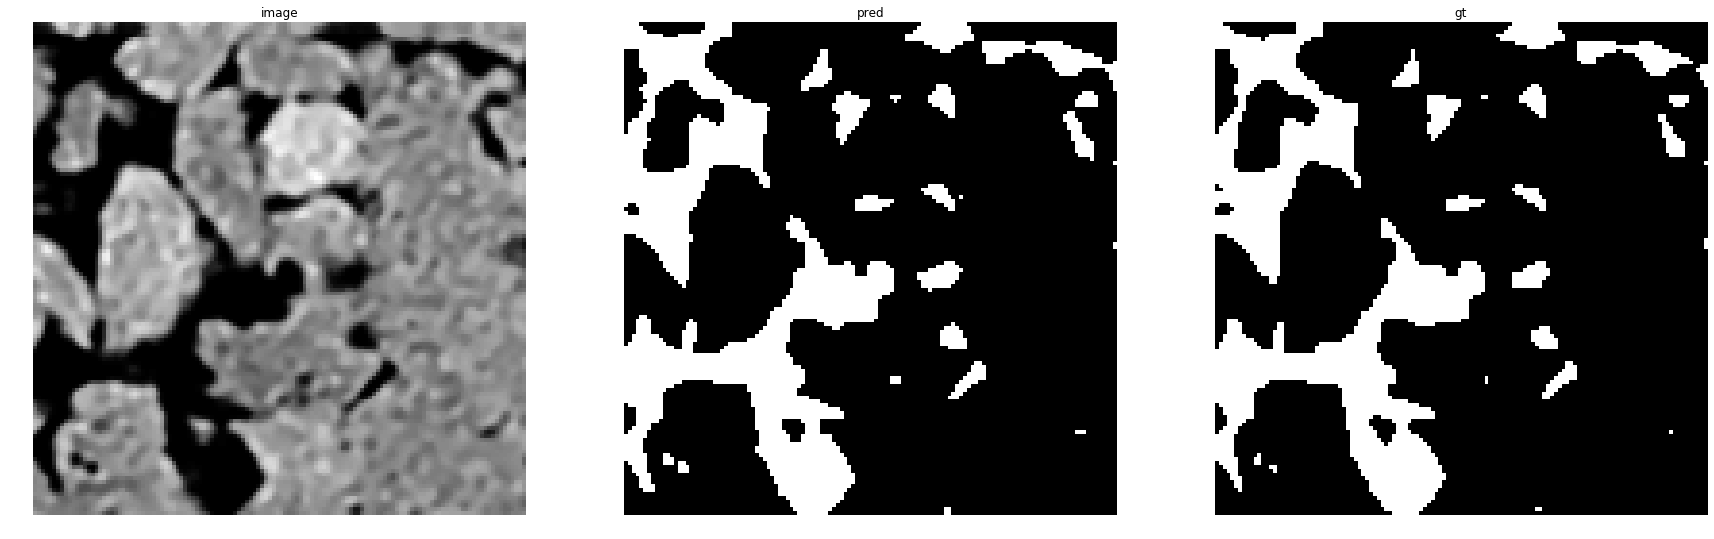

accuracy    : 0.9857177734375
precision   : 0.9376723662437948
recall      : 0.9976525821596244
f1          : 0.9667330110889962
pr_auc      : 0.9986810900906048
iou         : 0.9356081452944414


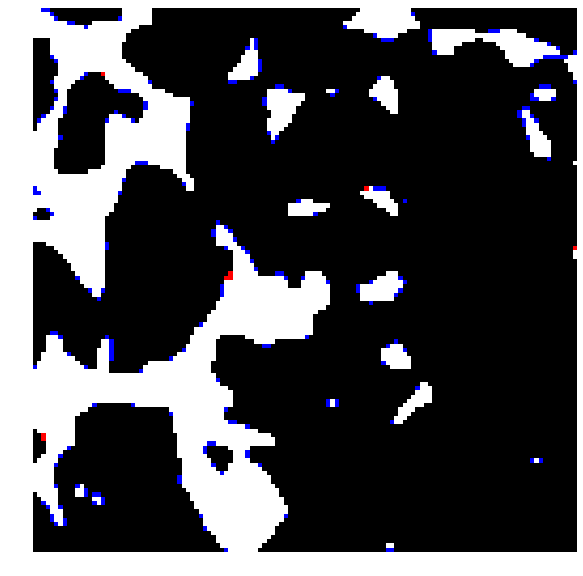

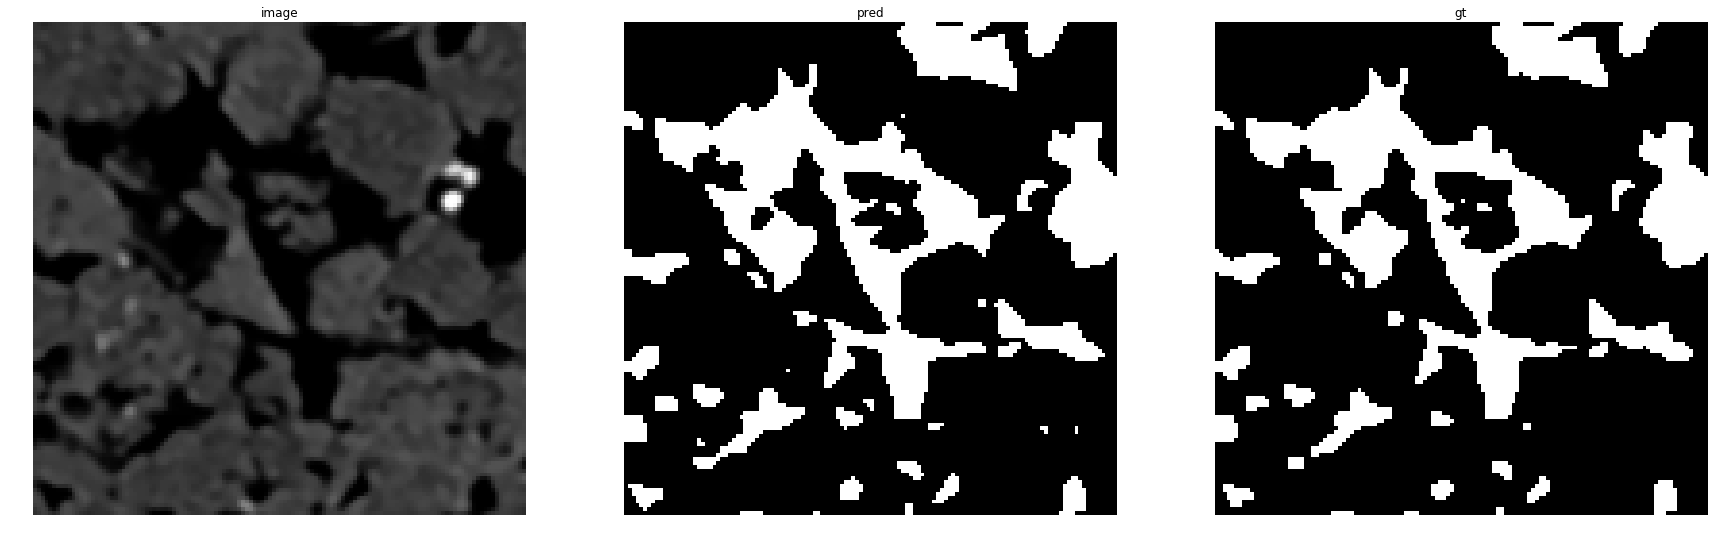

accuracy    : 0.9818115234375
precision   : 0.9303268909568122
recall      : 0.9984635083226633
f1          : 0.963191699604743
pr_auc      : 0.9989155415475501
iou         : 0.9289969025494401
Prediction fro Urna_34:


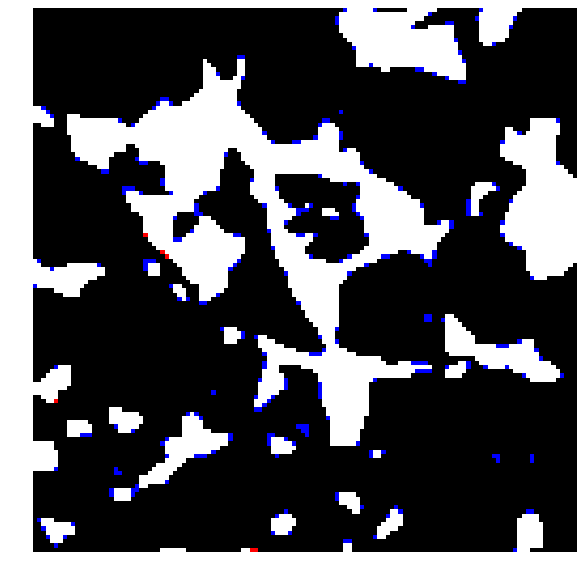

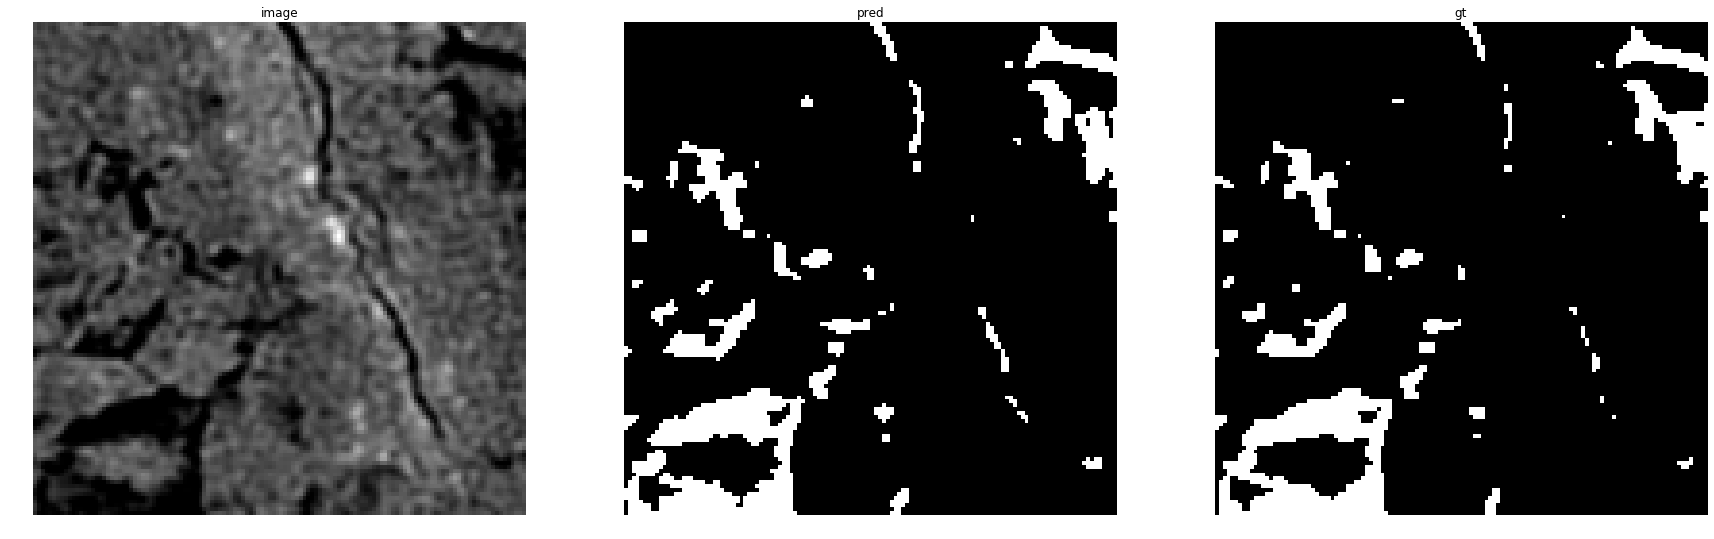

accuracy    : 0.98468017578125
precision   : 0.8959694989106753
recall      : 0.9648093841642229
f1          : 0.9291160689070884
pr_auc      : 0.9886727482162492
iou         : 0.8676160337552743


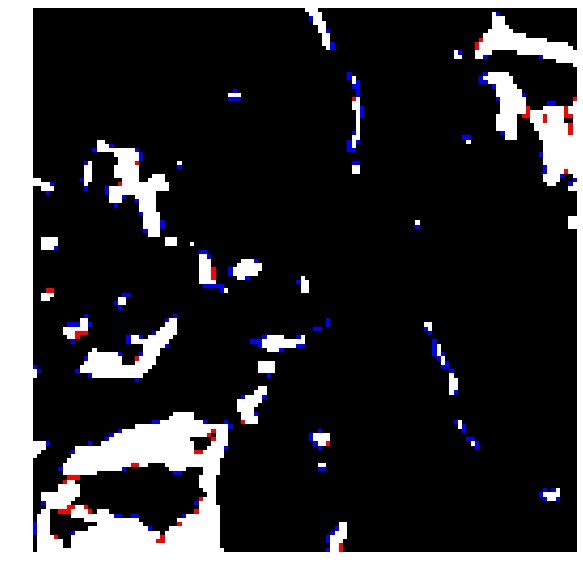

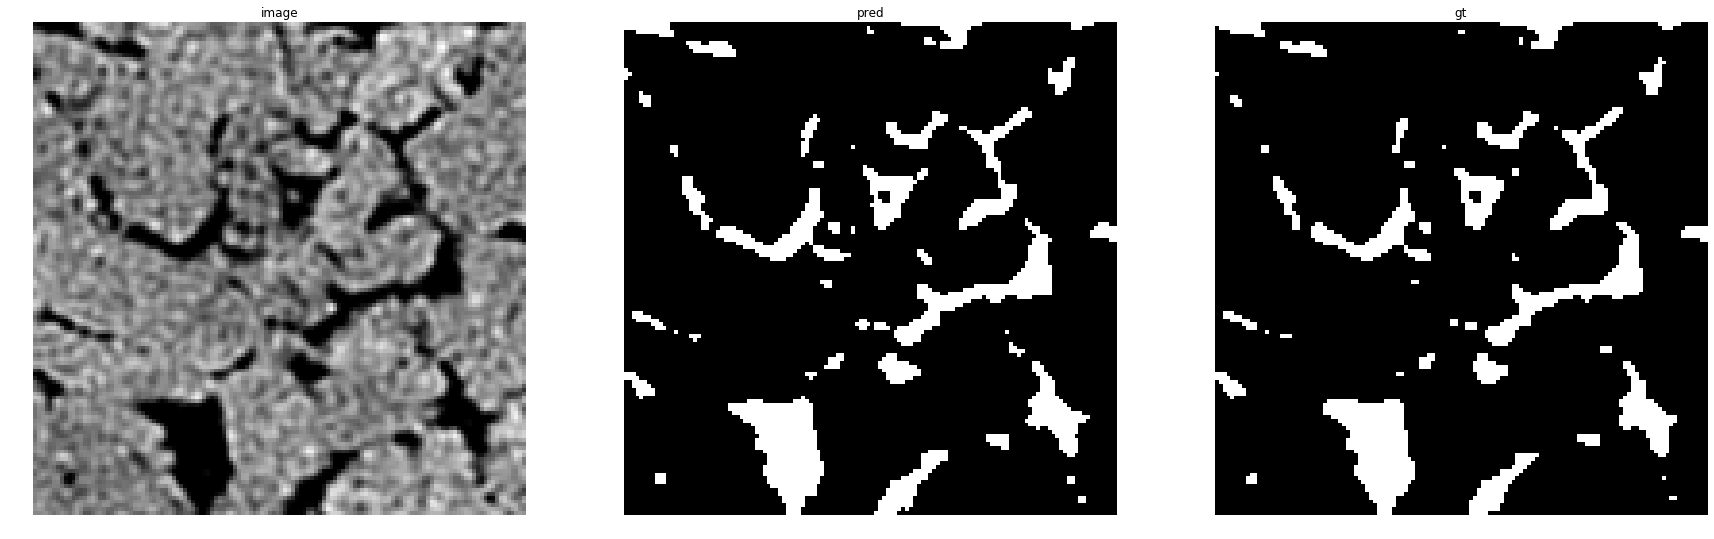

accuracy    : 0.9866943359375
precision   : 0.9157999009410599
recall      : 0.9746968898260411
f1          : 0.9443309499489275
pr_auc      : 0.9940034990463334
iou         : 0.8945331398161587


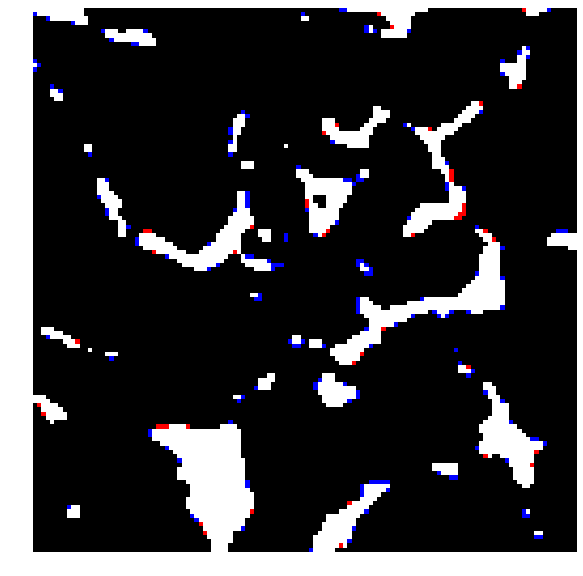

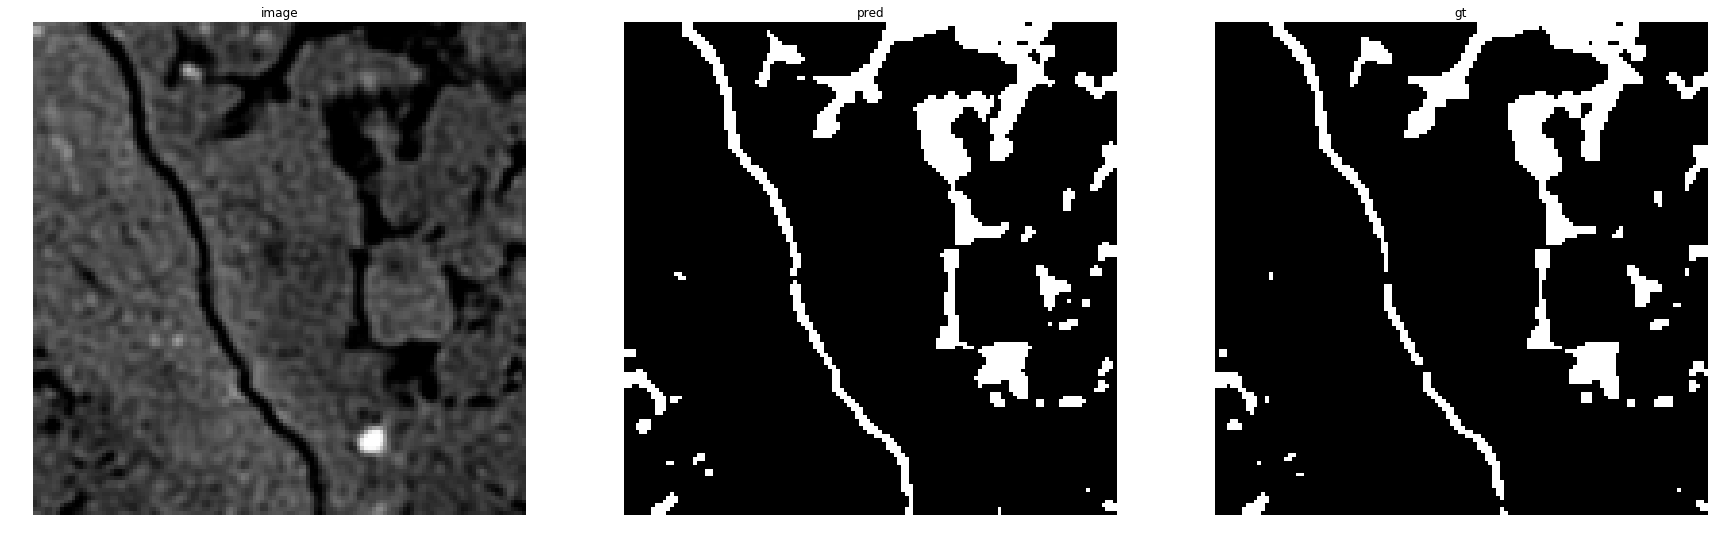

accuracy    : 0.98468017578125
precision   : 0.9063915450427781
recall      : 0.9651661307609861
f1          : 0.9348559563976123
pr_auc      : 0.9899508173231195
iou         : 0.8776803118908382


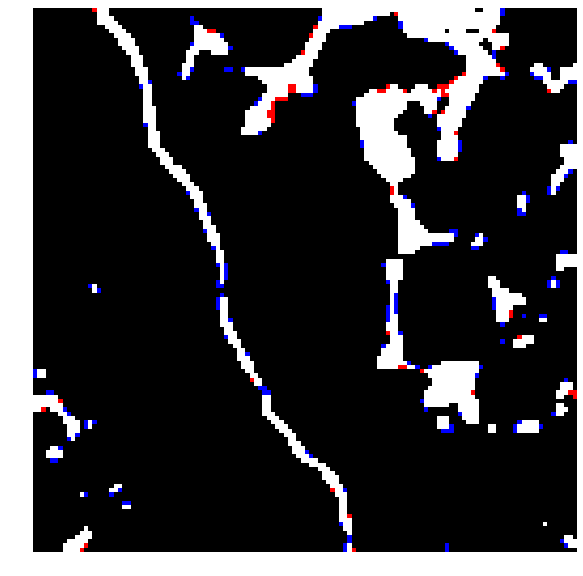

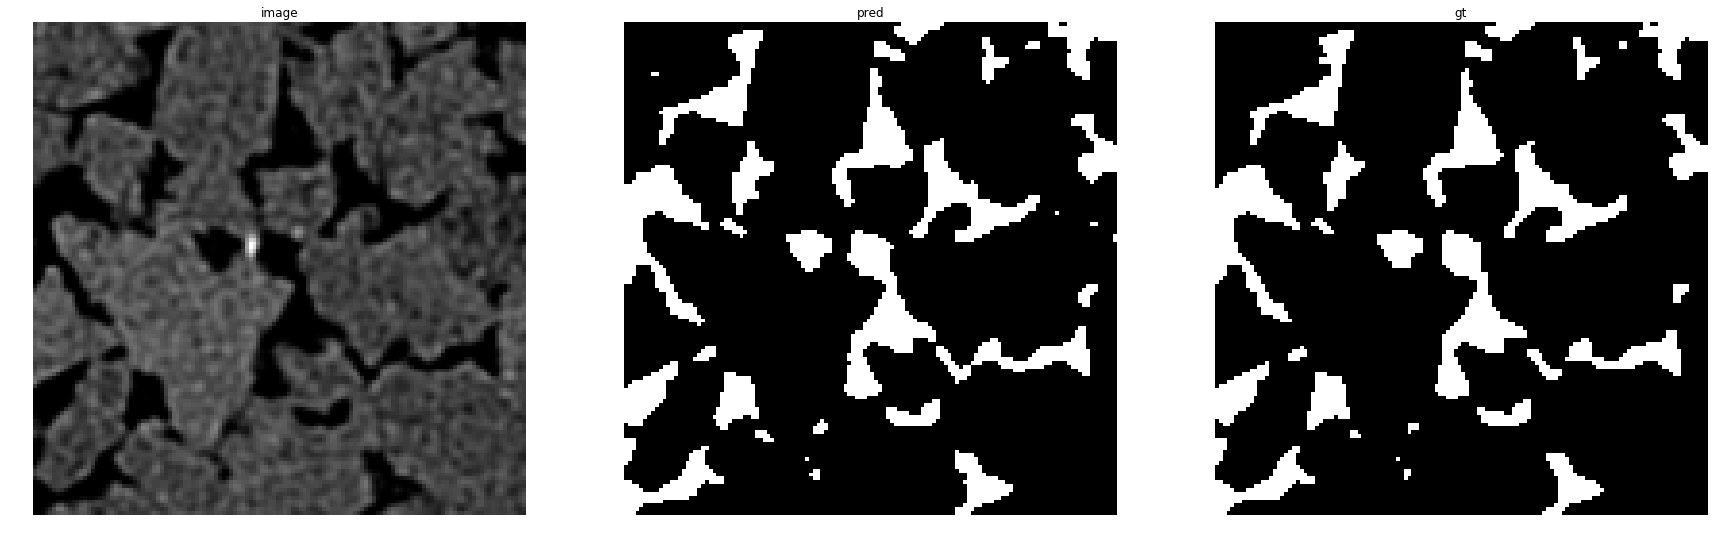

accuracy    : 0.9864501953125
precision   : 0.9383934649421375
recall      : 0.9853466761972838
f1          : 0.9612970711297071
pr_auc      : 0.9963790632532775
iou         : 0.9254783484390735


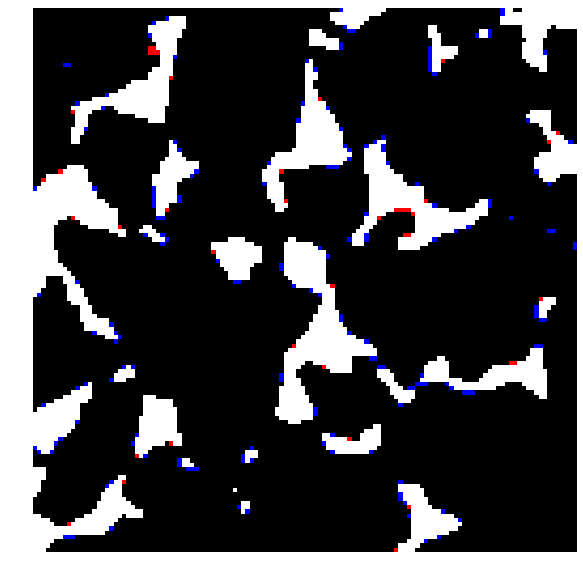

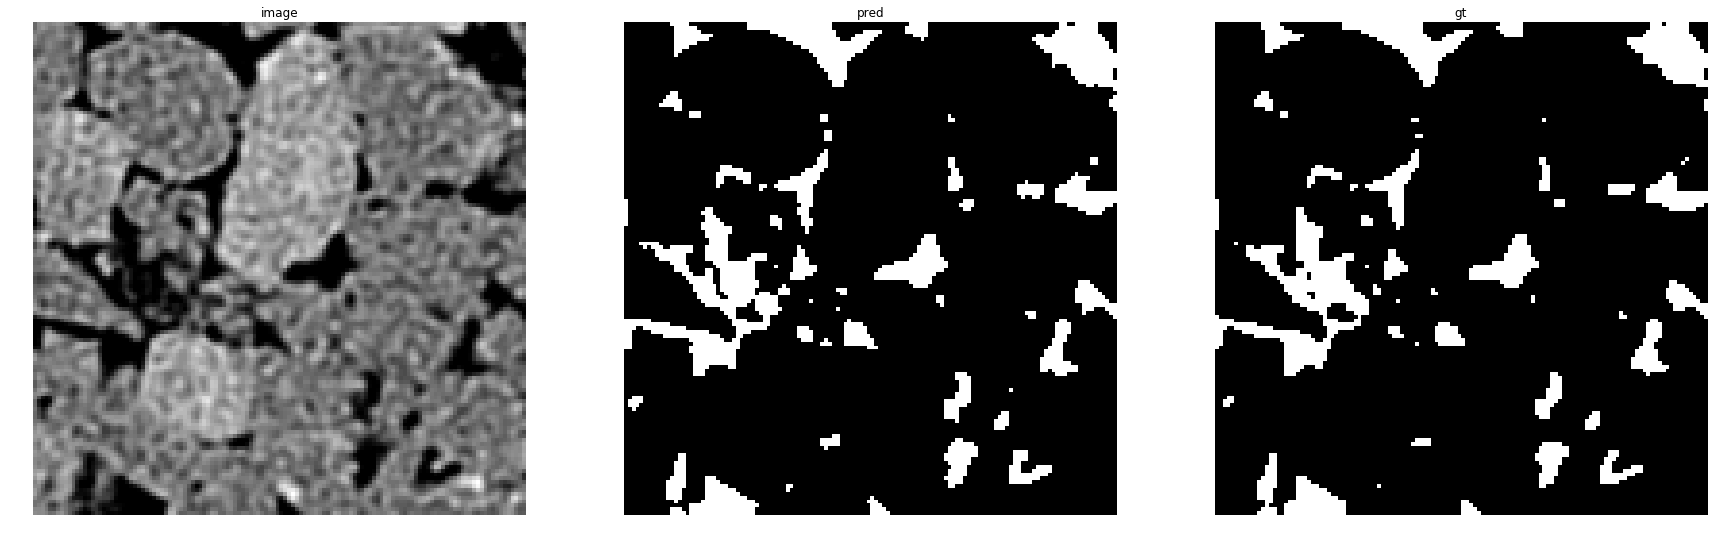

accuracy    : 0.98577880859375
precision   : 0.9159741458910434
recall      : 0.9749385749385749
f1          : 0.9445370149964295
pr_auc      : 0.9929516526379802
iou         : 0.8949030221019395


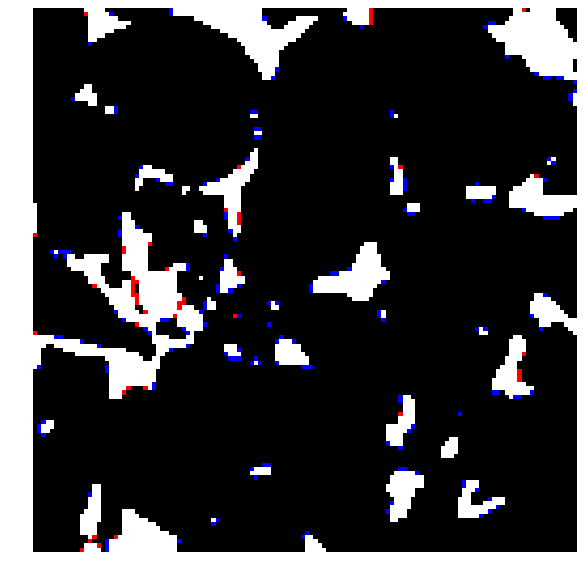

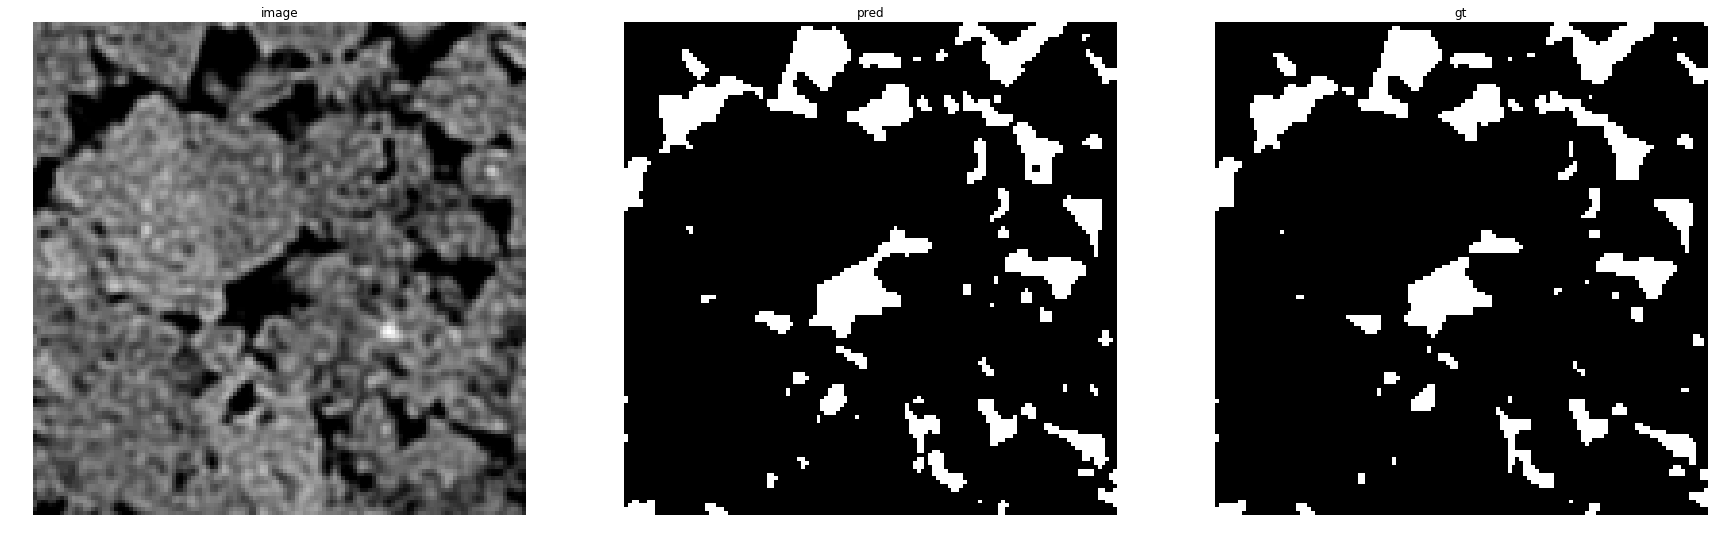

accuracy    : 0.982666015625
precision   : 0.9024179620034543
recall      : 0.972998137802607
f1          : 0.9363799283154123
pr_auc      : 0.9912297263404303
iou         : 0.8803706823925863


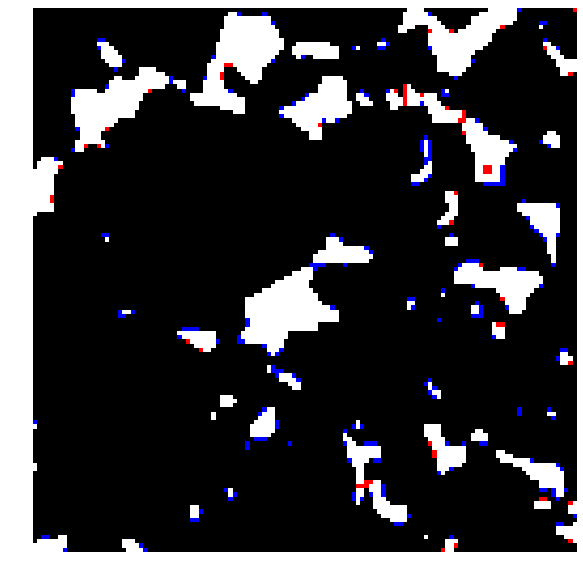

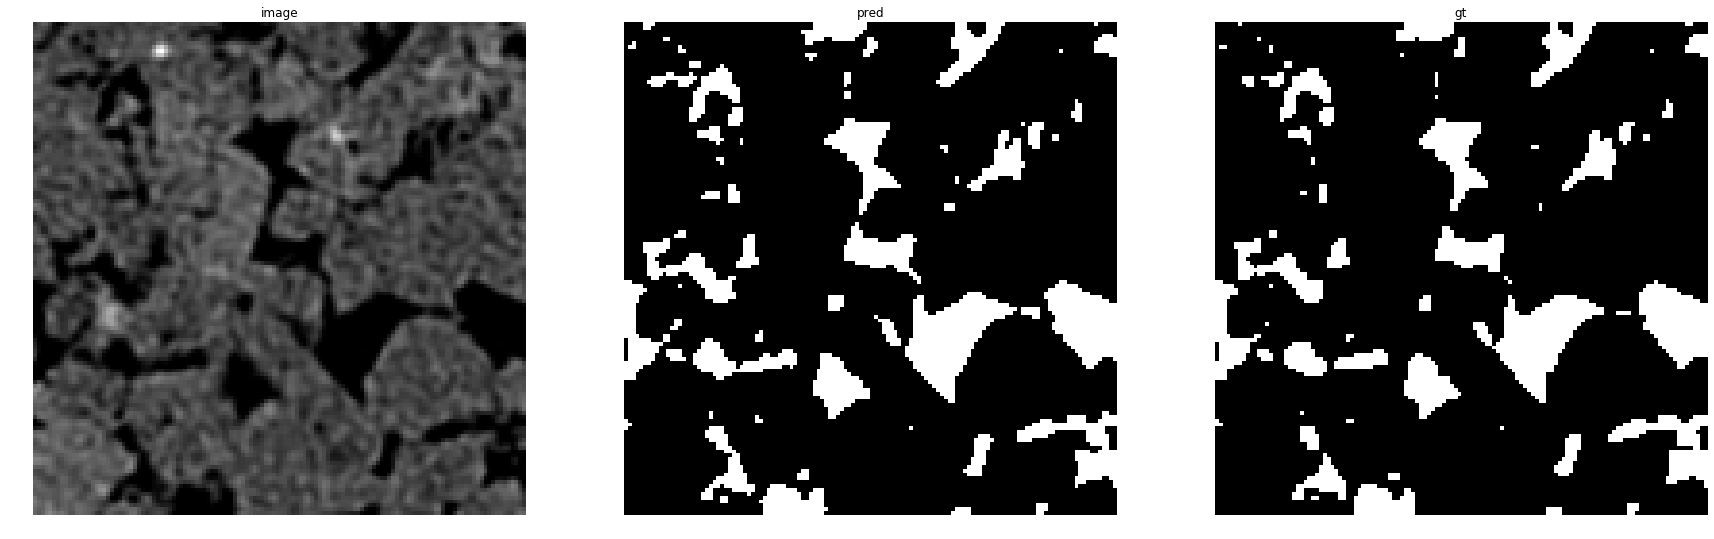

accuracy    : 0.98193359375
precision   : 0.9184046834979875
recall      : 0.9717382888114595
f1          : 0.9443190368698268
pr_auc      : 0.9935601500258324
iou         : 0.894511760513186


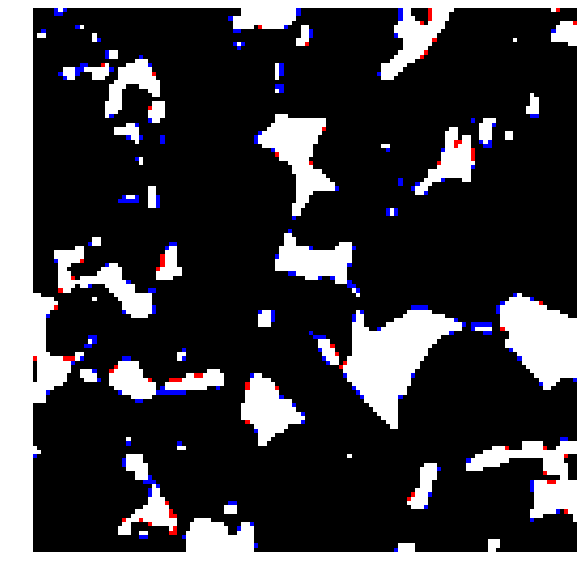

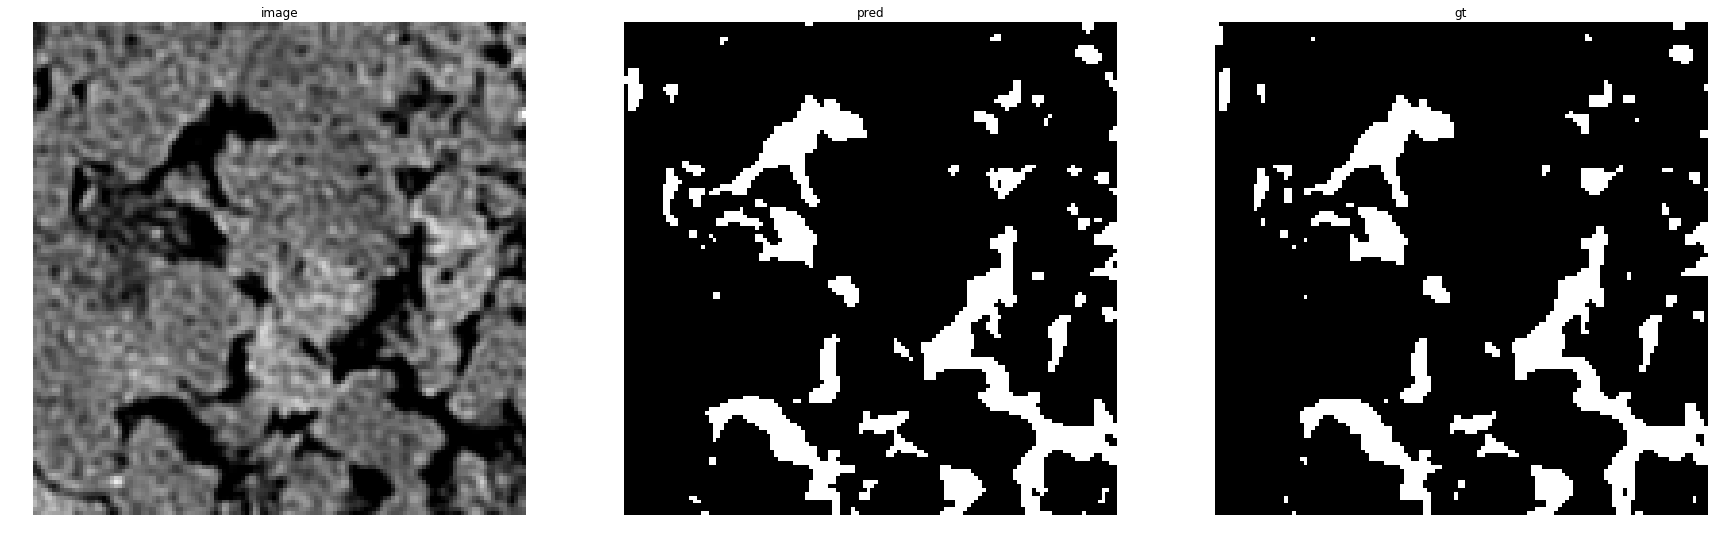

accuracy    : 0.981201171875
precision   : 0.8996328029375765
recall      : 0.972651080723423
f1          : 0.9347181008902078
pr_auc      : 0.9910407677841714
iou         : 0.8774373259052924


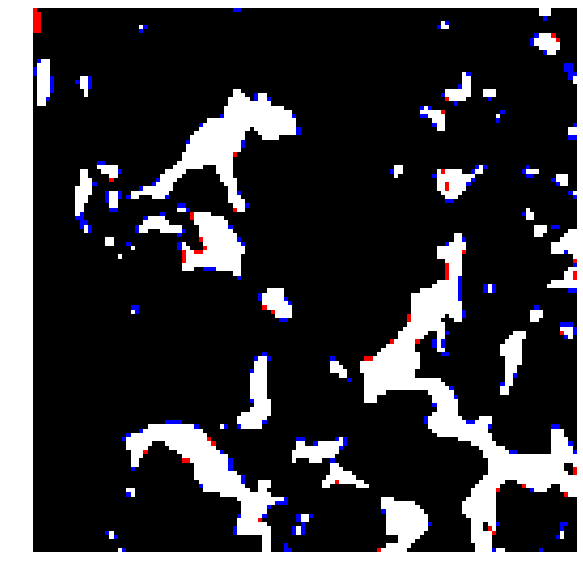

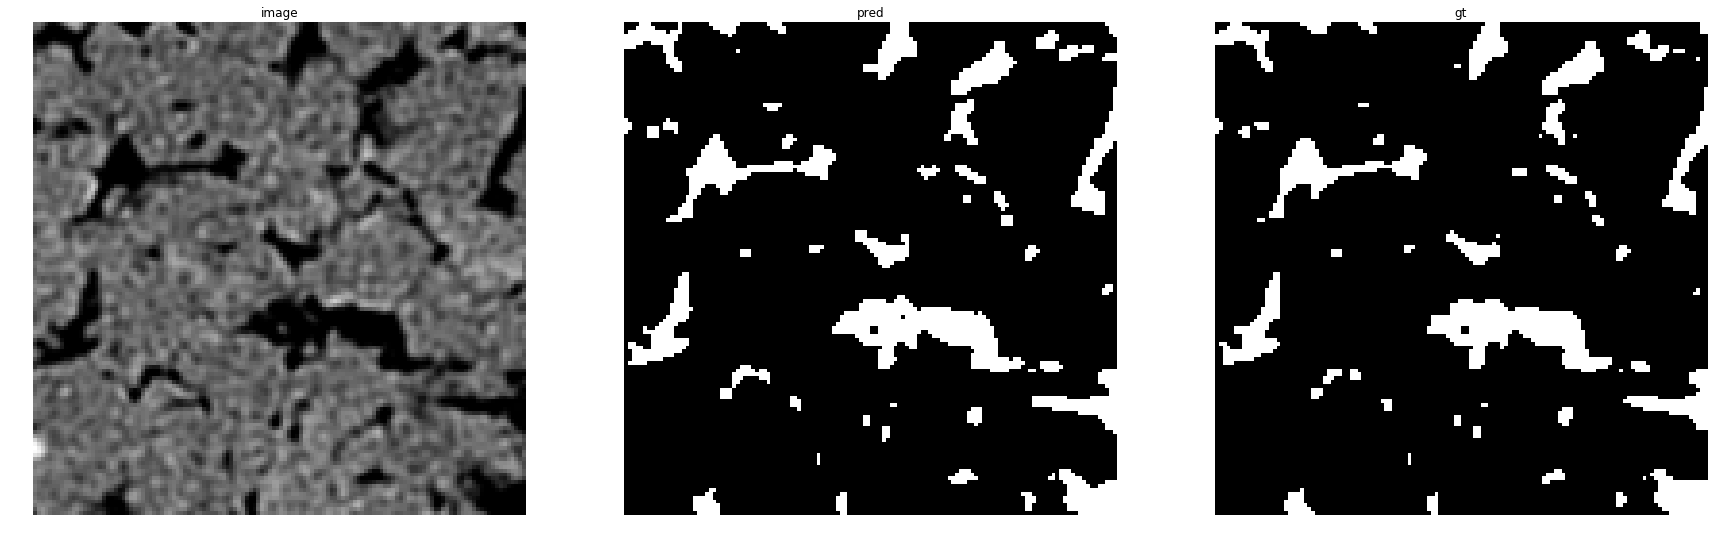

accuracy    : 0.9854736328125
precision   : 0.9056420233463035
recall      : 0.9769150052465897
f1          : 0.9399293286219081
pr_auc      : 0.9912679114959485
iou         : 0.8866666666666667


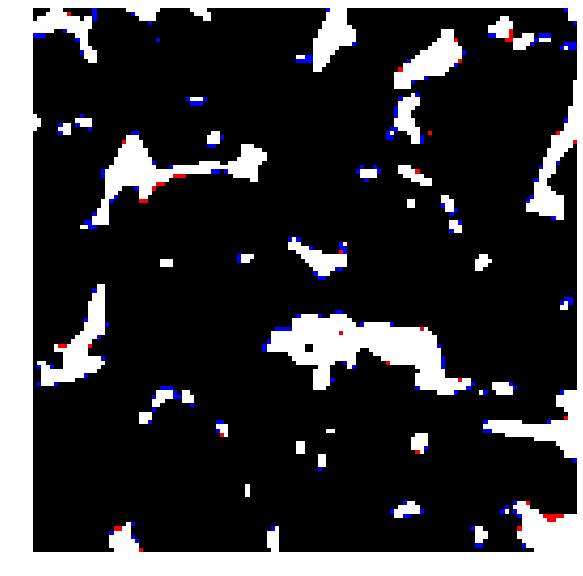

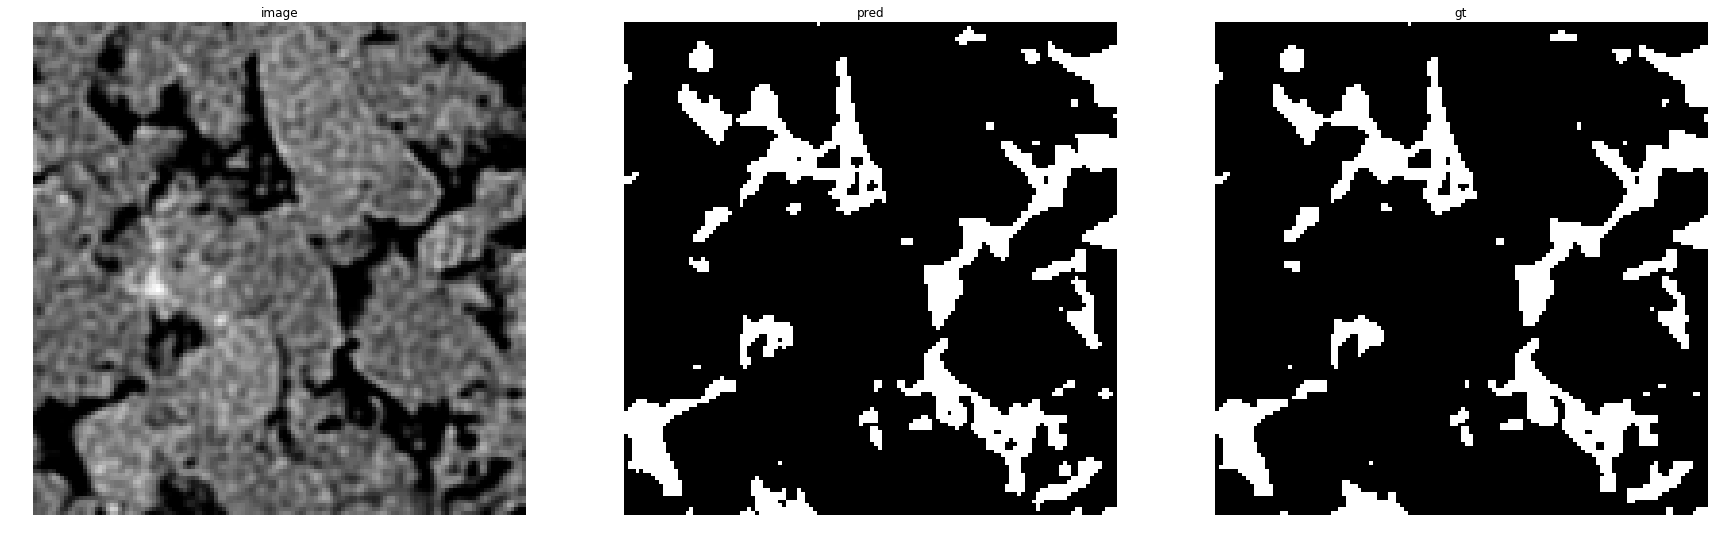

accuracy    : 0.9852294921875
precision   : 0.9403202328966521
recall      : 0.9706987227648385
f1          : 0.955268022181146
pr_auc      : 0.9946140593490719
iou         : 0.9143665958952583


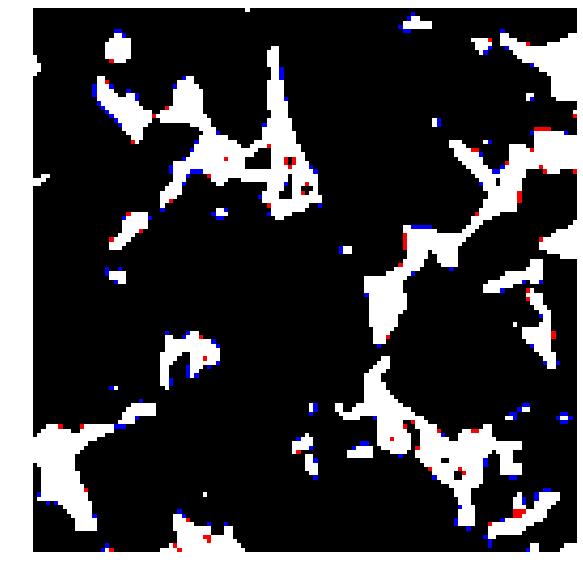

In [87]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
        
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
        if cnt ==0:
            break
    print('\n')

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 610.97it/s]
100%|██████████| 700/700 [00:07<00:00, 94.82it/s] 


In [33]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 218111.63it/s]
25200it [02:12, 190.64it/s]
100%|██████████| 700/700 [00:04<00:00, 164.21it/s]
25200it [00:00, 106624.09it/s]
25200it [02:23, 175.71it/s]
100%|██████████| 700/700 [00:04<00:00, 157.47it/s]
25200it [00:00, 219525.92it/s]
2808it [00:15, 173.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 244967.71it/s]
25200it [02:03, 204.21it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3206.54it/s]


In [32]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.983499
precision   : 0.960773
recall      : 0.891501
f1          : 0.924841
pr_auc      : 0.985720
iou         : 0.860191
